# Procedure for creating Datasets
The following must be runned before  run_training.ipyn. Data of DeepMoon project are exploited: masks for MRCNN are created from crater tables *.hdf5 files (available at: https://zenodo.org/record/1133969#.X4GfBpqxU08 ) 

Datasets are stocked in *.h5 and then imported in Google Drive, ready for training. 

### Initialization:
Importing libraries

In [1]:
import pandas as pd
import h5py
import numpy as np
import cv2
import tables
import matplotlib.pyplot as plt

Path to files:

In [2]:
zenodo_path = r'/media/sirbastiano/Volume E/LINUX/Zenodo'

test_images_path = zenodo_path + '/test_images.hdf5'
test_craters_path = zenodo_path + '/test_craters.hdf5'

dev_images_path = zenodo_path + '/dev_images.hdf5'
dev_craters_path = zenodo_path + '/dev_craters.hdf5'

train_images_path = zenodo_path + '/train_images.hdf5'
train_craters_path = zenodo_path + '/train_craters.hdf5'

Reading craters tables and database images

# Defining function for creating Masks

In [3]:
def create_mask(tab):
    global mask  # SCOPE 

    x_c = tab['x']
    y_c = tab['y']
    r_c = tab['Diameter (pix)']/2
    
    # Initialization:
    i=0
    mask = np.empty([256, 256, 1], dtype=int)    
    for raggio in r_c:              
        # draw mask shape
        new_mask = np.zeros((256,256,1), dtype=int)
        new_mask = np.ascontiguousarray(new_mask, dtype=np.uint8)
        center_coordinates = (int(x_c[i]), int(y_c[i]) )
        radius = int(raggio)
        color = 255
        thickness = 2
        new_mask = cv2.circle(new_mask, center_coordinates, radius, color, thickness)
        mask = np.dstack((mask,new_mask))
        i +=1
    
    return mask[:,:,1:]  # Pop out first element (empty)

In [ ]:
# FILL MASK
""""
def drawcircle(img, x_c, y_c , radius):
    ext = len(img[:,0]) -1
    

    for x in range(256):
        for y in range(256):
                if pow(x-x_c, 2)+pow(y-y_c, 2) < radius**2:
                    img[y,x]=255
    return img 

def create_mask(tab):
    global mask  # SCOPE 

    x_c = tab['x']
    y_c = tab['y']
    r_c = tab['Diameter (pix)']/2
    
    # Initialization cycle for
    i=0
    mask = np.empty([256, 256, 1], dtype=int)
    # Condition for skip craters below certain radius
    for raggio in r_c:
        if raggio < 1:
            i+=1
            continue
        else:        
            # draw mask shape
            new_mask = np.zeros((256,256,1), dtype=int)
            drawcircle(new_mask, x_c[i], y_c[i], r_c[i])
            mask = np.dstack((mask,new_mask))
            # Pop out first element (empty)
            i +=1
    
    return mask[:,:,1:]

In [4]:
%cd /media/sirbastiano/Volume E/LINUX/Zenodo
!ls

/media/sirbastiano/Volume E/LINUX/Zenodo
dev_craters.hdf5		   test_craters.hdf5
dev_images.hdf5			   test_dts.h5
LunarLROLrocKaguya_118mperpix.png  test_images.hdf5
model_keras1.2.2.h5		   train_craters.hdf5
model_keras2.h5			   train_images.hdf5
post-processed_sample_images.zip   validation_dts.h5
post-processed_test_craters.npy


In [5]:
dataset = pd.HDFStore(train_craters_path, 'r')
train_images = h5py.File(train_images_path,'r')
imgs = list(dataset.keys())

In [6]:
# Print table:
d = dataset[imgs[1]]['Diameter (km)']
d = np.array(d)
arg = np.argmax(d)

In [7]:
print(arg)

117


In [8]:
dataset[imgs[1]]['Diameter (pix)'][117]

117.16276801507449

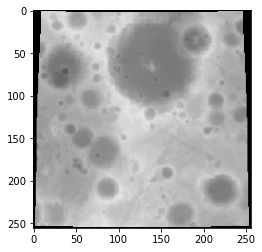

In [9]:
# Show image:
a = train_images['input_images'][1]
plt.imshow(a, cmap='gray', vmin=60, vmax=250)

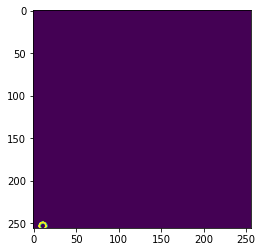

In [10]:
mask = create_mask(dataset[imgs[1]])
mask.shape
iteratore = iter(list(range(100)))
x = next(iteratore)
plt.imshow(mask[:,:,x])

# Training dataset creation:

In [12]:
%cd /media/sirbastiano/Volume E/LINUX/DATASETS
!ls

/media/sirbastiano/Volume E/LINUX/DATASETS
test_dts_full.h5  train_dts_full.h5  validation_dts_full.h5
test_dts.h5	  train_dts.h5	     validation_dts.h5


In [13]:
train_dts = h5py.File('train_dts_full_thin2px.h5', 'w')
# GROUP1: Input Masks(targets)
tgt =  train_dts.create_group('input_targets')
# GROUP2: Input Images
images = train_dts.create_group('input_imgs')
print("DATASET TRAIN CREATED")

DATASET TRAIN CREATED


In [14]:
# Let's put mask and imgs in this train dataset.
count = 30000

for i in range(count):
    Mask = create_mask(dataset[imgs[i]])
    tgt.create_dataset(str(i),  data = Mask, chunks=True, compression='gzip')
    print(f"Mask n.{i+1} of {count} completed with shape: {Mask.shape}")
    
    images.create_dataset(str(i), data = train_images['input_images'][i], chunks=True, compression='gzip')
    print(f"Image n.{i+1} of {count} imported\n")
train_dts.close()

Mask n.1 of 30000 completed with shape: (256, 256, 2)
Image n.1 of 30000 imported

Mask n.2 of 30000 completed with shape: (256, 256, 158)
Image n.2 of 30000 imported

Mask n.3 of 30000 completed with shape: (256, 256, 202)
Image n.3 of 30000 imported

Mask n.4 of 30000 completed with shape: (256, 256, 20)
Image n.4 of 30000 imported

Mask n.5 of 30000 completed with shape: (256, 256, 39)
Image n.5 of 30000 imported

Mask n.6 of 30000 completed with shape: (256, 256, 770)
Image n.6 of 30000 imported

Mask n.7 of 30000 completed with shape: (256, 256, 350)
Image n.7 of 30000 imported

Mask n.8 of 30000 completed with shape: (256, 256, 6)
Image n.8 of 30000 imported

Mask n.9 of 30000 completed with shape: (256, 256, 13)
Image n.9 of 30000 imported

Mask n.10 of 30000 completed with shape: (256, 256, 393)
Image n.10 of 30000 imported

Mask n.11 of 30000 completed with shape: (256, 256, 249)
Image n.11 of 30000 imported

Mask n.12 of 30000 completed with shape: (256, 256, 16)
Image n.12 o

Mask n.98 of 30000 completed with shape: (256, 256, 332)
Image n.98 of 30000 imported

Mask n.99 of 30000 completed with shape: (256, 256, 84)
Image n.99 of 30000 imported

Mask n.100 of 30000 completed with shape: (256, 256, 32)
Image n.100 of 30000 imported

Mask n.101 of 30000 completed with shape: (256, 256, 152)
Image n.101 of 30000 imported

Mask n.102 of 30000 completed with shape: (256, 256, 13)
Image n.102 of 30000 imported

Mask n.103 of 30000 completed with shape: (256, 256, 121)
Image n.103 of 30000 imported

Mask n.104 of 30000 completed with shape: (256, 256, 274)
Image n.104 of 30000 imported

Mask n.105 of 30000 completed with shape: (256, 256, 97)
Image n.105 of 30000 imported

Mask n.106 of 30000 completed with shape: (256, 256, 29)
Image n.106 of 30000 imported

Mask n.107 of 30000 completed with shape: (256, 256, 21)
Image n.107 of 30000 imported

Mask n.108 of 30000 completed with shape: (256, 256, 1)
Image n.108 of 30000 imported

Mask n.109 of 30000 completed wit

Mask n.193 of 30000 completed with shape: (256, 256, 278)
Image n.193 of 30000 imported

Mask n.194 of 30000 completed with shape: (256, 256, 9)
Image n.194 of 30000 imported

Mask n.195 of 30000 completed with shape: (256, 256, 309)
Image n.195 of 30000 imported

Mask n.196 of 30000 completed with shape: (256, 256, 8)
Image n.196 of 30000 imported

Mask n.197 of 30000 completed with shape: (256, 256, 11)
Image n.197 of 30000 imported

Mask n.198 of 30000 completed with shape: (256, 256, 9)
Image n.198 of 30000 imported

Mask n.199 of 30000 completed with shape: (256, 256, 2)
Image n.199 of 30000 imported

Mask n.200 of 30000 completed with shape: (256, 256, 6)
Image n.200 of 30000 imported

Mask n.201 of 30000 completed with shape: (256, 256, 5)
Image n.201 of 30000 imported

Mask n.202 of 30000 completed with shape: (256, 256, 111)
Image n.202 of 30000 imported

Mask n.203 of 30000 completed with shape: (256, 256, 202)
Image n.203 of 30000 imported

Mask n.204 of 30000 completed with

Mask n.287 of 30000 completed with shape: (256, 256, 676)
Image n.287 of 30000 imported

Mask n.288 of 30000 completed with shape: (256, 256, 41)
Image n.288 of 30000 imported

Mask n.289 of 30000 completed with shape: (256, 256, 554)
Image n.289 of 30000 imported

Mask n.290 of 30000 completed with shape: (256, 256, 94)
Image n.290 of 30000 imported

Mask n.291 of 30000 completed with shape: (256, 256, 49)
Image n.291 of 30000 imported

Mask n.292 of 30000 completed with shape: (256, 256, 448)
Image n.292 of 30000 imported

Mask n.293 of 30000 completed with shape: (256, 256, 20)
Image n.293 of 30000 imported

Mask n.294 of 30000 completed with shape: (256, 256, 32)
Image n.294 of 30000 imported

Mask n.295 of 30000 completed with shape: (256, 256, 94)
Image n.295 of 30000 imported

Mask n.296 of 30000 completed with shape: (256, 256, 12)
Image n.296 of 30000 imported

Mask n.297 of 30000 completed with shape: (256, 256, 139)
Image n.297 of 30000 imported

Mask n.298 of 30000 complete

Mask n.381 of 30000 completed with shape: (256, 256, 299)
Image n.381 of 30000 imported

Mask n.382 of 30000 completed with shape: (256, 256, 17)
Image n.382 of 30000 imported

Mask n.383 of 30000 completed with shape: (256, 256, 511)
Image n.383 of 30000 imported

Mask n.384 of 30000 completed with shape: (256, 256, 3)
Image n.384 of 30000 imported

Mask n.385 of 30000 completed with shape: (256, 256, 31)
Image n.385 of 30000 imported

Mask n.386 of 30000 completed with shape: (256, 256, 9)
Image n.386 of 30000 imported

Mask n.387 of 30000 completed with shape: (256, 256, 44)
Image n.387 of 30000 imported

Mask n.388 of 30000 completed with shape: (256, 256, 293)
Image n.388 of 30000 imported

Mask n.389 of 30000 completed with shape: (256, 256, 4)
Image n.389 of 30000 imported

Mask n.390 of 30000 completed with shape: (256, 256, 147)
Image n.390 of 30000 imported

Mask n.391 of 30000 completed with shape: (256, 256, 23)
Image n.391 of 30000 imported

Mask n.392 of 30000 completed w

Mask n.476 of 30000 completed with shape: (256, 256, 478)
Image n.476 of 30000 imported

Mask n.477 of 30000 completed with shape: (256, 256, 4)
Image n.477 of 30000 imported

Mask n.478 of 30000 completed with shape: (256, 256, 23)
Image n.478 of 30000 imported

Mask n.479 of 30000 completed with shape: (256, 256, 0)
Image n.479 of 30000 imported

Mask n.480 of 30000 completed with shape: (256, 256, 14)
Image n.480 of 30000 imported

Mask n.481 of 30000 completed with shape: (256, 256, 53)
Image n.481 of 30000 imported

Mask n.482 of 30000 completed with shape: (256, 256, 476)
Image n.482 of 30000 imported

Mask n.483 of 30000 completed with shape: (256, 256, 10)
Image n.483 of 30000 imported

Mask n.484 of 30000 completed with shape: (256, 256, 3)
Image n.484 of 30000 imported

Mask n.485 of 30000 completed with shape: (256, 256, 109)
Image n.485 of 30000 imported

Mask n.486 of 30000 completed with shape: (256, 256, 98)
Image n.486 of 30000 imported

Mask n.487 of 30000 completed wi

Mask n.572 of 30000 completed with shape: (256, 256, 313)
Image n.572 of 30000 imported

Mask n.573 of 30000 completed with shape: (256, 256, 105)
Image n.573 of 30000 imported

Mask n.574 of 30000 completed with shape: (256, 256, 0)
Image n.574 of 30000 imported

Mask n.575 of 30000 completed with shape: (256, 256, 3)
Image n.575 of 30000 imported

Mask n.576 of 30000 completed with shape: (256, 256, 1)
Image n.576 of 30000 imported

Mask n.577 of 30000 completed with shape: (256, 256, 98)
Image n.577 of 30000 imported

Mask n.578 of 30000 completed with shape: (256, 256, 38)
Image n.578 of 30000 imported

Mask n.579 of 30000 completed with shape: (256, 256, 68)
Image n.579 of 30000 imported

Mask n.580 of 30000 completed with shape: (256, 256, 26)
Image n.580 of 30000 imported

Mask n.581 of 30000 completed with shape: (256, 256, 71)
Image n.581 of 30000 imported

Mask n.582 of 30000 completed with shape: (256, 256, 7)
Image n.582 of 30000 imported

Mask n.583 of 30000 completed with

Mask n.666 of 30000 completed with shape: (256, 256, 423)
Image n.666 of 30000 imported

Mask n.667 of 30000 completed with shape: (256, 256, 656)
Image n.667 of 30000 imported

Mask n.668 of 30000 completed with shape: (256, 256, 54)
Image n.668 of 30000 imported

Mask n.669 of 30000 completed with shape: (256, 256, 0)
Image n.669 of 30000 imported

Mask n.670 of 30000 completed with shape: (256, 256, 505)
Image n.670 of 30000 imported

Mask n.671 of 30000 completed with shape: (256, 256, 598)
Image n.671 of 30000 imported

Mask n.672 of 30000 completed with shape: (256, 256, 6)
Image n.672 of 30000 imported

Mask n.673 of 30000 completed with shape: (256, 256, 88)
Image n.673 of 30000 imported

Mask n.674 of 30000 completed with shape: (256, 256, 91)
Image n.674 of 30000 imported

Mask n.675 of 30000 completed with shape: (256, 256, 1)
Image n.675 of 30000 imported

Mask n.676 of 30000 completed with shape: (256, 256, 11)
Image n.676 of 30000 imported

Mask n.677 of 30000 completed w

Mask n.762 of 30000 completed with shape: (256, 256, 37)
Image n.762 of 30000 imported

Mask n.763 of 30000 completed with shape: (256, 256, 4)
Image n.763 of 30000 imported

Mask n.764 of 30000 completed with shape: (256, 256, 3)
Image n.764 of 30000 imported

Mask n.765 of 30000 completed with shape: (256, 256, 8)
Image n.765 of 30000 imported

Mask n.766 of 30000 completed with shape: (256, 256, 1)
Image n.766 of 30000 imported

Mask n.767 of 30000 completed with shape: (256, 256, 17)
Image n.767 of 30000 imported

Mask n.768 of 30000 completed with shape: (256, 256, 35)
Image n.768 of 30000 imported

Mask n.769 of 30000 completed with shape: (256, 256, 80)
Image n.769 of 30000 imported

Mask n.770 of 30000 completed with shape: (256, 256, 36)
Image n.770 of 30000 imported

Mask n.771 of 30000 completed with shape: (256, 256, 31)
Image n.771 of 30000 imported

Mask n.772 of 30000 completed with shape: (256, 256, 1)
Image n.772 of 30000 imported

Mask n.773 of 30000 completed with sh

Mask n.857 of 30000 completed with shape: (256, 256, 11)
Image n.857 of 30000 imported

Mask n.858 of 30000 completed with shape: (256, 256, 85)
Image n.858 of 30000 imported

Mask n.859 of 30000 completed with shape: (256, 256, 25)
Image n.859 of 30000 imported

Mask n.860 of 30000 completed with shape: (256, 256, 626)
Image n.860 of 30000 imported

Mask n.861 of 30000 completed with shape: (256, 256, 537)
Image n.861 of 30000 imported

Mask n.862 of 30000 completed with shape: (256, 256, 2)
Image n.862 of 30000 imported

Mask n.863 of 30000 completed with shape: (256, 256, 3)
Image n.863 of 30000 imported

Mask n.864 of 30000 completed with shape: (256, 256, 35)
Image n.864 of 30000 imported

Mask n.865 of 30000 completed with shape: (256, 256, 259)
Image n.865 of 30000 imported

Mask n.866 of 30000 completed with shape: (256, 256, 3)
Image n.866 of 30000 imported

Mask n.867 of 30000 completed with shape: (256, 256, 10)
Image n.867 of 30000 imported

Mask n.868 of 30000 completed wi

Mask n.951 of 30000 completed with shape: (256, 256, 376)
Image n.951 of 30000 imported

Mask n.952 of 30000 completed with shape: (256, 256, 36)
Image n.952 of 30000 imported

Mask n.953 of 30000 completed with shape: (256, 256, 20)
Image n.953 of 30000 imported

Mask n.954 of 30000 completed with shape: (256, 256, 3)
Image n.954 of 30000 imported

Mask n.955 of 30000 completed with shape: (256, 256, 9)
Image n.955 of 30000 imported

Mask n.956 of 30000 completed with shape: (256, 256, 0)
Image n.956 of 30000 imported

Mask n.957 of 30000 completed with shape: (256, 256, 42)
Image n.957 of 30000 imported

Mask n.958 of 30000 completed with shape: (256, 256, 63)
Image n.958 of 30000 imported

Mask n.959 of 30000 completed with shape: (256, 256, 447)
Image n.959 of 30000 imported

Mask n.960 of 30000 completed with shape: (256, 256, 2)
Image n.960 of 30000 imported

Mask n.961 of 30000 completed with shape: (256, 256, 93)
Image n.961 of 30000 imported

Mask n.962 of 30000 completed with

Mask n.1044 of 30000 completed with shape: (256, 256, 82)
Image n.1044 of 30000 imported

Mask n.1045 of 30000 completed with shape: (256, 256, 201)
Image n.1045 of 30000 imported

Mask n.1046 of 30000 completed with shape: (256, 256, 8)
Image n.1046 of 30000 imported

Mask n.1047 of 30000 completed with shape: (256, 256, 208)
Image n.1047 of 30000 imported

Mask n.1048 of 30000 completed with shape: (256, 256, 11)
Image n.1048 of 30000 imported

Mask n.1049 of 30000 completed with shape: (256, 256, 32)
Image n.1049 of 30000 imported

Mask n.1050 of 30000 completed with shape: (256, 256, 224)
Image n.1050 of 30000 imported

Mask n.1051 of 30000 completed with shape: (256, 256, 358)
Image n.1051 of 30000 imported

Mask n.1052 of 30000 completed with shape: (256, 256, 18)
Image n.1052 of 30000 imported

Mask n.1053 of 30000 completed with shape: (256, 256, 4)
Image n.1053 of 30000 imported

Mask n.1054 of 30000 completed with shape: (256, 256, 3)
Image n.1054 of 30000 imported

Mask n.10

Mask n.1136 of 30000 completed with shape: (256, 256, 768)
Image n.1136 of 30000 imported

Mask n.1137 of 30000 completed with shape: (256, 256, 18)
Image n.1137 of 30000 imported

Mask n.1138 of 30000 completed with shape: (256, 256, 14)
Image n.1138 of 30000 imported

Mask n.1139 of 30000 completed with shape: (256, 256, 14)
Image n.1139 of 30000 imported

Mask n.1140 of 30000 completed with shape: (256, 256, 1)
Image n.1140 of 30000 imported

Mask n.1141 of 30000 completed with shape: (256, 256, 17)
Image n.1141 of 30000 imported

Mask n.1142 of 30000 completed with shape: (256, 256, 3)
Image n.1142 of 30000 imported

Mask n.1143 of 30000 completed with shape: (256, 256, 11)
Image n.1143 of 30000 imported

Mask n.1144 of 30000 completed with shape: (256, 256, 1)
Image n.1144 of 30000 imported

Mask n.1145 of 30000 completed with shape: (256, 256, 474)
Image n.1145 of 30000 imported

Mask n.1146 of 30000 completed with shape: (256, 256, 3)
Image n.1146 of 30000 imported

Mask n.1147 

Mask n.1229 of 30000 completed with shape: (256, 256, 65)
Image n.1229 of 30000 imported

Mask n.1230 of 30000 completed with shape: (256, 256, 11)
Image n.1230 of 30000 imported

Mask n.1231 of 30000 completed with shape: (256, 256, 390)
Image n.1231 of 30000 imported

Mask n.1232 of 30000 completed with shape: (256, 256, 236)
Image n.1232 of 30000 imported

Mask n.1233 of 30000 completed with shape: (256, 256, 8)
Image n.1233 of 30000 imported

Mask n.1234 of 30000 completed with shape: (256, 256, 319)
Image n.1234 of 30000 imported

Mask n.1235 of 30000 completed with shape: (256, 256, 10)
Image n.1235 of 30000 imported

Mask n.1236 of 30000 completed with shape: (256, 256, 11)
Image n.1236 of 30000 imported

Mask n.1237 of 30000 completed with shape: (256, 256, 10)
Image n.1237 of 30000 imported

Mask n.1238 of 30000 completed with shape: (256, 256, 27)
Image n.1238 of 30000 imported

Mask n.1239 of 30000 completed with shape: (256, 256, 15)
Image n.1239 of 30000 imported

Mask n.1

Mask n.1321 of 30000 completed with shape: (256, 256, 95)
Image n.1321 of 30000 imported

Mask n.1322 of 30000 completed with shape: (256, 256, 41)
Image n.1322 of 30000 imported

Mask n.1323 of 30000 completed with shape: (256, 256, 87)
Image n.1323 of 30000 imported

Mask n.1324 of 30000 completed with shape: (256, 256, 138)
Image n.1324 of 30000 imported

Mask n.1325 of 30000 completed with shape: (256, 256, 81)
Image n.1325 of 30000 imported

Mask n.1326 of 30000 completed with shape: (256, 256, 1)
Image n.1326 of 30000 imported

Mask n.1327 of 30000 completed with shape: (256, 256, 172)
Image n.1327 of 30000 imported

Mask n.1328 of 30000 completed with shape: (256, 256, 128)
Image n.1328 of 30000 imported

Mask n.1329 of 30000 completed with shape: (256, 256, 136)
Image n.1329 of 30000 imported

Mask n.1330 of 30000 completed with shape: (256, 256, 88)
Image n.1330 of 30000 imported

Mask n.1331 of 30000 completed with shape: (256, 256, 23)
Image n.1331 of 30000 imported

Mask n.

Mask n.1415 of 30000 completed with shape: (256, 256, 77)
Image n.1415 of 30000 imported

Mask n.1416 of 30000 completed with shape: (256, 256, 4)
Image n.1416 of 30000 imported

Mask n.1417 of 30000 completed with shape: (256, 256, 12)
Image n.1417 of 30000 imported

Mask n.1418 of 30000 completed with shape: (256, 256, 14)
Image n.1418 of 30000 imported

Mask n.1419 of 30000 completed with shape: (256, 256, 41)
Image n.1419 of 30000 imported

Mask n.1420 of 30000 completed with shape: (256, 256, 65)
Image n.1420 of 30000 imported

Mask n.1421 of 30000 completed with shape: (256, 256, 88)
Image n.1421 of 30000 imported

Mask n.1422 of 30000 completed with shape: (256, 256, 32)
Image n.1422 of 30000 imported

Mask n.1423 of 30000 completed with shape: (256, 256, 167)
Image n.1423 of 30000 imported

Mask n.1424 of 30000 completed with shape: (256, 256, 43)
Image n.1424 of 30000 imported

Mask n.1425 of 30000 completed with shape: (256, 256, 2)
Image n.1425 of 30000 imported

Mask n.1426

Mask n.1507 of 30000 completed with shape: (256, 256, 24)
Image n.1507 of 30000 imported

Mask n.1508 of 30000 completed with shape: (256, 256, 22)
Image n.1508 of 30000 imported

Mask n.1509 of 30000 completed with shape: (256, 256, 2)
Image n.1509 of 30000 imported

Mask n.1510 of 30000 completed with shape: (256, 256, 19)
Image n.1510 of 30000 imported

Mask n.1511 of 30000 completed with shape: (256, 256, 33)
Image n.1511 of 30000 imported

Mask n.1512 of 30000 completed with shape: (256, 256, 5)
Image n.1512 of 30000 imported

Mask n.1513 of 30000 completed with shape: (256, 256, 3)
Image n.1513 of 30000 imported

Mask n.1514 of 30000 completed with shape: (256, 256, 132)
Image n.1514 of 30000 imported

Mask n.1515 of 30000 completed with shape: (256, 256, 33)
Image n.1515 of 30000 imported

Mask n.1516 of 30000 completed with shape: (256, 256, 8)
Image n.1516 of 30000 imported

Mask n.1517 of 30000 completed with shape: (256, 256, 13)
Image n.1517 of 30000 imported

Mask n.1518 o

Mask n.1602 of 30000 completed with shape: (256, 256, 131)
Image n.1602 of 30000 imported

Mask n.1603 of 30000 completed with shape: (256, 256, 126)
Image n.1603 of 30000 imported

Mask n.1604 of 30000 completed with shape: (256, 256, 116)
Image n.1604 of 30000 imported

Mask n.1605 of 30000 completed with shape: (256, 256, 233)
Image n.1605 of 30000 imported

Mask n.1606 of 30000 completed with shape: (256, 256, 3)
Image n.1606 of 30000 imported

Mask n.1607 of 30000 completed with shape: (256, 256, 42)
Image n.1607 of 30000 imported

Mask n.1608 of 30000 completed with shape: (256, 256, 5)
Image n.1608 of 30000 imported

Mask n.1609 of 30000 completed with shape: (256, 256, 27)
Image n.1609 of 30000 imported

Mask n.1610 of 30000 completed with shape: (256, 256, 25)
Image n.1610 of 30000 imported

Mask n.1611 of 30000 completed with shape: (256, 256, 20)
Image n.1611 of 30000 imported

Mask n.1612 of 30000 completed with shape: (256, 256, 525)
Image n.1612 of 30000 imported

Mask n.

Mask n.1695 of 30000 completed with shape: (256, 256, 85)
Image n.1695 of 30000 imported

Mask n.1696 of 30000 completed with shape: (256, 256, 12)
Image n.1696 of 30000 imported

Mask n.1697 of 30000 completed with shape: (256, 256, 98)
Image n.1697 of 30000 imported

Mask n.1698 of 30000 completed with shape: (256, 256, 33)
Image n.1698 of 30000 imported

Mask n.1699 of 30000 completed with shape: (256, 256, 32)
Image n.1699 of 30000 imported

Mask n.1700 of 30000 completed with shape: (256, 256, 120)
Image n.1700 of 30000 imported

Mask n.1701 of 30000 completed with shape: (256, 256, 6)
Image n.1701 of 30000 imported

Mask n.1702 of 30000 completed with shape: (256, 256, 410)
Image n.1702 of 30000 imported

Mask n.1703 of 30000 completed with shape: (256, 256, 63)
Image n.1703 of 30000 imported

Mask n.1704 of 30000 completed with shape: (256, 256, 40)
Image n.1704 of 30000 imported

Mask n.1705 of 30000 completed with shape: (256, 256, 282)
Image n.1705 of 30000 imported

Mask n.1

Mask n.1787 of 30000 completed with shape: (256, 256, 154)
Image n.1787 of 30000 imported

Mask n.1788 of 30000 completed with shape: (256, 256, 530)
Image n.1788 of 30000 imported

Mask n.1789 of 30000 completed with shape: (256, 256, 0)
Image n.1789 of 30000 imported

Mask n.1790 of 30000 completed with shape: (256, 256, 21)
Image n.1790 of 30000 imported

Mask n.1791 of 30000 completed with shape: (256, 256, 4)
Image n.1791 of 30000 imported

Mask n.1792 of 30000 completed with shape: (256, 256, 6)
Image n.1792 of 30000 imported

Mask n.1793 of 30000 completed with shape: (256, 256, 256)
Image n.1793 of 30000 imported

Mask n.1794 of 30000 completed with shape: (256, 256, 54)
Image n.1794 of 30000 imported

Mask n.1795 of 30000 completed with shape: (256, 256, 24)
Image n.1795 of 30000 imported

Mask n.1796 of 30000 completed with shape: (256, 256, 7)
Image n.1796 of 30000 imported

Mask n.1797 of 30000 completed with shape: (256, 256, 193)
Image n.1797 of 30000 imported

Mask n.179

Mask n.1880 of 30000 completed with shape: (256, 256, 337)
Image n.1880 of 30000 imported

Mask n.1881 of 30000 completed with shape: (256, 256, 77)
Image n.1881 of 30000 imported

Mask n.1882 of 30000 completed with shape: (256, 256, 5)
Image n.1882 of 30000 imported

Mask n.1883 of 30000 completed with shape: (256, 256, 114)
Image n.1883 of 30000 imported

Mask n.1884 of 30000 completed with shape: (256, 256, 28)
Image n.1884 of 30000 imported

Mask n.1885 of 30000 completed with shape: (256, 256, 5)
Image n.1885 of 30000 imported

Mask n.1886 of 30000 completed with shape: (256, 256, 175)
Image n.1886 of 30000 imported

Mask n.1887 of 30000 completed with shape: (256, 256, 2)
Image n.1887 of 30000 imported

Mask n.1888 of 30000 completed with shape: (256, 256, 60)
Image n.1888 of 30000 imported

Mask n.1889 of 30000 completed with shape: (256, 256, 2)
Image n.1889 of 30000 imported

Mask n.1890 of 30000 completed with shape: (256, 256, 58)
Image n.1890 of 30000 imported

Mask n.1891

Mask n.1972 of 30000 completed with shape: (256, 256, 164)
Image n.1972 of 30000 imported

Mask n.1973 of 30000 completed with shape: (256, 256, 27)
Image n.1973 of 30000 imported

Mask n.1974 of 30000 completed with shape: (256, 256, 4)
Image n.1974 of 30000 imported

Mask n.1975 of 30000 completed with shape: (256, 256, 87)
Image n.1975 of 30000 imported

Mask n.1976 of 30000 completed with shape: (256, 256, 186)
Image n.1976 of 30000 imported

Mask n.1977 of 30000 completed with shape: (256, 256, 9)
Image n.1977 of 30000 imported

Mask n.1978 of 30000 completed with shape: (256, 256, 2)
Image n.1978 of 30000 imported

Mask n.1979 of 30000 completed with shape: (256, 256, 235)
Image n.1979 of 30000 imported

Mask n.1980 of 30000 completed with shape: (256, 256, 3)
Image n.1980 of 30000 imported

Mask n.1981 of 30000 completed with shape: (256, 256, 21)
Image n.1981 of 30000 imported

Mask n.1982 of 30000 completed with shape: (256, 256, 206)
Image n.1982 of 30000 imported

Mask n.198

Mask n.2065 of 30000 completed with shape: (256, 256, 28)
Image n.2065 of 30000 imported

Mask n.2066 of 30000 completed with shape: (256, 256, 20)
Image n.2066 of 30000 imported

Mask n.2067 of 30000 completed with shape: (256, 256, 219)
Image n.2067 of 30000 imported

Mask n.2068 of 30000 completed with shape: (256, 256, 363)
Image n.2068 of 30000 imported

Mask n.2069 of 30000 completed with shape: (256, 256, 10)
Image n.2069 of 30000 imported

Mask n.2070 of 30000 completed with shape: (256, 256, 10)
Image n.2070 of 30000 imported

Mask n.2071 of 30000 completed with shape: (256, 256, 284)
Image n.2071 of 30000 imported

Mask n.2072 of 30000 completed with shape: (256, 256, 138)
Image n.2072 of 30000 imported

Mask n.2073 of 30000 completed with shape: (256, 256, 62)
Image n.2073 of 30000 imported

Mask n.2074 of 30000 completed with shape: (256, 256, 1)
Image n.2074 of 30000 imported

Mask n.2075 of 30000 completed with shape: (256, 256, 6)
Image n.2075 of 30000 imported

Mask n.2

Mask n.2157 of 30000 completed with shape: (256, 256, 261)
Image n.2157 of 30000 imported

Mask n.2158 of 30000 completed with shape: (256, 256, 17)
Image n.2158 of 30000 imported

Mask n.2159 of 30000 completed with shape: (256, 256, 333)
Image n.2159 of 30000 imported

Mask n.2160 of 30000 completed with shape: (256, 256, 8)
Image n.2160 of 30000 imported

Mask n.2161 of 30000 completed with shape: (256, 256, 23)
Image n.2161 of 30000 imported

Mask n.2162 of 30000 completed with shape: (256, 256, 107)
Image n.2162 of 30000 imported

Mask n.2163 of 30000 completed with shape: (256, 256, 22)
Image n.2163 of 30000 imported

Mask n.2164 of 30000 completed with shape: (256, 256, 9)
Image n.2164 of 30000 imported

Mask n.2165 of 30000 completed with shape: (256, 256, 0)
Image n.2165 of 30000 imported

Mask n.2166 of 30000 completed with shape: (256, 256, 8)
Image n.2166 of 30000 imported

Mask n.2167 of 30000 completed with shape: (256, 256, 15)
Image n.2167 of 30000 imported

Mask n.2168

Mask n.2249 of 30000 completed with shape: (256, 256, 72)
Image n.2249 of 30000 imported

Mask n.2250 of 30000 completed with shape: (256, 256, 50)
Image n.2250 of 30000 imported

Mask n.2251 of 30000 completed with shape: (256, 256, 11)
Image n.2251 of 30000 imported

Mask n.2252 of 30000 completed with shape: (256, 256, 481)
Image n.2252 of 30000 imported

Mask n.2253 of 30000 completed with shape: (256, 256, 1)
Image n.2253 of 30000 imported

Mask n.2254 of 30000 completed with shape: (256, 256, 6)
Image n.2254 of 30000 imported

Mask n.2255 of 30000 completed with shape: (256, 256, 7)
Image n.2255 of 30000 imported

Mask n.2256 of 30000 completed with shape: (256, 256, 16)
Image n.2256 of 30000 imported

Mask n.2257 of 30000 completed with shape: (256, 256, 28)
Image n.2257 of 30000 imported

Mask n.2258 of 30000 completed with shape: (256, 256, 14)
Image n.2258 of 30000 imported

Mask n.2259 of 30000 completed with shape: (256, 256, 38)
Image n.2259 of 30000 imported

Mask n.2260 

Mask n.2343 of 30000 completed with shape: (256, 256, 7)
Image n.2343 of 30000 imported

Mask n.2344 of 30000 completed with shape: (256, 256, 11)
Image n.2344 of 30000 imported

Mask n.2345 of 30000 completed with shape: (256, 256, 120)
Image n.2345 of 30000 imported

Mask n.2346 of 30000 completed with shape: (256, 256, 587)
Image n.2346 of 30000 imported

Mask n.2347 of 30000 completed with shape: (256, 256, 46)
Image n.2347 of 30000 imported

Mask n.2348 of 30000 completed with shape: (256, 256, 410)
Image n.2348 of 30000 imported

Mask n.2349 of 30000 completed with shape: (256, 256, 1)
Image n.2349 of 30000 imported

Mask n.2350 of 30000 completed with shape: (256, 256, 22)
Image n.2350 of 30000 imported

Mask n.2351 of 30000 completed with shape: (256, 256, 194)
Image n.2351 of 30000 imported

Mask n.2352 of 30000 completed with shape: (256, 256, 133)
Image n.2352 of 30000 imported

Mask n.2353 of 30000 completed with shape: (256, 256, 46)
Image n.2353 of 30000 imported

Mask n.

Mask n.2435 of 30000 completed with shape: (256, 256, 76)
Image n.2435 of 30000 imported

Mask n.2436 of 30000 completed with shape: (256, 256, 329)
Image n.2436 of 30000 imported

Mask n.2437 of 30000 completed with shape: (256, 256, 13)
Image n.2437 of 30000 imported

Mask n.2438 of 30000 completed with shape: (256, 256, 42)
Image n.2438 of 30000 imported

Mask n.2439 of 30000 completed with shape: (256, 256, 104)
Image n.2439 of 30000 imported

Mask n.2440 of 30000 completed with shape: (256, 256, 3)
Image n.2440 of 30000 imported

Mask n.2441 of 30000 completed with shape: (256, 256, 490)
Image n.2441 of 30000 imported

Mask n.2442 of 30000 completed with shape: (256, 256, 194)
Image n.2442 of 30000 imported

Mask n.2443 of 30000 completed with shape: (256, 256, 45)
Image n.2443 of 30000 imported

Mask n.2444 of 30000 completed with shape: (256, 256, 6)
Image n.2444 of 30000 imported

Mask n.2445 of 30000 completed with shape: (256, 256, 212)
Image n.2445 of 30000 imported

Mask n.

Mask n.2527 of 30000 completed with shape: (256, 256, 161)
Image n.2527 of 30000 imported

Mask n.2528 of 30000 completed with shape: (256, 256, 336)
Image n.2528 of 30000 imported

Mask n.2529 of 30000 completed with shape: (256, 256, 450)
Image n.2529 of 30000 imported

Mask n.2530 of 30000 completed with shape: (256, 256, 6)
Image n.2530 of 30000 imported

Mask n.2531 of 30000 completed with shape: (256, 256, 233)
Image n.2531 of 30000 imported

Mask n.2532 of 30000 completed with shape: (256, 256, 276)
Image n.2532 of 30000 imported

Mask n.2533 of 30000 completed with shape: (256, 256, 131)
Image n.2533 of 30000 imported

Mask n.2534 of 30000 completed with shape: (256, 256, 16)
Image n.2534 of 30000 imported

Mask n.2535 of 30000 completed with shape: (256, 256, 28)
Image n.2535 of 30000 imported

Mask n.2536 of 30000 completed with shape: (256, 256, 529)
Image n.2536 of 30000 imported

Mask n.2537 of 30000 completed with shape: (256, 256, 0)
Image n.2537 of 30000 imported

Mask 

Mask n.2622 of 30000 completed with shape: (256, 256, 66)
Image n.2622 of 30000 imported

Mask n.2623 of 30000 completed with shape: (256, 256, 29)
Image n.2623 of 30000 imported

Mask n.2624 of 30000 completed with shape: (256, 256, 15)
Image n.2624 of 30000 imported

Mask n.2625 of 30000 completed with shape: (256, 256, 106)
Image n.2625 of 30000 imported

Mask n.2626 of 30000 completed with shape: (256, 256, 8)
Image n.2626 of 30000 imported

Mask n.2627 of 30000 completed with shape: (256, 256, 29)
Image n.2627 of 30000 imported

Mask n.2628 of 30000 completed with shape: (256, 256, 2)
Image n.2628 of 30000 imported

Mask n.2629 of 30000 completed with shape: (256, 256, 32)
Image n.2629 of 30000 imported

Mask n.2630 of 30000 completed with shape: (256, 256, 1)
Image n.2630 of 30000 imported

Mask n.2631 of 30000 completed with shape: (256, 256, 10)
Image n.2631 of 30000 imported

Mask n.2632 of 30000 completed with shape: (256, 256, 325)
Image n.2632 of 30000 imported

Mask n.2633

Mask n.2715 of 30000 completed with shape: (256, 256, 178)
Image n.2715 of 30000 imported

Mask n.2716 of 30000 completed with shape: (256, 256, 172)
Image n.2716 of 30000 imported

Mask n.2717 of 30000 completed with shape: (256, 256, 3)
Image n.2717 of 30000 imported

Mask n.2718 of 30000 completed with shape: (256, 256, 35)
Image n.2718 of 30000 imported

Mask n.2719 of 30000 completed with shape: (256, 256, 49)
Image n.2719 of 30000 imported

Mask n.2720 of 30000 completed with shape: (256, 256, 5)
Image n.2720 of 30000 imported

Mask n.2721 of 30000 completed with shape: (256, 256, 201)
Image n.2721 of 30000 imported

Mask n.2722 of 30000 completed with shape: (256, 256, 0)
Image n.2722 of 30000 imported

Mask n.2723 of 30000 completed with shape: (256, 256, 203)
Image n.2723 of 30000 imported

Mask n.2724 of 30000 completed with shape: (256, 256, 9)
Image n.2724 of 30000 imported

Mask n.2725 of 30000 completed with shape: (256, 256, 3)
Image n.2725 of 30000 imported

Mask n.2726

Mask n.2809 of 30000 completed with shape: (256, 256, 92)
Image n.2809 of 30000 imported

Mask n.2810 of 30000 completed with shape: (256, 256, 12)
Image n.2810 of 30000 imported

Mask n.2811 of 30000 completed with shape: (256, 256, 1)
Image n.2811 of 30000 imported

Mask n.2812 of 30000 completed with shape: (256, 256, 399)
Image n.2812 of 30000 imported

Mask n.2813 of 30000 completed with shape: (256, 256, 119)
Image n.2813 of 30000 imported

Mask n.2814 of 30000 completed with shape: (256, 256, 82)
Image n.2814 of 30000 imported

Mask n.2815 of 30000 completed with shape: (256, 256, 18)
Image n.2815 of 30000 imported

Mask n.2816 of 30000 completed with shape: (256, 256, 322)
Image n.2816 of 30000 imported

Mask n.2817 of 30000 completed with shape: (256, 256, 26)
Image n.2817 of 30000 imported

Mask n.2818 of 30000 completed with shape: (256, 256, 0)
Image n.2818 of 30000 imported

Mask n.2819 of 30000 completed with shape: (256, 256, 22)
Image n.2819 of 30000 imported

Mask n.28

Mask n.2905 of 30000 completed with shape: (256, 256, 12)
Image n.2905 of 30000 imported

Mask n.2906 of 30000 completed with shape: (256, 256, 123)
Image n.2906 of 30000 imported

Mask n.2907 of 30000 completed with shape: (256, 256, 18)
Image n.2907 of 30000 imported

Mask n.2908 of 30000 completed with shape: (256, 256, 3)
Image n.2908 of 30000 imported

Mask n.2909 of 30000 completed with shape: (256, 256, 2)
Image n.2909 of 30000 imported

Mask n.2910 of 30000 completed with shape: (256, 256, 49)
Image n.2910 of 30000 imported

Mask n.2911 of 30000 completed with shape: (256, 256, 9)
Image n.2911 of 30000 imported

Mask n.2912 of 30000 completed with shape: (256, 256, 1)
Image n.2912 of 30000 imported

Mask n.2913 of 30000 completed with shape: (256, 256, 3)
Image n.2913 of 30000 imported

Mask n.2914 of 30000 completed with shape: (256, 256, 6)
Image n.2914 of 30000 imported

Mask n.2915 of 30000 completed with shape: (256, 256, 277)
Image n.2915 of 30000 imported

Mask n.2916 of

Mask n.2997 of 30000 completed with shape: (256, 256, 87)
Image n.2997 of 30000 imported

Mask n.2998 of 30000 completed with shape: (256, 256, 70)
Image n.2998 of 30000 imported

Mask n.2999 of 30000 completed with shape: (256, 256, 29)
Image n.2999 of 30000 imported

Mask n.3000 of 30000 completed with shape: (256, 256, 6)
Image n.3000 of 30000 imported

Mask n.3001 of 30000 completed with shape: (256, 256, 231)
Image n.3001 of 30000 imported

Mask n.3002 of 30000 completed with shape: (256, 256, 54)
Image n.3002 of 30000 imported

Mask n.3003 of 30000 completed with shape: (256, 256, 15)
Image n.3003 of 30000 imported

Mask n.3004 of 30000 completed with shape: (256, 256, 54)
Image n.3004 of 30000 imported

Mask n.3005 of 30000 completed with shape: (256, 256, 17)
Image n.3005 of 30000 imported

Mask n.3006 of 30000 completed with shape: (256, 256, 36)
Image n.3006 of 30000 imported

Mask n.3007 of 30000 completed with shape: (256, 256, 24)
Image n.3007 of 30000 imported

Mask n.300

Mask n.3089 of 30000 completed with shape: (256, 256, 119)
Image n.3089 of 30000 imported

Mask n.3090 of 30000 completed with shape: (256, 256, 13)
Image n.3090 of 30000 imported

Mask n.3091 of 30000 completed with shape: (256, 256, 41)
Image n.3091 of 30000 imported

Mask n.3092 of 30000 completed with shape: (256, 256, 23)
Image n.3092 of 30000 imported

Mask n.3093 of 30000 completed with shape: (256, 256, 0)
Image n.3093 of 30000 imported

Mask n.3094 of 30000 completed with shape: (256, 256, 43)
Image n.3094 of 30000 imported

Mask n.3095 of 30000 completed with shape: (256, 256, 12)
Image n.3095 of 30000 imported

Mask n.3096 of 30000 completed with shape: (256, 256, 104)
Image n.3096 of 30000 imported

Mask n.3097 of 30000 completed with shape: (256, 256, 51)
Image n.3097 of 30000 imported

Mask n.3098 of 30000 completed with shape: (256, 256, 23)
Image n.3098 of 30000 imported

Mask n.3099 of 30000 completed with shape: (256, 256, 161)
Image n.3099 of 30000 imported

Mask n.3

Mask n.3183 of 30000 completed with shape: (256, 256, 363)
Image n.3183 of 30000 imported

Mask n.3184 of 30000 completed with shape: (256, 256, 318)
Image n.3184 of 30000 imported

Mask n.3185 of 30000 completed with shape: (256, 256, 109)
Image n.3185 of 30000 imported

Mask n.3186 of 30000 completed with shape: (256, 256, 30)
Image n.3186 of 30000 imported

Mask n.3187 of 30000 completed with shape: (256, 256, 14)
Image n.3187 of 30000 imported

Mask n.3188 of 30000 completed with shape: (256, 256, 37)
Image n.3188 of 30000 imported

Mask n.3189 of 30000 completed with shape: (256, 256, 78)
Image n.3189 of 30000 imported

Mask n.3190 of 30000 completed with shape: (256, 256, 194)
Image n.3190 of 30000 imported

Mask n.3191 of 30000 completed with shape: (256, 256, 92)
Image n.3191 of 30000 imported

Mask n.3192 of 30000 completed with shape: (256, 256, 171)
Image n.3192 of 30000 imported

Mask n.3193 of 30000 completed with shape: (256, 256, 71)
Image n.3193 of 30000 imported

Mask 

Mask n.3275 of 30000 completed with shape: (256, 256, 232)
Image n.3275 of 30000 imported

Mask n.3276 of 30000 completed with shape: (256, 256, 0)
Image n.3276 of 30000 imported

Mask n.3277 of 30000 completed with shape: (256, 256, 3)
Image n.3277 of 30000 imported

Mask n.3278 of 30000 completed with shape: (256, 256, 5)
Image n.3278 of 30000 imported

Mask n.3279 of 30000 completed with shape: (256, 256, 12)
Image n.3279 of 30000 imported

Mask n.3280 of 30000 completed with shape: (256, 256, 71)
Image n.3280 of 30000 imported

Mask n.3281 of 30000 completed with shape: (256, 256, 247)
Image n.3281 of 30000 imported

Mask n.3282 of 30000 completed with shape: (256, 256, 418)
Image n.3282 of 30000 imported

Mask n.3283 of 30000 completed with shape: (256, 256, 504)
Image n.3283 of 30000 imported

Mask n.3284 of 30000 completed with shape: (256, 256, 295)
Image n.3284 of 30000 imported

Mask n.3285 of 30000 completed with shape: (256, 256, 156)
Image n.3285 of 30000 imported

Mask n.

Mask n.3367 of 30000 completed with shape: (256, 256, 162)
Image n.3367 of 30000 imported

Mask n.3368 of 30000 completed with shape: (256, 256, 3)
Image n.3368 of 30000 imported

Mask n.3369 of 30000 completed with shape: (256, 256, 8)
Image n.3369 of 30000 imported

Mask n.3370 of 30000 completed with shape: (256, 256, 5)
Image n.3370 of 30000 imported

Mask n.3371 of 30000 completed with shape: (256, 256, 395)
Image n.3371 of 30000 imported

Mask n.3372 of 30000 completed with shape: (256, 256, 126)
Image n.3372 of 30000 imported

Mask n.3373 of 30000 completed with shape: (256, 256, 16)
Image n.3373 of 30000 imported

Mask n.3374 of 30000 completed with shape: (256, 256, 2)
Image n.3374 of 30000 imported

Mask n.3375 of 30000 completed with shape: (256, 256, 36)
Image n.3375 of 30000 imported

Mask n.3376 of 30000 completed with shape: (256, 256, 85)
Image n.3376 of 30000 imported

Mask n.3377 of 30000 completed with shape: (256, 256, 34)
Image n.3377 of 30000 imported

Mask n.3378

Mask n.3460 of 30000 completed with shape: (256, 256, 561)
Image n.3460 of 30000 imported

Mask n.3461 of 30000 completed with shape: (256, 256, 6)
Image n.3461 of 30000 imported

Mask n.3462 of 30000 completed with shape: (256, 256, 337)
Image n.3462 of 30000 imported

Mask n.3463 of 30000 completed with shape: (256, 256, 9)
Image n.3463 of 30000 imported

Mask n.3464 of 30000 completed with shape: (256, 256, 0)
Image n.3464 of 30000 imported

Mask n.3465 of 30000 completed with shape: (256, 256, 56)
Image n.3465 of 30000 imported

Mask n.3466 of 30000 completed with shape: (256, 256, 50)
Image n.3466 of 30000 imported

Mask n.3467 of 30000 completed with shape: (256, 256, 14)
Image n.3467 of 30000 imported

Mask n.3468 of 30000 completed with shape: (256, 256, 549)
Image n.3468 of 30000 imported

Mask n.3469 of 30000 completed with shape: (256, 256, 389)
Image n.3469 of 30000 imported

Mask n.3470 of 30000 completed with shape: (256, 256, 190)
Image n.3470 of 30000 imported

Mask n.3

Mask n.3555 of 30000 completed with shape: (256, 256, 45)
Image n.3555 of 30000 imported

Mask n.3556 of 30000 completed with shape: (256, 256, 0)
Image n.3556 of 30000 imported

Mask n.3557 of 30000 completed with shape: (256, 256, 79)
Image n.3557 of 30000 imported

Mask n.3558 of 30000 completed with shape: (256, 256, 46)
Image n.3558 of 30000 imported

Mask n.3559 of 30000 completed with shape: (256, 256, 5)
Image n.3559 of 30000 imported

Mask n.3560 of 30000 completed with shape: (256, 256, 136)
Image n.3560 of 30000 imported

Mask n.3561 of 30000 completed with shape: (256, 256, 389)
Image n.3561 of 30000 imported

Mask n.3562 of 30000 completed with shape: (256, 256, 26)
Image n.3562 of 30000 imported

Mask n.3563 of 30000 completed with shape: (256, 256, 5)
Image n.3563 of 30000 imported

Mask n.3564 of 30000 completed with shape: (256, 256, 45)
Image n.3564 of 30000 imported

Mask n.3565 of 30000 completed with shape: (256, 256, 98)
Image n.3565 of 30000 imported

Mask n.3566

Mask n.3647 of 30000 completed with shape: (256, 256, 211)
Image n.3647 of 30000 imported

Mask n.3648 of 30000 completed with shape: (256, 256, 22)
Image n.3648 of 30000 imported

Mask n.3649 of 30000 completed with shape: (256, 256, 60)
Image n.3649 of 30000 imported

Mask n.3650 of 30000 completed with shape: (256, 256, 9)
Image n.3650 of 30000 imported

Mask n.3651 of 30000 completed with shape: (256, 256, 12)
Image n.3651 of 30000 imported

Mask n.3652 of 30000 completed with shape: (256, 256, 7)
Image n.3652 of 30000 imported

Mask n.3653 of 30000 completed with shape: (256, 256, 158)
Image n.3653 of 30000 imported

Mask n.3654 of 30000 completed with shape: (256, 256, 132)
Image n.3654 of 30000 imported

Mask n.3655 of 30000 completed with shape: (256, 256, 41)
Image n.3655 of 30000 imported

Mask n.3656 of 30000 completed with shape: (256, 256, 88)
Image n.3656 of 30000 imported

Mask n.3657 of 30000 completed with shape: (256, 256, 1)
Image n.3657 of 30000 imported

Mask n.365

Mask n.3738 of 30000 completed with shape: (256, 256, 27)
Image n.3738 of 30000 imported

Mask n.3739 of 30000 completed with shape: (256, 256, 14)
Image n.3739 of 30000 imported

Mask n.3740 of 30000 completed with shape: (256, 256, 273)
Image n.3740 of 30000 imported

Mask n.3741 of 30000 completed with shape: (256, 256, 21)
Image n.3741 of 30000 imported

Mask n.3742 of 30000 completed with shape: (256, 256, 14)
Image n.3742 of 30000 imported

Mask n.3743 of 30000 completed with shape: (256, 256, 3)
Image n.3743 of 30000 imported

Mask n.3744 of 30000 completed with shape: (256, 256, 16)
Image n.3744 of 30000 imported

Mask n.3745 of 30000 completed with shape: (256, 256, 282)
Image n.3745 of 30000 imported

Mask n.3746 of 30000 completed with shape: (256, 256, 3)
Image n.3746 of 30000 imported

Mask n.3747 of 30000 completed with shape: (256, 256, 7)
Image n.3747 of 30000 imported

Mask n.3748 of 30000 completed with shape: (256, 256, 1)
Image n.3748 of 30000 imported

Mask n.3749 

Mask n.3831 of 30000 completed with shape: (256, 256, 5)
Image n.3831 of 30000 imported

Mask n.3832 of 30000 completed with shape: (256, 256, 4)
Image n.3832 of 30000 imported

Mask n.3833 of 30000 completed with shape: (256, 256, 14)
Image n.3833 of 30000 imported

Mask n.3834 of 30000 completed with shape: (256, 256, 21)
Image n.3834 of 30000 imported

Mask n.3835 of 30000 completed with shape: (256, 256, 14)
Image n.3835 of 30000 imported

Mask n.3836 of 30000 completed with shape: (256, 256, 41)
Image n.3836 of 30000 imported

Mask n.3837 of 30000 completed with shape: (256, 256, 6)
Image n.3837 of 30000 imported

Mask n.3838 of 30000 completed with shape: (256, 256, 34)
Image n.3838 of 30000 imported

Mask n.3839 of 30000 completed with shape: (256, 256, 306)
Image n.3839 of 30000 imported

Mask n.3840 of 30000 completed with shape: (256, 256, 3)
Image n.3840 of 30000 imported

Mask n.3841 of 30000 completed with shape: (256, 256, 370)
Image n.3841 of 30000 imported

Mask n.3842 

Mask n.3923 of 30000 completed with shape: (256, 256, 344)
Image n.3923 of 30000 imported

Mask n.3924 of 30000 completed with shape: (256, 256, 7)
Image n.3924 of 30000 imported

Mask n.3925 of 30000 completed with shape: (256, 256, 26)
Image n.3925 of 30000 imported

Mask n.3926 of 30000 completed with shape: (256, 256, 2)
Image n.3926 of 30000 imported

Mask n.3927 of 30000 completed with shape: (256, 256, 179)
Image n.3927 of 30000 imported

Mask n.3928 of 30000 completed with shape: (256, 256, 1)
Image n.3928 of 30000 imported

Mask n.3929 of 30000 completed with shape: (256, 256, 8)
Image n.3929 of 30000 imported

Mask n.3930 of 30000 completed with shape: (256, 256, 57)
Image n.3930 of 30000 imported

Mask n.3931 of 30000 completed with shape: (256, 256, 376)
Image n.3931 of 30000 imported

Mask n.3932 of 30000 completed with shape: (256, 256, 146)
Image n.3932 of 30000 imported

Mask n.3933 of 30000 completed with shape: (256, 256, 1)
Image n.3933 of 30000 imported

Mask n.3934

Mask n.4015 of 30000 completed with shape: (256, 256, 77)
Image n.4015 of 30000 imported

Mask n.4016 of 30000 completed with shape: (256, 256, 6)
Image n.4016 of 30000 imported

Mask n.4017 of 30000 completed with shape: (256, 256, 230)
Image n.4017 of 30000 imported

Mask n.4018 of 30000 completed with shape: (256, 256, 208)
Image n.4018 of 30000 imported

Mask n.4019 of 30000 completed with shape: (256, 256, 172)
Image n.4019 of 30000 imported

Mask n.4020 of 30000 completed with shape: (256, 256, 2)
Image n.4020 of 30000 imported

Mask n.4021 of 30000 completed with shape: (256, 256, 17)
Image n.4021 of 30000 imported

Mask n.4022 of 30000 completed with shape: (256, 256, 15)
Image n.4022 of 30000 imported

Mask n.4023 of 30000 completed with shape: (256, 256, 216)
Image n.4023 of 30000 imported

Mask n.4024 of 30000 completed with shape: (256, 256, 7)
Image n.4024 of 30000 imported

Mask n.4025 of 30000 completed with shape: (256, 256, 18)
Image n.4025 of 30000 imported

Mask n.40

Mask n.4109 of 30000 completed with shape: (256, 256, 245)
Image n.4109 of 30000 imported

Mask n.4110 of 30000 completed with shape: (256, 256, 29)
Image n.4110 of 30000 imported

Mask n.4111 of 30000 completed with shape: (256, 256, 8)
Image n.4111 of 30000 imported

Mask n.4112 of 30000 completed with shape: (256, 256, 7)
Image n.4112 of 30000 imported

Mask n.4113 of 30000 completed with shape: (256, 256, 3)
Image n.4113 of 30000 imported

Mask n.4114 of 30000 completed with shape: (256, 256, 6)
Image n.4114 of 30000 imported

Mask n.4115 of 30000 completed with shape: (256, 256, 10)
Image n.4115 of 30000 imported

Mask n.4116 of 30000 completed with shape: (256, 256, 36)
Image n.4116 of 30000 imported

Mask n.4117 of 30000 completed with shape: (256, 256, 266)
Image n.4117 of 30000 imported

Mask n.4118 of 30000 completed with shape: (256, 256, 1)
Image n.4118 of 30000 imported

Mask n.4119 of 30000 completed with shape: (256, 256, 59)
Image n.4119 of 30000 imported

Mask n.4120 o

Mask n.4201 of 30000 completed with shape: (256, 256, 403)
Image n.4201 of 30000 imported

Mask n.4202 of 30000 completed with shape: (256, 256, 155)
Image n.4202 of 30000 imported

Mask n.4203 of 30000 completed with shape: (256, 256, 2)
Image n.4203 of 30000 imported

Mask n.4204 of 30000 completed with shape: (256, 256, 10)
Image n.4204 of 30000 imported

Mask n.4205 of 30000 completed with shape: (256, 256, 4)
Image n.4205 of 30000 imported

Mask n.4206 of 30000 completed with shape: (256, 256, 444)
Image n.4206 of 30000 imported

Mask n.4207 of 30000 completed with shape: (256, 256, 131)
Image n.4207 of 30000 imported

Mask n.4208 of 30000 completed with shape: (256, 256, 238)
Image n.4208 of 30000 imported

Mask n.4209 of 30000 completed with shape: (256, 256, 3)
Image n.4209 of 30000 imported

Mask n.4210 of 30000 completed with shape: (256, 256, 232)
Image n.4210 of 30000 imported

Mask n.4211 of 30000 completed with shape: (256, 256, 10)
Image n.4211 of 30000 imported

Mask n.

Mask n.4293 of 30000 completed with shape: (256, 256, 2)
Image n.4293 of 30000 imported

Mask n.4294 of 30000 completed with shape: (256, 256, 182)
Image n.4294 of 30000 imported

Mask n.4295 of 30000 completed with shape: (256, 256, 6)
Image n.4295 of 30000 imported

Mask n.4296 of 30000 completed with shape: (256, 256, 4)
Image n.4296 of 30000 imported

Mask n.4297 of 30000 completed with shape: (256, 256, 110)
Image n.4297 of 30000 imported

Mask n.4298 of 30000 completed with shape: (256, 256, 19)
Image n.4298 of 30000 imported

Mask n.4299 of 30000 completed with shape: (256, 256, 13)
Image n.4299 of 30000 imported

Mask n.4300 of 30000 completed with shape: (256, 256, 9)
Image n.4300 of 30000 imported

Mask n.4301 of 30000 completed with shape: (256, 256, 34)
Image n.4301 of 30000 imported

Mask n.4302 of 30000 completed with shape: (256, 256, 137)
Image n.4302 of 30000 imported

Mask n.4303 of 30000 completed with shape: (256, 256, 288)
Image n.4303 of 30000 imported

Mask n.430

Mask n.4385 of 30000 completed with shape: (256, 256, 324)
Image n.4385 of 30000 imported

Mask n.4386 of 30000 completed with shape: (256, 256, 21)
Image n.4386 of 30000 imported

Mask n.4387 of 30000 completed with shape: (256, 256, 60)
Image n.4387 of 30000 imported

Mask n.4388 of 30000 completed with shape: (256, 256, 48)
Image n.4388 of 30000 imported

Mask n.4389 of 30000 completed with shape: (256, 256, 1)
Image n.4389 of 30000 imported

Mask n.4390 of 30000 completed with shape: (256, 256, 3)
Image n.4390 of 30000 imported

Mask n.4391 of 30000 completed with shape: (256, 256, 0)
Image n.4391 of 30000 imported

Mask n.4392 of 30000 completed with shape: (256, 256, 2)
Image n.4392 of 30000 imported

Mask n.4393 of 30000 completed with shape: (256, 256, 25)
Image n.4393 of 30000 imported

Mask n.4394 of 30000 completed with shape: (256, 256, 84)
Image n.4394 of 30000 imported

Mask n.4395 of 30000 completed with shape: (256, 256, 313)
Image n.4395 of 30000 imported

Mask n.4396 

Mask n.4478 of 30000 completed with shape: (256, 256, 27)
Image n.4478 of 30000 imported

Mask n.4479 of 30000 completed with shape: (256, 256, 88)
Image n.4479 of 30000 imported

Mask n.4480 of 30000 completed with shape: (256, 256, 39)
Image n.4480 of 30000 imported

Mask n.4481 of 30000 completed with shape: (256, 256, 2)
Image n.4481 of 30000 imported

Mask n.4482 of 30000 completed with shape: (256, 256, 17)
Image n.4482 of 30000 imported

Mask n.4483 of 30000 completed with shape: (256, 256, 13)
Image n.4483 of 30000 imported

Mask n.4484 of 30000 completed with shape: (256, 256, 375)
Image n.4484 of 30000 imported

Mask n.4485 of 30000 completed with shape: (256, 256, 49)
Image n.4485 of 30000 imported

Mask n.4486 of 30000 completed with shape: (256, 256, 25)
Image n.4486 of 30000 imported

Mask n.4487 of 30000 completed with shape: (256, 256, 8)
Image n.4487 of 30000 imported

Mask n.4488 of 30000 completed with shape: (256, 256, 49)
Image n.4488 of 30000 imported

Mask n.4489

Mask n.4570 of 30000 completed with shape: (256, 256, 31)
Image n.4570 of 30000 imported

Mask n.4571 of 30000 completed with shape: (256, 256, 590)
Image n.4571 of 30000 imported

Mask n.4572 of 30000 completed with shape: (256, 256, 47)
Image n.4572 of 30000 imported

Mask n.4573 of 30000 completed with shape: (256, 256, 57)
Image n.4573 of 30000 imported

Mask n.4574 of 30000 completed with shape: (256, 256, 11)
Image n.4574 of 30000 imported

Mask n.4575 of 30000 completed with shape: (256, 256, 39)
Image n.4575 of 30000 imported

Mask n.4576 of 30000 completed with shape: (256, 256, 3)
Image n.4576 of 30000 imported

Mask n.4577 of 30000 completed with shape: (256, 256, 28)
Image n.4577 of 30000 imported

Mask n.4578 of 30000 completed with shape: (256, 256, 174)
Image n.4578 of 30000 imported

Mask n.4579 of 30000 completed with shape: (256, 256, 158)
Image n.4579 of 30000 imported

Mask n.4580 of 30000 completed with shape: (256, 256, 60)
Image n.4580 of 30000 imported

Mask n.4

Mask n.4666 of 30000 completed with shape: (256, 256, 457)
Image n.4666 of 30000 imported

Mask n.4667 of 30000 completed with shape: (256, 256, 3)
Image n.4667 of 30000 imported

Mask n.4668 of 30000 completed with shape: (256, 256, 20)
Image n.4668 of 30000 imported

Mask n.4669 of 30000 completed with shape: (256, 256, 67)
Image n.4669 of 30000 imported

Mask n.4670 of 30000 completed with shape: (256, 256, 20)
Image n.4670 of 30000 imported

Mask n.4671 of 30000 completed with shape: (256, 256, 8)
Image n.4671 of 30000 imported

Mask n.4672 of 30000 completed with shape: (256, 256, 134)
Image n.4672 of 30000 imported

Mask n.4673 of 30000 completed with shape: (256, 256, 30)
Image n.4673 of 30000 imported

Mask n.4674 of 30000 completed with shape: (256, 256, 103)
Image n.4674 of 30000 imported

Mask n.4675 of 30000 completed with shape: (256, 256, 0)
Image n.4675 of 30000 imported

Mask n.4676 of 30000 completed with shape: (256, 256, 7)
Image n.4676 of 30000 imported

Mask n.4677

Mask n.4758 of 30000 completed with shape: (256, 256, 96)
Image n.4758 of 30000 imported

Mask n.4759 of 30000 completed with shape: (256, 256, 8)
Image n.4759 of 30000 imported

Mask n.4760 of 30000 completed with shape: (256, 256, 75)
Image n.4760 of 30000 imported

Mask n.4761 of 30000 completed with shape: (256, 256, 738)
Image n.4761 of 30000 imported

Mask n.4762 of 30000 completed with shape: (256, 256, 41)
Image n.4762 of 30000 imported

Mask n.4763 of 30000 completed with shape: (256, 256, 77)
Image n.4763 of 30000 imported

Mask n.4764 of 30000 completed with shape: (256, 256, 8)
Image n.4764 of 30000 imported

Mask n.4765 of 30000 completed with shape: (256, 256, 235)
Image n.4765 of 30000 imported

Mask n.4766 of 30000 completed with shape: (256, 256, 76)
Image n.4766 of 30000 imported

Mask n.4767 of 30000 completed with shape: (256, 256, 68)
Image n.4767 of 30000 imported

Mask n.4768 of 30000 completed with shape: (256, 256, 11)
Image n.4768 of 30000 imported

Mask n.476

Mask n.4850 of 30000 completed with shape: (256, 256, 58)
Image n.4850 of 30000 imported

Mask n.4851 of 30000 completed with shape: (256, 256, 38)
Image n.4851 of 30000 imported

Mask n.4852 of 30000 completed with shape: (256, 256, 9)
Image n.4852 of 30000 imported

Mask n.4853 of 30000 completed with shape: (256, 256, 12)
Image n.4853 of 30000 imported

Mask n.4854 of 30000 completed with shape: (256, 256, 6)
Image n.4854 of 30000 imported

Mask n.4855 of 30000 completed with shape: (256, 256, 1)
Image n.4855 of 30000 imported

Mask n.4856 of 30000 completed with shape: (256, 256, 6)
Image n.4856 of 30000 imported

Mask n.4857 of 30000 completed with shape: (256, 256, 23)
Image n.4857 of 30000 imported

Mask n.4858 of 30000 completed with shape: (256, 256, 9)
Image n.4858 of 30000 imported

Mask n.4859 of 30000 completed with shape: (256, 256, 30)
Image n.4859 of 30000 imported

Mask n.4860 of 30000 completed with shape: (256, 256, 2)
Image n.4860 of 30000 imported

Mask n.4861 of 3

Mask n.4945 of 30000 completed with shape: (256, 256, 114)
Image n.4945 of 30000 imported

Mask n.4946 of 30000 completed with shape: (256, 256, 46)
Image n.4946 of 30000 imported

Mask n.4947 of 30000 completed with shape: (256, 256, 58)
Image n.4947 of 30000 imported

Mask n.4948 of 30000 completed with shape: (256, 256, 117)
Image n.4948 of 30000 imported

Mask n.4949 of 30000 completed with shape: (256, 256, 359)
Image n.4949 of 30000 imported

Mask n.4950 of 30000 completed with shape: (256, 256, 223)
Image n.4950 of 30000 imported

Mask n.4951 of 30000 completed with shape: (256, 256, 6)
Image n.4951 of 30000 imported

Mask n.4952 of 30000 completed with shape: (256, 256, 47)
Image n.4952 of 30000 imported

Mask n.4953 of 30000 completed with shape: (256, 256, 75)
Image n.4953 of 30000 imported

Mask n.4954 of 30000 completed with shape: (256, 256, 58)
Image n.4954 of 30000 imported

Mask n.4955 of 30000 completed with shape: (256, 256, 4)
Image n.4955 of 30000 imported

Mask n.4

Mask n.5038 of 30000 completed with shape: (256, 256, 197)
Image n.5038 of 30000 imported

Mask n.5039 of 30000 completed with shape: (256, 256, 5)
Image n.5039 of 30000 imported

Mask n.5040 of 30000 completed with shape: (256, 256, 15)
Image n.5040 of 30000 imported

Mask n.5041 of 30000 completed with shape: (256, 256, 1)
Image n.5041 of 30000 imported

Mask n.5042 of 30000 completed with shape: (256, 256, 5)
Image n.5042 of 30000 imported

Mask n.5043 of 30000 completed with shape: (256, 256, 256)
Image n.5043 of 30000 imported

Mask n.5044 of 30000 completed with shape: (256, 256, 49)
Image n.5044 of 30000 imported

Mask n.5045 of 30000 completed with shape: (256, 256, 12)
Image n.5045 of 30000 imported

Mask n.5046 of 30000 completed with shape: (256, 256, 36)
Image n.5046 of 30000 imported

Mask n.5047 of 30000 completed with shape: (256, 256, 5)
Image n.5047 of 30000 imported

Mask n.5048 of 30000 completed with shape: (256, 256, 624)
Image n.5048 of 30000 imported

Mask n.5049

Mask n.5130 of 30000 completed with shape: (256, 256, 114)
Image n.5130 of 30000 imported

Mask n.5131 of 30000 completed with shape: (256, 256, 59)
Image n.5131 of 30000 imported

Mask n.5132 of 30000 completed with shape: (256, 256, 13)
Image n.5132 of 30000 imported

Mask n.5133 of 30000 completed with shape: (256, 256, 118)
Image n.5133 of 30000 imported

Mask n.5134 of 30000 completed with shape: (256, 256, 85)
Image n.5134 of 30000 imported

Mask n.5135 of 30000 completed with shape: (256, 256, 204)
Image n.5135 of 30000 imported

Mask n.5136 of 30000 completed with shape: (256, 256, 28)
Image n.5136 of 30000 imported

Mask n.5137 of 30000 completed with shape: (256, 256, 90)
Image n.5137 of 30000 imported

Mask n.5138 of 30000 completed with shape: (256, 256, 27)
Image n.5138 of 30000 imported

Mask n.5139 of 30000 completed with shape: (256, 256, 13)
Image n.5139 of 30000 imported

Mask n.5140 of 30000 completed with shape: (256, 256, 8)
Image n.5140 of 30000 imported

Mask n.5

Mask n.5226 of 30000 completed with shape: (256, 256, 4)
Image n.5226 of 30000 imported

Mask n.5227 of 30000 completed with shape: (256, 256, 430)
Image n.5227 of 30000 imported

Mask n.5228 of 30000 completed with shape: (256, 256, 271)
Image n.5228 of 30000 imported

Mask n.5229 of 30000 completed with shape: (256, 256, 4)
Image n.5229 of 30000 imported

Mask n.5230 of 30000 completed with shape: (256, 256, 36)
Image n.5230 of 30000 imported

Mask n.5231 of 30000 completed with shape: (256, 256, 14)
Image n.5231 of 30000 imported

Mask n.5232 of 30000 completed with shape: (256, 256, 589)
Image n.5232 of 30000 imported

Mask n.5233 of 30000 completed with shape: (256, 256, 150)
Image n.5233 of 30000 imported

Mask n.5234 of 30000 completed with shape: (256, 256, 6)
Image n.5234 of 30000 imported

Mask n.5235 of 30000 completed with shape: (256, 256, 88)
Image n.5235 of 30000 imported

Mask n.5236 of 30000 completed with shape: (256, 256, 4)
Image n.5236 of 30000 imported

Mask n.523

Mask n.5319 of 30000 completed with shape: (256, 256, 59)
Image n.5319 of 30000 imported

Mask n.5320 of 30000 completed with shape: (256, 256, 7)
Image n.5320 of 30000 imported

Mask n.5321 of 30000 completed with shape: (256, 256, 13)
Image n.5321 of 30000 imported

Mask n.5322 of 30000 completed with shape: (256, 256, 19)
Image n.5322 of 30000 imported

Mask n.5323 of 30000 completed with shape: (256, 256, 11)
Image n.5323 of 30000 imported

Mask n.5324 of 30000 completed with shape: (256, 256, 10)
Image n.5324 of 30000 imported

Mask n.5325 of 30000 completed with shape: (256, 256, 20)
Image n.5325 of 30000 imported

Mask n.5326 of 30000 completed with shape: (256, 256, 3)
Image n.5326 of 30000 imported

Mask n.5327 of 30000 completed with shape: (256, 256, 29)
Image n.5327 of 30000 imported

Mask n.5328 of 30000 completed with shape: (256, 256, 27)
Image n.5328 of 30000 imported

Mask n.5329 of 30000 completed with shape: (256, 256, 360)
Image n.5329 of 30000 imported

Mask n.5330

Mask n.5414 of 30000 completed with shape: (256, 256, 9)
Image n.5414 of 30000 imported

Mask n.5415 of 30000 completed with shape: (256, 256, 7)
Image n.5415 of 30000 imported

Mask n.5416 of 30000 completed with shape: (256, 256, 40)
Image n.5416 of 30000 imported

Mask n.5417 of 30000 completed with shape: (256, 256, 5)
Image n.5417 of 30000 imported

Mask n.5418 of 30000 completed with shape: (256, 256, 0)
Image n.5418 of 30000 imported

Mask n.5419 of 30000 completed with shape: (256, 256, 10)
Image n.5419 of 30000 imported

Mask n.5420 of 30000 completed with shape: (256, 256, 25)
Image n.5420 of 30000 imported

Mask n.5421 of 30000 completed with shape: (256, 256, 9)
Image n.5421 of 30000 imported

Mask n.5422 of 30000 completed with shape: (256, 256, 367)
Image n.5422 of 30000 imported

Mask n.5423 of 30000 completed with shape: (256, 256, 5)
Image n.5423 of 30000 imported

Mask n.5424 of 30000 completed with shape: (256, 256, 7)
Image n.5424 of 30000 imported

Mask n.5425 of 3

Mask n.5506 of 30000 completed with shape: (256, 256, 147)
Image n.5506 of 30000 imported

Mask n.5507 of 30000 completed with shape: (256, 256, 9)
Image n.5507 of 30000 imported

Mask n.5508 of 30000 completed with shape: (256, 256, 327)
Image n.5508 of 30000 imported

Mask n.5509 of 30000 completed with shape: (256, 256, 16)
Image n.5509 of 30000 imported

Mask n.5510 of 30000 completed with shape: (256, 256, 439)
Image n.5510 of 30000 imported

Mask n.5511 of 30000 completed with shape: (256, 256, 6)
Image n.5511 of 30000 imported

Mask n.5512 of 30000 completed with shape: (256, 256, 4)
Image n.5512 of 30000 imported

Mask n.5513 of 30000 completed with shape: (256, 256, 6)
Image n.5513 of 30000 imported

Mask n.5514 of 30000 completed with shape: (256, 256, 117)
Image n.5514 of 30000 imported

Mask n.5515 of 30000 completed with shape: (256, 256, 13)
Image n.5515 of 30000 imported

Mask n.5516 of 30000 completed with shape: (256, 256, 108)
Image n.5516 of 30000 imported

Mask n.55

Mask n.5600 of 30000 completed with shape: (256, 256, 6)
Image n.5600 of 30000 imported

Mask n.5601 of 30000 completed with shape: (256, 256, 30)
Image n.5601 of 30000 imported

Mask n.5602 of 30000 completed with shape: (256, 256, 6)
Image n.5602 of 30000 imported

Mask n.5603 of 30000 completed with shape: (256, 256, 9)
Image n.5603 of 30000 imported

Mask n.5604 of 30000 completed with shape: (256, 256, 37)
Image n.5604 of 30000 imported

Mask n.5605 of 30000 completed with shape: (256, 256, 13)
Image n.5605 of 30000 imported

Mask n.5606 of 30000 completed with shape: (256, 256, 2)
Image n.5606 of 30000 imported

Mask n.5607 of 30000 completed with shape: (256, 256, 45)
Image n.5607 of 30000 imported

Mask n.5608 of 30000 completed with shape: (256, 256, 0)
Image n.5608 of 30000 imported

Mask n.5609 of 30000 completed with shape: (256, 256, 24)
Image n.5609 of 30000 imported

Mask n.5610 of 30000 completed with shape: (256, 256, 60)
Image n.5610 of 30000 imported

Mask n.5611 of 

Mask n.5692 of 30000 completed with shape: (256, 256, 86)
Image n.5692 of 30000 imported

Mask n.5693 of 30000 completed with shape: (256, 256, 15)
Image n.5693 of 30000 imported

Mask n.5694 of 30000 completed with shape: (256, 256, 27)
Image n.5694 of 30000 imported

Mask n.5695 of 30000 completed with shape: (256, 256, 274)
Image n.5695 of 30000 imported

Mask n.5696 of 30000 completed with shape: (256, 256, 27)
Image n.5696 of 30000 imported

Mask n.5697 of 30000 completed with shape: (256, 256, 162)
Image n.5697 of 30000 imported

Mask n.5698 of 30000 completed with shape: (256, 256, 13)
Image n.5698 of 30000 imported

Mask n.5699 of 30000 completed with shape: (256, 256, 10)
Image n.5699 of 30000 imported

Mask n.5700 of 30000 completed with shape: (256, 256, 3)
Image n.5700 of 30000 imported

Mask n.5701 of 30000 completed with shape: (256, 256, 339)
Image n.5701 of 30000 imported

Mask n.5702 of 30000 completed with shape: (256, 256, 729)
Image n.5702 of 30000 imported

Mask n.

Mask n.5784 of 30000 completed with shape: (256, 256, 35)
Image n.5784 of 30000 imported

Mask n.5785 of 30000 completed with shape: (256, 256, 2)
Image n.5785 of 30000 imported

Mask n.5786 of 30000 completed with shape: (256, 256, 212)
Image n.5786 of 30000 imported

Mask n.5787 of 30000 completed with shape: (256, 256, 33)
Image n.5787 of 30000 imported

Mask n.5788 of 30000 completed with shape: (256, 256, 334)
Image n.5788 of 30000 imported

Mask n.5789 of 30000 completed with shape: (256, 256, 2)
Image n.5789 of 30000 imported

Mask n.5790 of 30000 completed with shape: (256, 256, 174)
Image n.5790 of 30000 imported

Mask n.5791 of 30000 completed with shape: (256, 256, 5)
Image n.5791 of 30000 imported

Mask n.5792 of 30000 completed with shape: (256, 256, 40)
Image n.5792 of 30000 imported

Mask n.5793 of 30000 completed with shape: (256, 256, 33)
Image n.5793 of 30000 imported

Mask n.5794 of 30000 completed with shape: (256, 256, 8)
Image n.5794 of 30000 imported

Mask n.5795

Mask n.5877 of 30000 completed with shape: (256, 256, 73)
Image n.5877 of 30000 imported

Mask n.5878 of 30000 completed with shape: (256, 256, 3)
Image n.5878 of 30000 imported

Mask n.5879 of 30000 completed with shape: (256, 256, 15)
Image n.5879 of 30000 imported

Mask n.5880 of 30000 completed with shape: (256, 256, 8)
Image n.5880 of 30000 imported

Mask n.5881 of 30000 completed with shape: (256, 256, 491)
Image n.5881 of 30000 imported

Mask n.5882 of 30000 completed with shape: (256, 256, 5)
Image n.5882 of 30000 imported

Mask n.5883 of 30000 completed with shape: (256, 256, 204)
Image n.5883 of 30000 imported

Mask n.5884 of 30000 completed with shape: (256, 256, 5)
Image n.5884 of 30000 imported

Mask n.5885 of 30000 completed with shape: (256, 256, 163)
Image n.5885 of 30000 imported

Mask n.5886 of 30000 completed with shape: (256, 256, 12)
Image n.5886 of 30000 imported

Mask n.5887 of 30000 completed with shape: (256, 256, 15)
Image n.5887 of 30000 imported

Mask n.5888

Mask n.5969 of 30000 completed with shape: (256, 256, 109)
Image n.5969 of 30000 imported

Mask n.5970 of 30000 completed with shape: (256, 256, 415)
Image n.5970 of 30000 imported

Mask n.5971 of 30000 completed with shape: (256, 256, 18)
Image n.5971 of 30000 imported

Mask n.5972 of 30000 completed with shape: (256, 256, 36)
Image n.5972 of 30000 imported

Mask n.5973 of 30000 completed with shape: (256, 256, 191)
Image n.5973 of 30000 imported

Mask n.5974 of 30000 completed with shape: (256, 256, 5)
Image n.5974 of 30000 imported

Mask n.5975 of 30000 completed with shape: (256, 256, 5)
Image n.5975 of 30000 imported

Mask n.5976 of 30000 completed with shape: (256, 256, 42)
Image n.5976 of 30000 imported

Mask n.5977 of 30000 completed with shape: (256, 256, 22)
Image n.5977 of 30000 imported

Mask n.5978 of 30000 completed with shape: (256, 256, 4)
Image n.5978 of 30000 imported

Mask n.5979 of 30000 completed with shape: (256, 256, 96)
Image n.5979 of 30000 imported

Mask n.598

Mask n.6060 of 30000 completed with shape: (256, 256, 186)
Image n.6060 of 30000 imported

Mask n.6061 of 30000 completed with shape: (256, 256, 28)
Image n.6061 of 30000 imported

Mask n.6062 of 30000 completed with shape: (256, 256, 83)
Image n.6062 of 30000 imported

Mask n.6063 of 30000 completed with shape: (256, 256, 126)
Image n.6063 of 30000 imported

Mask n.6064 of 30000 completed with shape: (256, 256, 12)
Image n.6064 of 30000 imported

Mask n.6065 of 30000 completed with shape: (256, 256, 5)
Image n.6065 of 30000 imported

Mask n.6066 of 30000 completed with shape: (256, 256, 62)
Image n.6066 of 30000 imported

Mask n.6067 of 30000 completed with shape: (256, 256, 115)
Image n.6067 of 30000 imported

Mask n.6068 of 30000 completed with shape: (256, 256, 249)
Image n.6068 of 30000 imported

Mask n.6069 of 30000 completed with shape: (256, 256, 185)
Image n.6069 of 30000 imported

Mask n.6070 of 30000 completed with shape: (256, 256, 0)
Image n.6070 of 30000 imported

Mask n.

Mask n.6154 of 30000 completed with shape: (256, 256, 54)
Image n.6154 of 30000 imported

Mask n.6155 of 30000 completed with shape: (256, 256, 17)
Image n.6155 of 30000 imported

Mask n.6156 of 30000 completed with shape: (256, 256, 346)
Image n.6156 of 30000 imported

Mask n.6157 of 30000 completed with shape: (256, 256, 12)
Image n.6157 of 30000 imported

Mask n.6158 of 30000 completed with shape: (256, 256, 129)
Image n.6158 of 30000 imported

Mask n.6159 of 30000 completed with shape: (256, 256, 2)
Image n.6159 of 30000 imported

Mask n.6160 of 30000 completed with shape: (256, 256, 11)
Image n.6160 of 30000 imported

Mask n.6161 of 30000 completed with shape: (256, 256, 13)
Image n.6161 of 30000 imported

Mask n.6162 of 30000 completed with shape: (256, 256, 24)
Image n.6162 of 30000 imported

Mask n.6163 of 30000 completed with shape: (256, 256, 9)
Image n.6163 of 30000 imported

Mask n.6164 of 30000 completed with shape: (256, 256, 28)
Image n.6164 of 30000 imported

Mask n.616

Mask n.6246 of 30000 completed with shape: (256, 256, 209)
Image n.6246 of 30000 imported

Mask n.6247 of 30000 completed with shape: (256, 256, 43)
Image n.6247 of 30000 imported

Mask n.6248 of 30000 completed with shape: (256, 256, 498)
Image n.6248 of 30000 imported

Mask n.6249 of 30000 completed with shape: (256, 256, 5)
Image n.6249 of 30000 imported

Mask n.6250 of 30000 completed with shape: (256, 256, 297)
Image n.6250 of 30000 imported

Mask n.6251 of 30000 completed with shape: (256, 256, 4)
Image n.6251 of 30000 imported

Mask n.6252 of 30000 completed with shape: (256, 256, 2)
Image n.6252 of 30000 imported

Mask n.6253 of 30000 completed with shape: (256, 256, 76)
Image n.6253 of 30000 imported

Mask n.6254 of 30000 completed with shape: (256, 256, 35)
Image n.6254 of 30000 imported

Mask n.6255 of 30000 completed with shape: (256, 256, 17)
Image n.6255 of 30000 imported

Mask n.6256 of 30000 completed with shape: (256, 256, 1)
Image n.6256 of 30000 imported

Mask n.6257

Mask n.6338 of 30000 completed with shape: (256, 256, 270)
Image n.6338 of 30000 imported

Mask n.6339 of 30000 completed with shape: (256, 256, 0)
Image n.6339 of 30000 imported

Mask n.6340 of 30000 completed with shape: (256, 256, 59)
Image n.6340 of 30000 imported

Mask n.6341 of 30000 completed with shape: (256, 256, 67)
Image n.6341 of 30000 imported

Mask n.6342 of 30000 completed with shape: (256, 256, 309)
Image n.6342 of 30000 imported

Mask n.6343 of 30000 completed with shape: (256, 256, 20)
Image n.6343 of 30000 imported

Mask n.6344 of 30000 completed with shape: (256, 256, 83)
Image n.6344 of 30000 imported

Mask n.6345 of 30000 completed with shape: (256, 256, 344)
Image n.6345 of 30000 imported

Mask n.6346 of 30000 completed with shape: (256, 256, 26)
Image n.6346 of 30000 imported

Mask n.6347 of 30000 completed with shape: (256, 256, 38)
Image n.6347 of 30000 imported

Mask n.6348 of 30000 completed with shape: (256, 256, 14)
Image n.6348 of 30000 imported

Mask n.6

Mask n.6431 of 30000 completed with shape: (256, 256, 63)
Image n.6431 of 30000 imported

Mask n.6432 of 30000 completed with shape: (256, 256, 302)
Image n.6432 of 30000 imported

Mask n.6433 of 30000 completed with shape: (256, 256, 9)
Image n.6433 of 30000 imported

Mask n.6434 of 30000 completed with shape: (256, 256, 15)
Image n.6434 of 30000 imported

Mask n.6435 of 30000 completed with shape: (256, 256, 266)
Image n.6435 of 30000 imported

Mask n.6436 of 30000 completed with shape: (256, 256, 4)
Image n.6436 of 30000 imported

Mask n.6437 of 30000 completed with shape: (256, 256, 281)
Image n.6437 of 30000 imported

Mask n.6438 of 30000 completed with shape: (256, 256, 35)
Image n.6438 of 30000 imported

Mask n.6439 of 30000 completed with shape: (256, 256, 19)
Image n.6439 of 30000 imported

Mask n.6440 of 30000 completed with shape: (256, 256, 3)
Image n.6440 of 30000 imported

Mask n.6441 of 30000 completed with shape: (256, 256, 2)
Image n.6441 of 30000 imported

Mask n.6442

Mask n.6523 of 30000 completed with shape: (256, 256, 168)
Image n.6523 of 30000 imported

Mask n.6524 of 30000 completed with shape: (256, 256, 6)
Image n.6524 of 30000 imported

Mask n.6525 of 30000 completed with shape: (256, 256, 90)
Image n.6525 of 30000 imported

Mask n.6526 of 30000 completed with shape: (256, 256, 3)
Image n.6526 of 30000 imported

Mask n.6527 of 30000 completed with shape: (256, 256, 29)
Image n.6527 of 30000 imported

Mask n.6528 of 30000 completed with shape: (256, 256, 26)
Image n.6528 of 30000 imported

Mask n.6529 of 30000 completed with shape: (256, 256, 8)
Image n.6529 of 30000 imported

Mask n.6530 of 30000 completed with shape: (256, 256, 24)
Image n.6530 of 30000 imported

Mask n.6531 of 30000 completed with shape: (256, 256, 27)
Image n.6531 of 30000 imported

Mask n.6532 of 30000 completed with shape: (256, 256, 8)
Image n.6532 of 30000 imported

Mask n.6533 of 30000 completed with shape: (256, 256, 28)
Image n.6533 of 30000 imported

Mask n.6534 o

Mask n.6618 of 30000 completed with shape: (256, 256, 73)
Image n.6618 of 30000 imported

Mask n.6619 of 30000 completed with shape: (256, 256, 451)
Image n.6619 of 30000 imported

Mask n.6620 of 30000 completed with shape: (256, 256, 42)
Image n.6620 of 30000 imported

Mask n.6621 of 30000 completed with shape: (256, 256, 18)
Image n.6621 of 30000 imported

Mask n.6622 of 30000 completed with shape: (256, 256, 2)
Image n.6622 of 30000 imported

Mask n.6623 of 30000 completed with shape: (256, 256, 151)
Image n.6623 of 30000 imported

Mask n.6624 of 30000 completed with shape: (256, 256, 23)
Image n.6624 of 30000 imported

Mask n.6625 of 30000 completed with shape: (256, 256, 265)
Image n.6625 of 30000 imported

Mask n.6626 of 30000 completed with shape: (256, 256, 49)
Image n.6626 of 30000 imported

Mask n.6627 of 30000 completed with shape: (256, 256, 29)
Image n.6627 of 30000 imported

Mask n.6628 of 30000 completed with shape: (256, 256, 20)
Image n.6628 of 30000 imported

Mask n.6

Mask n.6709 of 30000 completed with shape: (256, 256, 299)
Image n.6709 of 30000 imported

Mask n.6710 of 30000 completed with shape: (256, 256, 700)
Image n.6710 of 30000 imported

Mask n.6711 of 30000 completed with shape: (256, 256, 27)
Image n.6711 of 30000 imported

Mask n.6712 of 30000 completed with shape: (256, 256, 106)
Image n.6712 of 30000 imported

Mask n.6713 of 30000 completed with shape: (256, 256, 48)
Image n.6713 of 30000 imported

Mask n.6714 of 30000 completed with shape: (256, 256, 326)
Image n.6714 of 30000 imported

Mask n.6715 of 30000 completed with shape: (256, 256, 8)
Image n.6715 of 30000 imported

Mask n.6716 of 30000 completed with shape: (256, 256, 13)
Image n.6716 of 30000 imported

Mask n.6717 of 30000 completed with shape: (256, 256, 5)
Image n.6717 of 30000 imported

Mask n.6718 of 30000 completed with shape: (256, 256, 257)
Image n.6718 of 30000 imported

Mask n.6719 of 30000 completed with shape: (256, 256, 0)
Image n.6719 of 30000 imported

Mask n.6

Mask n.6801 of 30000 completed with shape: (256, 256, 343)
Image n.6801 of 30000 imported

Mask n.6802 of 30000 completed with shape: (256, 256, 14)
Image n.6802 of 30000 imported

Mask n.6803 of 30000 completed with shape: (256, 256, 105)
Image n.6803 of 30000 imported

Mask n.6804 of 30000 completed with shape: (256, 256, 0)
Image n.6804 of 30000 imported

Mask n.6805 of 30000 completed with shape: (256, 256, 449)
Image n.6805 of 30000 imported

Mask n.6806 of 30000 completed with shape: (256, 256, 2)
Image n.6806 of 30000 imported

Mask n.6807 of 30000 completed with shape: (256, 256, 1)
Image n.6807 of 30000 imported

Mask n.6808 of 30000 completed with shape: (256, 256, 48)
Image n.6808 of 30000 imported

Mask n.6809 of 30000 completed with shape: (256, 256, 37)
Image n.6809 of 30000 imported

Mask n.6810 of 30000 completed with shape: (256, 256, 21)
Image n.6810 of 30000 imported

Mask n.6811 of 30000 completed with shape: (256, 256, 2)
Image n.6811 of 30000 imported

Mask n.6812

Mask n.6894 of 30000 completed with shape: (256, 256, 39)
Image n.6894 of 30000 imported

Mask n.6895 of 30000 completed with shape: (256, 256, 7)
Image n.6895 of 30000 imported

Mask n.6896 of 30000 completed with shape: (256, 256, 6)
Image n.6896 of 30000 imported

Mask n.6897 of 30000 completed with shape: (256, 256, 3)
Image n.6897 of 30000 imported

Mask n.6898 of 30000 completed with shape: (256, 256, 5)
Image n.6898 of 30000 imported

Mask n.6899 of 30000 completed with shape: (256, 256, 23)
Image n.6899 of 30000 imported

Mask n.6900 of 30000 completed with shape: (256, 256, 10)
Image n.6900 of 30000 imported

Mask n.6901 of 30000 completed with shape: (256, 256, 33)
Image n.6901 of 30000 imported

Mask n.6902 of 30000 completed with shape: (256, 256, 50)
Image n.6902 of 30000 imported

Mask n.6903 of 30000 completed with shape: (256, 256, 17)
Image n.6903 of 30000 imported

Mask n.6904 of 30000 completed with shape: (256, 256, 239)
Image n.6904 of 30000 imported

Mask n.6905 o

Mask n.6986 of 30000 completed with shape: (256, 256, 152)
Image n.6986 of 30000 imported

Mask n.6987 of 30000 completed with shape: (256, 256, 5)
Image n.6987 of 30000 imported

Mask n.6988 of 30000 completed with shape: (256, 256, 29)
Image n.6988 of 30000 imported

Mask n.6989 of 30000 completed with shape: (256, 256, 68)
Image n.6989 of 30000 imported

Mask n.6990 of 30000 completed with shape: (256, 256, 11)
Image n.6990 of 30000 imported

Mask n.6991 of 30000 completed with shape: (256, 256, 10)
Image n.6991 of 30000 imported

Mask n.6992 of 30000 completed with shape: (256, 256, 45)
Image n.6992 of 30000 imported

Mask n.6993 of 30000 completed with shape: (256, 256, 3)
Image n.6993 of 30000 imported

Mask n.6994 of 30000 completed with shape: (256, 256, 10)
Image n.6994 of 30000 imported

Mask n.6995 of 30000 completed with shape: (256, 256, 4)
Image n.6995 of 30000 imported

Mask n.6996 of 30000 completed with shape: (256, 256, 96)
Image n.6996 of 30000 imported

Mask n.6997 

Mask n.7080 of 30000 completed with shape: (256, 256, 105)
Image n.7080 of 30000 imported

Mask n.7081 of 30000 completed with shape: (256, 256, 429)
Image n.7081 of 30000 imported

Mask n.7082 of 30000 completed with shape: (256, 256, 0)
Image n.7082 of 30000 imported

Mask n.7083 of 30000 completed with shape: (256, 256, 21)
Image n.7083 of 30000 imported

Mask n.7084 of 30000 completed with shape: (256, 256, 3)
Image n.7084 of 30000 imported

Mask n.7085 of 30000 completed with shape: (256, 256, 11)
Image n.7085 of 30000 imported

Mask n.7086 of 30000 completed with shape: (256, 256, 0)
Image n.7086 of 30000 imported

Mask n.7087 of 30000 completed with shape: (256, 256, 47)
Image n.7087 of 30000 imported

Mask n.7088 of 30000 completed with shape: (256, 256, 39)
Image n.7088 of 30000 imported

Mask n.7089 of 30000 completed with shape: (256, 256, 138)
Image n.7089 of 30000 imported

Mask n.7090 of 30000 completed with shape: (256, 256, 3)
Image n.7090 of 30000 imported

Mask n.7091

Mask n.7174 of 30000 completed with shape: (256, 256, 256)
Image n.7174 of 30000 imported

Mask n.7175 of 30000 completed with shape: (256, 256, 103)
Image n.7175 of 30000 imported

Mask n.7176 of 30000 completed with shape: (256, 256, 48)
Image n.7176 of 30000 imported

Mask n.7177 of 30000 completed with shape: (256, 256, 6)
Image n.7177 of 30000 imported

Mask n.7178 of 30000 completed with shape: (256, 256, 13)
Image n.7178 of 30000 imported

Mask n.7179 of 30000 completed with shape: (256, 256, 156)
Image n.7179 of 30000 imported

Mask n.7180 of 30000 completed with shape: (256, 256, 239)
Image n.7180 of 30000 imported

Mask n.7181 of 30000 completed with shape: (256, 256, 3)
Image n.7181 of 30000 imported

Mask n.7182 of 30000 completed with shape: (256, 256, 69)
Image n.7182 of 30000 imported

Mask n.7183 of 30000 completed with shape: (256, 256, 414)
Image n.7183 of 30000 imported

Mask n.7184 of 30000 completed with shape: (256, 256, 5)
Image n.7184 of 30000 imported

Mask n.7

Mask n.7267 of 30000 completed with shape: (256, 256, 175)
Image n.7267 of 30000 imported

Mask n.7268 of 30000 completed with shape: (256, 256, 656)
Image n.7268 of 30000 imported

Mask n.7269 of 30000 completed with shape: (256, 256, 20)
Image n.7269 of 30000 imported

Mask n.7270 of 30000 completed with shape: (256, 256, 4)
Image n.7270 of 30000 imported

Mask n.7271 of 30000 completed with shape: (256, 256, 2)
Image n.7271 of 30000 imported

Mask n.7272 of 30000 completed with shape: (256, 256, 6)
Image n.7272 of 30000 imported

Mask n.7273 of 30000 completed with shape: (256, 256, 9)
Image n.7273 of 30000 imported

Mask n.7274 of 30000 completed with shape: (256, 256, 93)
Image n.7274 of 30000 imported

Mask n.7275 of 30000 completed with shape: (256, 256, 246)
Image n.7275 of 30000 imported

Mask n.7276 of 30000 completed with shape: (256, 256, 199)
Image n.7276 of 30000 imported

Mask n.7277 of 30000 completed with shape: (256, 256, 134)
Image n.7277 of 30000 imported

Mask n.72

Mask n.7359 of 30000 completed with shape: (256, 256, 109)
Image n.7359 of 30000 imported

Mask n.7360 of 30000 completed with shape: (256, 256, 23)
Image n.7360 of 30000 imported

Mask n.7361 of 30000 completed with shape: (256, 256, 3)
Image n.7361 of 30000 imported

Mask n.7362 of 30000 completed with shape: (256, 256, 79)
Image n.7362 of 30000 imported

Mask n.7363 of 30000 completed with shape: (256, 256, 39)
Image n.7363 of 30000 imported

Mask n.7364 of 30000 completed with shape: (256, 256, 125)
Image n.7364 of 30000 imported

Mask n.7365 of 30000 completed with shape: (256, 256, 28)
Image n.7365 of 30000 imported

Mask n.7366 of 30000 completed with shape: (256, 256, 5)
Image n.7366 of 30000 imported

Mask n.7367 of 30000 completed with shape: (256, 256, 41)
Image n.7367 of 30000 imported

Mask n.7368 of 30000 completed with shape: (256, 256, 14)
Image n.7368 of 30000 imported

Mask n.7369 of 30000 completed with shape: (256, 256, 21)
Image n.7369 of 30000 imported

Mask n.737

Mask n.7454 of 30000 completed with shape: (256, 256, 439)
Image n.7454 of 30000 imported

Mask n.7455 of 30000 completed with shape: (256, 256, 10)
Image n.7455 of 30000 imported

Mask n.7456 of 30000 completed with shape: (256, 256, 1)
Image n.7456 of 30000 imported

Mask n.7457 of 30000 completed with shape: (256, 256, 247)
Image n.7457 of 30000 imported

Mask n.7458 of 30000 completed with shape: (256, 256, 9)
Image n.7458 of 30000 imported

Mask n.7459 of 30000 completed with shape: (256, 256, 1)
Image n.7459 of 30000 imported

Mask n.7460 of 30000 completed with shape: (256, 256, 16)
Image n.7460 of 30000 imported

Mask n.7461 of 30000 completed with shape: (256, 256, 223)
Image n.7461 of 30000 imported

Mask n.7462 of 30000 completed with shape: (256, 256, 3)
Image n.7462 of 30000 imported

Mask n.7463 of 30000 completed with shape: (256, 256, 97)
Image n.7463 of 30000 imported

Mask n.7464 of 30000 completed with shape: (256, 256, 137)
Image n.7464 of 30000 imported

Mask n.746

Mask n.7546 of 30000 completed with shape: (256, 256, 21)
Image n.7546 of 30000 imported

Mask n.7547 of 30000 completed with shape: (256, 256, 28)
Image n.7547 of 30000 imported

Mask n.7548 of 30000 completed with shape: (256, 256, 55)
Image n.7548 of 30000 imported

Mask n.7549 of 30000 completed with shape: (256, 256, 15)
Image n.7549 of 30000 imported

Mask n.7550 of 30000 completed with shape: (256, 256, 146)
Image n.7550 of 30000 imported

Mask n.7551 of 30000 completed with shape: (256, 256, 74)
Image n.7551 of 30000 imported

Mask n.7552 of 30000 completed with shape: (256, 256, 29)
Image n.7552 of 30000 imported

Mask n.7553 of 30000 completed with shape: (256, 256, 91)
Image n.7553 of 30000 imported

Mask n.7554 of 30000 completed with shape: (256, 256, 1)
Image n.7554 of 30000 imported

Mask n.7555 of 30000 completed with shape: (256, 256, 130)
Image n.7555 of 30000 imported

Mask n.7556 of 30000 completed with shape: (256, 256, 25)
Image n.7556 of 30000 imported

Mask n.75

Mask n.7639 of 30000 completed with shape: (256, 256, 117)
Image n.7639 of 30000 imported

Mask n.7640 of 30000 completed with shape: (256, 256, 273)
Image n.7640 of 30000 imported

Mask n.7641 of 30000 completed with shape: (256, 256, 3)
Image n.7641 of 30000 imported

Mask n.7642 of 30000 completed with shape: (256, 256, 50)
Image n.7642 of 30000 imported

Mask n.7643 of 30000 completed with shape: (256, 256, 127)
Image n.7643 of 30000 imported

Mask n.7644 of 30000 completed with shape: (256, 256, 284)
Image n.7644 of 30000 imported

Mask n.7645 of 30000 completed with shape: (256, 256, 188)
Image n.7645 of 30000 imported

Mask n.7646 of 30000 completed with shape: (256, 256, 1)
Image n.7646 of 30000 imported

Mask n.7647 of 30000 completed with shape: (256, 256, 56)
Image n.7647 of 30000 imported

Mask n.7648 of 30000 completed with shape: (256, 256, 21)
Image n.7648 of 30000 imported

Mask n.7649 of 30000 completed with shape: (256, 256, 143)
Image n.7649 of 30000 imported

Mask n

Mask n.7730 of 30000 completed with shape: (256, 256, 0)
Image n.7730 of 30000 imported

Mask n.7731 of 30000 completed with shape: (256, 256, 44)
Image n.7731 of 30000 imported

Mask n.7732 of 30000 completed with shape: (256, 256, 2)
Image n.7732 of 30000 imported

Mask n.7733 of 30000 completed with shape: (256, 256, 235)
Image n.7733 of 30000 imported

Mask n.7734 of 30000 completed with shape: (256, 256, 7)
Image n.7734 of 30000 imported

Mask n.7735 of 30000 completed with shape: (256, 256, 34)
Image n.7735 of 30000 imported

Mask n.7736 of 30000 completed with shape: (256, 256, 0)
Image n.7736 of 30000 imported

Mask n.7737 of 30000 completed with shape: (256, 256, 443)
Image n.7737 of 30000 imported

Mask n.7738 of 30000 completed with shape: (256, 256, 10)
Image n.7738 of 30000 imported

Mask n.7739 of 30000 completed with shape: (256, 256, 48)
Image n.7739 of 30000 imported

Mask n.7740 of 30000 completed with shape: (256, 256, 281)
Image n.7740 of 30000 imported

Mask n.7741

Mask n.7822 of 30000 completed with shape: (256, 256, 261)
Image n.7822 of 30000 imported

Mask n.7823 of 30000 completed with shape: (256, 256, 9)
Image n.7823 of 30000 imported

Mask n.7824 of 30000 completed with shape: (256, 256, 84)
Image n.7824 of 30000 imported

Mask n.7825 of 30000 completed with shape: (256, 256, 84)
Image n.7825 of 30000 imported

Mask n.7826 of 30000 completed with shape: (256, 256, 116)
Image n.7826 of 30000 imported

Mask n.7827 of 30000 completed with shape: (256, 256, 4)
Image n.7827 of 30000 imported

Mask n.7828 of 30000 completed with shape: (256, 256, 173)
Image n.7828 of 30000 imported

Mask n.7829 of 30000 completed with shape: (256, 256, 24)
Image n.7829 of 30000 imported

Mask n.7830 of 30000 completed with shape: (256, 256, 207)
Image n.7830 of 30000 imported

Mask n.7831 of 30000 completed with shape: (256, 256, 7)
Image n.7831 of 30000 imported

Mask n.7832 of 30000 completed with shape: (256, 256, 21)
Image n.7832 of 30000 imported

Mask n.78

Mask n.7914 of 30000 completed with shape: (256, 256, 120)
Image n.7914 of 30000 imported

Mask n.7915 of 30000 completed with shape: (256, 256, 6)
Image n.7915 of 30000 imported

Mask n.7916 of 30000 completed with shape: (256, 256, 12)
Image n.7916 of 30000 imported

Mask n.7917 of 30000 completed with shape: (256, 256, 16)
Image n.7917 of 30000 imported

Mask n.7918 of 30000 completed with shape: (256, 256, 8)
Image n.7918 of 30000 imported

Mask n.7919 of 30000 completed with shape: (256, 256, 32)
Image n.7919 of 30000 imported

Mask n.7920 of 30000 completed with shape: (256, 256, 143)
Image n.7920 of 30000 imported

Mask n.7921 of 30000 completed with shape: (256, 256, 21)
Image n.7921 of 30000 imported

Mask n.7922 of 30000 completed with shape: (256, 256, 286)
Image n.7922 of 30000 imported

Mask n.7923 of 30000 completed with shape: (256, 256, 341)
Image n.7923 of 30000 imported

Mask n.7924 of 30000 completed with shape: (256, 256, 362)
Image n.7924 of 30000 imported

Mask n.

Mask n.8007 of 30000 completed with shape: (256, 256, 59)
Image n.8007 of 30000 imported

Mask n.8008 of 30000 completed with shape: (256, 256, 116)
Image n.8008 of 30000 imported

Mask n.8009 of 30000 completed with shape: (256, 256, 58)
Image n.8009 of 30000 imported

Mask n.8010 of 30000 completed with shape: (256, 256, 6)
Image n.8010 of 30000 imported

Mask n.8011 of 30000 completed with shape: (256, 256, 13)
Image n.8011 of 30000 imported

Mask n.8012 of 30000 completed with shape: (256, 256, 410)
Image n.8012 of 30000 imported

Mask n.8013 of 30000 completed with shape: (256, 256, 0)
Image n.8013 of 30000 imported

Mask n.8014 of 30000 completed with shape: (256, 256, 31)
Image n.8014 of 30000 imported

Mask n.8015 of 30000 completed with shape: (256, 256, 3)
Image n.8015 of 30000 imported

Mask n.8016 of 30000 completed with shape: (256, 256, 67)
Image n.8016 of 30000 imported

Mask n.8017 of 30000 completed with shape: (256, 256, 197)
Image n.8017 of 30000 imported

Mask n.801

Mask n.8100 of 30000 completed with shape: (256, 256, 11)
Image n.8100 of 30000 imported

Mask n.8101 of 30000 completed with shape: (256, 256, 1)
Image n.8101 of 30000 imported

Mask n.8102 of 30000 completed with shape: (256, 256, 64)
Image n.8102 of 30000 imported

Mask n.8103 of 30000 completed with shape: (256, 256, 1)
Image n.8103 of 30000 imported

Mask n.8104 of 30000 completed with shape: (256, 256, 16)
Image n.8104 of 30000 imported

Mask n.8105 of 30000 completed with shape: (256, 256, 7)
Image n.8105 of 30000 imported

Mask n.8106 of 30000 completed with shape: (256, 256, 14)
Image n.8106 of 30000 imported

Mask n.8107 of 30000 completed with shape: (256, 256, 89)
Image n.8107 of 30000 imported

Mask n.8108 of 30000 completed with shape: (256, 256, 15)
Image n.8108 of 30000 imported

Mask n.8109 of 30000 completed with shape: (256, 256, 143)
Image n.8109 of 30000 imported

Mask n.8110 of 30000 completed with shape: (256, 256, 36)
Image n.8110 of 30000 imported

Mask n.8111 

Mask n.8192 of 30000 completed with shape: (256, 256, 60)
Image n.8192 of 30000 imported

Mask n.8193 of 30000 completed with shape: (256, 256, 46)
Image n.8193 of 30000 imported

Mask n.8194 of 30000 completed with shape: (256, 256, 28)
Image n.8194 of 30000 imported

Mask n.8195 of 30000 completed with shape: (256, 256, 86)
Image n.8195 of 30000 imported

Mask n.8196 of 30000 completed with shape: (256, 256, 171)
Image n.8196 of 30000 imported

Mask n.8197 of 30000 completed with shape: (256, 256, 602)
Image n.8197 of 30000 imported

Mask n.8198 of 30000 completed with shape: (256, 256, 26)
Image n.8198 of 30000 imported

Mask n.8199 of 30000 completed with shape: (256, 256, 61)
Image n.8199 of 30000 imported

Mask n.8200 of 30000 completed with shape: (256, 256, 0)
Image n.8200 of 30000 imported

Mask n.8201 of 30000 completed with shape: (256, 256, 1)
Image n.8201 of 30000 imported

Mask n.8202 of 30000 completed with shape: (256, 256, 265)
Image n.8202 of 30000 imported

Mask n.82

Mask n.8286 of 30000 completed with shape: (256, 256, 298)
Image n.8286 of 30000 imported

Mask n.8287 of 30000 completed with shape: (256, 256, 40)
Image n.8287 of 30000 imported

Mask n.8288 of 30000 completed with shape: (256, 256, 12)
Image n.8288 of 30000 imported

Mask n.8289 of 30000 completed with shape: (256, 256, 4)
Image n.8289 of 30000 imported

Mask n.8290 of 30000 completed with shape: (256, 256, 309)
Image n.8290 of 30000 imported

Mask n.8291 of 30000 completed with shape: (256, 256, 585)
Image n.8291 of 30000 imported

Mask n.8292 of 30000 completed with shape: (256, 256, 12)
Image n.8292 of 30000 imported

Mask n.8293 of 30000 completed with shape: (256, 256, 7)
Image n.8293 of 30000 imported

Mask n.8294 of 30000 completed with shape: (256, 256, 51)
Image n.8294 of 30000 imported

Mask n.8295 of 30000 completed with shape: (256, 256, 1)
Image n.8295 of 30000 imported

Mask n.8296 of 30000 completed with shape: (256, 256, 13)
Image n.8296 of 30000 imported

Mask n.829

Mask n.8377 of 30000 completed with shape: (256, 256, 482)
Image n.8377 of 30000 imported

Mask n.8378 of 30000 completed with shape: (256, 256, 9)
Image n.8378 of 30000 imported

Mask n.8379 of 30000 completed with shape: (256, 256, 131)
Image n.8379 of 30000 imported

Mask n.8380 of 30000 completed with shape: (256, 256, 1)
Image n.8380 of 30000 imported

Mask n.8381 of 30000 completed with shape: (256, 256, 6)
Image n.8381 of 30000 imported

Mask n.8382 of 30000 completed with shape: (256, 256, 224)
Image n.8382 of 30000 imported

Mask n.8383 of 30000 completed with shape: (256, 256, 8)
Image n.8383 of 30000 imported

Mask n.8384 of 30000 completed with shape: (256, 256, 45)
Image n.8384 of 30000 imported

Mask n.8385 of 30000 completed with shape: (256, 256, 4)
Image n.8385 of 30000 imported

Mask n.8386 of 30000 completed with shape: (256, 256, 354)
Image n.8386 of 30000 imported

Mask n.8387 of 30000 completed with shape: (256, 256, 2)
Image n.8387 of 30000 imported

Mask n.8388 

Mask n.8469 of 30000 completed with shape: (256, 256, 29)
Image n.8469 of 30000 imported

Mask n.8470 of 30000 completed with shape: (256, 256, 444)
Image n.8470 of 30000 imported

Mask n.8471 of 30000 completed with shape: (256, 256, 22)
Image n.8471 of 30000 imported

Mask n.8472 of 30000 completed with shape: (256, 256, 22)
Image n.8472 of 30000 imported

Mask n.8473 of 30000 completed with shape: (256, 256, 3)
Image n.8473 of 30000 imported

Mask n.8474 of 30000 completed with shape: (256, 256, 64)
Image n.8474 of 30000 imported

Mask n.8475 of 30000 completed with shape: (256, 256, 26)
Image n.8475 of 30000 imported

Mask n.8476 of 30000 completed with shape: (256, 256, 256)
Image n.8476 of 30000 imported

Mask n.8477 of 30000 completed with shape: (256, 256, 6)
Image n.8477 of 30000 imported

Mask n.8478 of 30000 completed with shape: (256, 256, 48)
Image n.8478 of 30000 imported

Mask n.8479 of 30000 completed with shape: (256, 256, 262)
Image n.8479 of 30000 imported

Mask n.84

Mask n.8561 of 30000 completed with shape: (256, 256, 442)
Image n.8561 of 30000 imported

Mask n.8562 of 30000 completed with shape: (256, 256, 0)
Image n.8562 of 30000 imported

Mask n.8563 of 30000 completed with shape: (256, 256, 60)
Image n.8563 of 30000 imported

Mask n.8564 of 30000 completed with shape: (256, 256, 419)
Image n.8564 of 30000 imported

Mask n.8565 of 30000 completed with shape: (256, 256, 0)
Image n.8565 of 30000 imported

Mask n.8566 of 30000 completed with shape: (256, 256, 4)
Image n.8566 of 30000 imported

Mask n.8567 of 30000 completed with shape: (256, 256, 10)
Image n.8567 of 30000 imported

Mask n.8568 of 30000 completed with shape: (256, 256, 4)
Image n.8568 of 30000 imported

Mask n.8569 of 30000 completed with shape: (256, 256, 8)
Image n.8569 of 30000 imported

Mask n.8570 of 30000 completed with shape: (256, 256, 66)
Image n.8570 of 30000 imported

Mask n.8571 of 30000 completed with shape: (256, 256, 17)
Image n.8571 of 30000 imported

Mask n.8572 o

Mask n.8656 of 30000 completed with shape: (256, 256, 188)
Image n.8656 of 30000 imported

Mask n.8657 of 30000 completed with shape: (256, 256, 12)
Image n.8657 of 30000 imported

Mask n.8658 of 30000 completed with shape: (256, 256, 485)
Image n.8658 of 30000 imported

Mask n.8659 of 30000 completed with shape: (256, 256, 384)
Image n.8659 of 30000 imported

Mask n.8660 of 30000 completed with shape: (256, 256, 62)
Image n.8660 of 30000 imported

Mask n.8661 of 30000 completed with shape: (256, 256, 3)
Image n.8661 of 30000 imported

Mask n.8662 of 30000 completed with shape: (256, 256, 482)
Image n.8662 of 30000 imported

Mask n.8663 of 30000 completed with shape: (256, 256, 30)
Image n.8663 of 30000 imported

Mask n.8664 of 30000 completed with shape: (256, 256, 46)
Image n.8664 of 30000 imported

Mask n.8665 of 30000 completed with shape: (256, 256, 233)
Image n.8665 of 30000 imported

Mask n.8666 of 30000 completed with shape: (256, 256, 5)
Image n.8666 of 30000 imported

Mask n.

Mask n.8750 of 30000 completed with shape: (256, 256, 39)
Image n.8750 of 30000 imported

Mask n.8751 of 30000 completed with shape: (256, 256, 22)
Image n.8751 of 30000 imported

Mask n.8752 of 30000 completed with shape: (256, 256, 4)
Image n.8752 of 30000 imported

Mask n.8753 of 30000 completed with shape: (256, 256, 72)
Image n.8753 of 30000 imported

Mask n.8754 of 30000 completed with shape: (256, 256, 40)
Image n.8754 of 30000 imported

Mask n.8755 of 30000 completed with shape: (256, 256, 11)
Image n.8755 of 30000 imported

Mask n.8756 of 30000 completed with shape: (256, 256, 2)
Image n.8756 of 30000 imported

Mask n.8757 of 30000 completed with shape: (256, 256, 11)
Image n.8757 of 30000 imported

Mask n.8758 of 30000 completed with shape: (256, 256, 10)
Image n.8758 of 30000 imported

Mask n.8759 of 30000 completed with shape: (256, 256, 10)
Image n.8759 of 30000 imported

Mask n.8760 of 30000 completed with shape: (256, 256, 50)
Image n.8760 of 30000 imported

Mask n.8761 

Mask n.8845 of 30000 completed with shape: (256, 256, 325)
Image n.8845 of 30000 imported

Mask n.8846 of 30000 completed with shape: (256, 256, 30)
Image n.8846 of 30000 imported

Mask n.8847 of 30000 completed with shape: (256, 256, 2)
Image n.8847 of 30000 imported

Mask n.8848 of 30000 completed with shape: (256, 256, 2)
Image n.8848 of 30000 imported

Mask n.8849 of 30000 completed with shape: (256, 256, 26)
Image n.8849 of 30000 imported

Mask n.8850 of 30000 completed with shape: (256, 256, 692)
Image n.8850 of 30000 imported

Mask n.8851 of 30000 completed with shape: (256, 256, 168)
Image n.8851 of 30000 imported

Mask n.8852 of 30000 completed with shape: (256, 256, 23)
Image n.8852 of 30000 imported

Mask n.8853 of 30000 completed with shape: (256, 256, 2)
Image n.8853 of 30000 imported

Mask n.8854 of 30000 completed with shape: (256, 256, 8)
Image n.8854 of 30000 imported

Mask n.8855 of 30000 completed with shape: (256, 256, 8)
Image n.8855 of 30000 imported

Mask n.8856 

Mask n.8938 of 30000 completed with shape: (256, 256, 293)
Image n.8938 of 30000 imported

Mask n.8939 of 30000 completed with shape: (256, 256, 1)
Image n.8939 of 30000 imported

Mask n.8940 of 30000 completed with shape: (256, 256, 1)
Image n.8940 of 30000 imported

Mask n.8941 of 30000 completed with shape: (256, 256, 18)
Image n.8941 of 30000 imported

Mask n.8942 of 30000 completed with shape: (256, 256, 62)
Image n.8942 of 30000 imported

Mask n.8943 of 30000 completed with shape: (256, 256, 9)
Image n.8943 of 30000 imported

Mask n.8944 of 30000 completed with shape: (256, 256, 9)
Image n.8944 of 30000 imported

Mask n.8945 of 30000 completed with shape: (256, 256, 6)
Image n.8945 of 30000 imported

Mask n.8946 of 30000 completed with shape: (256, 256, 629)
Image n.8946 of 30000 imported

Mask n.8947 of 30000 completed with shape: (256, 256, 33)
Image n.8947 of 30000 imported

Mask n.8948 of 30000 completed with shape: (256, 256, 248)
Image n.8948 of 30000 imported

Mask n.8949 

Mask n.9031 of 30000 completed with shape: (256, 256, 140)
Image n.9031 of 30000 imported

Mask n.9032 of 30000 completed with shape: (256, 256, 304)
Image n.9032 of 30000 imported

Mask n.9033 of 30000 completed with shape: (256, 256, 11)
Image n.9033 of 30000 imported

Mask n.9034 of 30000 completed with shape: (256, 256, 40)
Image n.9034 of 30000 imported

Mask n.9035 of 30000 completed with shape: (256, 256, 22)
Image n.9035 of 30000 imported

Mask n.9036 of 30000 completed with shape: (256, 256, 14)
Image n.9036 of 30000 imported

Mask n.9037 of 30000 completed with shape: (256, 256, 82)
Image n.9037 of 30000 imported

Mask n.9038 of 30000 completed with shape: (256, 256, 100)
Image n.9038 of 30000 imported

Mask n.9039 of 30000 completed with shape: (256, 256, 20)
Image n.9039 of 30000 imported

Mask n.9040 of 30000 completed with shape: (256, 256, 6)
Image n.9040 of 30000 imported

Mask n.9041 of 30000 completed with shape: (256, 256, 10)
Image n.9041 of 30000 imported

Mask n.9

Mask n.9125 of 30000 completed with shape: (256, 256, 22)
Image n.9125 of 30000 imported

Mask n.9126 of 30000 completed with shape: (256, 256, 6)
Image n.9126 of 30000 imported

Mask n.9127 of 30000 completed with shape: (256, 256, 5)
Image n.9127 of 30000 imported

Mask n.9128 of 30000 completed with shape: (256, 256, 7)
Image n.9128 of 30000 imported

Mask n.9129 of 30000 completed with shape: (256, 256, 443)
Image n.9129 of 30000 imported

Mask n.9130 of 30000 completed with shape: (256, 256, 2)
Image n.9130 of 30000 imported

Mask n.9131 of 30000 completed with shape: (256, 256, 43)
Image n.9131 of 30000 imported

Mask n.9132 of 30000 completed with shape: (256, 256, 3)
Image n.9132 of 30000 imported

Mask n.9133 of 30000 completed with shape: (256, 256, 1)
Image n.9133 of 30000 imported

Mask n.9134 of 30000 completed with shape: (256, 256, 6)
Image n.9134 of 30000 imported

Mask n.9135 of 30000 completed with shape: (256, 256, 91)
Image n.9135 of 30000 imported

Mask n.9136 of 3

Mask n.9219 of 30000 completed with shape: (256, 256, 80)
Image n.9219 of 30000 imported

Mask n.9220 of 30000 completed with shape: (256, 256, 2)
Image n.9220 of 30000 imported

Mask n.9221 of 30000 completed with shape: (256, 256, 32)
Image n.9221 of 30000 imported

Mask n.9222 of 30000 completed with shape: (256, 256, 2)
Image n.9222 of 30000 imported

Mask n.9223 of 30000 completed with shape: (256, 256, 12)
Image n.9223 of 30000 imported

Mask n.9224 of 30000 completed with shape: (256, 256, 61)
Image n.9224 of 30000 imported

Mask n.9225 of 30000 completed with shape: (256, 256, 1)
Image n.9225 of 30000 imported

Mask n.9226 of 30000 completed with shape: (256, 256, 10)
Image n.9226 of 30000 imported

Mask n.9227 of 30000 completed with shape: (256, 256, 106)
Image n.9227 of 30000 imported

Mask n.9228 of 30000 completed with shape: (256, 256, 12)
Image n.9228 of 30000 imported

Mask n.9229 of 30000 completed with shape: (256, 256, 63)
Image n.9229 of 30000 imported

Mask n.9230 

Mask n.9314 of 30000 completed with shape: (256, 256, 40)
Image n.9314 of 30000 imported

Mask n.9315 of 30000 completed with shape: (256, 256, 5)
Image n.9315 of 30000 imported

Mask n.9316 of 30000 completed with shape: (256, 256, 0)
Image n.9316 of 30000 imported

Mask n.9317 of 30000 completed with shape: (256, 256, 453)
Image n.9317 of 30000 imported

Mask n.9318 of 30000 completed with shape: (256, 256, 12)
Image n.9318 of 30000 imported

Mask n.9319 of 30000 completed with shape: (256, 256, 36)
Image n.9319 of 30000 imported

Mask n.9320 of 30000 completed with shape: (256, 256, 0)
Image n.9320 of 30000 imported

Mask n.9321 of 30000 completed with shape: (256, 256, 99)
Image n.9321 of 30000 imported

Mask n.9322 of 30000 completed with shape: (256, 256, 336)
Image n.9322 of 30000 imported

Mask n.9323 of 30000 completed with shape: (256, 256, 201)
Image n.9323 of 30000 imported

Mask n.9324 of 30000 completed with shape: (256, 256, 192)
Image n.9324 of 30000 imported

Mask n.93

Mask n.9407 of 30000 completed with shape: (256, 256, 399)
Image n.9407 of 30000 imported

Mask n.9408 of 30000 completed with shape: (256, 256, 322)
Image n.9408 of 30000 imported

Mask n.9409 of 30000 completed with shape: (256, 256, 25)
Image n.9409 of 30000 imported

Mask n.9410 of 30000 completed with shape: (256, 256, 18)
Image n.9410 of 30000 imported

Mask n.9411 of 30000 completed with shape: (256, 256, 9)
Image n.9411 of 30000 imported

Mask n.9412 of 30000 completed with shape: (256, 256, 10)
Image n.9412 of 30000 imported

Mask n.9413 of 30000 completed with shape: (256, 256, 0)
Image n.9413 of 30000 imported

Mask n.9414 of 30000 completed with shape: (256, 256, 2)
Image n.9414 of 30000 imported

Mask n.9415 of 30000 completed with shape: (256, 256, 6)
Image n.9415 of 30000 imported

Mask n.9416 of 30000 completed with shape: (256, 256, 132)
Image n.9416 of 30000 imported

Mask n.9417 of 30000 completed with shape: (256, 256, 9)
Image n.9417 of 30000 imported

Mask n.9418 

Mask n.9499 of 30000 completed with shape: (256, 256, 340)
Image n.9499 of 30000 imported

Mask n.9500 of 30000 completed with shape: (256, 256, 207)
Image n.9500 of 30000 imported

Mask n.9501 of 30000 completed with shape: (256, 256, 35)
Image n.9501 of 30000 imported

Mask n.9502 of 30000 completed with shape: (256, 256, 18)
Image n.9502 of 30000 imported

Mask n.9503 of 30000 completed with shape: (256, 256, 276)
Image n.9503 of 30000 imported

Mask n.9504 of 30000 completed with shape: (256, 256, 2)
Image n.9504 of 30000 imported

Mask n.9505 of 30000 completed with shape: (256, 256, 10)
Image n.9505 of 30000 imported

Mask n.9506 of 30000 completed with shape: (256, 256, 9)
Image n.9506 of 30000 imported

Mask n.9507 of 30000 completed with shape: (256, 256, 133)
Image n.9507 of 30000 imported

Mask n.9508 of 30000 completed with shape: (256, 256, 2)
Image n.9508 of 30000 imported

Mask n.9509 of 30000 completed with shape: (256, 256, 1)
Image n.9509 of 30000 imported

Mask n.951

Mask n.9593 of 30000 completed with shape: (256, 256, 320)
Image n.9593 of 30000 imported

Mask n.9594 of 30000 completed with shape: (256, 256, 177)
Image n.9594 of 30000 imported

Mask n.9595 of 30000 completed with shape: (256, 256, 89)
Image n.9595 of 30000 imported

Mask n.9596 of 30000 completed with shape: (256, 256, 10)
Image n.9596 of 30000 imported

Mask n.9597 of 30000 completed with shape: (256, 256, 3)
Image n.9597 of 30000 imported

Mask n.9598 of 30000 completed with shape: (256, 256, 77)
Image n.9598 of 30000 imported

Mask n.9599 of 30000 completed with shape: (256, 256, 9)
Image n.9599 of 30000 imported

Mask n.9600 of 30000 completed with shape: (256, 256, 9)
Image n.9600 of 30000 imported

Mask n.9601 of 30000 completed with shape: (256, 256, 102)
Image n.9601 of 30000 imported

Mask n.9602 of 30000 completed with shape: (256, 256, 82)
Image n.9602 of 30000 imported

Mask n.9603 of 30000 completed with shape: (256, 256, 70)
Image n.9603 of 30000 imported

Mask n.960

Mask n.9684 of 30000 completed with shape: (256, 256, 90)
Image n.9684 of 30000 imported

Mask n.9685 of 30000 completed with shape: (256, 256, 5)
Image n.9685 of 30000 imported

Mask n.9686 of 30000 completed with shape: (256, 256, 10)
Image n.9686 of 30000 imported

Mask n.9687 of 30000 completed with shape: (256, 256, 16)
Image n.9687 of 30000 imported

Mask n.9688 of 30000 completed with shape: (256, 256, 0)
Image n.9688 of 30000 imported

Mask n.9689 of 30000 completed with shape: (256, 256, 60)
Image n.9689 of 30000 imported

Mask n.9690 of 30000 completed with shape: (256, 256, 40)
Image n.9690 of 30000 imported

Mask n.9691 of 30000 completed with shape: (256, 256, 291)
Image n.9691 of 30000 imported

Mask n.9692 of 30000 completed with shape: (256, 256, 208)
Image n.9692 of 30000 imported

Mask n.9693 of 30000 completed with shape: (256, 256, 89)
Image n.9693 of 30000 imported

Mask n.9694 of 30000 completed with shape: (256, 256, 607)
Image n.9694 of 30000 imported

Mask n.96

Mask n.9776 of 30000 completed with shape: (256, 256, 284)
Image n.9776 of 30000 imported

Mask n.9777 of 30000 completed with shape: (256, 256, 1)
Image n.9777 of 30000 imported

Mask n.9778 of 30000 completed with shape: (256, 256, 2)
Image n.9778 of 30000 imported

Mask n.9779 of 30000 completed with shape: (256, 256, 201)
Image n.9779 of 30000 imported

Mask n.9780 of 30000 completed with shape: (256, 256, 56)
Image n.9780 of 30000 imported

Mask n.9781 of 30000 completed with shape: (256, 256, 3)
Image n.9781 of 30000 imported

Mask n.9782 of 30000 completed with shape: (256, 256, 107)
Image n.9782 of 30000 imported

Mask n.9783 of 30000 completed with shape: (256, 256, 40)
Image n.9783 of 30000 imported

Mask n.9784 of 30000 completed with shape: (256, 256, 240)
Image n.9784 of 30000 imported

Mask n.9785 of 30000 completed with shape: (256, 256, 103)
Image n.9785 of 30000 imported

Mask n.9786 of 30000 completed with shape: (256, 256, 5)
Image n.9786 of 30000 imported

Mask n.97

Mask n.9870 of 30000 completed with shape: (256, 256, 48)
Image n.9870 of 30000 imported

Mask n.9871 of 30000 completed with shape: (256, 256, 65)
Image n.9871 of 30000 imported

Mask n.9872 of 30000 completed with shape: (256, 256, 475)
Image n.9872 of 30000 imported

Mask n.9873 of 30000 completed with shape: (256, 256, 134)
Image n.9873 of 30000 imported

Mask n.9874 of 30000 completed with shape: (256, 256, 14)
Image n.9874 of 30000 imported

Mask n.9875 of 30000 completed with shape: (256, 256, 37)
Image n.9875 of 30000 imported

Mask n.9876 of 30000 completed with shape: (256, 256, 16)
Image n.9876 of 30000 imported

Mask n.9877 of 30000 completed with shape: (256, 256, 53)
Image n.9877 of 30000 imported

Mask n.9878 of 30000 completed with shape: (256, 256, 163)
Image n.9878 of 30000 imported

Mask n.9879 of 30000 completed with shape: (256, 256, 26)
Image n.9879 of 30000 imported

Mask n.9880 of 30000 completed with shape: (256, 256, 4)
Image n.9880 of 30000 imported

Mask n.9

Mask n.9962 of 30000 completed with shape: (256, 256, 67)
Image n.9962 of 30000 imported

Mask n.9963 of 30000 completed with shape: (256, 256, 6)
Image n.9963 of 30000 imported

Mask n.9964 of 30000 completed with shape: (256, 256, 6)
Image n.9964 of 30000 imported

Mask n.9965 of 30000 completed with shape: (256, 256, 147)
Image n.9965 of 30000 imported

Mask n.9966 of 30000 completed with shape: (256, 256, 8)
Image n.9966 of 30000 imported

Mask n.9967 of 30000 completed with shape: (256, 256, 13)
Image n.9967 of 30000 imported

Mask n.9968 of 30000 completed with shape: (256, 256, 20)
Image n.9968 of 30000 imported

Mask n.9969 of 30000 completed with shape: (256, 256, 0)
Image n.9969 of 30000 imported

Mask n.9970 of 30000 completed with shape: (256, 256, 351)
Image n.9970 of 30000 imported

Mask n.9971 of 30000 completed with shape: (256, 256, 5)
Image n.9971 of 30000 imported

Mask n.9972 of 30000 completed with shape: (256, 256, 4)
Image n.9972 of 30000 imported

Mask n.9973 of

Mask n.10052 of 30000 completed with shape: (256, 256, 60)
Image n.10052 of 30000 imported

Mask n.10053 of 30000 completed with shape: (256, 256, 200)
Image n.10053 of 30000 imported

Mask n.10054 of 30000 completed with shape: (256, 256, 20)
Image n.10054 of 30000 imported

Mask n.10055 of 30000 completed with shape: (256, 256, 78)
Image n.10055 of 30000 imported

Mask n.10056 of 30000 completed with shape: (256, 256, 10)
Image n.10056 of 30000 imported

Mask n.10057 of 30000 completed with shape: (256, 256, 36)
Image n.10057 of 30000 imported

Mask n.10058 of 30000 completed with shape: (256, 256, 33)
Image n.10058 of 30000 imported

Mask n.10059 of 30000 completed with shape: (256, 256, 448)
Image n.10059 of 30000 imported

Mask n.10060 of 30000 completed with shape: (256, 256, 89)
Image n.10060 of 30000 imported

Mask n.10061 of 30000 completed with shape: (256, 256, 48)
Image n.10061 of 30000 imported

Mask n.10062 of 30000 completed with shape: (256, 256, 5)
Image n.10062 of 300

Mask n.10144 of 30000 completed with shape: (256, 256, 48)
Image n.10144 of 30000 imported

Mask n.10145 of 30000 completed with shape: (256, 256, 46)
Image n.10145 of 30000 imported

Mask n.10146 of 30000 completed with shape: (256, 256, 14)
Image n.10146 of 30000 imported

Mask n.10147 of 30000 completed with shape: (256, 256, 4)
Image n.10147 of 30000 imported

Mask n.10148 of 30000 completed with shape: (256, 256, 38)
Image n.10148 of 30000 imported

Mask n.10149 of 30000 completed with shape: (256, 256, 13)
Image n.10149 of 30000 imported

Mask n.10150 of 30000 completed with shape: (256, 256, 68)
Image n.10150 of 30000 imported

Mask n.10151 of 30000 completed with shape: (256, 256, 24)
Image n.10151 of 30000 imported

Mask n.10152 of 30000 completed with shape: (256, 256, 20)
Image n.10152 of 30000 imported

Mask n.10153 of 30000 completed with shape: (256, 256, 507)
Image n.10153 of 30000 imported

Mask n.10154 of 30000 completed with shape: (256, 256, 40)
Image n.10154 of 3000

Mask n.10236 of 30000 completed with shape: (256, 256, 196)
Image n.10236 of 30000 imported

Mask n.10237 of 30000 completed with shape: (256, 256, 1)
Image n.10237 of 30000 imported

Mask n.10238 of 30000 completed with shape: (256, 256, 43)
Image n.10238 of 30000 imported

Mask n.10239 of 30000 completed with shape: (256, 256, 2)
Image n.10239 of 30000 imported

Mask n.10240 of 30000 completed with shape: (256, 256, 209)
Image n.10240 of 30000 imported

Mask n.10241 of 30000 completed with shape: (256, 256, 46)
Image n.10241 of 30000 imported

Mask n.10242 of 30000 completed with shape: (256, 256, 72)
Image n.10242 of 30000 imported

Mask n.10243 of 30000 completed with shape: (256, 256, 3)
Image n.10243 of 30000 imported

Mask n.10244 of 30000 completed with shape: (256, 256, 47)
Image n.10244 of 30000 imported

Mask n.10245 of 30000 completed with shape: (256, 256, 72)
Image n.10245 of 30000 imported

Mask n.10246 of 30000 completed with shape: (256, 256, 50)
Image n.10246 of 30000

Mask n.10326 of 30000 completed with shape: (256, 256, 319)
Image n.10326 of 30000 imported

Mask n.10327 of 30000 completed with shape: (256, 256, 133)
Image n.10327 of 30000 imported

Mask n.10328 of 30000 completed with shape: (256, 256, 256)
Image n.10328 of 30000 imported

Mask n.10329 of 30000 completed with shape: (256, 256, 28)
Image n.10329 of 30000 imported

Mask n.10330 of 30000 completed with shape: (256, 256, 313)
Image n.10330 of 30000 imported

Mask n.10331 of 30000 completed with shape: (256, 256, 4)
Image n.10331 of 30000 imported

Mask n.10332 of 30000 completed with shape: (256, 256, 6)
Image n.10332 of 30000 imported

Mask n.10333 of 30000 completed with shape: (256, 256, 246)
Image n.10333 of 30000 imported

Mask n.10334 of 30000 completed with shape: (256, 256, 3)
Image n.10334 of 30000 imported

Mask n.10335 of 30000 completed with shape: (256, 256, 19)
Image n.10335 of 30000 imported

Mask n.10336 of 30000 completed with shape: (256, 256, 5)
Image n.10336 of 300

Mask n.10416 of 30000 completed with shape: (256, 256, 176)
Image n.10416 of 30000 imported

Mask n.10417 of 30000 completed with shape: (256, 256, 114)
Image n.10417 of 30000 imported

Mask n.10418 of 30000 completed with shape: (256, 256, 3)
Image n.10418 of 30000 imported

Mask n.10419 of 30000 completed with shape: (256, 256, 9)
Image n.10419 of 30000 imported

Mask n.10420 of 30000 completed with shape: (256, 256, 43)
Image n.10420 of 30000 imported

Mask n.10421 of 30000 completed with shape: (256, 256, 112)
Image n.10421 of 30000 imported

Mask n.10422 of 30000 completed with shape: (256, 256, 335)
Image n.10422 of 30000 imported

Mask n.10423 of 30000 completed with shape: (256, 256, 91)
Image n.10423 of 30000 imported

Mask n.10424 of 30000 completed with shape: (256, 256, 297)
Image n.10424 of 30000 imported

Mask n.10425 of 30000 completed with shape: (256, 256, 2)
Image n.10425 of 30000 imported

Mask n.10426 of 30000 completed with shape: (256, 256, 8)
Image n.10426 of 300

Mask n.10508 of 30000 completed with shape: (256, 256, 287)
Image n.10508 of 30000 imported

Mask n.10509 of 30000 completed with shape: (256, 256, 133)
Image n.10509 of 30000 imported

Mask n.10510 of 30000 completed with shape: (256, 256, 9)
Image n.10510 of 30000 imported

Mask n.10511 of 30000 completed with shape: (256, 256, 13)
Image n.10511 of 30000 imported

Mask n.10512 of 30000 completed with shape: (256, 256, 11)
Image n.10512 of 30000 imported

Mask n.10513 of 30000 completed with shape: (256, 256, 1)
Image n.10513 of 30000 imported

Mask n.10514 of 30000 completed with shape: (256, 256, 5)
Image n.10514 of 30000 imported

Mask n.10515 of 30000 completed with shape: (256, 256, 150)
Image n.10515 of 30000 imported

Mask n.10516 of 30000 completed with shape: (256, 256, 110)
Image n.10516 of 30000 imported

Mask n.10517 of 30000 completed with shape: (256, 256, 2)
Image n.10517 of 30000 imported

Mask n.10518 of 30000 completed with shape: (256, 256, 24)
Image n.10518 of 3000

Mask n.10598 of 30000 completed with shape: (256, 256, 310)
Image n.10598 of 30000 imported

Mask n.10599 of 30000 completed with shape: (256, 256, 80)
Image n.10599 of 30000 imported

Mask n.10600 of 30000 completed with shape: (256, 256, 57)
Image n.10600 of 30000 imported

Mask n.10601 of 30000 completed with shape: (256, 256, 9)
Image n.10601 of 30000 imported

Mask n.10602 of 30000 completed with shape: (256, 256, 27)
Image n.10602 of 30000 imported

Mask n.10603 of 30000 completed with shape: (256, 256, 8)
Image n.10603 of 30000 imported

Mask n.10604 of 30000 completed with shape: (256, 256, 18)
Image n.10604 of 30000 imported

Mask n.10605 of 30000 completed with shape: (256, 256, 60)
Image n.10605 of 30000 imported

Mask n.10606 of 30000 completed with shape: (256, 256, 236)
Image n.10606 of 30000 imported

Mask n.10607 of 30000 completed with shape: (256, 256, 6)
Image n.10607 of 30000 imported

Mask n.10608 of 30000 completed with shape: (256, 256, 397)
Image n.10608 of 3000

Mask n.10691 of 30000 completed with shape: (256, 256, 54)
Image n.10691 of 30000 imported

Mask n.10692 of 30000 completed with shape: (256, 256, 74)
Image n.10692 of 30000 imported

Mask n.10693 of 30000 completed with shape: (256, 256, 16)
Image n.10693 of 30000 imported

Mask n.10694 of 30000 completed with shape: (256, 256, 20)
Image n.10694 of 30000 imported

Mask n.10695 of 30000 completed with shape: (256, 256, 85)
Image n.10695 of 30000 imported

Mask n.10696 of 30000 completed with shape: (256, 256, 185)
Image n.10696 of 30000 imported

Mask n.10697 of 30000 completed with shape: (256, 256, 39)
Image n.10697 of 30000 imported

Mask n.10698 of 30000 completed with shape: (256, 256, 3)
Image n.10698 of 30000 imported

Mask n.10699 of 30000 completed with shape: (256, 256, 60)
Image n.10699 of 30000 imported

Mask n.10700 of 30000 completed with shape: (256, 256, 13)
Image n.10700 of 30000 imported

Mask n.10701 of 30000 completed with shape: (256, 256, 5)
Image n.10701 of 30000

Mask n.10781 of 30000 completed with shape: (256, 256, 101)
Image n.10781 of 30000 imported

Mask n.10782 of 30000 completed with shape: (256, 256, 92)
Image n.10782 of 30000 imported

Mask n.10783 of 30000 completed with shape: (256, 256, 376)
Image n.10783 of 30000 imported

Mask n.10784 of 30000 completed with shape: (256, 256, 288)
Image n.10784 of 30000 imported

Mask n.10785 of 30000 completed with shape: (256, 256, 58)
Image n.10785 of 30000 imported

Mask n.10786 of 30000 completed with shape: (256, 256, 65)
Image n.10786 of 30000 imported

Mask n.10787 of 30000 completed with shape: (256, 256, 2)
Image n.10787 of 30000 imported

Mask n.10788 of 30000 completed with shape: (256, 256, 490)
Image n.10788 of 30000 imported

Mask n.10789 of 30000 completed with shape: (256, 256, 59)
Image n.10789 of 30000 imported

Mask n.10790 of 30000 completed with shape: (256, 256, 42)
Image n.10790 of 30000 imported

Mask n.10791 of 30000 completed with shape: (256, 256, 150)
Image n.10791 of 

Mask n.10873 of 30000 completed with shape: (256, 256, 39)
Image n.10873 of 30000 imported

Mask n.10874 of 30000 completed with shape: (256, 256, 15)
Image n.10874 of 30000 imported

Mask n.10875 of 30000 completed with shape: (256, 256, 3)
Image n.10875 of 30000 imported

Mask n.10876 of 30000 completed with shape: (256, 256, 35)
Image n.10876 of 30000 imported

Mask n.10877 of 30000 completed with shape: (256, 256, 207)
Image n.10877 of 30000 imported

Mask n.10878 of 30000 completed with shape: (256, 256, 457)
Image n.10878 of 30000 imported

Mask n.10879 of 30000 completed with shape: (256, 256, 6)
Image n.10879 of 30000 imported

Mask n.10880 of 30000 completed with shape: (256, 256, 3)
Image n.10880 of 30000 imported

Mask n.10881 of 30000 completed with shape: (256, 256, 385)
Image n.10881 of 30000 imported

Mask n.10882 of 30000 completed with shape: (256, 256, 0)
Image n.10882 of 30000 imported

Mask n.10883 of 30000 completed with shape: (256, 256, 507)
Image n.10883 of 3000

Mask n.10966 of 30000 completed with shape: (256, 256, 251)
Image n.10966 of 30000 imported

Mask n.10967 of 30000 completed with shape: (256, 256, 14)
Image n.10967 of 30000 imported

Mask n.10968 of 30000 completed with shape: (256, 256, 342)
Image n.10968 of 30000 imported

Mask n.10969 of 30000 completed with shape: (256, 256, 7)
Image n.10969 of 30000 imported

Mask n.10970 of 30000 completed with shape: (256, 256, 315)
Image n.10970 of 30000 imported

Mask n.10971 of 30000 completed with shape: (256, 256, 20)
Image n.10971 of 30000 imported

Mask n.10972 of 30000 completed with shape: (256, 256, 75)
Image n.10972 of 30000 imported

Mask n.10973 of 30000 completed with shape: (256, 256, 30)
Image n.10973 of 30000 imported

Mask n.10974 of 30000 completed with shape: (256, 256, 347)
Image n.10974 of 30000 imported

Mask n.10975 of 30000 completed with shape: (256, 256, 46)
Image n.10975 of 30000 imported

Mask n.10976 of 30000 completed with shape: (256, 256, 7)
Image n.10976 of 30

Mask n.11057 of 30000 completed with shape: (256, 256, 103)
Image n.11057 of 30000 imported

Mask n.11058 of 30000 completed with shape: (256, 256, 134)
Image n.11058 of 30000 imported

Mask n.11059 of 30000 completed with shape: (256, 256, 3)
Image n.11059 of 30000 imported

Mask n.11060 of 30000 completed with shape: (256, 256, 1)
Image n.11060 of 30000 imported

Mask n.11061 of 30000 completed with shape: (256, 256, 3)
Image n.11061 of 30000 imported

Mask n.11062 of 30000 completed with shape: (256, 256, 8)
Image n.11062 of 30000 imported

Mask n.11063 of 30000 completed with shape: (256, 256, 352)
Image n.11063 of 30000 imported

Mask n.11064 of 30000 completed with shape: (256, 256, 12)
Image n.11064 of 30000 imported

Mask n.11065 of 30000 completed with shape: (256, 256, 34)
Image n.11065 of 30000 imported

Mask n.11066 of 30000 completed with shape: (256, 256, 42)
Image n.11066 of 30000 imported

Mask n.11067 of 30000 completed with shape: (256, 256, 10)
Image n.11067 of 30000

Mask n.11147 of 30000 completed with shape: (256, 256, 81)
Image n.11147 of 30000 imported

Mask n.11148 of 30000 completed with shape: (256, 256, 44)
Image n.11148 of 30000 imported

Mask n.11149 of 30000 completed with shape: (256, 256, 8)
Image n.11149 of 30000 imported

Mask n.11150 of 30000 completed with shape: (256, 256, 1)
Image n.11150 of 30000 imported

Mask n.11151 of 30000 completed with shape: (256, 256, 4)
Image n.11151 of 30000 imported

Mask n.11152 of 30000 completed with shape: (256, 256, 1)
Image n.11152 of 30000 imported

Mask n.11153 of 30000 completed with shape: (256, 256, 45)
Image n.11153 of 30000 imported

Mask n.11154 of 30000 completed with shape: (256, 256, 255)
Image n.11154 of 30000 imported

Mask n.11155 of 30000 completed with shape: (256, 256, 10)
Image n.11155 of 30000 imported

Mask n.11156 of 30000 completed with shape: (256, 256, 439)
Image n.11156 of 30000 imported

Mask n.11157 of 30000 completed with shape: (256, 256, 120)
Image n.11157 of 30000

Mask n.11238 of 30000 completed with shape: (256, 256, 215)
Image n.11238 of 30000 imported

Mask n.11239 of 30000 completed with shape: (256, 256, 34)
Image n.11239 of 30000 imported

Mask n.11240 of 30000 completed with shape: (256, 256, 536)
Image n.11240 of 30000 imported

Mask n.11241 of 30000 completed with shape: (256, 256, 12)
Image n.11241 of 30000 imported

Mask n.11242 of 30000 completed with shape: (256, 256, 6)
Image n.11242 of 30000 imported

Mask n.11243 of 30000 completed with shape: (256, 256, 5)
Image n.11243 of 30000 imported

Mask n.11244 of 30000 completed with shape: (256, 256, 69)
Image n.11244 of 30000 imported

Mask n.11245 of 30000 completed with shape: (256, 256, 16)
Image n.11245 of 30000 imported

Mask n.11246 of 30000 completed with shape: (256, 256, 29)
Image n.11246 of 30000 imported

Mask n.11247 of 30000 completed with shape: (256, 256, 7)
Image n.11247 of 30000 imported

Mask n.11248 of 30000 completed with shape: (256, 256, 272)
Image n.11248 of 3000

Mask n.11329 of 30000 completed with shape: (256, 256, 41)
Image n.11329 of 30000 imported

Mask n.11330 of 30000 completed with shape: (256, 256, 12)
Image n.11330 of 30000 imported

Mask n.11331 of 30000 completed with shape: (256, 256, 193)
Image n.11331 of 30000 imported

Mask n.11332 of 30000 completed with shape: (256, 256, 11)
Image n.11332 of 30000 imported

Mask n.11333 of 30000 completed with shape: (256, 256, 428)
Image n.11333 of 30000 imported

Mask n.11334 of 30000 completed with shape: (256, 256, 20)
Image n.11334 of 30000 imported

Mask n.11335 of 30000 completed with shape: (256, 256, 38)
Image n.11335 of 30000 imported

Mask n.11336 of 30000 completed with shape: (256, 256, 146)
Image n.11336 of 30000 imported

Mask n.11337 of 30000 completed with shape: (256, 256, 8)
Image n.11337 of 30000 imported

Mask n.11338 of 30000 completed with shape: (256, 256, 0)
Image n.11338 of 30000 imported

Mask n.11339 of 30000 completed with shape: (256, 256, 466)
Image n.11339 of 30

Mask n.11419 of 30000 completed with shape: (256, 256, 545)
Image n.11419 of 30000 imported

Mask n.11420 of 30000 completed with shape: (256, 256, 299)
Image n.11420 of 30000 imported

Mask n.11421 of 30000 completed with shape: (256, 256, 126)
Image n.11421 of 30000 imported

Mask n.11422 of 30000 completed with shape: (256, 256, 122)
Image n.11422 of 30000 imported

Mask n.11423 of 30000 completed with shape: (256, 256, 2)
Image n.11423 of 30000 imported

Mask n.11424 of 30000 completed with shape: (256, 256, 0)
Image n.11424 of 30000 imported

Mask n.11425 of 30000 completed with shape: (256, 256, 200)
Image n.11425 of 30000 imported

Mask n.11426 of 30000 completed with shape: (256, 256, 23)
Image n.11426 of 30000 imported

Mask n.11427 of 30000 completed with shape: (256, 256, 3)
Image n.11427 of 30000 imported

Mask n.11428 of 30000 completed with shape: (256, 256, 24)
Image n.11428 of 30000 imported

Mask n.11429 of 30000 completed with shape: (256, 256, 29)
Image n.11429 of 30

Mask n.11509 of 30000 completed with shape: (256, 256, 69)
Image n.11509 of 30000 imported

Mask n.11510 of 30000 completed with shape: (256, 256, 14)
Image n.11510 of 30000 imported

Mask n.11511 of 30000 completed with shape: (256, 256, 5)
Image n.11511 of 30000 imported

Mask n.11512 of 30000 completed with shape: (256, 256, 38)
Image n.11512 of 30000 imported

Mask n.11513 of 30000 completed with shape: (256, 256, 128)
Image n.11513 of 30000 imported

Mask n.11514 of 30000 completed with shape: (256, 256, 74)
Image n.11514 of 30000 imported

Mask n.11515 of 30000 completed with shape: (256, 256, 8)
Image n.11515 of 30000 imported

Mask n.11516 of 30000 completed with shape: (256, 256, 79)
Image n.11516 of 30000 imported

Mask n.11517 of 30000 completed with shape: (256, 256, 199)
Image n.11517 of 30000 imported

Mask n.11518 of 30000 completed with shape: (256, 256, 47)
Image n.11518 of 30000 imported

Mask n.11519 of 30000 completed with shape: (256, 256, 243)
Image n.11519 of 300

Mask n.11599 of 30000 completed with shape: (256, 256, 96)
Image n.11599 of 30000 imported

Mask n.11600 of 30000 completed with shape: (256, 256, 6)
Image n.11600 of 30000 imported

Mask n.11601 of 30000 completed with shape: (256, 256, 454)
Image n.11601 of 30000 imported

Mask n.11602 of 30000 completed with shape: (256, 256, 109)
Image n.11602 of 30000 imported

Mask n.11603 of 30000 completed with shape: (256, 256, 18)
Image n.11603 of 30000 imported

Mask n.11604 of 30000 completed with shape: (256, 256, 202)
Image n.11604 of 30000 imported

Mask n.11605 of 30000 completed with shape: (256, 256, 1)
Image n.11605 of 30000 imported

Mask n.11606 of 30000 completed with shape: (256, 256, 222)
Image n.11606 of 30000 imported

Mask n.11607 of 30000 completed with shape: (256, 256, 40)
Image n.11607 of 30000 imported

Mask n.11608 of 30000 completed with shape: (256, 256, 88)
Image n.11608 of 30000 imported

Mask n.11609 of 30000 completed with shape: (256, 256, 53)
Image n.11609 of 30

Mask n.11690 of 30000 completed with shape: (256, 256, 118)
Image n.11690 of 30000 imported

Mask n.11691 of 30000 completed with shape: (256, 256, 10)
Image n.11691 of 30000 imported

Mask n.11692 of 30000 completed with shape: (256, 256, 108)
Image n.11692 of 30000 imported

Mask n.11693 of 30000 completed with shape: (256, 256, 26)
Image n.11693 of 30000 imported

Mask n.11694 of 30000 completed with shape: (256, 256, 4)
Image n.11694 of 30000 imported

Mask n.11695 of 30000 completed with shape: (256, 256, 5)
Image n.11695 of 30000 imported

Mask n.11696 of 30000 completed with shape: (256, 256, 54)
Image n.11696 of 30000 imported

Mask n.11697 of 30000 completed with shape: (256, 256, 8)
Image n.11697 of 30000 imported

Mask n.11698 of 30000 completed with shape: (256, 256, 32)
Image n.11698 of 30000 imported

Mask n.11699 of 30000 completed with shape: (256, 256, 65)
Image n.11699 of 30000 imported

Mask n.11700 of 30000 completed with shape: (256, 256, 7)
Image n.11700 of 30000 

Mask n.11781 of 30000 completed with shape: (256, 256, 58)
Image n.11781 of 30000 imported

Mask n.11782 of 30000 completed with shape: (256, 256, 15)
Image n.11782 of 30000 imported

Mask n.11783 of 30000 completed with shape: (256, 256, 528)
Image n.11783 of 30000 imported

Mask n.11784 of 30000 completed with shape: (256, 256, 3)
Image n.11784 of 30000 imported

Mask n.11785 of 30000 completed with shape: (256, 256, 11)
Image n.11785 of 30000 imported

Mask n.11786 of 30000 completed with shape: (256, 256, 104)
Image n.11786 of 30000 imported

Mask n.11787 of 30000 completed with shape: (256, 256, 32)
Image n.11787 of 30000 imported

Mask n.11788 of 30000 completed with shape: (256, 256, 178)
Image n.11788 of 30000 imported

Mask n.11789 of 30000 completed with shape: (256, 256, 42)
Image n.11789 of 30000 imported

Mask n.11790 of 30000 completed with shape: (256, 256, 21)
Image n.11790 of 30000 imported

Mask n.11791 of 30000 completed with shape: (256, 256, 26)
Image n.11791 of 30

Mask n.11873 of 30000 completed with shape: (256, 256, 87)
Image n.11873 of 30000 imported

Mask n.11874 of 30000 completed with shape: (256, 256, 82)
Image n.11874 of 30000 imported

Mask n.11875 of 30000 completed with shape: (256, 256, 460)
Image n.11875 of 30000 imported

Mask n.11876 of 30000 completed with shape: (256, 256, 78)
Image n.11876 of 30000 imported

Mask n.11877 of 30000 completed with shape: (256, 256, 1)
Image n.11877 of 30000 imported

Mask n.11878 of 30000 completed with shape: (256, 256, 166)
Image n.11878 of 30000 imported

Mask n.11879 of 30000 completed with shape: (256, 256, 147)
Image n.11879 of 30000 imported

Mask n.11880 of 30000 completed with shape: (256, 256, 380)
Image n.11880 of 30000 imported

Mask n.11881 of 30000 completed with shape: (256, 256, 8)
Image n.11881 of 30000 imported

Mask n.11882 of 30000 completed with shape: (256, 256, 180)
Image n.11882 of 30000 imported

Mask n.11883 of 30000 completed with shape: (256, 256, 58)
Image n.11883 of 3

Mask n.11964 of 30000 completed with shape: (256, 256, 193)
Image n.11964 of 30000 imported

Mask n.11965 of 30000 completed with shape: (256, 256, 1)
Image n.11965 of 30000 imported

Mask n.11966 of 30000 completed with shape: (256, 256, 485)
Image n.11966 of 30000 imported

Mask n.11967 of 30000 completed with shape: (256, 256, 35)
Image n.11967 of 30000 imported

Mask n.11968 of 30000 completed with shape: (256, 256, 82)
Image n.11968 of 30000 imported

Mask n.11969 of 30000 completed with shape: (256, 256, 26)
Image n.11969 of 30000 imported

Mask n.11970 of 30000 completed with shape: (256, 256, 21)
Image n.11970 of 30000 imported

Mask n.11971 of 30000 completed with shape: (256, 256, 189)
Image n.11971 of 30000 imported

Mask n.11972 of 30000 completed with shape: (256, 256, 412)
Image n.11972 of 30000 imported

Mask n.11973 of 30000 completed with shape: (256, 256, 6)
Image n.11973 of 30000 imported

Mask n.11974 of 30000 completed with shape: (256, 256, 273)
Image n.11974 of 3

Mask n.12054 of 30000 completed with shape: (256, 256, 193)
Image n.12054 of 30000 imported

Mask n.12055 of 30000 completed with shape: (256, 256, 294)
Image n.12055 of 30000 imported

Mask n.12056 of 30000 completed with shape: (256, 256, 2)
Image n.12056 of 30000 imported

Mask n.12057 of 30000 completed with shape: (256, 256, 439)
Image n.12057 of 30000 imported

Mask n.12058 of 30000 completed with shape: (256, 256, 0)
Image n.12058 of 30000 imported

Mask n.12059 of 30000 completed with shape: (256, 256, 11)
Image n.12059 of 30000 imported

Mask n.12060 of 30000 completed with shape: (256, 256, 40)
Image n.12060 of 30000 imported

Mask n.12061 of 30000 completed with shape: (256, 256, 227)
Image n.12061 of 30000 imported

Mask n.12062 of 30000 completed with shape: (256, 256, 8)
Image n.12062 of 30000 imported

Mask n.12063 of 30000 completed with shape: (256, 256, 352)
Image n.12063 of 30000 imported

Mask n.12064 of 30000 completed with shape: (256, 256, 56)
Image n.12064 of 30

Mask n.12145 of 30000 completed with shape: (256, 256, 39)
Image n.12145 of 30000 imported

Mask n.12146 of 30000 completed with shape: (256, 256, 25)
Image n.12146 of 30000 imported

Mask n.12147 of 30000 completed with shape: (256, 256, 243)
Image n.12147 of 30000 imported

Mask n.12148 of 30000 completed with shape: (256, 256, 138)
Image n.12148 of 30000 imported

Mask n.12149 of 30000 completed with shape: (256, 256, 349)
Image n.12149 of 30000 imported

Mask n.12150 of 30000 completed with shape: (256, 256, 195)
Image n.12150 of 30000 imported

Mask n.12151 of 30000 completed with shape: (256, 256, 82)
Image n.12151 of 30000 imported

Mask n.12152 of 30000 completed with shape: (256, 256, 9)
Image n.12152 of 30000 imported

Mask n.12153 of 30000 completed with shape: (256, 256, 15)
Image n.12153 of 30000 imported

Mask n.12154 of 30000 completed with shape: (256, 256, 274)
Image n.12154 of 30000 imported

Mask n.12155 of 30000 completed with shape: (256, 256, 0)
Image n.12155 of 3

Mask n.12237 of 30000 completed with shape: (256, 256, 431)
Image n.12237 of 30000 imported

Mask n.12238 of 30000 completed with shape: (256, 256, 2)
Image n.12238 of 30000 imported

Mask n.12239 of 30000 completed with shape: (256, 256, 33)
Image n.12239 of 30000 imported

Mask n.12240 of 30000 completed with shape: (256, 256, 121)
Image n.12240 of 30000 imported

Mask n.12241 of 30000 completed with shape: (256, 256, 457)
Image n.12241 of 30000 imported

Mask n.12242 of 30000 completed with shape: (256, 256, 23)
Image n.12242 of 30000 imported

Mask n.12243 of 30000 completed with shape: (256, 256, 1)
Image n.12243 of 30000 imported

Mask n.12244 of 30000 completed with shape: (256, 256, 4)
Image n.12244 of 30000 imported

Mask n.12245 of 30000 completed with shape: (256, 256, 83)
Image n.12245 of 30000 imported

Mask n.12246 of 30000 completed with shape: (256, 256, 7)
Image n.12246 of 30000 imported

Mask n.12247 of 30000 completed with shape: (256, 256, 115)
Image n.12247 of 3000

Mask n.12328 of 30000 completed with shape: (256, 256, 32)
Image n.12328 of 30000 imported

Mask n.12329 of 30000 completed with shape: (256, 256, 16)
Image n.12329 of 30000 imported

Mask n.12330 of 30000 completed with shape: (256, 256, 10)
Image n.12330 of 30000 imported

Mask n.12331 of 30000 completed with shape: (256, 256, 186)
Image n.12331 of 30000 imported

Mask n.12332 of 30000 completed with shape: (256, 256, 52)
Image n.12332 of 30000 imported

Mask n.12333 of 30000 completed with shape: (256, 256, 8)
Image n.12333 of 30000 imported

Mask n.12334 of 30000 completed with shape: (256, 256, 7)
Image n.12334 of 30000 imported

Mask n.12335 of 30000 completed with shape: (256, 256, 2)
Image n.12335 of 30000 imported

Mask n.12336 of 30000 completed with shape: (256, 256, 3)
Image n.12336 of 30000 imported

Mask n.12337 of 30000 completed with shape: (256, 256, 25)
Image n.12337 of 30000 imported

Mask n.12338 of 30000 completed with shape: (256, 256, 4)
Image n.12338 of 30000 im

Mask n.12420 of 30000 completed with shape: (256, 256, 28)
Image n.12420 of 30000 imported

Mask n.12421 of 30000 completed with shape: (256, 256, 6)
Image n.12421 of 30000 imported

Mask n.12422 of 30000 completed with shape: (256, 256, 7)
Image n.12422 of 30000 imported

Mask n.12423 of 30000 completed with shape: (256, 256, 67)
Image n.12423 of 30000 imported

Mask n.12424 of 30000 completed with shape: (256, 256, 1)
Image n.12424 of 30000 imported

Mask n.12425 of 30000 completed with shape: (256, 256, 152)
Image n.12425 of 30000 imported

Mask n.12426 of 30000 completed with shape: (256, 256, 10)
Image n.12426 of 30000 imported

Mask n.12427 of 30000 completed with shape: (256, 256, 289)
Image n.12427 of 30000 imported

Mask n.12428 of 30000 completed with shape: (256, 256, 44)
Image n.12428 of 30000 imported

Mask n.12429 of 30000 completed with shape: (256, 256, 103)
Image n.12429 of 30000 imported

Mask n.12430 of 30000 completed with shape: (256, 256, 350)
Image n.12430 of 300

Mask n.12511 of 30000 completed with shape: (256, 256, 9)
Image n.12511 of 30000 imported

Mask n.12512 of 30000 completed with shape: (256, 256, 16)
Image n.12512 of 30000 imported

Mask n.12513 of 30000 completed with shape: (256, 256, 165)
Image n.12513 of 30000 imported

Mask n.12514 of 30000 completed with shape: (256, 256, 12)
Image n.12514 of 30000 imported

Mask n.12515 of 30000 completed with shape: (256, 256, 196)
Image n.12515 of 30000 imported

Mask n.12516 of 30000 completed with shape: (256, 256, 268)
Image n.12516 of 30000 imported

Mask n.12517 of 30000 completed with shape: (256, 256, 163)
Image n.12517 of 30000 imported

Mask n.12518 of 30000 completed with shape: (256, 256, 613)
Image n.12518 of 30000 imported

Mask n.12519 of 30000 completed with shape: (256, 256, 84)
Image n.12519 of 30000 imported

Mask n.12520 of 30000 completed with shape: (256, 256, 466)
Image n.12520 of 30000 imported

Mask n.12521 of 30000 completed with shape: (256, 256, 1)
Image n.12521 of 

Mask n.12601 of 30000 completed with shape: (256, 256, 38)
Image n.12601 of 30000 imported

Mask n.12602 of 30000 completed with shape: (256, 256, 2)
Image n.12602 of 30000 imported

Mask n.12603 of 30000 completed with shape: (256, 256, 333)
Image n.12603 of 30000 imported

Mask n.12604 of 30000 completed with shape: (256, 256, 52)
Image n.12604 of 30000 imported

Mask n.12605 of 30000 completed with shape: (256, 256, 240)
Image n.12605 of 30000 imported

Mask n.12606 of 30000 completed with shape: (256, 256, 341)
Image n.12606 of 30000 imported

Mask n.12607 of 30000 completed with shape: (256, 256, 454)
Image n.12607 of 30000 imported

Mask n.12608 of 30000 completed with shape: (256, 256, 12)
Image n.12608 of 30000 imported

Mask n.12609 of 30000 completed with shape: (256, 256, 468)
Image n.12609 of 30000 imported

Mask n.12610 of 30000 completed with shape: (256, 256, 36)
Image n.12610 of 30000 imported

Mask n.12611 of 30000 completed with shape: (256, 256, 121)
Image n.12611 of

Mask n.12690 of 30000 completed with shape: (256, 256, 97)
Image n.12690 of 30000 imported

Mask n.12691 of 30000 completed with shape: (256, 256, 3)
Image n.12691 of 30000 imported

Mask n.12692 of 30000 completed with shape: (256, 256, 3)
Image n.12692 of 30000 imported

Mask n.12693 of 30000 completed with shape: (256, 256, 2)
Image n.12693 of 30000 imported

Mask n.12694 of 30000 completed with shape: (256, 256, 60)
Image n.12694 of 30000 imported

Mask n.12695 of 30000 completed with shape: (256, 256, 297)
Image n.12695 of 30000 imported

Mask n.12696 of 30000 completed with shape: (256, 256, 6)
Image n.12696 of 30000 imported

Mask n.12697 of 30000 completed with shape: (256, 256, 42)
Image n.12697 of 30000 imported

Mask n.12698 of 30000 completed with shape: (256, 256, 17)
Image n.12698 of 30000 imported

Mask n.12699 of 30000 completed with shape: (256, 256, 62)
Image n.12699 of 30000 imported

Mask n.12700 of 30000 completed with shape: (256, 256, 34)
Image n.12700 of 30000 i

Mask n.12780 of 30000 completed with shape: (256, 256, 75)
Image n.12780 of 30000 imported

Mask n.12781 of 30000 completed with shape: (256, 256, 0)
Image n.12781 of 30000 imported

Mask n.12782 of 30000 completed with shape: (256, 256, 140)
Image n.12782 of 30000 imported

Mask n.12783 of 30000 completed with shape: (256, 256, 24)
Image n.12783 of 30000 imported

Mask n.12784 of 30000 completed with shape: (256, 256, 494)
Image n.12784 of 30000 imported

Mask n.12785 of 30000 completed with shape: (256, 256, 294)
Image n.12785 of 30000 imported

Mask n.12786 of 30000 completed with shape: (256, 256, 32)
Image n.12786 of 30000 imported

Mask n.12787 of 30000 completed with shape: (256, 256, 7)
Image n.12787 of 30000 imported

Mask n.12788 of 30000 completed with shape: (256, 256, 44)
Image n.12788 of 30000 imported

Mask n.12789 of 30000 completed with shape: (256, 256, 36)
Image n.12789 of 30000 imported

Mask n.12790 of 30000 completed with shape: (256, 256, 10)
Image n.12790 of 300

Mask n.12870 of 30000 completed with shape: (256, 256, 124)
Image n.12870 of 30000 imported

Mask n.12871 of 30000 completed with shape: (256, 256, 444)
Image n.12871 of 30000 imported

Mask n.12872 of 30000 completed with shape: (256, 256, 168)
Image n.12872 of 30000 imported

Mask n.12873 of 30000 completed with shape: (256, 256, 56)
Image n.12873 of 30000 imported

Mask n.12874 of 30000 completed with shape: (256, 256, 32)
Image n.12874 of 30000 imported

Mask n.12875 of 30000 completed with shape: (256, 256, 16)
Image n.12875 of 30000 imported

Mask n.12876 of 30000 completed with shape: (256, 256, 0)
Image n.12876 of 30000 imported

Mask n.12877 of 30000 completed with shape: (256, 256, 660)
Image n.12877 of 30000 imported

Mask n.12878 of 30000 completed with shape: (256, 256, 160)
Image n.12878 of 30000 imported

Mask n.12879 of 30000 completed with shape: (256, 256, 393)
Image n.12879 of 30000 imported

Mask n.12880 of 30000 completed with shape: (256, 256, 15)
Image n.12880 of

Mask n.12961 of 30000 completed with shape: (256, 256, 9)
Image n.12961 of 30000 imported

Mask n.12962 of 30000 completed with shape: (256, 256, 60)
Image n.12962 of 30000 imported

Mask n.12963 of 30000 completed with shape: (256, 256, 163)
Image n.12963 of 30000 imported

Mask n.12964 of 30000 completed with shape: (256, 256, 6)
Image n.12964 of 30000 imported

Mask n.12965 of 30000 completed with shape: (256, 256, 157)
Image n.12965 of 30000 imported

Mask n.12966 of 30000 completed with shape: (256, 256, 33)
Image n.12966 of 30000 imported

Mask n.12967 of 30000 completed with shape: (256, 256, 328)
Image n.12967 of 30000 imported

Mask n.12968 of 30000 completed with shape: (256, 256, 75)
Image n.12968 of 30000 imported

Mask n.12969 of 30000 completed with shape: (256, 256, 476)
Image n.12969 of 30000 imported

Mask n.12970 of 30000 completed with shape: (256, 256, 26)
Image n.12970 of 30000 imported

Mask n.12971 of 30000 completed with shape: (256, 256, 2)
Image n.12971 of 300

Mask n.13051 of 30000 completed with shape: (256, 256, 236)
Image n.13051 of 30000 imported

Mask n.13052 of 30000 completed with shape: (256, 256, 61)
Image n.13052 of 30000 imported

Mask n.13053 of 30000 completed with shape: (256, 256, 1)
Image n.13053 of 30000 imported

Mask n.13054 of 30000 completed with shape: (256, 256, 4)
Image n.13054 of 30000 imported

Mask n.13055 of 30000 completed with shape: (256, 256, 671)
Image n.13055 of 30000 imported

Mask n.13056 of 30000 completed with shape: (256, 256, 288)
Image n.13056 of 30000 imported

Mask n.13057 of 30000 completed with shape: (256, 256, 19)
Image n.13057 of 30000 imported

Mask n.13058 of 30000 completed with shape: (256, 256, 395)
Image n.13058 of 30000 imported

Mask n.13059 of 30000 completed with shape: (256, 256, 23)
Image n.13059 of 30000 imported

Mask n.13060 of 30000 completed with shape: (256, 256, 185)
Image n.13060 of 30000 imported

Mask n.13061 of 30000 completed with shape: (256, 256, 49)
Image n.13061 of 3

Mask n.13142 of 30000 completed with shape: (256, 256, 72)
Image n.13142 of 30000 imported

Mask n.13143 of 30000 completed with shape: (256, 256, 8)
Image n.13143 of 30000 imported

Mask n.13144 of 30000 completed with shape: (256, 256, 6)
Image n.13144 of 30000 imported

Mask n.13145 of 30000 completed with shape: (256, 256, 358)
Image n.13145 of 30000 imported

Mask n.13146 of 30000 completed with shape: (256, 256, 77)
Image n.13146 of 30000 imported

Mask n.13147 of 30000 completed with shape: (256, 256, 25)
Image n.13147 of 30000 imported

Mask n.13148 of 30000 completed with shape: (256, 256, 0)
Image n.13148 of 30000 imported

Mask n.13149 of 30000 completed with shape: (256, 256, 59)
Image n.13149 of 30000 imported

Mask n.13150 of 30000 completed with shape: (256, 256, 11)
Image n.13150 of 30000 imported

Mask n.13151 of 30000 completed with shape: (256, 256, 9)
Image n.13151 of 30000 imported

Mask n.13152 of 30000 completed with shape: (256, 256, 0)
Image n.13152 of 30000 im

Mask n.13236 of 30000 completed with shape: (256, 256, 49)
Image n.13236 of 30000 imported

Mask n.13237 of 30000 completed with shape: (256, 256, 2)
Image n.13237 of 30000 imported

Mask n.13238 of 30000 completed with shape: (256, 256, 12)
Image n.13238 of 30000 imported

Mask n.13239 of 30000 completed with shape: (256, 256, 7)
Image n.13239 of 30000 imported

Mask n.13240 of 30000 completed with shape: (256, 256, 351)
Image n.13240 of 30000 imported

Mask n.13241 of 30000 completed with shape: (256, 256, 49)
Image n.13241 of 30000 imported

Mask n.13242 of 30000 completed with shape: (256, 256, 55)
Image n.13242 of 30000 imported

Mask n.13243 of 30000 completed with shape: (256, 256, 29)
Image n.13243 of 30000 imported

Mask n.13244 of 30000 completed with shape: (256, 256, 203)
Image n.13244 of 30000 imported

Mask n.13245 of 30000 completed with shape: (256, 256, 72)
Image n.13245 of 30000 imported

Mask n.13246 of 30000 completed with shape: (256, 256, 104)
Image n.13246 of 300

Mask n.13326 of 30000 completed with shape: (256, 256, 49)
Image n.13326 of 30000 imported

Mask n.13327 of 30000 completed with shape: (256, 256, 131)
Image n.13327 of 30000 imported

Mask n.13328 of 30000 completed with shape: (256, 256, 15)
Image n.13328 of 30000 imported

Mask n.13329 of 30000 completed with shape: (256, 256, 284)
Image n.13329 of 30000 imported

Mask n.13330 of 30000 completed with shape: (256, 256, 144)
Image n.13330 of 30000 imported

Mask n.13331 of 30000 completed with shape: (256, 256, 108)
Image n.13331 of 30000 imported

Mask n.13332 of 30000 completed with shape: (256, 256, 3)
Image n.13332 of 30000 imported

Mask n.13333 of 30000 completed with shape: (256, 256, 113)
Image n.13333 of 30000 imported

Mask n.13334 of 30000 completed with shape: (256, 256, 494)
Image n.13334 of 30000 imported

Mask n.13335 of 30000 completed with shape: (256, 256, 27)
Image n.13335 of 30000 imported

Mask n.13336 of 30000 completed with shape: (256, 256, 3)
Image n.13336 of 

Mask n.13418 of 30000 completed with shape: (256, 256, 342)
Image n.13418 of 30000 imported

Mask n.13419 of 30000 completed with shape: (256, 256, 143)
Image n.13419 of 30000 imported

Mask n.13420 of 30000 completed with shape: (256, 256, 49)
Image n.13420 of 30000 imported

Mask n.13421 of 30000 completed with shape: (256, 256, 188)
Image n.13421 of 30000 imported

Mask n.13422 of 30000 completed with shape: (256, 256, 16)
Image n.13422 of 30000 imported

Mask n.13423 of 30000 completed with shape: (256, 256, 45)
Image n.13423 of 30000 imported

Mask n.13424 of 30000 completed with shape: (256, 256, 46)
Image n.13424 of 30000 imported

Mask n.13425 of 30000 completed with shape: (256, 256, 94)
Image n.13425 of 30000 imported

Mask n.13426 of 30000 completed with shape: (256, 256, 461)
Image n.13426 of 30000 imported

Mask n.13427 of 30000 completed with shape: (256, 256, 2)
Image n.13427 of 30000 imported

Mask n.13428 of 30000 completed with shape: (256, 256, 19)
Image n.13428 of 3

Mask n.13508 of 30000 completed with shape: (256, 256, 81)
Image n.13508 of 30000 imported

Mask n.13509 of 30000 completed with shape: (256, 256, 0)
Image n.13509 of 30000 imported

Mask n.13510 of 30000 completed with shape: (256, 256, 10)
Image n.13510 of 30000 imported

Mask n.13511 of 30000 completed with shape: (256, 256, 1)
Image n.13511 of 30000 imported

Mask n.13512 of 30000 completed with shape: (256, 256, 14)
Image n.13512 of 30000 imported

Mask n.13513 of 30000 completed with shape: (256, 256, 7)
Image n.13513 of 30000 imported

Mask n.13514 of 30000 completed with shape: (256, 256, 65)
Image n.13514 of 30000 imported

Mask n.13515 of 30000 completed with shape: (256, 256, 97)
Image n.13515 of 30000 imported

Mask n.13516 of 30000 completed with shape: (256, 256, 57)
Image n.13516 of 30000 imported

Mask n.13517 of 30000 completed with shape: (256, 256, 8)
Image n.13517 of 30000 imported

Mask n.13518 of 30000 completed with shape: (256, 256, 19)
Image n.13518 of 30000 im

Mask n.13598 of 30000 completed with shape: (256, 256, 48)
Image n.13598 of 30000 imported

Mask n.13599 of 30000 completed with shape: (256, 256, 4)
Image n.13599 of 30000 imported

Mask n.13600 of 30000 completed with shape: (256, 256, 11)
Image n.13600 of 30000 imported

Mask n.13601 of 30000 completed with shape: (256, 256, 6)
Image n.13601 of 30000 imported

Mask n.13602 of 30000 completed with shape: (256, 256, 9)
Image n.13602 of 30000 imported

Mask n.13603 of 30000 completed with shape: (256, 256, 72)
Image n.13603 of 30000 imported

Mask n.13604 of 30000 completed with shape: (256, 256, 201)
Image n.13604 of 30000 imported

Mask n.13605 of 30000 completed with shape: (256, 256, 584)
Image n.13605 of 30000 imported

Mask n.13606 of 30000 completed with shape: (256, 256, 37)
Image n.13606 of 30000 imported

Mask n.13607 of 30000 completed with shape: (256, 256, 5)
Image n.13607 of 30000 imported

Mask n.13608 of 30000 completed with shape: (256, 256, 375)
Image n.13608 of 30000

Mask n.13688 of 30000 completed with shape: (256, 256, 283)
Image n.13688 of 30000 imported

Mask n.13689 of 30000 completed with shape: (256, 256, 57)
Image n.13689 of 30000 imported

Mask n.13690 of 30000 completed with shape: (256, 256, 14)
Image n.13690 of 30000 imported

Mask n.13691 of 30000 completed with shape: (256, 256, 375)
Image n.13691 of 30000 imported

Mask n.13692 of 30000 completed with shape: (256, 256, 17)
Image n.13692 of 30000 imported

Mask n.13693 of 30000 completed with shape: (256, 256, 7)
Image n.13693 of 30000 imported

Mask n.13694 of 30000 completed with shape: (256, 256, 10)
Image n.13694 of 30000 imported

Mask n.13695 of 30000 completed with shape: (256, 256, 8)
Image n.13695 of 30000 imported

Mask n.13696 of 30000 completed with shape: (256, 256, 1)
Image n.13696 of 30000 imported

Mask n.13697 of 30000 completed with shape: (256, 256, 50)
Image n.13697 of 30000 imported

Mask n.13698 of 30000 completed with shape: (256, 256, 71)
Image n.13698 of 30000

Mask n.13778 of 30000 completed with shape: (256, 256, 391)
Image n.13778 of 30000 imported

Mask n.13779 of 30000 completed with shape: (256, 256, 15)
Image n.13779 of 30000 imported

Mask n.13780 of 30000 completed with shape: (256, 256, 2)
Image n.13780 of 30000 imported

Mask n.13781 of 30000 completed with shape: (256, 256, 0)
Image n.13781 of 30000 imported

Mask n.13782 of 30000 completed with shape: (256, 256, 37)
Image n.13782 of 30000 imported

Mask n.13783 of 30000 completed with shape: (256, 256, 10)
Image n.13783 of 30000 imported

Mask n.13784 of 30000 completed with shape: (256, 256, 3)
Image n.13784 of 30000 imported

Mask n.13785 of 30000 completed with shape: (256, 256, 58)
Image n.13785 of 30000 imported

Mask n.13786 of 30000 completed with shape: (256, 256, 10)
Image n.13786 of 30000 imported

Mask n.13787 of 30000 completed with shape: (256, 256, 228)
Image n.13787 of 30000 imported

Mask n.13788 of 30000 completed with shape: (256, 256, 38)
Image n.13788 of 30000

Mask n.13869 of 30000 completed with shape: (256, 256, 233)
Image n.13869 of 30000 imported

Mask n.13870 of 30000 completed with shape: (256, 256, 67)
Image n.13870 of 30000 imported

Mask n.13871 of 30000 completed with shape: (256, 256, 2)
Image n.13871 of 30000 imported

Mask n.13872 of 30000 completed with shape: (256, 256, 289)
Image n.13872 of 30000 imported

Mask n.13873 of 30000 completed with shape: (256, 256, 19)
Image n.13873 of 30000 imported

Mask n.13874 of 30000 completed with shape: (256, 256, 13)
Image n.13874 of 30000 imported

Mask n.13875 of 30000 completed with shape: (256, 256, 18)
Image n.13875 of 30000 imported

Mask n.13876 of 30000 completed with shape: (256, 256, 106)
Image n.13876 of 30000 imported

Mask n.13877 of 30000 completed with shape: (256, 256, 217)
Image n.13877 of 30000 imported

Mask n.13878 of 30000 completed with shape: (256, 256, 90)
Image n.13878 of 30000 imported

Mask n.13879 of 30000 completed with shape: (256, 256, 90)
Image n.13879 of 3

Mask n.13960 of 30000 completed with shape: (256, 256, 241)
Image n.13960 of 30000 imported

Mask n.13961 of 30000 completed with shape: (256, 256, 24)
Image n.13961 of 30000 imported

Mask n.13962 of 30000 completed with shape: (256, 256, 58)
Image n.13962 of 30000 imported

Mask n.13963 of 30000 completed with shape: (256, 256, 46)
Image n.13963 of 30000 imported

Mask n.13964 of 30000 completed with shape: (256, 256, 9)
Image n.13964 of 30000 imported

Mask n.13965 of 30000 completed with shape: (256, 256, 289)
Image n.13965 of 30000 imported

Mask n.13966 of 30000 completed with shape: (256, 256, 6)
Image n.13966 of 30000 imported

Mask n.13967 of 30000 completed with shape: (256, 256, 43)
Image n.13967 of 30000 imported

Mask n.13968 of 30000 completed with shape: (256, 256, 0)
Image n.13968 of 30000 imported

Mask n.13969 of 30000 completed with shape: (256, 256, 298)
Image n.13969 of 30000 imported

Mask n.13970 of 30000 completed with shape: (256, 256, 1)
Image n.13970 of 30000

Mask n.14051 of 30000 completed with shape: (256, 256, 59)
Image n.14051 of 30000 imported

Mask n.14052 of 30000 completed with shape: (256, 256, 17)
Image n.14052 of 30000 imported

Mask n.14053 of 30000 completed with shape: (256, 256, 40)
Image n.14053 of 30000 imported

Mask n.14054 of 30000 completed with shape: (256, 256, 164)
Image n.14054 of 30000 imported

Mask n.14055 of 30000 completed with shape: (256, 256, 43)
Image n.14055 of 30000 imported

Mask n.14056 of 30000 completed with shape: (256, 256, 5)
Image n.14056 of 30000 imported

Mask n.14057 of 30000 completed with shape: (256, 256, 67)
Image n.14057 of 30000 imported

Mask n.14058 of 30000 completed with shape: (256, 256, 204)
Image n.14058 of 30000 imported

Mask n.14059 of 30000 completed with shape: (256, 256, 52)
Image n.14059 of 30000 imported

Mask n.14060 of 30000 completed with shape: (256, 256, 14)
Image n.14060 of 30000 imported

Mask n.14061 of 30000 completed with shape: (256, 256, 117)
Image n.14061 of 30

Mask n.14141 of 30000 completed with shape: (256, 256, 317)
Image n.14141 of 30000 imported

Mask n.14142 of 30000 completed with shape: (256, 256, 52)
Image n.14142 of 30000 imported

Mask n.14143 of 30000 completed with shape: (256, 256, 10)
Image n.14143 of 30000 imported

Mask n.14144 of 30000 completed with shape: (256, 256, 43)
Image n.14144 of 30000 imported

Mask n.14145 of 30000 completed with shape: (256, 256, 57)
Image n.14145 of 30000 imported

Mask n.14146 of 30000 completed with shape: (256, 256, 40)
Image n.14146 of 30000 imported

Mask n.14147 of 30000 completed with shape: (256, 256, 65)
Image n.14147 of 30000 imported

Mask n.14148 of 30000 completed with shape: (256, 256, 7)
Image n.14148 of 30000 imported

Mask n.14149 of 30000 completed with shape: (256, 256, 40)
Image n.14149 of 30000 imported

Mask n.14150 of 30000 completed with shape: (256, 256, 55)
Image n.14150 of 30000 imported

Mask n.14151 of 30000 completed with shape: (256, 256, 2)
Image n.14151 of 30000

Mask n.14231 of 30000 completed with shape: (256, 256, 117)
Image n.14231 of 30000 imported

Mask n.14232 of 30000 completed with shape: (256, 256, 78)
Image n.14232 of 30000 imported

Mask n.14233 of 30000 completed with shape: (256, 256, 20)
Image n.14233 of 30000 imported

Mask n.14234 of 30000 completed with shape: (256, 256, 38)
Image n.14234 of 30000 imported

Mask n.14235 of 30000 completed with shape: (256, 256, 4)
Image n.14235 of 30000 imported

Mask n.14236 of 30000 completed with shape: (256, 256, 70)
Image n.14236 of 30000 imported

Mask n.14237 of 30000 completed with shape: (256, 256, 3)
Image n.14237 of 30000 imported

Mask n.14238 of 30000 completed with shape: (256, 256, 28)
Image n.14238 of 30000 imported

Mask n.14239 of 30000 completed with shape: (256, 256, 257)
Image n.14239 of 30000 imported

Mask n.14240 of 30000 completed with shape: (256, 256, 23)
Image n.14240 of 30000 imported

Mask n.14241 of 30000 completed with shape: (256, 256, 111)
Image n.14241 of 300

Mask n.14322 of 30000 completed with shape: (256, 256, 504)
Image n.14322 of 30000 imported

Mask n.14323 of 30000 completed with shape: (256, 256, 0)
Image n.14323 of 30000 imported

Mask n.14324 of 30000 completed with shape: (256, 256, 5)
Image n.14324 of 30000 imported

Mask n.14325 of 30000 completed with shape: (256, 256, 2)
Image n.14325 of 30000 imported

Mask n.14326 of 30000 completed with shape: (256, 256, 12)
Image n.14326 of 30000 imported

Mask n.14327 of 30000 completed with shape: (256, 256, 57)
Image n.14327 of 30000 imported

Mask n.14328 of 30000 completed with shape: (256, 256, 101)
Image n.14328 of 30000 imported

Mask n.14329 of 30000 completed with shape: (256, 256, 9)
Image n.14329 of 30000 imported

Mask n.14330 of 30000 completed with shape: (256, 256, 250)
Image n.14330 of 30000 imported

Mask n.14331 of 30000 completed with shape: (256, 256, 30)
Image n.14331 of 30000 imported

Mask n.14332 of 30000 completed with shape: (256, 256, 214)
Image n.14332 of 3000

Mask n.14412 of 30000 completed with shape: (256, 256, 175)
Image n.14412 of 30000 imported

Mask n.14413 of 30000 completed with shape: (256, 256, 13)
Image n.14413 of 30000 imported

Mask n.14414 of 30000 completed with shape: (256, 256, 271)
Image n.14414 of 30000 imported

Mask n.14415 of 30000 completed with shape: (256, 256, 10)
Image n.14415 of 30000 imported

Mask n.14416 of 30000 completed with shape: (256, 256, 0)
Image n.14416 of 30000 imported

Mask n.14417 of 30000 completed with shape: (256, 256, 31)
Image n.14417 of 30000 imported

Mask n.14418 of 30000 completed with shape: (256, 256, 18)
Image n.14418 of 30000 imported

Mask n.14419 of 30000 completed with shape: (256, 256, 12)
Image n.14419 of 30000 imported

Mask n.14420 of 30000 completed with shape: (256, 256, 370)
Image n.14420 of 30000 imported

Mask n.14421 of 30000 completed with shape: (256, 256, 191)
Image n.14421 of 30000 imported

Mask n.14422 of 30000 completed with shape: (256, 256, 23)
Image n.14422 of 3

Mask n.14502 of 30000 completed with shape: (256, 256, 298)
Image n.14502 of 30000 imported

Mask n.14503 of 30000 completed with shape: (256, 256, 8)
Image n.14503 of 30000 imported

Mask n.14504 of 30000 completed with shape: (256, 256, 1)
Image n.14504 of 30000 imported

Mask n.14505 of 30000 completed with shape: (256, 256, 15)
Image n.14505 of 30000 imported

Mask n.14506 of 30000 completed with shape: (256, 256, 57)
Image n.14506 of 30000 imported

Mask n.14507 of 30000 completed with shape: (256, 256, 163)
Image n.14507 of 30000 imported

Mask n.14508 of 30000 completed with shape: (256, 256, 664)
Image n.14508 of 30000 imported

Mask n.14509 of 30000 completed with shape: (256, 256, 5)
Image n.14509 of 30000 imported

Mask n.14510 of 30000 completed with shape: (256, 256, 29)
Image n.14510 of 30000 imported

Mask n.14511 of 30000 completed with shape: (256, 256, 13)
Image n.14511 of 30000 imported

Mask n.14512 of 30000 completed with shape: (256, 256, 5)
Image n.14512 of 30000

Mask n.14593 of 30000 completed with shape: (256, 256, 202)
Image n.14593 of 30000 imported

Mask n.14594 of 30000 completed with shape: (256, 256, 41)
Image n.14594 of 30000 imported

Mask n.14595 of 30000 completed with shape: (256, 256, 13)
Image n.14595 of 30000 imported

Mask n.14596 of 30000 completed with shape: (256, 256, 0)
Image n.14596 of 30000 imported

Mask n.14597 of 30000 completed with shape: (256, 256, 100)
Image n.14597 of 30000 imported

Mask n.14598 of 30000 completed with shape: (256, 256, 49)
Image n.14598 of 30000 imported

Mask n.14599 of 30000 completed with shape: (256, 256, 2)
Image n.14599 of 30000 imported

Mask n.14600 of 30000 completed with shape: (256, 256, 111)
Image n.14600 of 30000 imported

Mask n.14601 of 30000 completed with shape: (256, 256, 363)
Image n.14601 of 30000 imported

Mask n.14602 of 30000 completed with shape: (256, 256, 1)
Image n.14602 of 30000 imported

Mask n.14603 of 30000 completed with shape: (256, 256, 455)
Image n.14603 of 30

Mask n.14683 of 30000 completed with shape: (256, 256, 58)
Image n.14683 of 30000 imported

Mask n.14684 of 30000 completed with shape: (256, 256, 412)
Image n.14684 of 30000 imported

Mask n.14685 of 30000 completed with shape: (256, 256, 22)
Image n.14685 of 30000 imported

Mask n.14686 of 30000 completed with shape: (256, 256, 4)
Image n.14686 of 30000 imported

Mask n.14687 of 30000 completed with shape: (256, 256, 3)
Image n.14687 of 30000 imported

Mask n.14688 of 30000 completed with shape: (256, 256, 176)
Image n.14688 of 30000 imported

Mask n.14689 of 30000 completed with shape: (256, 256, 52)
Image n.14689 of 30000 imported

Mask n.14690 of 30000 completed with shape: (256, 256, 115)
Image n.14690 of 30000 imported

Mask n.14691 of 30000 completed with shape: (256, 256, 120)
Image n.14691 of 30000 imported

Mask n.14692 of 30000 completed with shape: (256, 256, 56)
Image n.14692 of 30000 imported

Mask n.14693 of 30000 completed with shape: (256, 256, 44)
Image n.14693 of 30

Mask n.14776 of 30000 completed with shape: (256, 256, 493)
Image n.14776 of 30000 imported

Mask n.14777 of 30000 completed with shape: (256, 256, 1)
Image n.14777 of 30000 imported

Mask n.14778 of 30000 completed with shape: (256, 256, 104)
Image n.14778 of 30000 imported

Mask n.14779 of 30000 completed with shape: (256, 256, 62)
Image n.14779 of 30000 imported

Mask n.14780 of 30000 completed with shape: (256, 256, 18)
Image n.14780 of 30000 imported

Mask n.14781 of 30000 completed with shape: (256, 256, 140)
Image n.14781 of 30000 imported

Mask n.14782 of 30000 completed with shape: (256, 256, 7)
Image n.14782 of 30000 imported

Mask n.14783 of 30000 completed with shape: (256, 256, 83)
Image n.14783 of 30000 imported

Mask n.14784 of 30000 completed with shape: (256, 256, 29)
Image n.14784 of 30000 imported

Mask n.14785 of 30000 completed with shape: (256, 256, 95)
Image n.14785 of 30000 imported

Mask n.14786 of 30000 completed with shape: (256, 256, 342)
Image n.14786 of 30

Mask n.14866 of 30000 completed with shape: (256, 256, 98)
Image n.14866 of 30000 imported

Mask n.14867 of 30000 completed with shape: (256, 256, 383)
Image n.14867 of 30000 imported

Mask n.14868 of 30000 completed with shape: (256, 256, 444)
Image n.14868 of 30000 imported

Mask n.14869 of 30000 completed with shape: (256, 256, 0)
Image n.14869 of 30000 imported

Mask n.14870 of 30000 completed with shape: (256, 256, 2)
Image n.14870 of 30000 imported

Mask n.14871 of 30000 completed with shape: (256, 256, 3)
Image n.14871 of 30000 imported

Mask n.14872 of 30000 completed with shape: (256, 256, 216)
Image n.14872 of 30000 imported

Mask n.14873 of 30000 completed with shape: (256, 256, 6)
Image n.14873 of 30000 imported

Mask n.14874 of 30000 completed with shape: (256, 256, 58)
Image n.14874 of 30000 imported

Mask n.14875 of 30000 completed with shape: (256, 256, 101)
Image n.14875 of 30000 imported

Mask n.14876 of 30000 completed with shape: (256, 256, 22)
Image n.14876 of 3000

Mask n.14956 of 30000 completed with shape: (256, 256, 59)
Image n.14956 of 30000 imported

Mask n.14957 of 30000 completed with shape: (256, 256, 11)
Image n.14957 of 30000 imported

Mask n.14958 of 30000 completed with shape: (256, 256, 107)
Image n.14958 of 30000 imported

Mask n.14959 of 30000 completed with shape: (256, 256, 33)
Image n.14959 of 30000 imported

Mask n.14960 of 30000 completed with shape: (256, 256, 504)
Image n.14960 of 30000 imported

Mask n.14961 of 30000 completed with shape: (256, 256, 106)
Image n.14961 of 30000 imported

Mask n.14962 of 30000 completed with shape: (256, 256, 78)
Image n.14962 of 30000 imported

Mask n.14963 of 30000 completed with shape: (256, 256, 32)
Image n.14963 of 30000 imported

Mask n.14964 of 30000 completed with shape: (256, 256, 14)
Image n.14964 of 30000 imported

Mask n.14965 of 30000 completed with shape: (256, 256, 36)
Image n.14965 of 30000 imported

Mask n.14966 of 30000 completed with shape: (256, 256, 10)
Image n.14966 of 3

Mask n.15048 of 30000 completed with shape: (256, 256, 59)
Image n.15048 of 30000 imported

Mask n.15049 of 30000 completed with shape: (256, 256, 269)
Image n.15049 of 30000 imported

Mask n.15050 of 30000 completed with shape: (256, 256, 4)
Image n.15050 of 30000 imported

Mask n.15051 of 30000 completed with shape: (256, 256, 8)
Image n.15051 of 30000 imported

Mask n.15052 of 30000 completed with shape: (256, 256, 282)
Image n.15052 of 30000 imported

Mask n.15053 of 30000 completed with shape: (256, 256, 2)
Image n.15053 of 30000 imported

Mask n.15054 of 30000 completed with shape: (256, 256, 38)
Image n.15054 of 30000 imported

Mask n.15055 of 30000 completed with shape: (256, 256, 13)
Image n.15055 of 30000 imported

Mask n.15056 of 30000 completed with shape: (256, 256, 64)
Image n.15056 of 30000 imported

Mask n.15057 of 30000 completed with shape: (256, 256, 138)
Image n.15057 of 30000 imported

Mask n.15058 of 30000 completed with shape: (256, 256, 4)
Image n.15058 of 30000

Mask n.15138 of 30000 completed with shape: (256, 256, 102)
Image n.15138 of 30000 imported

Mask n.15139 of 30000 completed with shape: (256, 256, 1)
Image n.15139 of 30000 imported

Mask n.15140 of 30000 completed with shape: (256, 256, 143)
Image n.15140 of 30000 imported

Mask n.15141 of 30000 completed with shape: (256, 256, 127)
Image n.15141 of 30000 imported

Mask n.15142 of 30000 completed with shape: (256, 256, 25)
Image n.15142 of 30000 imported

Mask n.15143 of 30000 completed with shape: (256, 256, 87)
Image n.15143 of 30000 imported

Mask n.15144 of 30000 completed with shape: (256, 256, 470)
Image n.15144 of 30000 imported

Mask n.15145 of 30000 completed with shape: (256, 256, 3)
Image n.15145 of 30000 imported

Mask n.15146 of 30000 completed with shape: (256, 256, 15)
Image n.15146 of 30000 imported

Mask n.15147 of 30000 completed with shape: (256, 256, 118)
Image n.15147 of 30000 imported

Mask n.15148 of 30000 completed with shape: (256, 256, 22)
Image n.15148 of 3

Mask n.15229 of 30000 completed with shape: (256, 256, 410)
Image n.15229 of 30000 imported

Mask n.15230 of 30000 completed with shape: (256, 256, 475)
Image n.15230 of 30000 imported

Mask n.15231 of 30000 completed with shape: (256, 256, 1)
Image n.15231 of 30000 imported

Mask n.15232 of 30000 completed with shape: (256, 256, 45)
Image n.15232 of 30000 imported

Mask n.15233 of 30000 completed with shape: (256, 256, 17)
Image n.15233 of 30000 imported

Mask n.15234 of 30000 completed with shape: (256, 256, 119)
Image n.15234 of 30000 imported

Mask n.15235 of 30000 completed with shape: (256, 256, 155)
Image n.15235 of 30000 imported

Mask n.15236 of 30000 completed with shape: (256, 256, 180)
Image n.15236 of 30000 imported

Mask n.15237 of 30000 completed with shape: (256, 256, 6)
Image n.15237 of 30000 imported

Mask n.15238 of 30000 completed with shape: (256, 256, 245)
Image n.15238 of 30000 imported

Mask n.15239 of 30000 completed with shape: (256, 256, 31)
Image n.15239 of 

Mask n.15320 of 30000 completed with shape: (256, 256, 31)
Image n.15320 of 30000 imported

Mask n.15321 of 30000 completed with shape: (256, 256, 3)
Image n.15321 of 30000 imported

Mask n.15322 of 30000 completed with shape: (256, 256, 6)
Image n.15322 of 30000 imported

Mask n.15323 of 30000 completed with shape: (256, 256, 25)
Image n.15323 of 30000 imported

Mask n.15324 of 30000 completed with shape: (256, 256, 14)
Image n.15324 of 30000 imported

Mask n.15325 of 30000 completed with shape: (256, 256, 2)
Image n.15325 of 30000 imported

Mask n.15326 of 30000 completed with shape: (256, 256, 4)
Image n.15326 of 30000 imported

Mask n.15327 of 30000 completed with shape: (256, 256, 20)
Image n.15327 of 30000 imported

Mask n.15328 of 30000 completed with shape: (256, 256, 3)
Image n.15328 of 30000 imported

Mask n.15329 of 30000 completed with shape: (256, 256, 320)
Image n.15329 of 30000 imported

Mask n.15330 of 30000 completed with shape: (256, 256, 25)
Image n.15330 of 30000 im

Mask n.15410 of 30000 completed with shape: (256, 256, 40)
Image n.15410 of 30000 imported

Mask n.15411 of 30000 completed with shape: (256, 256, 7)
Image n.15411 of 30000 imported

Mask n.15412 of 30000 completed with shape: (256, 256, 291)
Image n.15412 of 30000 imported

Mask n.15413 of 30000 completed with shape: (256, 256, 46)
Image n.15413 of 30000 imported

Mask n.15414 of 30000 completed with shape: (256, 256, 310)
Image n.15414 of 30000 imported

Mask n.15415 of 30000 completed with shape: (256, 256, 10)
Image n.15415 of 30000 imported

Mask n.15416 of 30000 completed with shape: (256, 256, 10)
Image n.15416 of 30000 imported

Mask n.15417 of 30000 completed with shape: (256, 256, 10)
Image n.15417 of 30000 imported

Mask n.15418 of 30000 completed with shape: (256, 256, 61)
Image n.15418 of 30000 imported

Mask n.15419 of 30000 completed with shape: (256, 256, 230)
Image n.15419 of 30000 imported

Mask n.15420 of 30000 completed with shape: (256, 256, 158)
Image n.15420 of 3

Mask n.15500 of 30000 completed with shape: (256, 256, 399)
Image n.15500 of 30000 imported

Mask n.15501 of 30000 completed with shape: (256, 256, 295)
Image n.15501 of 30000 imported

Mask n.15502 of 30000 completed with shape: (256, 256, 334)
Image n.15502 of 30000 imported

Mask n.15503 of 30000 completed with shape: (256, 256, 108)
Image n.15503 of 30000 imported

Mask n.15504 of 30000 completed with shape: (256, 256, 68)
Image n.15504 of 30000 imported

Mask n.15505 of 30000 completed with shape: (256, 256, 72)
Image n.15505 of 30000 imported

Mask n.15506 of 30000 completed with shape: (256, 256, 37)
Image n.15506 of 30000 imported

Mask n.15507 of 30000 completed with shape: (256, 256, 0)
Image n.15507 of 30000 imported

Mask n.15508 of 30000 completed with shape: (256, 256, 12)
Image n.15508 of 30000 imported

Mask n.15509 of 30000 completed with shape: (256, 256, 118)
Image n.15509 of 30000 imported

Mask n.15510 of 30000 completed with shape: (256, 256, 103)
Image n.15510 of

Mask n.15591 of 30000 completed with shape: (256, 256, 167)
Image n.15591 of 30000 imported

Mask n.15592 of 30000 completed with shape: (256, 256, 4)
Image n.15592 of 30000 imported

Mask n.15593 of 30000 completed with shape: (256, 256, 52)
Image n.15593 of 30000 imported

Mask n.15594 of 30000 completed with shape: (256, 256, 259)
Image n.15594 of 30000 imported

Mask n.15595 of 30000 completed with shape: (256, 256, 6)
Image n.15595 of 30000 imported

Mask n.15596 of 30000 completed with shape: (256, 256, 135)
Image n.15596 of 30000 imported

Mask n.15597 of 30000 completed with shape: (256, 256, 12)
Image n.15597 of 30000 imported

Mask n.15598 of 30000 completed with shape: (256, 256, 44)
Image n.15598 of 30000 imported

Mask n.15599 of 30000 completed with shape: (256, 256, 2)
Image n.15599 of 30000 imported

Mask n.15600 of 30000 completed with shape: (256, 256, 6)
Image n.15600 of 30000 imported

Mask n.15601 of 30000 completed with shape: (256, 256, 71)
Image n.15601 of 30000

Mask n.15681 of 30000 completed with shape: (256, 256, 375)
Image n.15681 of 30000 imported

Mask n.15682 of 30000 completed with shape: (256, 256, 4)
Image n.15682 of 30000 imported

Mask n.15683 of 30000 completed with shape: (256, 256, 377)
Image n.15683 of 30000 imported

Mask n.15684 of 30000 completed with shape: (256, 256, 11)
Image n.15684 of 30000 imported

Mask n.15685 of 30000 completed with shape: (256, 256, 2)
Image n.15685 of 30000 imported

Mask n.15686 of 30000 completed with shape: (256, 256, 8)
Image n.15686 of 30000 imported

Mask n.15687 of 30000 completed with shape: (256, 256, 38)
Image n.15687 of 30000 imported

Mask n.15688 of 30000 completed with shape: (256, 256, 13)
Image n.15688 of 30000 imported

Mask n.15689 of 30000 completed with shape: (256, 256, 7)
Image n.15689 of 30000 imported

Mask n.15690 of 30000 completed with shape: (256, 256, 7)
Image n.15690 of 30000 imported

Mask n.15691 of 30000 completed with shape: (256, 256, 62)
Image n.15691 of 30000 i

Mask n.15771 of 30000 completed with shape: (256, 256, 290)
Image n.15771 of 30000 imported

Mask n.15772 of 30000 completed with shape: (256, 256, 508)
Image n.15772 of 30000 imported

Mask n.15773 of 30000 completed with shape: (256, 256, 3)
Image n.15773 of 30000 imported

Mask n.15774 of 30000 completed with shape: (256, 256, 3)
Image n.15774 of 30000 imported

Mask n.15775 of 30000 completed with shape: (256, 256, 588)
Image n.15775 of 30000 imported

Mask n.15776 of 30000 completed with shape: (256, 256, 182)
Image n.15776 of 30000 imported

Mask n.15777 of 30000 completed with shape: (256, 256, 2)
Image n.15777 of 30000 imported

Mask n.15778 of 30000 completed with shape: (256, 256, 1)
Image n.15778 of 30000 imported

Mask n.15779 of 30000 completed with shape: (256, 256, 59)
Image n.15779 of 30000 imported

Mask n.15780 of 30000 completed with shape: (256, 256, 168)
Image n.15780 of 30000 imported

Mask n.15781 of 30000 completed with shape: (256, 256, 15)
Image n.15781 of 300

Mask n.15861 of 30000 completed with shape: (256, 256, 65)
Image n.15861 of 30000 imported

Mask n.15862 of 30000 completed with shape: (256, 256, 55)
Image n.15862 of 30000 imported

Mask n.15863 of 30000 completed with shape: (256, 256, 11)
Image n.15863 of 30000 imported

Mask n.15864 of 30000 completed with shape: (256, 256, 10)
Image n.15864 of 30000 imported

Mask n.15865 of 30000 completed with shape: (256, 256, 126)
Image n.15865 of 30000 imported

Mask n.15866 of 30000 completed with shape: (256, 256, 53)
Image n.15866 of 30000 imported

Mask n.15867 of 30000 completed with shape: (256, 256, 52)
Image n.15867 of 30000 imported

Mask n.15868 of 30000 completed with shape: (256, 256, 33)
Image n.15868 of 30000 imported

Mask n.15869 of 30000 completed with shape: (256, 256, 323)
Image n.15869 of 30000 imported

Mask n.15870 of 30000 completed with shape: (256, 256, 368)
Image n.15870 of 30000 imported

Mask n.15871 of 30000 completed with shape: (256, 256, 208)
Image n.15871 of 

Mask n.15951 of 30000 completed with shape: (256, 256, 514)
Image n.15951 of 30000 imported

Mask n.15952 of 30000 completed with shape: (256, 256, 446)
Image n.15952 of 30000 imported

Mask n.15953 of 30000 completed with shape: (256, 256, 31)
Image n.15953 of 30000 imported

Mask n.15954 of 30000 completed with shape: (256, 256, 37)
Image n.15954 of 30000 imported

Mask n.15955 of 30000 completed with shape: (256, 256, 79)
Image n.15955 of 30000 imported

Mask n.15956 of 30000 completed with shape: (256, 256, 7)
Image n.15956 of 30000 imported

Mask n.15957 of 30000 completed with shape: (256, 256, 3)
Image n.15957 of 30000 imported

Mask n.15958 of 30000 completed with shape: (256, 256, 450)
Image n.15958 of 30000 imported

Mask n.15959 of 30000 completed with shape: (256, 256, 104)
Image n.15959 of 30000 imported

Mask n.15960 of 30000 completed with shape: (256, 256, 199)
Image n.15960 of 30000 imported

Mask n.15961 of 30000 completed with shape: (256, 256, 11)
Image n.15961 of 3

Mask n.16041 of 30000 completed with shape: (256, 256, 194)
Image n.16041 of 30000 imported

Mask n.16042 of 30000 completed with shape: (256, 256, 90)
Image n.16042 of 30000 imported

Mask n.16043 of 30000 completed with shape: (256, 256, 9)
Image n.16043 of 30000 imported

Mask n.16044 of 30000 completed with shape: (256, 256, 132)
Image n.16044 of 30000 imported

Mask n.16045 of 30000 completed with shape: (256, 256, 425)
Image n.16045 of 30000 imported

Mask n.16046 of 30000 completed with shape: (256, 256, 521)
Image n.16046 of 30000 imported

Mask n.16047 of 30000 completed with shape: (256, 256, 503)
Image n.16047 of 30000 imported

Mask n.16048 of 30000 completed with shape: (256, 256, 40)
Image n.16048 of 30000 imported

Mask n.16049 of 30000 completed with shape: (256, 256, 8)
Image n.16049 of 30000 imported

Mask n.16050 of 30000 completed with shape: (256, 256, 0)
Image n.16050 of 30000 imported

Mask n.16051 of 30000 completed with shape: (256, 256, 11)
Image n.16051 of 30

Mask n.16132 of 30000 completed with shape: (256, 256, 542)
Image n.16132 of 30000 imported

Mask n.16133 of 30000 completed with shape: (256, 256, 45)
Image n.16133 of 30000 imported

Mask n.16134 of 30000 completed with shape: (256, 256, 25)
Image n.16134 of 30000 imported

Mask n.16135 of 30000 completed with shape: (256, 256, 275)
Image n.16135 of 30000 imported

Mask n.16136 of 30000 completed with shape: (256, 256, 8)
Image n.16136 of 30000 imported

Mask n.16137 of 30000 completed with shape: (256, 256, 16)
Image n.16137 of 30000 imported

Mask n.16138 of 30000 completed with shape: (256, 256, 11)
Image n.16138 of 30000 imported

Mask n.16139 of 30000 completed with shape: (256, 256, 5)
Image n.16139 of 30000 imported

Mask n.16140 of 30000 completed with shape: (256, 256, 91)
Image n.16140 of 30000 imported

Mask n.16141 of 30000 completed with shape: (256, 256, 74)
Image n.16141 of 30000 imported

Mask n.16142 of 30000 completed with shape: (256, 256, 81)
Image n.16142 of 3000

Mask n.16222 of 30000 completed with shape: (256, 256, 193)
Image n.16222 of 30000 imported

Mask n.16223 of 30000 completed with shape: (256, 256, 66)
Image n.16223 of 30000 imported

Mask n.16224 of 30000 completed with shape: (256, 256, 400)
Image n.16224 of 30000 imported

Mask n.16225 of 30000 completed with shape: (256, 256, 16)
Image n.16225 of 30000 imported

Mask n.16226 of 30000 completed with shape: (256, 256, 3)
Image n.16226 of 30000 imported

Mask n.16227 of 30000 completed with shape: (256, 256, 48)
Image n.16227 of 30000 imported

Mask n.16228 of 30000 completed with shape: (256, 256, 16)
Image n.16228 of 30000 imported

Mask n.16229 of 30000 completed with shape: (256, 256, 2)
Image n.16229 of 30000 imported

Mask n.16230 of 30000 completed with shape: (256, 256, 6)
Image n.16230 of 30000 imported

Mask n.16231 of 30000 completed with shape: (256, 256, 8)
Image n.16231 of 30000 imported

Mask n.16232 of 30000 completed with shape: (256, 256, 8)
Image n.16232 of 30000 i

Mask n.16314 of 30000 completed with shape: (256, 256, 71)
Image n.16314 of 30000 imported

Mask n.16315 of 30000 completed with shape: (256, 256, 400)
Image n.16315 of 30000 imported

Mask n.16316 of 30000 completed with shape: (256, 256, 24)
Image n.16316 of 30000 imported

Mask n.16317 of 30000 completed with shape: (256, 256, 9)
Image n.16317 of 30000 imported

Mask n.16318 of 30000 completed with shape: (256, 256, 2)
Image n.16318 of 30000 imported

Mask n.16319 of 30000 completed with shape: (256, 256, 9)
Image n.16319 of 30000 imported

Mask n.16320 of 30000 completed with shape: (256, 256, 297)
Image n.16320 of 30000 imported

Mask n.16321 of 30000 completed with shape: (256, 256, 38)
Image n.16321 of 30000 imported

Mask n.16322 of 30000 completed with shape: (256, 256, 229)
Image n.16322 of 30000 imported

Mask n.16323 of 30000 completed with shape: (256, 256, 15)
Image n.16323 of 30000 imported

Mask n.16324 of 30000 completed with shape: (256, 256, 66)
Image n.16324 of 3000

Mask n.16407 of 30000 completed with shape: (256, 256, 67)
Image n.16407 of 30000 imported

Mask n.16408 of 30000 completed with shape: (256, 256, 2)
Image n.16408 of 30000 imported

Mask n.16409 of 30000 completed with shape: (256, 256, 7)
Image n.16409 of 30000 imported

Mask n.16410 of 30000 completed with shape: (256, 256, 205)
Image n.16410 of 30000 imported

Mask n.16411 of 30000 completed with shape: (256, 256, 34)
Image n.16411 of 30000 imported

Mask n.16412 of 30000 completed with shape: (256, 256, 61)
Image n.16412 of 30000 imported

Mask n.16413 of 30000 completed with shape: (256, 256, 38)
Image n.16413 of 30000 imported

Mask n.16414 of 30000 completed with shape: (256, 256, 36)
Image n.16414 of 30000 imported

Mask n.16415 of 30000 completed with shape: (256, 256, 181)
Image n.16415 of 30000 imported

Mask n.16416 of 30000 completed with shape: (256, 256, 5)
Image n.16416 of 30000 imported

Mask n.16417 of 30000 completed with shape: (256, 256, 30)
Image n.16417 of 30000

Mask n.16497 of 30000 completed with shape: (256, 256, 71)
Image n.16497 of 30000 imported

Mask n.16498 of 30000 completed with shape: (256, 256, 111)
Image n.16498 of 30000 imported

Mask n.16499 of 30000 completed with shape: (256, 256, 10)
Image n.16499 of 30000 imported

Mask n.16500 of 30000 completed with shape: (256, 256, 596)
Image n.16500 of 30000 imported

Mask n.16501 of 30000 completed with shape: (256, 256, 6)
Image n.16501 of 30000 imported

Mask n.16502 of 30000 completed with shape: (256, 256, 88)
Image n.16502 of 30000 imported

Mask n.16503 of 30000 completed with shape: (256, 256, 43)
Image n.16503 of 30000 imported

Mask n.16504 of 30000 completed with shape: (256, 256, 3)
Image n.16504 of 30000 imported

Mask n.16505 of 30000 completed with shape: (256, 256, 70)
Image n.16505 of 30000 imported

Mask n.16506 of 30000 completed with shape: (256, 256, 477)
Image n.16506 of 30000 imported

Mask n.16507 of 30000 completed with shape: (256, 256, 105)
Image n.16507 of 30

Mask n.16588 of 30000 completed with shape: (256, 256, 87)
Image n.16588 of 30000 imported

Mask n.16589 of 30000 completed with shape: (256, 256, 108)
Image n.16589 of 30000 imported

Mask n.16590 of 30000 completed with shape: (256, 256, 4)
Image n.16590 of 30000 imported

Mask n.16591 of 30000 completed with shape: (256, 256, 21)
Image n.16591 of 30000 imported

Mask n.16592 of 30000 completed with shape: (256, 256, 406)
Image n.16592 of 30000 imported

Mask n.16593 of 30000 completed with shape: (256, 256, 23)
Image n.16593 of 30000 imported

Mask n.16594 of 30000 completed with shape: (256, 256, 3)
Image n.16594 of 30000 imported

Mask n.16595 of 30000 completed with shape: (256, 256, 373)
Image n.16595 of 30000 imported

Mask n.16596 of 30000 completed with shape: (256, 256, 141)
Image n.16596 of 30000 imported

Mask n.16597 of 30000 completed with shape: (256, 256, 3)
Image n.16597 of 30000 imported

Mask n.16598 of 30000 completed with shape: (256, 256, 98)
Image n.16598 of 300

Mask n.16681 of 30000 completed with shape: (256, 256, 514)
Image n.16681 of 30000 imported

Mask n.16682 of 30000 completed with shape: (256, 256, 410)
Image n.16682 of 30000 imported

Mask n.16683 of 30000 completed with shape: (256, 256, 5)
Image n.16683 of 30000 imported

Mask n.16684 of 30000 completed with shape: (256, 256, 13)
Image n.16684 of 30000 imported

Mask n.16685 of 30000 completed with shape: (256, 256, 1)
Image n.16685 of 30000 imported

Mask n.16686 of 30000 completed with shape: (256, 256, 20)
Image n.16686 of 30000 imported

Mask n.16687 of 30000 completed with shape: (256, 256, 328)
Image n.16687 of 30000 imported

Mask n.16688 of 30000 completed with shape: (256, 256, 13)
Image n.16688 of 30000 imported

Mask n.16689 of 30000 completed with shape: (256, 256, 752)
Image n.16689 of 30000 imported

Mask n.16690 of 30000 completed with shape: (256, 256, 206)
Image n.16690 of 30000 imported

Mask n.16691 of 30000 completed with shape: (256, 256, 1)
Image n.16691 of 30

Mask n.16771 of 30000 completed with shape: (256, 256, 1)
Image n.16771 of 30000 imported

Mask n.16772 of 30000 completed with shape: (256, 256, 5)
Image n.16772 of 30000 imported

Mask n.16773 of 30000 completed with shape: (256, 256, 14)
Image n.16773 of 30000 imported

Mask n.16774 of 30000 completed with shape: (256, 256, 5)
Image n.16774 of 30000 imported

Mask n.16775 of 30000 completed with shape: (256, 256, 7)
Image n.16775 of 30000 imported

Mask n.16776 of 30000 completed with shape: (256, 256, 12)
Image n.16776 of 30000 imported

Mask n.16777 of 30000 completed with shape: (256, 256, 5)
Image n.16777 of 30000 imported

Mask n.16778 of 30000 completed with shape: (256, 256, 222)
Image n.16778 of 30000 imported

Mask n.16779 of 30000 completed with shape: (256, 256, 31)
Image n.16779 of 30000 imported

Mask n.16780 of 30000 completed with shape: (256, 256, 40)
Image n.16780 of 30000 imported

Mask n.16781 of 30000 completed with shape: (256, 256, 197)
Image n.16781 of 30000 i

Mask n.16863 of 30000 completed with shape: (256, 256, 66)
Image n.16863 of 30000 imported

Mask n.16864 of 30000 completed with shape: (256, 256, 61)
Image n.16864 of 30000 imported

Mask n.16865 of 30000 completed with shape: (256, 256, 2)
Image n.16865 of 30000 imported

Mask n.16866 of 30000 completed with shape: (256, 256, 9)
Image n.16866 of 30000 imported

Mask n.16867 of 30000 completed with shape: (256, 256, 45)
Image n.16867 of 30000 imported

Mask n.16868 of 30000 completed with shape: (256, 256, 300)
Image n.16868 of 30000 imported

Mask n.16869 of 30000 completed with shape: (256, 256, 441)
Image n.16869 of 30000 imported

Mask n.16870 of 30000 completed with shape: (256, 256, 329)
Image n.16870 of 30000 imported

Mask n.16871 of 30000 completed with shape: (256, 256, 161)
Image n.16871 of 30000 imported

Mask n.16872 of 30000 completed with shape: (256, 256, 287)
Image n.16872 of 30000 imported

Mask n.16873 of 30000 completed with shape: (256, 256, 45)
Image n.16873 of 3

Mask n.16955 of 30000 completed with shape: (256, 256, 34)
Image n.16955 of 30000 imported

Mask n.16956 of 30000 completed with shape: (256, 256, 19)
Image n.16956 of 30000 imported

Mask n.16957 of 30000 completed with shape: (256, 256, 1)
Image n.16957 of 30000 imported

Mask n.16958 of 30000 completed with shape: (256, 256, 208)
Image n.16958 of 30000 imported

Mask n.16959 of 30000 completed with shape: (256, 256, 117)
Image n.16959 of 30000 imported

Mask n.16960 of 30000 completed with shape: (256, 256, 4)
Image n.16960 of 30000 imported

Mask n.16961 of 30000 completed with shape: (256, 256, 10)
Image n.16961 of 30000 imported

Mask n.16962 of 30000 completed with shape: (256, 256, 11)
Image n.16962 of 30000 imported

Mask n.16963 of 30000 completed with shape: (256, 256, 3)
Image n.16963 of 30000 imported

Mask n.16964 of 30000 completed with shape: (256, 256, 359)
Image n.16964 of 30000 imported

Mask n.16965 of 30000 completed with shape: (256, 256, 5)
Image n.16965 of 30000

Mask n.17048 of 30000 completed with shape: (256, 256, 39)
Image n.17048 of 30000 imported

Mask n.17049 of 30000 completed with shape: (256, 256, 117)
Image n.17049 of 30000 imported

Mask n.17050 of 30000 completed with shape: (256, 256, 22)
Image n.17050 of 30000 imported

Mask n.17051 of 30000 completed with shape: (256, 256, 2)
Image n.17051 of 30000 imported

Mask n.17052 of 30000 completed with shape: (256, 256, 7)
Image n.17052 of 30000 imported

Mask n.17053 of 30000 completed with shape: (256, 256, 33)
Image n.17053 of 30000 imported

Mask n.17054 of 30000 completed with shape: (256, 256, 403)
Image n.17054 of 30000 imported

Mask n.17055 of 30000 completed with shape: (256, 256, 205)
Image n.17055 of 30000 imported

Mask n.17056 of 30000 completed with shape: (256, 256, 22)
Image n.17056 of 30000 imported

Mask n.17057 of 30000 completed with shape: (256, 256, 39)
Image n.17057 of 30000 imported

Mask n.17058 of 30000 completed with shape: (256, 256, 35)
Image n.17058 of 300

Mask n.17141 of 30000 completed with shape: (256, 256, 20)
Image n.17141 of 30000 imported

Mask n.17142 of 30000 completed with shape: (256, 256, 91)
Image n.17142 of 30000 imported

Mask n.17143 of 30000 completed with shape: (256, 256, 15)
Image n.17143 of 30000 imported

Mask n.17144 of 30000 completed with shape: (256, 256, 0)
Image n.17144 of 30000 imported

Mask n.17145 of 30000 completed with shape: (256, 256, 199)
Image n.17145 of 30000 imported

Mask n.17146 of 30000 completed with shape: (256, 256, 0)
Image n.17146 of 30000 imported

Mask n.17147 of 30000 completed with shape: (256, 256, 7)
Image n.17147 of 30000 imported

Mask n.17148 of 30000 completed with shape: (256, 256, 6)
Image n.17148 of 30000 imported

Mask n.17149 of 30000 completed with shape: (256, 256, 41)
Image n.17149 of 30000 imported

Mask n.17150 of 30000 completed with shape: (256, 256, 8)
Image n.17150 of 30000 imported

Mask n.17151 of 30000 completed with shape: (256, 256, 661)
Image n.17151 of 30000 i

Mask n.17233 of 30000 completed with shape: (256, 256, 37)
Image n.17233 of 30000 imported

Mask n.17234 of 30000 completed with shape: (256, 256, 35)
Image n.17234 of 30000 imported

Mask n.17235 of 30000 completed with shape: (256, 256, 11)
Image n.17235 of 30000 imported

Mask n.17236 of 30000 completed with shape: (256, 256, 173)
Image n.17236 of 30000 imported

Mask n.17237 of 30000 completed with shape: (256, 256, 13)
Image n.17237 of 30000 imported

Mask n.17238 of 30000 completed with shape: (256, 256, 261)
Image n.17238 of 30000 imported

Mask n.17239 of 30000 completed with shape: (256, 256, 406)
Image n.17239 of 30000 imported

Mask n.17240 of 30000 completed with shape: (256, 256, 6)
Image n.17240 of 30000 imported

Mask n.17241 of 30000 completed with shape: (256, 256, 50)
Image n.17241 of 30000 imported

Mask n.17242 of 30000 completed with shape: (256, 256, 97)
Image n.17242 of 30000 imported

Mask n.17243 of 30000 completed with shape: (256, 256, 60)
Image n.17243 of 30

Mask n.17323 of 30000 completed with shape: (256, 256, 142)
Image n.17323 of 30000 imported

Mask n.17324 of 30000 completed with shape: (256, 256, 155)
Image n.17324 of 30000 imported

Mask n.17325 of 30000 completed with shape: (256, 256, 6)
Image n.17325 of 30000 imported

Mask n.17326 of 30000 completed with shape: (256, 256, 422)
Image n.17326 of 30000 imported

Mask n.17327 of 30000 completed with shape: (256, 256, 11)
Image n.17327 of 30000 imported

Mask n.17328 of 30000 completed with shape: (256, 256, 9)
Image n.17328 of 30000 imported

Mask n.17329 of 30000 completed with shape: (256, 256, 4)
Image n.17329 of 30000 imported

Mask n.17330 of 30000 completed with shape: (256, 256, 9)
Image n.17330 of 30000 imported

Mask n.17331 of 30000 completed with shape: (256, 256, 4)
Image n.17331 of 30000 imported

Mask n.17332 of 30000 completed with shape: (256, 256, 20)
Image n.17332 of 30000 imported

Mask n.17333 of 30000 completed with shape: (256, 256, 140)
Image n.17333 of 30000

Mask n.17416 of 30000 completed with shape: (256, 256, 250)
Image n.17416 of 30000 imported

Mask n.17417 of 30000 completed with shape: (256, 256, 131)
Image n.17417 of 30000 imported

Mask n.17418 of 30000 completed with shape: (256, 256, 1)
Image n.17418 of 30000 imported

Mask n.17419 of 30000 completed with shape: (256, 256, 5)
Image n.17419 of 30000 imported

Mask n.17420 of 30000 completed with shape: (256, 256, 20)
Image n.17420 of 30000 imported

Mask n.17421 of 30000 completed with shape: (256, 256, 6)
Image n.17421 of 30000 imported

Mask n.17422 of 30000 completed with shape: (256, 256, 2)
Image n.17422 of 30000 imported

Mask n.17423 of 30000 completed with shape: (256, 256, 4)
Image n.17423 of 30000 imported

Mask n.17424 of 30000 completed with shape: (256, 256, 109)
Image n.17424 of 30000 imported

Mask n.17425 of 30000 completed with shape: (256, 256, 4)
Image n.17425 of 30000 imported

Mask n.17426 of 30000 completed with shape: (256, 256, 21)
Image n.17426 of 30000 i

Mask n.17509 of 30000 completed with shape: (256, 256, 33)
Image n.17509 of 30000 imported

Mask n.17510 of 30000 completed with shape: (256, 256, 15)
Image n.17510 of 30000 imported

Mask n.17511 of 30000 completed with shape: (256, 256, 12)
Image n.17511 of 30000 imported

Mask n.17512 of 30000 completed with shape: (256, 256, 292)
Image n.17512 of 30000 imported

Mask n.17513 of 30000 completed with shape: (256, 256, 586)
Image n.17513 of 30000 imported

Mask n.17514 of 30000 completed with shape: (256, 256, 17)
Image n.17514 of 30000 imported

Mask n.17515 of 30000 completed with shape: (256, 256, 22)
Image n.17515 of 30000 imported

Mask n.17516 of 30000 completed with shape: (256, 256, 27)
Image n.17516 of 30000 imported

Mask n.17517 of 30000 completed with shape: (256, 256, 12)
Image n.17517 of 30000 imported

Mask n.17518 of 30000 completed with shape: (256, 256, 4)
Image n.17518 of 30000 imported

Mask n.17519 of 30000 completed with shape: (256, 256, 5)
Image n.17519 of 3000

Mask n.17600 of 30000 completed with shape: (256, 256, 107)
Image n.17600 of 30000 imported

Mask n.17601 of 30000 completed with shape: (256, 256, 5)
Image n.17601 of 30000 imported

Mask n.17602 of 30000 completed with shape: (256, 256, 3)
Image n.17602 of 30000 imported

Mask n.17603 of 30000 completed with shape: (256, 256, 805)
Image n.17603 of 30000 imported

Mask n.17604 of 30000 completed with shape: (256, 256, 30)
Image n.17604 of 30000 imported

Mask n.17605 of 30000 completed with shape: (256, 256, 42)
Image n.17605 of 30000 imported

Mask n.17606 of 30000 completed with shape: (256, 256, 1)
Image n.17606 of 30000 imported

Mask n.17607 of 30000 completed with shape: (256, 256, 88)
Image n.17607 of 30000 imported

Mask n.17608 of 30000 completed with shape: (256, 256, 2)
Image n.17608 of 30000 imported

Mask n.17609 of 30000 completed with shape: (256, 256, 124)
Image n.17609 of 30000 imported

Mask n.17610 of 30000 completed with shape: (256, 256, 124)
Image n.17610 of 3000

Mask n.17694 of 30000 completed with shape: (256, 256, 355)
Image n.17694 of 30000 imported

Mask n.17695 of 30000 completed with shape: (256, 256, 29)
Image n.17695 of 30000 imported

Mask n.17696 of 30000 completed with shape: (256, 256, 111)
Image n.17696 of 30000 imported

Mask n.17697 of 30000 completed with shape: (256, 256, 4)
Image n.17697 of 30000 imported

Mask n.17698 of 30000 completed with shape: (256, 256, 18)
Image n.17698 of 30000 imported

Mask n.17699 of 30000 completed with shape: (256, 256, 235)
Image n.17699 of 30000 imported

Mask n.17700 of 30000 completed with shape: (256, 256, 4)
Image n.17700 of 30000 imported

Mask n.17701 of 30000 completed with shape: (256, 256, 234)
Image n.17701 of 30000 imported

Mask n.17702 of 30000 completed with shape: (256, 256, 21)
Image n.17702 of 30000 imported

Mask n.17703 of 30000 completed with shape: (256, 256, 20)
Image n.17703 of 30000 imported

Mask n.17704 of 30000 completed with shape: (256, 256, 13)
Image n.17704 of 30

Mask n.17785 of 30000 completed with shape: (256, 256, 178)
Image n.17785 of 30000 imported

Mask n.17786 of 30000 completed with shape: (256, 256, 1)
Image n.17786 of 30000 imported

Mask n.17787 of 30000 completed with shape: (256, 256, 380)
Image n.17787 of 30000 imported

Mask n.17788 of 30000 completed with shape: (256, 256, 15)
Image n.17788 of 30000 imported

Mask n.17789 of 30000 completed with shape: (256, 256, 29)
Image n.17789 of 30000 imported

Mask n.17790 of 30000 completed with shape: (256, 256, 368)
Image n.17790 of 30000 imported

Mask n.17791 of 30000 completed with shape: (256, 256, 21)
Image n.17791 of 30000 imported

Mask n.17792 of 30000 completed with shape: (256, 256, 76)
Image n.17792 of 30000 imported

Mask n.17793 of 30000 completed with shape: (256, 256, 58)
Image n.17793 of 30000 imported

Mask n.17794 of 30000 completed with shape: (256, 256, 33)
Image n.17794 of 30000 imported

Mask n.17795 of 30000 completed with shape: (256, 256, 136)
Image n.17795 of 3

Mask n.17875 of 30000 completed with shape: (256, 256, 232)
Image n.17875 of 30000 imported

Mask n.17876 of 30000 completed with shape: (256, 256, 7)
Image n.17876 of 30000 imported

Mask n.17877 of 30000 completed with shape: (256, 256, 88)
Image n.17877 of 30000 imported

Mask n.17878 of 30000 completed with shape: (256, 256, 20)
Image n.17878 of 30000 imported

Mask n.17879 of 30000 completed with shape: (256, 256, 26)
Image n.17879 of 30000 imported

Mask n.17880 of 30000 completed with shape: (256, 256, 79)
Image n.17880 of 30000 imported

Mask n.17881 of 30000 completed with shape: (256, 256, 13)
Image n.17881 of 30000 imported

Mask n.17882 of 30000 completed with shape: (256, 256, 267)
Image n.17882 of 30000 imported

Mask n.17883 of 30000 completed with shape: (256, 256, 4)
Image n.17883 of 30000 imported

Mask n.17884 of 30000 completed with shape: (256, 256, 197)
Image n.17884 of 30000 imported

Mask n.17885 of 30000 completed with shape: (256, 256, 1)
Image n.17885 of 3000

Mask n.17965 of 30000 completed with shape: (256, 256, 83)
Image n.17965 of 30000 imported

Mask n.17966 of 30000 completed with shape: (256, 256, 109)
Image n.17966 of 30000 imported

Mask n.17967 of 30000 completed with shape: (256, 256, 13)
Image n.17967 of 30000 imported

Mask n.17968 of 30000 completed with shape: (256, 256, 0)
Image n.17968 of 30000 imported

Mask n.17969 of 30000 completed with shape: (256, 256, 199)
Image n.17969 of 30000 imported

Mask n.17970 of 30000 completed with shape: (256, 256, 12)
Image n.17970 of 30000 imported

Mask n.17971 of 30000 completed with shape: (256, 256, 183)
Image n.17971 of 30000 imported

Mask n.17972 of 30000 completed with shape: (256, 256, 77)
Image n.17972 of 30000 imported

Mask n.17973 of 30000 completed with shape: (256, 256, 388)
Image n.17973 of 30000 imported

Mask n.17974 of 30000 completed with shape: (256, 256, 2)
Image n.17974 of 30000 imported

Mask n.17975 of 30000 completed with shape: (256, 256, 8)
Image n.17975 of 300

Mask n.18057 of 30000 completed with shape: (256, 256, 51)
Image n.18057 of 30000 imported

Mask n.18058 of 30000 completed with shape: (256, 256, 15)
Image n.18058 of 30000 imported

Mask n.18059 of 30000 completed with shape: (256, 256, 0)
Image n.18059 of 30000 imported

Mask n.18060 of 30000 completed with shape: (256, 256, 1)
Image n.18060 of 30000 imported

Mask n.18061 of 30000 completed with shape: (256, 256, 16)
Image n.18061 of 30000 imported

Mask n.18062 of 30000 completed with shape: (256, 256, 32)
Image n.18062 of 30000 imported

Mask n.18063 of 30000 completed with shape: (256, 256, 14)
Image n.18063 of 30000 imported

Mask n.18064 of 30000 completed with shape: (256, 256, 13)
Image n.18064 of 30000 imported

Mask n.18065 of 30000 completed with shape: (256, 256, 15)
Image n.18065 of 30000 imported

Mask n.18066 of 30000 completed with shape: (256, 256, 4)
Image n.18066 of 30000 imported

Mask n.18067 of 30000 completed with shape: (256, 256, 3)
Image n.18067 of 30000 im

Mask n.18148 of 30000 completed with shape: (256, 256, 523)
Image n.18148 of 30000 imported

Mask n.18149 of 30000 completed with shape: (256, 256, 59)
Image n.18149 of 30000 imported

Mask n.18150 of 30000 completed with shape: (256, 256, 4)
Image n.18150 of 30000 imported

Mask n.18151 of 30000 completed with shape: (256, 256, 90)
Image n.18151 of 30000 imported

Mask n.18152 of 30000 completed with shape: (256, 256, 41)
Image n.18152 of 30000 imported

Mask n.18153 of 30000 completed with shape: (256, 256, 7)
Image n.18153 of 30000 imported

Mask n.18154 of 30000 completed with shape: (256, 256, 72)
Image n.18154 of 30000 imported

Mask n.18155 of 30000 completed with shape: (256, 256, 1)
Image n.18155 of 30000 imported

Mask n.18156 of 30000 completed with shape: (256, 256, 22)
Image n.18156 of 30000 imported

Mask n.18157 of 30000 completed with shape: (256, 256, 1)
Image n.18157 of 30000 imported

Mask n.18158 of 30000 completed with shape: (256, 256, 38)
Image n.18158 of 30000 i

Mask n.18240 of 30000 completed with shape: (256, 256, 25)
Image n.18240 of 30000 imported

Mask n.18241 of 30000 completed with shape: (256, 256, 8)
Image n.18241 of 30000 imported

Mask n.18242 of 30000 completed with shape: (256, 256, 45)
Image n.18242 of 30000 imported

Mask n.18243 of 30000 completed with shape: (256, 256, 361)
Image n.18243 of 30000 imported

Mask n.18244 of 30000 completed with shape: (256, 256, 69)
Image n.18244 of 30000 imported

Mask n.18245 of 30000 completed with shape: (256, 256, 33)
Image n.18245 of 30000 imported

Mask n.18246 of 30000 completed with shape: (256, 256, 12)
Image n.18246 of 30000 imported

Mask n.18247 of 30000 completed with shape: (256, 256, 9)
Image n.18247 of 30000 imported

Mask n.18248 of 30000 completed with shape: (256, 256, 11)
Image n.18248 of 30000 imported

Mask n.18249 of 30000 completed with shape: (256, 256, 184)
Image n.18249 of 30000 imported

Mask n.18250 of 30000 completed with shape: (256, 256, 32)
Image n.18250 of 3000

Mask n.18332 of 30000 completed with shape: (256, 256, 43)
Image n.18332 of 30000 imported

Mask n.18333 of 30000 completed with shape: (256, 256, 81)
Image n.18333 of 30000 imported

Mask n.18334 of 30000 completed with shape: (256, 256, 665)
Image n.18334 of 30000 imported

Mask n.18335 of 30000 completed with shape: (256, 256, 121)
Image n.18335 of 30000 imported

Mask n.18336 of 30000 completed with shape: (256, 256, 5)
Image n.18336 of 30000 imported

Mask n.18337 of 30000 completed with shape: (256, 256, 551)
Image n.18337 of 30000 imported

Mask n.18338 of 30000 completed with shape: (256, 256, 2)
Image n.18338 of 30000 imported

Mask n.18339 of 30000 completed with shape: (256, 256, 150)
Image n.18339 of 30000 imported

Mask n.18340 of 30000 completed with shape: (256, 256, 68)
Image n.18340 of 30000 imported

Mask n.18341 of 30000 completed with shape: (256, 256, 276)
Image n.18341 of 30000 imported

Mask n.18342 of 30000 completed with shape: (256, 256, 463)
Image n.18342 of 

Mask n.18426 of 30000 completed with shape: (256, 256, 111)
Image n.18426 of 30000 imported

Mask n.18427 of 30000 completed with shape: (256, 256, 15)
Image n.18427 of 30000 imported

Mask n.18428 of 30000 completed with shape: (256, 256, 6)
Image n.18428 of 30000 imported

Mask n.18429 of 30000 completed with shape: (256, 256, 99)
Image n.18429 of 30000 imported

Mask n.18430 of 30000 completed with shape: (256, 256, 17)
Image n.18430 of 30000 imported

Mask n.18431 of 30000 completed with shape: (256, 256, 157)
Image n.18431 of 30000 imported

Mask n.18432 of 30000 completed with shape: (256, 256, 31)
Image n.18432 of 30000 imported

Mask n.18433 of 30000 completed with shape: (256, 256, 24)
Image n.18433 of 30000 imported

Mask n.18434 of 30000 completed with shape: (256, 256, 1)
Image n.18434 of 30000 imported

Mask n.18435 of 30000 completed with shape: (256, 256, 0)
Image n.18435 of 30000 imported

Mask n.18436 of 30000 completed with shape: (256, 256, 8)
Image n.18436 of 30000 

Mask n.18516 of 30000 completed with shape: (256, 256, 195)
Image n.18516 of 30000 imported

Mask n.18517 of 30000 completed with shape: (256, 256, 6)
Image n.18517 of 30000 imported

Mask n.18518 of 30000 completed with shape: (256, 256, 6)
Image n.18518 of 30000 imported

Mask n.18519 of 30000 completed with shape: (256, 256, 44)
Image n.18519 of 30000 imported

Mask n.18520 of 30000 completed with shape: (256, 256, 267)
Image n.18520 of 30000 imported

Mask n.18521 of 30000 completed with shape: (256, 256, 25)
Image n.18521 of 30000 imported

Mask n.18522 of 30000 completed with shape: (256, 256, 461)
Image n.18522 of 30000 imported

Mask n.18523 of 30000 completed with shape: (256, 256, 201)
Image n.18523 of 30000 imported

Mask n.18524 of 30000 completed with shape: (256, 256, 4)
Image n.18524 of 30000 imported

Mask n.18525 of 30000 completed with shape: (256, 256, 6)
Image n.18525 of 30000 imported

Mask n.18526 of 30000 completed with shape: (256, 256, 365)
Image n.18526 of 300

Mask n.18606 of 30000 completed with shape: (256, 256, 676)
Image n.18606 of 30000 imported

Mask n.18607 of 30000 completed with shape: (256, 256, 3)
Image n.18607 of 30000 imported

Mask n.18608 of 30000 completed with shape: (256, 256, 3)
Image n.18608 of 30000 imported

Mask n.18609 of 30000 completed with shape: (256, 256, 27)
Image n.18609 of 30000 imported

Mask n.18610 of 30000 completed with shape: (256, 256, 17)
Image n.18610 of 30000 imported

Mask n.18611 of 30000 completed with shape: (256, 256, 2)
Image n.18611 of 30000 imported

Mask n.18612 of 30000 completed with shape: (256, 256, 20)
Image n.18612 of 30000 imported

Mask n.18613 of 30000 completed with shape: (256, 256, 364)
Image n.18613 of 30000 imported

Mask n.18614 of 30000 completed with shape: (256, 256, 42)
Image n.18614 of 30000 imported

Mask n.18615 of 30000 completed with shape: (256, 256, 225)
Image n.18615 of 30000 imported

Mask n.18616 of 30000 completed with shape: (256, 256, 13)
Image n.18616 of 3000

Mask n.18698 of 30000 completed with shape: (256, 256, 260)
Image n.18698 of 30000 imported

Mask n.18699 of 30000 completed with shape: (256, 256, 192)
Image n.18699 of 30000 imported

Mask n.18700 of 30000 completed with shape: (256, 256, 8)
Image n.18700 of 30000 imported

Mask n.18701 of 30000 completed with shape: (256, 256, 32)
Image n.18701 of 30000 imported

Mask n.18702 of 30000 completed with shape: (256, 256, 8)
Image n.18702 of 30000 imported

Mask n.18703 of 30000 completed with shape: (256, 256, 5)
Image n.18703 of 30000 imported

Mask n.18704 of 30000 completed with shape: (256, 256, 72)
Image n.18704 of 30000 imported

Mask n.18705 of 30000 completed with shape: (256, 256, 28)
Image n.18705 of 30000 imported

Mask n.18706 of 30000 completed with shape: (256, 256, 42)
Image n.18706 of 30000 imported

Mask n.18707 of 30000 completed with shape: (256, 256, 0)
Image n.18707 of 30000 imported

Mask n.18708 of 30000 completed with shape: (256, 256, 13)
Image n.18708 of 30000 

Mask n.18789 of 30000 completed with shape: (256, 256, 160)
Image n.18789 of 30000 imported

Mask n.18790 of 30000 completed with shape: (256, 256, 1)
Image n.18790 of 30000 imported

Mask n.18791 of 30000 completed with shape: (256, 256, 12)
Image n.18791 of 30000 imported

Mask n.18792 of 30000 completed with shape: (256, 256, 0)
Image n.18792 of 30000 imported

Mask n.18793 of 30000 completed with shape: (256, 256, 0)
Image n.18793 of 30000 imported

Mask n.18794 of 30000 completed with shape: (256, 256, 4)
Image n.18794 of 30000 imported

Mask n.18795 of 30000 completed with shape: (256, 256, 7)
Image n.18795 of 30000 imported

Mask n.18796 of 30000 completed with shape: (256, 256, 79)
Image n.18796 of 30000 imported

Mask n.18797 of 30000 completed with shape: (256, 256, 36)
Image n.18797 of 30000 imported

Mask n.18798 of 30000 completed with shape: (256, 256, 7)
Image n.18798 of 30000 imported

Mask n.18799 of 30000 completed with shape: (256, 256, 1)
Image n.18799 of 30000 impo

Mask n.18879 of 30000 completed with shape: (256, 256, 19)
Image n.18879 of 30000 imported

Mask n.18880 of 30000 completed with shape: (256, 256, 177)
Image n.18880 of 30000 imported

Mask n.18881 of 30000 completed with shape: (256, 256, 4)
Image n.18881 of 30000 imported

Mask n.18882 of 30000 completed with shape: (256, 256, 0)
Image n.18882 of 30000 imported

Mask n.18883 of 30000 completed with shape: (256, 256, 9)
Image n.18883 of 30000 imported

Mask n.18884 of 30000 completed with shape: (256, 256, 401)
Image n.18884 of 30000 imported

Mask n.18885 of 30000 completed with shape: (256, 256, 101)
Image n.18885 of 30000 imported

Mask n.18886 of 30000 completed with shape: (256, 256, 5)
Image n.18886 of 30000 imported

Mask n.18887 of 30000 completed with shape: (256, 256, 14)
Image n.18887 of 30000 imported

Mask n.18888 of 30000 completed with shape: (256, 256, 17)
Image n.18888 of 30000 imported

Mask n.18889 of 30000 completed with shape: (256, 256, 300)
Image n.18889 of 3000

Mask n.18969 of 30000 completed with shape: (256, 256, 129)
Image n.18969 of 30000 imported

Mask n.18970 of 30000 completed with shape: (256, 256, 12)
Image n.18970 of 30000 imported

Mask n.18971 of 30000 completed with shape: (256, 256, 13)
Image n.18971 of 30000 imported

Mask n.18972 of 30000 completed with shape: (256, 256, 52)
Image n.18972 of 30000 imported

Mask n.18973 of 30000 completed with shape: (256, 256, 111)
Image n.18973 of 30000 imported

Mask n.18974 of 30000 completed with shape: (256, 256, 13)
Image n.18974 of 30000 imported

Mask n.18975 of 30000 completed with shape: (256, 256, 4)
Image n.18975 of 30000 imported

Mask n.18976 of 30000 completed with shape: (256, 256, 192)
Image n.18976 of 30000 imported

Mask n.18977 of 30000 completed with shape: (256, 256, 147)
Image n.18977 of 30000 imported

Mask n.18978 of 30000 completed with shape: (256, 256, 35)
Image n.18978 of 30000 imported

Mask n.18979 of 30000 completed with shape: (256, 256, 7)
Image n.18979 of 30

Mask n.19058 of 30000 completed with shape: (256, 256, 248)
Image n.19058 of 30000 imported

Mask n.19059 of 30000 completed with shape: (256, 256, 138)
Image n.19059 of 30000 imported

Mask n.19060 of 30000 completed with shape: (256, 256, 126)
Image n.19060 of 30000 imported

Mask n.19061 of 30000 completed with shape: (256, 256, 2)
Image n.19061 of 30000 imported

Mask n.19062 of 30000 completed with shape: (256, 256, 91)
Image n.19062 of 30000 imported

Mask n.19063 of 30000 completed with shape: (256, 256, 24)
Image n.19063 of 30000 imported

Mask n.19064 of 30000 completed with shape: (256, 256, 9)
Image n.19064 of 30000 imported

Mask n.19065 of 30000 completed with shape: (256, 256, 238)
Image n.19065 of 30000 imported

Mask n.19066 of 30000 completed with shape: (256, 256, 2)
Image n.19066 of 30000 imported

Mask n.19067 of 30000 completed with shape: (256, 256, 165)
Image n.19067 of 30000 imported

Mask n.19068 of 30000 completed with shape: (256, 256, 1)
Image n.19068 of 300

Mask n.19148 of 30000 completed with shape: (256, 256, 215)
Image n.19148 of 30000 imported

Mask n.19149 of 30000 completed with shape: (256, 256, 102)
Image n.19149 of 30000 imported

Mask n.19150 of 30000 completed with shape: (256, 256, 4)
Image n.19150 of 30000 imported

Mask n.19151 of 30000 completed with shape: (256, 256, 20)
Image n.19151 of 30000 imported

Mask n.19152 of 30000 completed with shape: (256, 256, 19)
Image n.19152 of 30000 imported

Mask n.19153 of 30000 completed with shape: (256, 256, 53)
Image n.19153 of 30000 imported

Mask n.19154 of 30000 completed with shape: (256, 256, 12)
Image n.19154 of 30000 imported

Mask n.19155 of 30000 completed with shape: (256, 256, 100)
Image n.19155 of 30000 imported

Mask n.19156 of 30000 completed with shape: (256, 256, 188)
Image n.19156 of 30000 imported

Mask n.19157 of 30000 completed with shape: (256, 256, 5)
Image n.19157 of 30000 imported

Mask n.19158 of 30000 completed with shape: (256, 256, 84)
Image n.19158 of 30

Mask n.19238 of 30000 completed with shape: (256, 256, 182)
Image n.19238 of 30000 imported

Mask n.19239 of 30000 completed with shape: (256, 256, 9)
Image n.19239 of 30000 imported

Mask n.19240 of 30000 completed with shape: (256, 256, 16)
Image n.19240 of 30000 imported

Mask n.19241 of 30000 completed with shape: (256, 256, 159)
Image n.19241 of 30000 imported

Mask n.19242 of 30000 completed with shape: (256, 256, 279)
Image n.19242 of 30000 imported

Mask n.19243 of 30000 completed with shape: (256, 256, 6)
Image n.19243 of 30000 imported

Mask n.19244 of 30000 completed with shape: (256, 256, 10)
Image n.19244 of 30000 imported

Mask n.19245 of 30000 completed with shape: (256, 256, 29)
Image n.19245 of 30000 imported

Mask n.19246 of 30000 completed with shape: (256, 256, 106)
Image n.19246 of 30000 imported

Mask n.19247 of 30000 completed with shape: (256, 256, 9)
Image n.19247 of 30000 imported

Mask n.19248 of 30000 completed with shape: (256, 256, 56)
Image n.19248 of 300

Mask n.19329 of 30000 completed with shape: (256, 256, 47)
Image n.19329 of 30000 imported

Mask n.19330 of 30000 completed with shape: (256, 256, 103)
Image n.19330 of 30000 imported

Mask n.19331 of 30000 completed with shape: (256, 256, 23)
Image n.19331 of 30000 imported

Mask n.19332 of 30000 completed with shape: (256, 256, 283)
Image n.19332 of 30000 imported

Mask n.19333 of 30000 completed with shape: (256, 256, 3)
Image n.19333 of 30000 imported

Mask n.19334 of 30000 completed with shape: (256, 256, 11)
Image n.19334 of 30000 imported

Mask n.19335 of 30000 completed with shape: (256, 256, 19)
Image n.19335 of 30000 imported

Mask n.19336 of 30000 completed with shape: (256, 256, 178)
Image n.19336 of 30000 imported

Mask n.19337 of 30000 completed with shape: (256, 256, 6)
Image n.19337 of 30000 imported

Mask n.19338 of 30000 completed with shape: (256, 256, 59)
Image n.19338 of 30000 imported

Mask n.19339 of 30000 completed with shape: (256, 256, 8)
Image n.19339 of 3000

Mask n.19420 of 30000 completed with shape: (256, 256, 508)
Image n.19420 of 30000 imported

Mask n.19421 of 30000 completed with shape: (256, 256, 27)
Image n.19421 of 30000 imported

Mask n.19422 of 30000 completed with shape: (256, 256, 18)
Image n.19422 of 30000 imported

Mask n.19423 of 30000 completed with shape: (256, 256, 21)
Image n.19423 of 30000 imported

Mask n.19424 of 30000 completed with shape: (256, 256, 61)
Image n.19424 of 30000 imported

Mask n.19425 of 30000 completed with shape: (256, 256, 165)
Image n.19425 of 30000 imported

Mask n.19426 of 30000 completed with shape: (256, 256, 47)
Image n.19426 of 30000 imported

Mask n.19427 of 30000 completed with shape: (256, 256, 27)
Image n.19427 of 30000 imported

Mask n.19428 of 30000 completed with shape: (256, 256, 44)
Image n.19428 of 30000 imported

Mask n.19429 of 30000 completed with shape: (256, 256, 110)
Image n.19429 of 30000 imported

Mask n.19430 of 30000 completed with shape: (256, 256, 10)
Image n.19430 of 3

Mask n.19511 of 30000 completed with shape: (256, 256, 52)
Image n.19511 of 30000 imported

Mask n.19512 of 30000 completed with shape: (256, 256, 323)
Image n.19512 of 30000 imported

Mask n.19513 of 30000 completed with shape: (256, 256, 37)
Image n.19513 of 30000 imported

Mask n.19514 of 30000 completed with shape: (256, 256, 3)
Image n.19514 of 30000 imported

Mask n.19515 of 30000 completed with shape: (256, 256, 101)
Image n.19515 of 30000 imported

Mask n.19516 of 30000 completed with shape: (256, 256, 7)
Image n.19516 of 30000 imported

Mask n.19517 of 30000 completed with shape: (256, 256, 476)
Image n.19517 of 30000 imported

Mask n.19518 of 30000 completed with shape: (256, 256, 451)
Image n.19518 of 30000 imported

Mask n.19519 of 30000 completed with shape: (256, 256, 3)
Image n.19519 of 30000 imported

Mask n.19520 of 30000 completed with shape: (256, 256, 263)
Image n.19520 of 30000 imported

Mask n.19521 of 30000 completed with shape: (256, 256, 3)
Image n.19521 of 300

Mask n.19603 of 30000 completed with shape: (256, 256, 33)
Image n.19603 of 30000 imported

Mask n.19604 of 30000 completed with shape: (256, 256, 8)
Image n.19604 of 30000 imported

Mask n.19605 of 30000 completed with shape: (256, 256, 33)
Image n.19605 of 30000 imported

Mask n.19606 of 30000 completed with shape: (256, 256, 6)
Image n.19606 of 30000 imported

Mask n.19607 of 30000 completed with shape: (256, 256, 5)
Image n.19607 of 30000 imported

Mask n.19608 of 30000 completed with shape: (256, 256, 0)
Image n.19608 of 30000 imported

Mask n.19609 of 30000 completed with shape: (256, 256, 60)
Image n.19609 of 30000 imported

Mask n.19610 of 30000 completed with shape: (256, 256, 50)
Image n.19610 of 30000 imported

Mask n.19611 of 30000 completed with shape: (256, 256, 0)
Image n.19611 of 30000 imported

Mask n.19612 of 30000 completed with shape: (256, 256, 4)
Image n.19612 of 30000 imported

Mask n.19613 of 30000 completed with shape: (256, 256, 17)
Image n.19613 of 30000 impo

Mask n.19693 of 30000 completed with shape: (256, 256, 257)
Image n.19693 of 30000 imported

Mask n.19694 of 30000 completed with shape: (256, 256, 0)
Image n.19694 of 30000 imported

Mask n.19695 of 30000 completed with shape: (256, 256, 72)
Image n.19695 of 30000 imported

Mask n.19696 of 30000 completed with shape: (256, 256, 2)
Image n.19696 of 30000 imported

Mask n.19697 of 30000 completed with shape: (256, 256, 4)
Image n.19697 of 30000 imported

Mask n.19698 of 30000 completed with shape: (256, 256, 3)
Image n.19698 of 30000 imported

Mask n.19699 of 30000 completed with shape: (256, 256, 72)
Image n.19699 of 30000 imported

Mask n.19700 of 30000 completed with shape: (256, 256, 2)
Image n.19700 of 30000 imported

Mask n.19701 of 30000 completed with shape: (256, 256, 4)
Image n.19701 of 30000 imported

Mask n.19702 of 30000 completed with shape: (256, 256, 28)
Image n.19702 of 30000 imported

Mask n.19703 of 30000 completed with shape: (256, 256, 87)
Image n.19703 of 30000 imp

Mask n.19784 of 30000 completed with shape: (256, 256, 55)
Image n.19784 of 30000 imported

Mask n.19785 of 30000 completed with shape: (256, 256, 18)
Image n.19785 of 30000 imported

Mask n.19786 of 30000 completed with shape: (256, 256, 2)
Image n.19786 of 30000 imported

Mask n.19787 of 30000 completed with shape: (256, 256, 141)
Image n.19787 of 30000 imported

Mask n.19788 of 30000 completed with shape: (256, 256, 2)
Image n.19788 of 30000 imported

Mask n.19789 of 30000 completed with shape: (256, 256, 3)
Image n.19789 of 30000 imported

Mask n.19790 of 30000 completed with shape: (256, 256, 4)
Image n.19790 of 30000 imported

Mask n.19791 of 30000 completed with shape: (256, 256, 27)
Image n.19791 of 30000 imported

Mask n.19792 of 30000 completed with shape: (256, 256, 12)
Image n.19792 of 30000 imported

Mask n.19793 of 30000 completed with shape: (256, 256, 16)
Image n.19793 of 30000 imported

Mask n.19794 of 30000 completed with shape: (256, 256, 271)
Image n.19794 of 30000 

Mask n.19875 of 30000 completed with shape: (256, 256, 182)
Image n.19875 of 30000 imported

Mask n.19876 of 30000 completed with shape: (256, 256, 12)
Image n.19876 of 30000 imported

Mask n.19877 of 30000 completed with shape: (256, 256, 8)
Image n.19877 of 30000 imported

Mask n.19878 of 30000 completed with shape: (256, 256, 3)
Image n.19878 of 30000 imported

Mask n.19879 of 30000 completed with shape: (256, 256, 107)
Image n.19879 of 30000 imported

Mask n.19880 of 30000 completed with shape: (256, 256, 42)
Image n.19880 of 30000 imported

Mask n.19881 of 30000 completed with shape: (256, 256, 303)
Image n.19881 of 30000 imported

Mask n.19882 of 30000 completed with shape: (256, 256, 6)
Image n.19882 of 30000 imported

Mask n.19883 of 30000 completed with shape: (256, 256, 2)
Image n.19883 of 30000 imported

Mask n.19884 of 30000 completed with shape: (256, 256, 36)
Image n.19884 of 30000 imported

Mask n.19885 of 30000 completed with shape: (256, 256, 15)
Image n.19885 of 30000

Mask n.19966 of 30000 completed with shape: (256, 256, 90)
Image n.19966 of 30000 imported

Mask n.19967 of 30000 completed with shape: (256, 256, 253)
Image n.19967 of 30000 imported

Mask n.19968 of 30000 completed with shape: (256, 256, 8)
Image n.19968 of 30000 imported

Mask n.19969 of 30000 completed with shape: (256, 256, 216)
Image n.19969 of 30000 imported

Mask n.19970 of 30000 completed with shape: (256, 256, 387)
Image n.19970 of 30000 imported

Mask n.19971 of 30000 completed with shape: (256, 256, 6)
Image n.19971 of 30000 imported

Mask n.19972 of 30000 completed with shape: (256, 256, 14)
Image n.19972 of 30000 imported

Mask n.19973 of 30000 completed with shape: (256, 256, 182)
Image n.19973 of 30000 imported

Mask n.19974 of 30000 completed with shape: (256, 256, 50)
Image n.19974 of 30000 imported

Mask n.19975 of 30000 completed with shape: (256, 256, 6)
Image n.19975 of 30000 imported

Mask n.19976 of 30000 completed with shape: (256, 256, 12)
Image n.19976 of 300

Mask n.20055 of 30000 completed with shape: (256, 256, 21)
Image n.20055 of 30000 imported

Mask n.20056 of 30000 completed with shape: (256, 256, 88)
Image n.20056 of 30000 imported

Mask n.20057 of 30000 completed with shape: (256, 256, 119)
Image n.20057 of 30000 imported

Mask n.20058 of 30000 completed with shape: (256, 256, 27)
Image n.20058 of 30000 imported

Mask n.20059 of 30000 completed with shape: (256, 256, 7)
Image n.20059 of 30000 imported

Mask n.20060 of 30000 completed with shape: (256, 256, 15)
Image n.20060 of 30000 imported

Mask n.20061 of 30000 completed with shape: (256, 256, 13)
Image n.20061 of 30000 imported

Mask n.20062 of 30000 completed with shape: (256, 256, 78)
Image n.20062 of 30000 imported

Mask n.20063 of 30000 completed with shape: (256, 256, 9)
Image n.20063 of 30000 imported

Mask n.20064 of 30000 completed with shape: (256, 256, 85)
Image n.20064 of 30000 imported

Mask n.20065 of 30000 completed with shape: (256, 256, 443)
Image n.20065 of 3000

Mask n.20147 of 30000 completed with shape: (256, 256, 98)
Image n.20147 of 30000 imported

Mask n.20148 of 30000 completed with shape: (256, 256, 232)
Image n.20148 of 30000 imported

Mask n.20149 of 30000 completed with shape: (256, 256, 12)
Image n.20149 of 30000 imported

Mask n.20150 of 30000 completed with shape: (256, 256, 356)
Image n.20150 of 30000 imported

Mask n.20151 of 30000 completed with shape: (256, 256, 27)
Image n.20151 of 30000 imported

Mask n.20152 of 30000 completed with shape: (256, 256, 74)
Image n.20152 of 30000 imported

Mask n.20153 of 30000 completed with shape: (256, 256, 21)
Image n.20153 of 30000 imported

Mask n.20154 of 30000 completed with shape: (256, 256, 17)
Image n.20154 of 30000 imported

Mask n.20155 of 30000 completed with shape: (256, 256, 98)
Image n.20155 of 30000 imported

Mask n.20156 of 30000 completed with shape: (256, 256, 32)
Image n.20156 of 30000 imported

Mask n.20157 of 30000 completed with shape: (256, 256, 141)
Image n.20157 of 3

Mask n.20237 of 30000 completed with shape: (256, 256, 18)
Image n.20237 of 30000 imported

Mask n.20238 of 30000 completed with shape: (256, 256, 160)
Image n.20238 of 30000 imported

Mask n.20239 of 30000 completed with shape: (256, 256, 6)
Image n.20239 of 30000 imported

Mask n.20240 of 30000 completed with shape: (256, 256, 7)
Image n.20240 of 30000 imported

Mask n.20241 of 30000 completed with shape: (256, 256, 81)
Image n.20241 of 30000 imported

Mask n.20242 of 30000 completed with shape: (256, 256, 275)
Image n.20242 of 30000 imported

Mask n.20243 of 30000 completed with shape: (256, 256, 16)
Image n.20243 of 30000 imported

Mask n.20244 of 30000 completed with shape: (256, 256, 14)
Image n.20244 of 30000 imported

Mask n.20245 of 30000 completed with shape: (256, 256, 5)
Image n.20245 of 30000 imported

Mask n.20246 of 30000 completed with shape: (256, 256, 295)
Image n.20246 of 30000 imported

Mask n.20247 of 30000 completed with shape: (256, 256, 139)
Image n.20247 of 300

Mask n.20329 of 30000 completed with shape: (256, 256, 247)
Image n.20329 of 30000 imported

Mask n.20330 of 30000 completed with shape: (256, 256, 5)
Image n.20330 of 30000 imported

Mask n.20331 of 30000 completed with shape: (256, 256, 11)
Image n.20331 of 30000 imported

Mask n.20332 of 30000 completed with shape: (256, 256, 397)
Image n.20332 of 30000 imported

Mask n.20333 of 30000 completed with shape: (256, 256, 24)
Image n.20333 of 30000 imported

Mask n.20334 of 30000 completed with shape: (256, 256, 14)
Image n.20334 of 30000 imported

Mask n.20335 of 30000 completed with shape: (256, 256, 7)
Image n.20335 of 30000 imported

Mask n.20336 of 30000 completed with shape: (256, 256, 2)
Image n.20336 of 30000 imported

Mask n.20337 of 30000 completed with shape: (256, 256, 239)
Image n.20337 of 30000 imported

Mask n.20338 of 30000 completed with shape: (256, 256, 205)
Image n.20338 of 30000 imported

Mask n.20339 of 30000 completed with shape: (256, 256, 13)
Image n.20339 of 300

Mask n.20419 of 30000 completed with shape: (256, 256, 170)
Image n.20419 of 30000 imported

Mask n.20420 of 30000 completed with shape: (256, 256, 83)
Image n.20420 of 30000 imported

Mask n.20421 of 30000 completed with shape: (256, 256, 42)
Image n.20421 of 30000 imported

Mask n.20422 of 30000 completed with shape: (256, 256, 24)
Image n.20422 of 30000 imported

Mask n.20423 of 30000 completed with shape: (256, 256, 45)
Image n.20423 of 30000 imported

Mask n.20424 of 30000 completed with shape: (256, 256, 268)
Image n.20424 of 30000 imported

Mask n.20425 of 30000 completed with shape: (256, 256, 23)
Image n.20425 of 30000 imported

Mask n.20426 of 30000 completed with shape: (256, 256, 100)
Image n.20426 of 30000 imported

Mask n.20427 of 30000 completed with shape: (256, 256, 0)
Image n.20427 of 30000 imported

Mask n.20428 of 30000 completed with shape: (256, 256, 14)
Image n.20428 of 30000 imported

Mask n.20429 of 30000 completed with shape: (256, 256, 160)
Image n.20429 of 3

Mask n.20509 of 30000 completed with shape: (256, 256, 22)
Image n.20509 of 30000 imported

Mask n.20510 of 30000 completed with shape: (256, 256, 160)
Image n.20510 of 30000 imported

Mask n.20511 of 30000 completed with shape: (256, 256, 4)
Image n.20511 of 30000 imported

Mask n.20512 of 30000 completed with shape: (256, 256, 204)
Image n.20512 of 30000 imported

Mask n.20513 of 30000 completed with shape: (256, 256, 16)
Image n.20513 of 30000 imported

Mask n.20514 of 30000 completed with shape: (256, 256, 379)
Image n.20514 of 30000 imported

Mask n.20515 of 30000 completed with shape: (256, 256, 9)
Image n.20515 of 30000 imported

Mask n.20516 of 30000 completed with shape: (256, 256, 7)
Image n.20516 of 30000 imported

Mask n.20517 of 30000 completed with shape: (256, 256, 197)
Image n.20517 of 30000 imported

Mask n.20518 of 30000 completed with shape: (256, 256, 17)
Image n.20518 of 30000 imported

Mask n.20519 of 30000 completed with shape: (256, 256, 60)
Image n.20519 of 300

Mask n.20600 of 30000 completed with shape: (256, 256, 8)
Image n.20600 of 30000 imported

Mask n.20601 of 30000 completed with shape: (256, 256, 372)
Image n.20601 of 30000 imported

Mask n.20602 of 30000 completed with shape: (256, 256, 14)
Image n.20602 of 30000 imported

Mask n.20603 of 30000 completed with shape: (256, 256, 231)
Image n.20603 of 30000 imported

Mask n.20604 of 30000 completed with shape: (256, 256, 20)
Image n.20604 of 30000 imported

Mask n.20605 of 30000 completed with shape: (256, 256, 2)
Image n.20605 of 30000 imported

Mask n.20606 of 30000 completed with shape: (256, 256, 70)
Image n.20606 of 30000 imported

Mask n.20607 of 30000 completed with shape: (256, 256, 160)
Image n.20607 of 30000 imported

Mask n.20608 of 30000 completed with shape: (256, 256, 37)
Image n.20608 of 30000 imported

Mask n.20609 of 30000 completed with shape: (256, 256, 14)
Image n.20609 of 30000 imported

Mask n.20610 of 30000 completed with shape: (256, 256, 11)
Image n.20610 of 300

Mask n.20690 of 30000 completed with shape: (256, 256, 115)
Image n.20690 of 30000 imported

Mask n.20691 of 30000 completed with shape: (256, 256, 7)
Image n.20691 of 30000 imported

Mask n.20692 of 30000 completed with shape: (256, 256, 13)
Image n.20692 of 30000 imported

Mask n.20693 of 30000 completed with shape: (256, 256, 510)
Image n.20693 of 30000 imported

Mask n.20694 of 30000 completed with shape: (256, 256, 26)
Image n.20694 of 30000 imported

Mask n.20695 of 30000 completed with shape: (256, 256, 399)
Image n.20695 of 30000 imported

Mask n.20696 of 30000 completed with shape: (256, 256, 55)
Image n.20696 of 30000 imported

Mask n.20697 of 30000 completed with shape: (256, 256, 31)
Image n.20697 of 30000 imported

Mask n.20698 of 30000 completed with shape: (256, 256, 40)
Image n.20698 of 30000 imported

Mask n.20699 of 30000 completed with shape: (256, 256, 38)
Image n.20699 of 30000 imported

Mask n.20700 of 30000 completed with shape: (256, 256, 1)
Image n.20700 of 300

Mask n.20780 of 30000 completed with shape: (256, 256, 181)
Image n.20780 of 30000 imported

Mask n.20781 of 30000 completed with shape: (256, 256, 6)
Image n.20781 of 30000 imported

Mask n.20782 of 30000 completed with shape: (256, 256, 65)
Image n.20782 of 30000 imported

Mask n.20783 of 30000 completed with shape: (256, 256, 8)
Image n.20783 of 30000 imported

Mask n.20784 of 30000 completed with shape: (256, 256, 4)
Image n.20784 of 30000 imported

Mask n.20785 of 30000 completed with shape: (256, 256, 10)
Image n.20785 of 30000 imported

Mask n.20786 of 30000 completed with shape: (256, 256, 27)
Image n.20786 of 30000 imported

Mask n.20787 of 30000 completed with shape: (256, 256, 9)
Image n.20787 of 30000 imported

Mask n.20788 of 30000 completed with shape: (256, 256, 258)
Image n.20788 of 30000 imported

Mask n.20789 of 30000 completed with shape: (256, 256, 77)
Image n.20789 of 30000 imported

Mask n.20790 of 30000 completed with shape: (256, 256, 140)
Image n.20790 of 30000

Mask n.20870 of 30000 completed with shape: (256, 256, 58)
Image n.20870 of 30000 imported

Mask n.20871 of 30000 completed with shape: (256, 256, 304)
Image n.20871 of 30000 imported

Mask n.20872 of 30000 completed with shape: (256, 256, 0)
Image n.20872 of 30000 imported

Mask n.20873 of 30000 completed with shape: (256, 256, 596)
Image n.20873 of 30000 imported

Mask n.20874 of 30000 completed with shape: (256, 256, 11)
Image n.20874 of 30000 imported

Mask n.20875 of 30000 completed with shape: (256, 256, 149)
Image n.20875 of 30000 imported

Mask n.20876 of 30000 completed with shape: (256, 256, 12)
Image n.20876 of 30000 imported

Mask n.20877 of 30000 completed with shape: (256, 256, 383)
Image n.20877 of 30000 imported

Mask n.20878 of 30000 completed with shape: (256, 256, 3)
Image n.20878 of 30000 imported

Mask n.20879 of 30000 completed with shape: (256, 256, 10)
Image n.20879 of 30000 imported

Mask n.20880 of 30000 completed with shape: (256, 256, 11)
Image n.20880 of 30

Mask n.20959 of 30000 completed with shape: (256, 256, 30)
Image n.20959 of 30000 imported

Mask n.20960 of 30000 completed with shape: (256, 256, 258)
Image n.20960 of 30000 imported

Mask n.20961 of 30000 completed with shape: (256, 256, 46)
Image n.20961 of 30000 imported

Mask n.20962 of 30000 completed with shape: (256, 256, 604)
Image n.20962 of 30000 imported

Mask n.20963 of 30000 completed with shape: (256, 256, 35)
Image n.20963 of 30000 imported

Mask n.20964 of 30000 completed with shape: (256, 256, 49)
Image n.20964 of 30000 imported

Mask n.20965 of 30000 completed with shape: (256, 256, 7)
Image n.20965 of 30000 imported

Mask n.20966 of 30000 completed with shape: (256, 256, 17)
Image n.20966 of 30000 imported

Mask n.20967 of 30000 completed with shape: (256, 256, 49)
Image n.20967 of 30000 imported

Mask n.20968 of 30000 completed with shape: (256, 256, 6)
Image n.20968 of 30000 imported

Mask n.20969 of 30000 completed with shape: (256, 256, 4)
Image n.20969 of 30000

Mask n.21050 of 30000 completed with shape: (256, 256, 133)
Image n.21050 of 30000 imported

Mask n.21051 of 30000 completed with shape: (256, 256, 15)
Image n.21051 of 30000 imported

Mask n.21052 of 30000 completed with shape: (256, 256, 75)
Image n.21052 of 30000 imported

Mask n.21053 of 30000 completed with shape: (256, 256, 12)
Image n.21053 of 30000 imported

Mask n.21054 of 30000 completed with shape: (256, 256, 239)
Image n.21054 of 30000 imported

Mask n.21055 of 30000 completed with shape: (256, 256, 8)
Image n.21055 of 30000 imported

Mask n.21056 of 30000 completed with shape: (256, 256, 29)
Image n.21056 of 30000 imported

Mask n.21057 of 30000 completed with shape: (256, 256, 15)
Image n.21057 of 30000 imported

Mask n.21058 of 30000 completed with shape: (256, 256, 1)
Image n.21058 of 30000 imported

Mask n.21059 of 30000 completed with shape: (256, 256, 186)
Image n.21059 of 30000 imported

Mask n.21060 of 30000 completed with shape: (256, 256, 149)
Image n.21060 of 30

Mask n.21148 of 30000 completed with shape: (256, 256, 291)
Image n.21148 of 30000 imported

Mask n.21149 of 30000 completed with shape: (256, 256, 9)
Image n.21149 of 30000 imported

Mask n.21150 of 30000 completed with shape: (256, 256, 61)
Image n.21150 of 30000 imported

Mask n.21151 of 30000 completed with shape: (256, 256, 6)
Image n.21151 of 30000 imported

Mask n.21152 of 30000 completed with shape: (256, 256, 10)
Image n.21152 of 30000 imported

Mask n.21153 of 30000 completed with shape: (256, 256, 335)
Image n.21153 of 30000 imported

Mask n.21154 of 30000 completed with shape: (256, 256, 20)
Image n.21154 of 30000 imported

Mask n.21155 of 30000 completed with shape: (256, 256, 193)
Image n.21155 of 30000 imported

Mask n.21156 of 30000 completed with shape: (256, 256, 3)
Image n.21156 of 30000 imported

Mask n.21157 of 30000 completed with shape: (256, 256, 37)
Image n.21157 of 30000 imported

Mask n.21158 of 30000 completed with shape: (256, 256, 686)
Image n.21158 of 300

Mask n.21238 of 30000 completed with shape: (256, 256, 54)
Image n.21238 of 30000 imported

Mask n.21239 of 30000 completed with shape: (256, 256, 27)
Image n.21239 of 30000 imported

Mask n.21240 of 30000 completed with shape: (256, 256, 39)
Image n.21240 of 30000 imported

Mask n.21241 of 30000 completed with shape: (256, 256, 85)
Image n.21241 of 30000 imported

Mask n.21242 of 30000 completed with shape: (256, 256, 4)
Image n.21242 of 30000 imported

Mask n.21243 of 30000 completed with shape: (256, 256, 5)
Image n.21243 of 30000 imported

Mask n.21244 of 30000 completed with shape: (256, 256, 190)
Image n.21244 of 30000 imported

Mask n.21245 of 30000 completed with shape: (256, 256, 65)
Image n.21245 of 30000 imported

Mask n.21246 of 30000 completed with shape: (256, 256, 3)
Image n.21246 of 30000 imported

Mask n.21247 of 30000 completed with shape: (256, 256, 8)
Image n.21247 of 30000 imported

Mask n.21248 of 30000 completed with shape: (256, 256, 186)
Image n.21248 of 30000 

Mask n.21329 of 30000 completed with shape: (256, 256, 210)
Image n.21329 of 30000 imported

Mask n.21330 of 30000 completed with shape: (256, 256, 215)
Image n.21330 of 30000 imported

Mask n.21331 of 30000 completed with shape: (256, 256, 82)
Image n.21331 of 30000 imported

Mask n.21332 of 30000 completed with shape: (256, 256, 137)
Image n.21332 of 30000 imported

Mask n.21333 of 30000 completed with shape: (256, 256, 10)
Image n.21333 of 30000 imported

Mask n.21334 of 30000 completed with shape: (256, 256, 178)
Image n.21334 of 30000 imported

Mask n.21335 of 30000 completed with shape: (256, 256, 1)
Image n.21335 of 30000 imported

Mask n.21336 of 30000 completed with shape: (256, 256, 162)
Image n.21336 of 30000 imported

Mask n.21337 of 30000 completed with shape: (256, 256, 26)
Image n.21337 of 30000 imported

Mask n.21338 of 30000 completed with shape: (256, 256, 126)
Image n.21338 of 30000 imported

Mask n.21339 of 30000 completed with shape: (256, 256, 175)
Image n.21339 o

Mask n.21421 of 30000 completed with shape: (256, 256, 176)
Image n.21421 of 30000 imported

Mask n.21422 of 30000 completed with shape: (256, 256, 17)
Image n.21422 of 30000 imported

Mask n.21423 of 30000 completed with shape: (256, 256, 37)
Image n.21423 of 30000 imported

Mask n.21424 of 30000 completed with shape: (256, 256, 2)
Image n.21424 of 30000 imported

Mask n.21425 of 30000 completed with shape: (256, 256, 4)
Image n.21425 of 30000 imported

Mask n.21426 of 30000 completed with shape: (256, 256, 6)
Image n.21426 of 30000 imported

Mask n.21427 of 30000 completed with shape: (256, 256, 17)
Image n.21427 of 30000 imported

Mask n.21428 of 30000 completed with shape: (256, 256, 67)
Image n.21428 of 30000 imported

Mask n.21429 of 30000 completed with shape: (256, 256, 12)
Image n.21429 of 30000 imported

Mask n.21430 of 30000 completed with shape: (256, 256, 7)
Image n.21430 of 30000 imported

Mask n.21431 of 30000 completed with shape: (256, 256, 8)
Image n.21431 of 30000 im

Mask n.21512 of 30000 completed with shape: (256, 256, 498)
Image n.21512 of 30000 imported

Mask n.21513 of 30000 completed with shape: (256, 256, 3)
Image n.21513 of 30000 imported

Mask n.21514 of 30000 completed with shape: (256, 256, 3)
Image n.21514 of 30000 imported

Mask n.21515 of 30000 completed with shape: (256, 256, 32)
Image n.21515 of 30000 imported

Mask n.21516 of 30000 completed with shape: (256, 256, 130)
Image n.21516 of 30000 imported

Mask n.21517 of 30000 completed with shape: (256, 256, 4)
Image n.21517 of 30000 imported

Mask n.21518 of 30000 completed with shape: (256, 256, 336)
Image n.21518 of 30000 imported

Mask n.21519 of 30000 completed with shape: (256, 256, 7)
Image n.21519 of 30000 imported

Mask n.21520 of 30000 completed with shape: (256, 256, 104)
Image n.21520 of 30000 imported

Mask n.21521 of 30000 completed with shape: (256, 256, 1)
Image n.21521 of 30000 imported

Mask n.21522 of 30000 completed with shape: (256, 256, 13)
Image n.21522 of 30000

Mask n.21603 of 30000 completed with shape: (256, 256, 98)
Image n.21603 of 30000 imported

Mask n.21604 of 30000 completed with shape: (256, 256, 170)
Image n.21604 of 30000 imported

Mask n.21605 of 30000 completed with shape: (256, 256, 20)
Image n.21605 of 30000 imported

Mask n.21606 of 30000 completed with shape: (256, 256, 3)
Image n.21606 of 30000 imported

Mask n.21607 of 30000 completed with shape: (256, 256, 39)
Image n.21607 of 30000 imported

Mask n.21608 of 30000 completed with shape: (256, 256, 3)
Image n.21608 of 30000 imported

Mask n.21609 of 30000 completed with shape: (256, 256, 39)
Image n.21609 of 30000 imported

Mask n.21610 of 30000 completed with shape: (256, 256, 116)
Image n.21610 of 30000 imported

Mask n.21611 of 30000 completed with shape: (256, 256, 106)
Image n.21611 of 30000 imported

Mask n.21612 of 30000 completed with shape: (256, 256, 186)
Image n.21612 of 30000 imported

Mask n.21613 of 30000 completed with shape: (256, 256, 14)
Image n.21613 of 30

Mask n.21695 of 30000 completed with shape: (256, 256, 367)
Image n.21695 of 30000 imported

Mask n.21696 of 30000 completed with shape: (256, 256, 3)
Image n.21696 of 30000 imported

Mask n.21697 of 30000 completed with shape: (256, 256, 52)
Image n.21697 of 30000 imported

Mask n.21698 of 30000 completed with shape: (256, 256, 24)
Image n.21698 of 30000 imported

Mask n.21699 of 30000 completed with shape: (256, 256, 10)
Image n.21699 of 30000 imported

Mask n.21700 of 30000 completed with shape: (256, 256, 149)
Image n.21700 of 30000 imported

Mask n.21701 of 30000 completed with shape: (256, 256, 339)
Image n.21701 of 30000 imported

Mask n.21702 of 30000 completed with shape: (256, 256, 27)
Image n.21702 of 30000 imported

Mask n.21703 of 30000 completed with shape: (256, 256, 114)
Image n.21703 of 30000 imported

Mask n.21704 of 30000 completed with shape: (256, 256, 3)
Image n.21704 of 30000 imported

Mask n.21705 of 30000 completed with shape: (256, 256, 1)
Image n.21705 of 300

Mask n.21785 of 30000 completed with shape: (256, 256, 475)
Image n.21785 of 30000 imported

Mask n.21786 of 30000 completed with shape: (256, 256, 121)
Image n.21786 of 30000 imported

Mask n.21787 of 30000 completed with shape: (256, 256, 94)
Image n.21787 of 30000 imported

Mask n.21788 of 30000 completed with shape: (256, 256, 2)
Image n.21788 of 30000 imported

Mask n.21789 of 30000 completed with shape: (256, 256, 23)
Image n.21789 of 30000 imported

Mask n.21790 of 30000 completed with shape: (256, 256, 42)
Image n.21790 of 30000 imported

Mask n.21791 of 30000 completed with shape: (256, 256, 10)
Image n.21791 of 30000 imported

Mask n.21792 of 30000 completed with shape: (256, 256, 196)
Image n.21792 of 30000 imported

Mask n.21793 of 30000 completed with shape: (256, 256, 4)
Image n.21793 of 30000 imported

Mask n.21794 of 30000 completed with shape: (256, 256, 25)
Image n.21794 of 30000 imported

Mask n.21795 of 30000 completed with shape: (256, 256, 2)
Image n.21795 of 3000

Mask n.21878 of 30000 completed with shape: (256, 256, 19)
Image n.21878 of 30000 imported

Mask n.21879 of 30000 completed with shape: (256, 256, 115)
Image n.21879 of 30000 imported

Mask n.21880 of 30000 completed with shape: (256, 256, 61)
Image n.21880 of 30000 imported

Mask n.21881 of 30000 completed with shape: (256, 256, 8)
Image n.21881 of 30000 imported

Mask n.21882 of 30000 completed with shape: (256, 256, 97)
Image n.21882 of 30000 imported

Mask n.21883 of 30000 completed with shape: (256, 256, 1)
Image n.21883 of 30000 imported

Mask n.21884 of 30000 completed with shape: (256, 256, 597)
Image n.21884 of 30000 imported

Mask n.21885 of 30000 completed with shape: (256, 256, 14)
Image n.21885 of 30000 imported

Mask n.21886 of 30000 completed with shape: (256, 256, 43)
Image n.21886 of 30000 imported

Mask n.21887 of 30000 completed with shape: (256, 256, 49)
Image n.21887 of 30000 imported

Mask n.21888 of 30000 completed with shape: (256, 256, 19)
Image n.21888 of 3000

Mask n.21968 of 30000 completed with shape: (256, 256, 5)
Image n.21968 of 30000 imported

Mask n.21969 of 30000 completed with shape: (256, 256, 112)
Image n.21969 of 30000 imported

Mask n.21970 of 30000 completed with shape: (256, 256, 487)
Image n.21970 of 30000 imported

Mask n.21971 of 30000 completed with shape: (256, 256, 2)
Image n.21971 of 30000 imported

Mask n.21972 of 30000 completed with shape: (256, 256, 0)
Image n.21972 of 30000 imported

Mask n.21973 of 30000 completed with shape: (256, 256, 25)
Image n.21973 of 30000 imported

Mask n.21974 of 30000 completed with shape: (256, 256, 3)
Image n.21974 of 30000 imported

Mask n.21975 of 30000 completed with shape: (256, 256, 2)
Image n.21975 of 30000 imported

Mask n.21976 of 30000 completed with shape: (256, 256, 91)
Image n.21976 of 30000 imported

Mask n.21977 of 30000 completed with shape: (256, 256, 46)
Image n.21977 of 30000 imported

Mask n.21978 of 30000 completed with shape: (256, 256, 36)
Image n.21978 of 30000 i

Mask n.22058 of 30000 completed with shape: (256, 256, 160)
Image n.22058 of 30000 imported

Mask n.22059 of 30000 completed with shape: (256, 256, 6)
Image n.22059 of 30000 imported

Mask n.22060 of 30000 completed with shape: (256, 256, 79)
Image n.22060 of 30000 imported

Mask n.22061 of 30000 completed with shape: (256, 256, 25)
Image n.22061 of 30000 imported

Mask n.22062 of 30000 completed with shape: (256, 256, 151)
Image n.22062 of 30000 imported

Mask n.22063 of 30000 completed with shape: (256, 256, 308)
Image n.22063 of 30000 imported

Mask n.22064 of 30000 completed with shape: (256, 256, 178)
Image n.22064 of 30000 imported

Mask n.22065 of 30000 completed with shape: (256, 256, 7)
Image n.22065 of 30000 imported

Mask n.22066 of 30000 completed with shape: (256, 256, 2)
Image n.22066 of 30000 imported

Mask n.22067 of 30000 completed with shape: (256, 256, 49)
Image n.22067 of 30000 imported

Mask n.22068 of 30000 completed with shape: (256, 256, 102)
Image n.22068 of 30

Mask n.22148 of 30000 completed with shape: (256, 256, 108)
Image n.22148 of 30000 imported

Mask n.22149 of 30000 completed with shape: (256, 256, 1)
Image n.22149 of 30000 imported

Mask n.22150 of 30000 completed with shape: (256, 256, 96)
Image n.22150 of 30000 imported

Mask n.22151 of 30000 completed with shape: (256, 256, 7)
Image n.22151 of 30000 imported

Mask n.22152 of 30000 completed with shape: (256, 256, 79)
Image n.22152 of 30000 imported

Mask n.22153 of 30000 completed with shape: (256, 256, 17)
Image n.22153 of 30000 imported

Mask n.22154 of 30000 completed with shape: (256, 256, 44)
Image n.22154 of 30000 imported

Mask n.22155 of 30000 completed with shape: (256, 256, 364)
Image n.22155 of 30000 imported

Mask n.22156 of 30000 completed with shape: (256, 256, 17)
Image n.22156 of 30000 imported

Mask n.22157 of 30000 completed with shape: (256, 256, 2)
Image n.22157 of 30000 imported

Mask n.22158 of 30000 completed with shape: (256, 256, 0)
Image n.22158 of 30000 

Mask n.22239 of 30000 completed with shape: (256, 256, 17)
Image n.22239 of 30000 imported

Mask n.22240 of 30000 completed with shape: (256, 256, 8)
Image n.22240 of 30000 imported

Mask n.22241 of 30000 completed with shape: (256, 256, 9)
Image n.22241 of 30000 imported

Mask n.22242 of 30000 completed with shape: (256, 256, 28)
Image n.22242 of 30000 imported

Mask n.22243 of 30000 completed with shape: (256, 256, 106)
Image n.22243 of 30000 imported

Mask n.22244 of 30000 completed with shape: (256, 256, 2)
Image n.22244 of 30000 imported

Mask n.22245 of 30000 completed with shape: (256, 256, 25)
Image n.22245 of 30000 imported

Mask n.22246 of 30000 completed with shape: (256, 256, 223)
Image n.22246 of 30000 imported

Mask n.22247 of 30000 completed with shape: (256, 256, 56)
Image n.22247 of 30000 imported

Mask n.22248 of 30000 completed with shape: (256, 256, 1)
Image n.22248 of 30000 imported

Mask n.22249 of 30000 completed with shape: (256, 256, 25)
Image n.22249 of 30000 

Mask n.22332 of 30000 completed with shape: (256, 256, 568)
Image n.22332 of 30000 imported

Mask n.22333 of 30000 completed with shape: (256, 256, 432)
Image n.22333 of 30000 imported

Mask n.22334 of 30000 completed with shape: (256, 256, 30)
Image n.22334 of 30000 imported

Mask n.22335 of 30000 completed with shape: (256, 256, 12)
Image n.22335 of 30000 imported

Mask n.22336 of 30000 completed with shape: (256, 256, 286)
Image n.22336 of 30000 imported

Mask n.22337 of 30000 completed with shape: (256, 256, 23)
Image n.22337 of 30000 imported

Mask n.22338 of 30000 completed with shape: (256, 256, 1)
Image n.22338 of 30000 imported

Mask n.22339 of 30000 completed with shape: (256, 256, 2)
Image n.22339 of 30000 imported

Mask n.22340 of 30000 completed with shape: (256, 256, 91)
Image n.22340 of 30000 imported

Mask n.22341 of 30000 completed with shape: (256, 256, 11)
Image n.22341 of 30000 imported

Mask n.22342 of 30000 completed with shape: (256, 256, 2)
Image n.22342 of 3000

Mask n.22422 of 30000 completed with shape: (256, 256, 402)
Image n.22422 of 30000 imported

Mask n.22423 of 30000 completed with shape: (256, 256, 2)
Image n.22423 of 30000 imported

Mask n.22424 of 30000 completed with shape: (256, 256, 2)
Image n.22424 of 30000 imported

Mask n.22425 of 30000 completed with shape: (256, 256, 57)
Image n.22425 of 30000 imported

Mask n.22426 of 30000 completed with shape: (256, 256, 298)
Image n.22426 of 30000 imported

Mask n.22427 of 30000 completed with shape: (256, 256, 454)
Image n.22427 of 30000 imported

Mask n.22428 of 30000 completed with shape: (256, 256, 205)
Image n.22428 of 30000 imported

Mask n.22429 of 30000 completed with shape: (256, 256, 23)
Image n.22429 of 30000 imported

Mask n.22430 of 30000 completed with shape: (256, 256, 2)
Image n.22430 of 30000 imported

Mask n.22431 of 30000 completed with shape: (256, 256, 71)
Image n.22431 of 30000 imported

Mask n.22432 of 30000 completed with shape: (256, 256, 6)
Image n.22432 of 3000

Mask n.22513 of 30000 completed with shape: (256, 256, 152)
Image n.22513 of 30000 imported

Mask n.22514 of 30000 completed with shape: (256, 256, 6)
Image n.22514 of 30000 imported

Mask n.22515 of 30000 completed with shape: (256, 256, 25)
Image n.22515 of 30000 imported

Mask n.22516 of 30000 completed with shape: (256, 256, 74)
Image n.22516 of 30000 imported

Mask n.22517 of 30000 completed with shape: (256, 256, 22)
Image n.22517 of 30000 imported

Mask n.22518 of 30000 completed with shape: (256, 256, 1)
Image n.22518 of 30000 imported

Mask n.22519 of 30000 completed with shape: (256, 256, 20)
Image n.22519 of 30000 imported

Mask n.22520 of 30000 completed with shape: (256, 256, 0)
Image n.22520 of 30000 imported

Mask n.22521 of 30000 completed with shape: (256, 256, 33)
Image n.22521 of 30000 imported

Mask n.22522 of 30000 completed with shape: (256, 256, 3)
Image n.22522 of 30000 imported

Mask n.22523 of 30000 completed with shape: (256, 256, 1)
Image n.22523 of 30000 im

Mask n.22608 of 30000 completed with shape: (256, 256, 20)
Image n.22608 of 30000 imported

Mask n.22609 of 30000 completed with shape: (256, 256, 1)
Image n.22609 of 30000 imported

Mask n.22610 of 30000 completed with shape: (256, 256, 252)
Image n.22610 of 30000 imported

Mask n.22611 of 30000 completed with shape: (256, 256, 22)
Image n.22611 of 30000 imported

Mask n.22612 of 30000 completed with shape: (256, 256, 165)
Image n.22612 of 30000 imported

Mask n.22613 of 30000 completed with shape: (256, 256, 5)
Image n.22613 of 30000 imported

Mask n.22614 of 30000 completed with shape: (256, 256, 32)
Image n.22614 of 30000 imported

Mask n.22615 of 30000 completed with shape: (256, 256, 340)
Image n.22615 of 30000 imported

Mask n.22616 of 30000 completed with shape: (256, 256, 2)
Image n.22616 of 30000 imported

Mask n.22617 of 30000 completed with shape: (256, 256, 10)
Image n.22617 of 30000 imported

Mask n.22618 of 30000 completed with shape: (256, 256, 48)
Image n.22618 of 3000

Mask n.22698 of 30000 completed with shape: (256, 256, 102)
Image n.22698 of 30000 imported

Mask n.22699 of 30000 completed with shape: (256, 256, 131)
Image n.22699 of 30000 imported

Mask n.22700 of 30000 completed with shape: (256, 256, 2)
Image n.22700 of 30000 imported

Mask n.22701 of 30000 completed with shape: (256, 256, 484)
Image n.22701 of 30000 imported

Mask n.22702 of 30000 completed with shape: (256, 256, 34)
Image n.22702 of 30000 imported

Mask n.22703 of 30000 completed with shape: (256, 256, 43)
Image n.22703 of 30000 imported

Mask n.22704 of 30000 completed with shape: (256, 256, 207)
Image n.22704 of 30000 imported

Mask n.22705 of 30000 completed with shape: (256, 256, 6)
Image n.22705 of 30000 imported

Mask n.22706 of 30000 completed with shape: (256, 256, 2)
Image n.22706 of 30000 imported

Mask n.22707 of 30000 completed with shape: (256, 256, 6)
Image n.22707 of 30000 imported

Mask n.22708 of 30000 completed with shape: (256, 256, 119)
Image n.22708 of 300

Mask n.22790 of 30000 completed with shape: (256, 256, 69)
Image n.22790 of 30000 imported

Mask n.22791 of 30000 completed with shape: (256, 256, 25)
Image n.22791 of 30000 imported

Mask n.22792 of 30000 completed with shape: (256, 256, 1)
Image n.22792 of 30000 imported

Mask n.22793 of 30000 completed with shape: (256, 256, 5)
Image n.22793 of 30000 imported

Mask n.22794 of 30000 completed with shape: (256, 256, 124)
Image n.22794 of 30000 imported

Mask n.22795 of 30000 completed with shape: (256, 256, 8)
Image n.22795 of 30000 imported

Mask n.22796 of 30000 completed with shape: (256, 256, 6)
Image n.22796 of 30000 imported

Mask n.22797 of 30000 completed with shape: (256, 256, 5)
Image n.22797 of 30000 imported

Mask n.22798 of 30000 completed with shape: (256, 256, 19)
Image n.22798 of 30000 imported

Mask n.22799 of 30000 completed with shape: (256, 256, 236)
Image n.22799 of 30000 imported

Mask n.22800 of 30000 completed with shape: (256, 256, 35)
Image n.22800 of 30000 i

Mask n.22880 of 30000 completed with shape: (256, 256, 85)
Image n.22880 of 30000 imported

Mask n.22881 of 30000 completed with shape: (256, 256, 51)
Image n.22881 of 30000 imported

Mask n.22882 of 30000 completed with shape: (256, 256, 4)
Image n.22882 of 30000 imported

Mask n.22883 of 30000 completed with shape: (256, 256, 159)
Image n.22883 of 30000 imported

Mask n.22884 of 30000 completed with shape: (256, 256, 6)
Image n.22884 of 30000 imported

Mask n.22885 of 30000 completed with shape: (256, 256, 15)
Image n.22885 of 30000 imported

Mask n.22886 of 30000 completed with shape: (256, 256, 15)
Image n.22886 of 30000 imported

Mask n.22887 of 30000 completed with shape: (256, 256, 5)
Image n.22887 of 30000 imported

Mask n.22888 of 30000 completed with shape: (256, 256, 34)
Image n.22888 of 30000 imported

Mask n.22889 of 30000 completed with shape: (256, 256, 88)
Image n.22889 of 30000 imported

Mask n.22890 of 30000 completed with shape: (256, 256, 55)
Image n.22890 of 30000 

Mask n.22973 of 30000 completed with shape: (256, 256, 67)
Image n.22973 of 30000 imported

Mask n.22974 of 30000 completed with shape: (256, 256, 14)
Image n.22974 of 30000 imported

Mask n.22975 of 30000 completed with shape: (256, 256, 90)
Image n.22975 of 30000 imported

Mask n.22976 of 30000 completed with shape: (256, 256, 199)
Image n.22976 of 30000 imported

Mask n.22977 of 30000 completed with shape: (256, 256, 29)
Image n.22977 of 30000 imported

Mask n.22978 of 30000 completed with shape: (256, 256, 301)
Image n.22978 of 30000 imported

Mask n.22979 of 30000 completed with shape: (256, 256, 607)
Image n.22979 of 30000 imported

Mask n.22980 of 30000 completed with shape: (256, 256, 22)
Image n.22980 of 30000 imported

Mask n.22981 of 30000 completed with shape: (256, 256, 71)
Image n.22981 of 30000 imported

Mask n.22982 of 30000 completed with shape: (256, 256, 40)
Image n.22982 of 30000 imported

Mask n.22983 of 30000 completed with shape: (256, 256, 0)
Image n.22983 of 30

Mask n.23065 of 30000 completed with shape: (256, 256, 55)
Image n.23065 of 30000 imported

Mask n.23066 of 30000 completed with shape: (256, 256, 174)
Image n.23066 of 30000 imported

Mask n.23067 of 30000 completed with shape: (256, 256, 22)
Image n.23067 of 30000 imported

Mask n.23068 of 30000 completed with shape: (256, 256, 21)
Image n.23068 of 30000 imported

Mask n.23069 of 30000 completed with shape: (256, 256, 12)
Image n.23069 of 30000 imported

Mask n.23070 of 30000 completed with shape: (256, 256, 23)
Image n.23070 of 30000 imported

Mask n.23071 of 30000 completed with shape: (256, 256, 72)
Image n.23071 of 30000 imported

Mask n.23072 of 30000 completed with shape: (256, 256, 26)
Image n.23072 of 30000 imported

Mask n.23073 of 30000 completed with shape: (256, 256, 35)
Image n.23073 of 30000 imported

Mask n.23074 of 30000 completed with shape: (256, 256, 11)
Image n.23074 of 30000 imported

Mask n.23075 of 30000 completed with shape: (256, 256, 69)
Image n.23075 of 300

Mask n.23155 of 30000 completed with shape: (256, 256, 197)
Image n.23155 of 30000 imported

Mask n.23156 of 30000 completed with shape: (256, 256, 19)
Image n.23156 of 30000 imported

Mask n.23157 of 30000 completed with shape: (256, 256, 5)
Image n.23157 of 30000 imported

Mask n.23158 of 30000 completed with shape: (256, 256, 2)
Image n.23158 of 30000 imported

Mask n.23159 of 30000 completed with shape: (256, 256, 2)
Image n.23159 of 30000 imported

Mask n.23160 of 30000 completed with shape: (256, 256, 178)
Image n.23160 of 30000 imported

Mask n.23161 of 30000 completed with shape: (256, 256, 488)
Image n.23161 of 30000 imported

Mask n.23162 of 30000 completed with shape: (256, 256, 17)
Image n.23162 of 30000 imported

Mask n.23163 of 30000 completed with shape: (256, 256, 33)
Image n.23163 of 30000 imported

Mask n.23164 of 30000 completed with shape: (256, 256, 249)
Image n.23164 of 30000 imported

Mask n.23165 of 30000 completed with shape: (256, 256, 5)
Image n.23165 of 3000

Mask n.23245 of 30000 completed with shape: (256, 256, 453)
Image n.23245 of 30000 imported

Mask n.23246 of 30000 completed with shape: (256, 256, 3)
Image n.23246 of 30000 imported

Mask n.23247 of 30000 completed with shape: (256, 256, 27)
Image n.23247 of 30000 imported

Mask n.23248 of 30000 completed with shape: (256, 256, 62)
Image n.23248 of 30000 imported

Mask n.23249 of 30000 completed with shape: (256, 256, 17)
Image n.23249 of 30000 imported

Mask n.23250 of 30000 completed with shape: (256, 256, 2)
Image n.23250 of 30000 imported

Mask n.23251 of 30000 completed with shape: (256, 256, 12)
Image n.23251 of 30000 imported

Mask n.23252 of 30000 completed with shape: (256, 256, 21)
Image n.23252 of 30000 imported

Mask n.23253 of 30000 completed with shape: (256, 256, 14)
Image n.23253 of 30000 imported

Mask n.23254 of 30000 completed with shape: (256, 256, 365)
Image n.23254 of 30000 imported

Mask n.23255 of 30000 completed with shape: (256, 256, 28)
Image n.23255 of 3000

Mask n.23337 of 30000 completed with shape: (256, 256, 290)
Image n.23337 of 30000 imported

Mask n.23338 of 30000 completed with shape: (256, 256, 99)
Image n.23338 of 30000 imported

Mask n.23339 of 30000 completed with shape: (256, 256, 8)
Image n.23339 of 30000 imported

Mask n.23340 of 30000 completed with shape: (256, 256, 48)
Image n.23340 of 30000 imported

Mask n.23341 of 30000 completed with shape: (256, 256, 3)
Image n.23341 of 30000 imported

Mask n.23342 of 30000 completed with shape: (256, 256, 6)
Image n.23342 of 30000 imported

Mask n.23343 of 30000 completed with shape: (256, 256, 9)
Image n.23343 of 30000 imported

Mask n.23344 of 30000 completed with shape: (256, 256, 3)
Image n.23344 of 30000 imported

Mask n.23345 of 30000 completed with shape: (256, 256, 18)
Image n.23345 of 30000 imported

Mask n.23346 of 30000 completed with shape: (256, 256, 3)
Image n.23346 of 30000 imported

Mask n.23347 of 30000 completed with shape: (256, 256, 570)
Image n.23347 of 30000 im

Mask n.23427 of 30000 completed with shape: (256, 256, 122)
Image n.23427 of 30000 imported

Mask n.23428 of 30000 completed with shape: (256, 256, 2)
Image n.23428 of 30000 imported

Mask n.23429 of 30000 completed with shape: (256, 256, 20)
Image n.23429 of 30000 imported

Mask n.23430 of 30000 completed with shape: (256, 256, 5)
Image n.23430 of 30000 imported

Mask n.23431 of 30000 completed with shape: (256, 256, 409)
Image n.23431 of 30000 imported

Mask n.23432 of 30000 completed with shape: (256, 256, 0)
Image n.23432 of 30000 imported

Mask n.23433 of 30000 completed with shape: (256, 256, 531)
Image n.23433 of 30000 imported

Mask n.23434 of 30000 completed with shape: (256, 256, 0)
Image n.23434 of 30000 imported

Mask n.23435 of 30000 completed with shape: (256, 256, 5)
Image n.23435 of 30000 imported

Mask n.23436 of 30000 completed with shape: (256, 256, 9)
Image n.23436 of 30000 imported

Mask n.23437 of 30000 completed with shape: (256, 256, 0)
Image n.23437 of 30000 im

Mask n.23517 of 30000 completed with shape: (256, 256, 86)
Image n.23517 of 30000 imported

Mask n.23518 of 30000 completed with shape: (256, 256, 7)
Image n.23518 of 30000 imported

Mask n.23519 of 30000 completed with shape: (256, 256, 682)
Image n.23519 of 30000 imported

Mask n.23520 of 30000 completed with shape: (256, 256, 103)
Image n.23520 of 30000 imported

Mask n.23521 of 30000 completed with shape: (256, 256, 356)
Image n.23521 of 30000 imported

Mask n.23522 of 30000 completed with shape: (256, 256, 426)
Image n.23522 of 30000 imported

Mask n.23523 of 30000 completed with shape: (256, 256, 17)
Image n.23523 of 30000 imported

Mask n.23524 of 30000 completed with shape: (256, 256, 16)
Image n.23524 of 30000 imported

Mask n.23525 of 30000 completed with shape: (256, 256, 1)
Image n.23525 of 30000 imported

Mask n.23526 of 30000 completed with shape: (256, 256, 26)
Image n.23526 of 30000 imported

Mask n.23527 of 30000 completed with shape: (256, 256, 29)
Image n.23527 of 30

Mask n.23608 of 30000 completed with shape: (256, 256, 502)
Image n.23608 of 30000 imported

Mask n.23609 of 30000 completed with shape: (256, 256, 290)
Image n.23609 of 30000 imported

Mask n.23610 of 30000 completed with shape: (256, 256, 87)
Image n.23610 of 30000 imported

Mask n.23611 of 30000 completed with shape: (256, 256, 8)
Image n.23611 of 30000 imported

Mask n.23612 of 30000 completed with shape: (256, 256, 135)
Image n.23612 of 30000 imported

Mask n.23613 of 30000 completed with shape: (256, 256, 194)
Image n.23613 of 30000 imported

Mask n.23614 of 30000 completed with shape: (256, 256, 1)
Image n.23614 of 30000 imported

Mask n.23615 of 30000 completed with shape: (256, 256, 2)
Image n.23615 of 30000 imported

Mask n.23616 of 30000 completed with shape: (256, 256, 46)
Image n.23616 of 30000 imported

Mask n.23617 of 30000 completed with shape: (256, 256, 26)
Image n.23617 of 30000 imported

Mask n.23618 of 30000 completed with shape: (256, 256, 246)
Image n.23618 of 30

Mask n.23699 of 30000 completed with shape: (256, 256, 61)
Image n.23699 of 30000 imported

Mask n.23700 of 30000 completed with shape: (256, 256, 16)
Image n.23700 of 30000 imported

Mask n.23701 of 30000 completed with shape: (256, 256, 227)
Image n.23701 of 30000 imported

Mask n.23702 of 30000 completed with shape: (256, 256, 9)
Image n.23702 of 30000 imported

Mask n.23703 of 30000 completed with shape: (256, 256, 82)
Image n.23703 of 30000 imported

Mask n.23704 of 30000 completed with shape: (256, 256, 169)
Image n.23704 of 30000 imported

Mask n.23705 of 30000 completed with shape: (256, 256, 174)
Image n.23705 of 30000 imported

Mask n.23706 of 30000 completed with shape: (256, 256, 2)
Image n.23706 of 30000 imported

Mask n.23707 of 30000 completed with shape: (256, 256, 31)
Image n.23707 of 30000 imported

Mask n.23708 of 30000 completed with shape: (256, 256, 5)
Image n.23708 of 30000 imported

Mask n.23709 of 30000 completed with shape: (256, 256, 7)
Image n.23709 of 30000

Mask n.23789 of 30000 completed with shape: (256, 256, 110)
Image n.23789 of 30000 imported

Mask n.23790 of 30000 completed with shape: (256, 256, 18)
Image n.23790 of 30000 imported

Mask n.23791 of 30000 completed with shape: (256, 256, 78)
Image n.23791 of 30000 imported

Mask n.23792 of 30000 completed with shape: (256, 256, 0)
Image n.23792 of 30000 imported

Mask n.23793 of 30000 completed with shape: (256, 256, 3)
Image n.23793 of 30000 imported

Mask n.23794 of 30000 completed with shape: (256, 256, 2)
Image n.23794 of 30000 imported

Mask n.23795 of 30000 completed with shape: (256, 256, 150)
Image n.23795 of 30000 imported

Mask n.23796 of 30000 completed with shape: (256, 256, 15)
Image n.23796 of 30000 imported

Mask n.23797 of 30000 completed with shape: (256, 256, 46)
Image n.23797 of 30000 imported

Mask n.23798 of 30000 completed with shape: (256, 256, 5)
Image n.23798 of 30000 imported

Mask n.23799 of 30000 completed with shape: (256, 256, 34)
Image n.23799 of 30000 

Mask n.23881 of 30000 completed with shape: (256, 256, 151)
Image n.23881 of 30000 imported

Mask n.23882 of 30000 completed with shape: (256, 256, 36)
Image n.23882 of 30000 imported

Mask n.23883 of 30000 completed with shape: (256, 256, 2)
Image n.23883 of 30000 imported

Mask n.23884 of 30000 completed with shape: (256, 256, 2)
Image n.23884 of 30000 imported

Mask n.23885 of 30000 completed with shape: (256, 256, 92)
Image n.23885 of 30000 imported

Mask n.23886 of 30000 completed with shape: (256, 256, 77)
Image n.23886 of 30000 imported

Mask n.23887 of 30000 completed with shape: (256, 256, 10)
Image n.23887 of 30000 imported

Mask n.23888 of 30000 completed with shape: (256, 256, 36)
Image n.23888 of 30000 imported

Mask n.23889 of 30000 completed with shape: (256, 256, 51)
Image n.23889 of 30000 imported

Mask n.23890 of 30000 completed with shape: (256, 256, 6)
Image n.23890 of 30000 imported

Mask n.23891 of 30000 completed with shape: (256, 256, 16)
Image n.23891 of 30000 

Mask n.23974 of 30000 completed with shape: (256, 256, 8)
Image n.23974 of 30000 imported

Mask n.23975 of 30000 completed with shape: (256, 256, 7)
Image n.23975 of 30000 imported

Mask n.23976 of 30000 completed with shape: (256, 256, 35)
Image n.23976 of 30000 imported

Mask n.23977 of 30000 completed with shape: (256, 256, 54)
Image n.23977 of 30000 imported

Mask n.23978 of 30000 completed with shape: (256, 256, 35)
Image n.23978 of 30000 imported

Mask n.23979 of 30000 completed with shape: (256, 256, 9)
Image n.23979 of 30000 imported

Mask n.23980 of 30000 completed with shape: (256, 256, 1)
Image n.23980 of 30000 imported

Mask n.23981 of 30000 completed with shape: (256, 256, 3)
Image n.23981 of 30000 imported

Mask n.23982 of 30000 completed with shape: (256, 256, 82)
Image n.23982 of 30000 imported

Mask n.23983 of 30000 completed with shape: (256, 256, 326)
Image n.23983 of 30000 imported

Mask n.23984 of 30000 completed with shape: (256, 256, 29)
Image n.23984 of 30000 im

Mask n.24065 of 30000 completed with shape: (256, 256, 175)
Image n.24065 of 30000 imported

Mask n.24066 of 30000 completed with shape: (256, 256, 2)
Image n.24066 of 30000 imported

Mask n.24067 of 30000 completed with shape: (256, 256, 187)
Image n.24067 of 30000 imported

Mask n.24068 of 30000 completed with shape: (256, 256, 81)
Image n.24068 of 30000 imported

Mask n.24069 of 30000 completed with shape: (256, 256, 11)
Image n.24069 of 30000 imported

Mask n.24070 of 30000 completed with shape: (256, 256, 33)
Image n.24070 of 30000 imported

Mask n.24071 of 30000 completed with shape: (256, 256, 5)
Image n.24071 of 30000 imported

Mask n.24072 of 30000 completed with shape: (256, 256, 15)
Image n.24072 of 30000 imported

Mask n.24073 of 30000 completed with shape: (256, 256, 310)
Image n.24073 of 30000 imported

Mask n.24074 of 30000 completed with shape: (256, 256, 0)
Image n.24074 of 30000 imported

Mask n.24075 of 30000 completed with shape: (256, 256, 12)
Image n.24075 of 3000

Mask n.24157 of 30000 completed with shape: (256, 256, 143)
Image n.24157 of 30000 imported

Mask n.24158 of 30000 completed with shape: (256, 256, 39)
Image n.24158 of 30000 imported

Mask n.24159 of 30000 completed with shape: (256, 256, 12)
Image n.24159 of 30000 imported

Mask n.24160 of 30000 completed with shape: (256, 256, 547)
Image n.24160 of 30000 imported

Mask n.24161 of 30000 completed with shape: (256, 256, 10)
Image n.24161 of 30000 imported

Mask n.24162 of 30000 completed with shape: (256, 256, 3)
Image n.24162 of 30000 imported

Mask n.24163 of 30000 completed with shape: (256, 256, 4)
Image n.24163 of 30000 imported

Mask n.24164 of 30000 completed with shape: (256, 256, 85)
Image n.24164 of 30000 imported

Mask n.24165 of 30000 completed with shape: (256, 256, 36)
Image n.24165 of 30000 imported

Mask n.24166 of 30000 completed with shape: (256, 256, 143)
Image n.24166 of 30000 imported

Mask n.24167 of 30000 completed with shape: (256, 256, 55)
Image n.24167 of 300

Mask n.24247 of 30000 completed with shape: (256, 256, 333)
Image n.24247 of 30000 imported

Mask n.24248 of 30000 completed with shape: (256, 256, 14)
Image n.24248 of 30000 imported

Mask n.24249 of 30000 completed with shape: (256, 256, 4)
Image n.24249 of 30000 imported

Mask n.24250 of 30000 completed with shape: (256, 256, 44)
Image n.24250 of 30000 imported

Mask n.24251 of 30000 completed with shape: (256, 256, 5)
Image n.24251 of 30000 imported

Mask n.24252 of 30000 completed with shape: (256, 256, 33)
Image n.24252 of 30000 imported

Mask n.24253 of 30000 completed with shape: (256, 256, 89)
Image n.24253 of 30000 imported

Mask n.24254 of 30000 completed with shape: (256, 256, 81)
Image n.24254 of 30000 imported

Mask n.24255 of 30000 completed with shape: (256, 256, 431)
Image n.24255 of 30000 imported

Mask n.24256 of 30000 completed with shape: (256, 256, 124)
Image n.24256 of 30000 imported

Mask n.24257 of 30000 completed with shape: (256, 256, 14)
Image n.24257 of 300

Mask n.24338 of 30000 completed with shape: (256, 256, 102)
Image n.24338 of 30000 imported

Mask n.24339 of 30000 completed with shape: (256, 256, 689)
Image n.24339 of 30000 imported

Mask n.24340 of 30000 completed with shape: (256, 256, 43)
Image n.24340 of 30000 imported

Mask n.24341 of 30000 completed with shape: (256, 256, 410)
Image n.24341 of 30000 imported

Mask n.24342 of 30000 completed with shape: (256, 256, 1)
Image n.24342 of 30000 imported

Mask n.24343 of 30000 completed with shape: (256, 256, 16)
Image n.24343 of 30000 imported

Mask n.24344 of 30000 completed with shape: (256, 256, 1)
Image n.24344 of 30000 imported

Mask n.24345 of 30000 completed with shape: (256, 256, 4)
Image n.24345 of 30000 imported

Mask n.24346 of 30000 completed with shape: (256, 256, 73)
Image n.24346 of 30000 imported

Mask n.24347 of 30000 completed with shape: (256, 256, 2)
Image n.24347 of 30000 imported

Mask n.24348 of 30000 completed with shape: (256, 256, 80)
Image n.24348 of 30000

Mask n.24431 of 30000 completed with shape: (256, 256, 314)
Image n.24431 of 30000 imported

Mask n.24432 of 30000 completed with shape: (256, 256, 7)
Image n.24432 of 30000 imported

Mask n.24433 of 30000 completed with shape: (256, 256, 31)
Image n.24433 of 30000 imported

Mask n.24434 of 30000 completed with shape: (256, 256, 123)
Image n.24434 of 30000 imported

Mask n.24435 of 30000 completed with shape: (256, 256, 10)
Image n.24435 of 30000 imported

Mask n.24436 of 30000 completed with shape: (256, 256, 79)
Image n.24436 of 30000 imported

Mask n.24437 of 30000 completed with shape: (256, 256, 3)
Image n.24437 of 30000 imported

Mask n.24438 of 30000 completed with shape: (256, 256, 46)
Image n.24438 of 30000 imported

Mask n.24439 of 30000 completed with shape: (256, 256, 247)
Image n.24439 of 30000 imported

Mask n.24440 of 30000 completed with shape: (256, 256, 7)
Image n.24440 of 30000 imported

Mask n.24441 of 30000 completed with shape: (256, 256, 31)
Image n.24441 of 3000

Mask n.24522 of 30000 completed with shape: (256, 256, 660)
Image n.24522 of 30000 imported

Mask n.24523 of 30000 completed with shape: (256, 256, 3)
Image n.24523 of 30000 imported

Mask n.24524 of 30000 completed with shape: (256, 256, 20)
Image n.24524 of 30000 imported

Mask n.24525 of 30000 completed with shape: (256, 256, 1)
Image n.24525 of 30000 imported

Mask n.24526 of 30000 completed with shape: (256, 256, 68)
Image n.24526 of 30000 imported

Mask n.24527 of 30000 completed with shape: (256, 256, 9)
Image n.24527 of 30000 imported

Mask n.24528 of 30000 completed with shape: (256, 256, 23)
Image n.24528 of 30000 imported

Mask n.24529 of 30000 completed with shape: (256, 256, 13)
Image n.24529 of 30000 imported

Mask n.24530 of 30000 completed with shape: (256, 256, 7)
Image n.24530 of 30000 imported

Mask n.24531 of 30000 completed with shape: (256, 256, 67)
Image n.24531 of 30000 imported

Mask n.24532 of 30000 completed with shape: (256, 256, 567)
Image n.24532 of 30000 

Mask n.24612 of 30000 completed with shape: (256, 256, 142)
Image n.24612 of 30000 imported

Mask n.24613 of 30000 completed with shape: (256, 256, 621)
Image n.24613 of 30000 imported

Mask n.24614 of 30000 completed with shape: (256, 256, 25)
Image n.24614 of 30000 imported

Mask n.24615 of 30000 completed with shape: (256, 256, 64)
Image n.24615 of 30000 imported

Mask n.24616 of 30000 completed with shape: (256, 256, 22)
Image n.24616 of 30000 imported

Mask n.24617 of 30000 completed with shape: (256, 256, 70)
Image n.24617 of 30000 imported

Mask n.24618 of 30000 completed with shape: (256, 256, 127)
Image n.24618 of 30000 imported

Mask n.24619 of 30000 completed with shape: (256, 256, 8)
Image n.24619 of 30000 imported

Mask n.24620 of 30000 completed with shape: (256, 256, 5)
Image n.24620 of 30000 imported

Mask n.24621 of 30000 completed with shape: (256, 256, 1)
Image n.24621 of 30000 imported

Mask n.24622 of 30000 completed with shape: (256, 256, 767)
Image n.24622 of 300

Mask n.24705 of 30000 completed with shape: (256, 256, 68)
Image n.24705 of 30000 imported

Mask n.24706 of 30000 completed with shape: (256, 256, 7)
Image n.24706 of 30000 imported

Mask n.24707 of 30000 completed with shape: (256, 256, 340)
Image n.24707 of 30000 imported

Mask n.24708 of 30000 completed with shape: (256, 256, 85)
Image n.24708 of 30000 imported

Mask n.24709 of 30000 completed with shape: (256, 256, 8)
Image n.24709 of 30000 imported

Mask n.24710 of 30000 completed with shape: (256, 256, 7)
Image n.24710 of 30000 imported

Mask n.24711 of 30000 completed with shape: (256, 256, 155)
Image n.24711 of 30000 imported

Mask n.24712 of 30000 completed with shape: (256, 256, 1)
Image n.24712 of 30000 imported

Mask n.24713 of 30000 completed with shape: (256, 256, 351)
Image n.24713 of 30000 imported

Mask n.24714 of 30000 completed with shape: (256, 256, 9)
Image n.24714 of 30000 imported

Mask n.24715 of 30000 completed with shape: (256, 256, 40)
Image n.24715 of 30000 

Mask n.24798 of 30000 completed with shape: (256, 256, 274)
Image n.24798 of 30000 imported

Mask n.24799 of 30000 completed with shape: (256, 256, 350)
Image n.24799 of 30000 imported

Mask n.24800 of 30000 completed with shape: (256, 256, 5)
Image n.24800 of 30000 imported

Mask n.24801 of 30000 completed with shape: (256, 256, 1)
Image n.24801 of 30000 imported

Mask n.24802 of 30000 completed with shape: (256, 256, 11)
Image n.24802 of 30000 imported

Mask n.24803 of 30000 completed with shape: (256, 256, 80)
Image n.24803 of 30000 imported

Mask n.24804 of 30000 completed with shape: (256, 256, 10)
Image n.24804 of 30000 imported

Mask n.24805 of 30000 completed with shape: (256, 256, 3)
Image n.24805 of 30000 imported

Mask n.24806 of 30000 completed with shape: (256, 256, 433)
Image n.24806 of 30000 imported

Mask n.24807 of 30000 completed with shape: (256, 256, 20)
Image n.24807 of 30000 imported

Mask n.24808 of 30000 completed with shape: (256, 256, 9)
Image n.24808 of 30000

Mask n.24888 of 30000 completed with shape: (256, 256, 280)
Image n.24888 of 30000 imported

Mask n.24889 of 30000 completed with shape: (256, 256, 6)
Image n.24889 of 30000 imported

Mask n.24890 of 30000 completed with shape: (256, 256, 3)
Image n.24890 of 30000 imported

Mask n.24891 of 30000 completed with shape: (256, 256, 295)
Image n.24891 of 30000 imported

Mask n.24892 of 30000 completed with shape: (256, 256, 312)
Image n.24892 of 30000 imported

Mask n.24893 of 30000 completed with shape: (256, 256, 16)
Image n.24893 of 30000 imported

Mask n.24894 of 30000 completed with shape: (256, 256, 14)
Image n.24894 of 30000 imported

Mask n.24895 of 30000 completed with shape: (256, 256, 241)
Image n.24895 of 30000 imported

Mask n.24896 of 30000 completed with shape: (256, 256, 306)
Image n.24896 of 30000 imported

Mask n.24897 of 30000 completed with shape: (256, 256, 2)
Image n.24897 of 30000 imported

Mask n.24898 of 30000 completed with shape: (256, 256, 64)
Image n.24898 of 30

Mask n.24980 of 30000 completed with shape: (256, 256, 116)
Image n.24980 of 30000 imported

Mask n.24981 of 30000 completed with shape: (256, 256, 58)
Image n.24981 of 30000 imported

Mask n.24982 of 30000 completed with shape: (256, 256, 8)
Image n.24982 of 30000 imported

Mask n.24983 of 30000 completed with shape: (256, 256, 2)
Image n.24983 of 30000 imported

Mask n.24984 of 30000 completed with shape: (256, 256, 141)
Image n.24984 of 30000 imported

Mask n.24985 of 30000 completed with shape: (256, 256, 3)
Image n.24985 of 30000 imported

Mask n.24986 of 30000 completed with shape: (256, 256, 10)
Image n.24986 of 30000 imported

Mask n.24987 of 30000 completed with shape: (256, 256, 131)
Image n.24987 of 30000 imported

Mask n.24988 of 30000 completed with shape: (256, 256, 0)
Image n.24988 of 30000 imported

Mask n.24989 of 30000 completed with shape: (256, 256, 13)
Image n.24989 of 30000 imported

Mask n.24990 of 30000 completed with shape: (256, 256, 4)
Image n.24990 of 30000 

Mask n.25072 of 30000 completed with shape: (256, 256, 71)
Image n.25072 of 30000 imported

Mask n.25073 of 30000 completed with shape: (256, 256, 10)
Image n.25073 of 30000 imported

Mask n.25074 of 30000 completed with shape: (256, 256, 18)
Image n.25074 of 30000 imported

Mask n.25075 of 30000 completed with shape: (256, 256, 198)
Image n.25075 of 30000 imported

Mask n.25076 of 30000 completed with shape: (256, 256, 16)
Image n.25076 of 30000 imported

Mask n.25077 of 30000 completed with shape: (256, 256, 437)
Image n.25077 of 30000 imported

Mask n.25078 of 30000 completed with shape: (256, 256, 52)
Image n.25078 of 30000 imported

Mask n.25079 of 30000 completed with shape: (256, 256, 6)
Image n.25079 of 30000 imported

Mask n.25080 of 30000 completed with shape: (256, 256, 66)
Image n.25080 of 30000 imported

Mask n.25081 of 30000 completed with shape: (256, 256, 373)
Image n.25081 of 30000 imported

Mask n.25082 of 30000 completed with shape: (256, 256, 94)
Image n.25082 of 30

Mask n.25162 of 30000 completed with shape: (256, 256, 411)
Image n.25162 of 30000 imported

Mask n.25163 of 30000 completed with shape: (256, 256, 3)
Image n.25163 of 30000 imported

Mask n.25164 of 30000 completed with shape: (256, 256, 3)
Image n.25164 of 30000 imported

Mask n.25165 of 30000 completed with shape: (256, 256, 6)
Image n.25165 of 30000 imported

Mask n.25166 of 30000 completed with shape: (256, 256, 90)
Image n.25166 of 30000 imported

Mask n.25167 of 30000 completed with shape: (256, 256, 49)
Image n.25167 of 30000 imported

Mask n.25168 of 30000 completed with shape: (256, 256, 2)
Image n.25168 of 30000 imported

Mask n.25169 of 30000 completed with shape: (256, 256, 8)
Image n.25169 of 30000 imported

Mask n.25170 of 30000 completed with shape: (256, 256, 240)
Image n.25170 of 30000 imported

Mask n.25171 of 30000 completed with shape: (256, 256, 17)
Image n.25171 of 30000 imported

Mask n.25172 of 30000 completed with shape: (256, 256, 9)
Image n.25172 of 30000 im

Mask n.25254 of 30000 completed with shape: (256, 256, 61)
Image n.25254 of 30000 imported

Mask n.25255 of 30000 completed with shape: (256, 256, 530)
Image n.25255 of 30000 imported

Mask n.25256 of 30000 completed with shape: (256, 256, 15)
Image n.25256 of 30000 imported

Mask n.25257 of 30000 completed with shape: (256, 256, 169)
Image n.25257 of 30000 imported

Mask n.25258 of 30000 completed with shape: (256, 256, 225)
Image n.25258 of 30000 imported

Mask n.25259 of 30000 completed with shape: (256, 256, 74)
Image n.25259 of 30000 imported

Mask n.25260 of 30000 completed with shape: (256, 256, 0)
Image n.25260 of 30000 imported

Mask n.25261 of 30000 completed with shape: (256, 256, 15)
Image n.25261 of 30000 imported

Mask n.25262 of 30000 completed with shape: (256, 256, 16)
Image n.25262 of 30000 imported

Mask n.25263 of 30000 completed with shape: (256, 256, 34)
Image n.25263 of 30000 imported

Mask n.25264 of 30000 completed with shape: (256, 256, 12)
Image n.25264 of 30

Mask n.25346 of 30000 completed with shape: (256, 256, 5)
Image n.25346 of 30000 imported

Mask n.25347 of 30000 completed with shape: (256, 256, 45)
Image n.25347 of 30000 imported

Mask n.25348 of 30000 completed with shape: (256, 256, 80)
Image n.25348 of 30000 imported

Mask n.25349 of 30000 completed with shape: (256, 256, 470)
Image n.25349 of 30000 imported

Mask n.25350 of 30000 completed with shape: (256, 256, 2)
Image n.25350 of 30000 imported

Mask n.25351 of 30000 completed with shape: (256, 256, 527)
Image n.25351 of 30000 imported

Mask n.25352 of 30000 completed with shape: (256, 256, 337)
Image n.25352 of 30000 imported

Mask n.25353 of 30000 completed with shape: (256, 256, 266)
Image n.25353 of 30000 imported

Mask n.25354 of 30000 completed with shape: (256, 256, 180)
Image n.25354 of 30000 imported

Mask n.25355 of 30000 completed with shape: (256, 256, 496)
Image n.25355 of 30000 imported

Mask n.25356 of 30000 completed with shape: (256, 256, 22)
Image n.25356 of 

Mask n.25435 of 30000 completed with shape: (256, 256, 190)
Image n.25435 of 30000 imported

Mask n.25436 of 30000 completed with shape: (256, 256, 105)
Image n.25436 of 30000 imported

Mask n.25437 of 30000 completed with shape: (256, 256, 8)
Image n.25437 of 30000 imported

Mask n.25438 of 30000 completed with shape: (256, 256, 409)
Image n.25438 of 30000 imported

Mask n.25439 of 30000 completed with shape: (256, 256, 24)
Image n.25439 of 30000 imported

Mask n.25440 of 30000 completed with shape: (256, 256, 4)
Image n.25440 of 30000 imported

Mask n.25441 of 30000 completed with shape: (256, 256, 112)
Image n.25441 of 30000 imported

Mask n.25442 of 30000 completed with shape: (256, 256, 32)
Image n.25442 of 30000 imported

Mask n.25443 of 30000 completed with shape: (256, 256, 1)
Image n.25443 of 30000 imported

Mask n.25444 of 30000 completed with shape: (256, 256, 43)
Image n.25444 of 30000 imported

Mask n.25445 of 30000 completed with shape: (256, 256, 20)
Image n.25445 of 300

Mask n.25525 of 30000 completed with shape: (256, 256, 663)
Image n.25525 of 30000 imported

Mask n.25526 of 30000 completed with shape: (256, 256, 291)
Image n.25526 of 30000 imported

Mask n.25527 of 30000 completed with shape: (256, 256, 4)
Image n.25527 of 30000 imported

Mask n.25528 of 30000 completed with shape: (256, 256, 27)
Image n.25528 of 30000 imported

Mask n.25529 of 30000 completed with shape: (256, 256, 11)
Image n.25529 of 30000 imported

Mask n.25530 of 30000 completed with shape: (256, 256, 22)
Image n.25530 of 30000 imported

Mask n.25531 of 30000 completed with shape: (256, 256, 340)
Image n.25531 of 30000 imported

Mask n.25532 of 30000 completed with shape: (256, 256, 14)
Image n.25532 of 30000 imported

Mask n.25533 of 30000 completed with shape: (256, 256, 20)
Image n.25533 of 30000 imported

Mask n.25534 of 30000 completed with shape: (256, 256, 308)
Image n.25534 of 30000 imported

Mask n.25535 of 30000 completed with shape: (256, 256, 50)
Image n.25535 of 3

Mask n.25615 of 30000 completed with shape: (256, 256, 349)
Image n.25615 of 30000 imported

Mask n.25616 of 30000 completed with shape: (256, 256, 108)
Image n.25616 of 30000 imported

Mask n.25617 of 30000 completed with shape: (256, 256, 65)
Image n.25617 of 30000 imported

Mask n.25618 of 30000 completed with shape: (256, 256, 521)
Image n.25618 of 30000 imported

Mask n.25619 of 30000 completed with shape: (256, 256, 1)
Image n.25619 of 30000 imported

Mask n.25620 of 30000 completed with shape: (256, 256, 254)
Image n.25620 of 30000 imported

Mask n.25621 of 30000 completed with shape: (256, 256, 120)
Image n.25621 of 30000 imported

Mask n.25622 of 30000 completed with shape: (256, 256, 20)
Image n.25622 of 30000 imported

Mask n.25623 of 30000 completed with shape: (256, 256, 440)
Image n.25623 of 30000 imported

Mask n.25624 of 30000 completed with shape: (256, 256, 152)
Image n.25624 of 30000 imported

Mask n.25625 of 30000 completed with shape: (256, 256, 66)
Image n.25625 o

Mask n.25707 of 30000 completed with shape: (256, 256, 50)
Image n.25707 of 30000 imported

Mask n.25708 of 30000 completed with shape: (256, 256, 35)
Image n.25708 of 30000 imported

Mask n.25709 of 30000 completed with shape: (256, 256, 23)
Image n.25709 of 30000 imported

Mask n.25710 of 30000 completed with shape: (256, 256, 15)
Image n.25710 of 30000 imported

Mask n.25711 of 30000 completed with shape: (256, 256, 240)
Image n.25711 of 30000 imported

Mask n.25712 of 30000 completed with shape: (256, 256, 156)
Image n.25712 of 30000 imported

Mask n.25713 of 30000 completed with shape: (256, 256, 322)
Image n.25713 of 30000 imported

Mask n.25714 of 30000 completed with shape: (256, 256, 420)
Image n.25714 of 30000 imported

Mask n.25715 of 30000 completed with shape: (256, 256, 10)
Image n.25715 of 30000 imported

Mask n.25716 of 30000 completed with shape: (256, 256, 2)
Image n.25716 of 30000 imported

Mask n.25717 of 30000 completed with shape: (256, 256, 7)
Image n.25717 of 30

Mask n.25796 of 30000 completed with shape: (256, 256, 354)
Image n.25796 of 30000 imported

Mask n.25797 of 30000 completed with shape: (256, 256, 197)
Image n.25797 of 30000 imported

Mask n.25798 of 30000 completed with shape: (256, 256, 5)
Image n.25798 of 30000 imported

Mask n.25799 of 30000 completed with shape: (256, 256, 28)
Image n.25799 of 30000 imported

Mask n.25800 of 30000 completed with shape: (256, 256, 4)
Image n.25800 of 30000 imported

Mask n.25801 of 30000 completed with shape: (256, 256, 24)
Image n.25801 of 30000 imported

Mask n.25802 of 30000 completed with shape: (256, 256, 88)
Image n.25802 of 30000 imported

Mask n.25803 of 30000 completed with shape: (256, 256, 6)
Image n.25803 of 30000 imported

Mask n.25804 of 30000 completed with shape: (256, 256, 98)
Image n.25804 of 30000 imported

Mask n.25805 of 30000 completed with shape: (256, 256, 7)
Image n.25805 of 30000 imported

Mask n.25806 of 30000 completed with shape: (256, 256, 0)
Image n.25806 of 30000 i

Mask n.25887 of 30000 completed with shape: (256, 256, 162)
Image n.25887 of 30000 imported

Mask n.25888 of 30000 completed with shape: (256, 256, 3)
Image n.25888 of 30000 imported

Mask n.25889 of 30000 completed with shape: (256, 256, 50)
Image n.25889 of 30000 imported

Mask n.25890 of 30000 completed with shape: (256, 256, 31)
Image n.25890 of 30000 imported

Mask n.25891 of 30000 completed with shape: (256, 256, 18)
Image n.25891 of 30000 imported

Mask n.25892 of 30000 completed with shape: (256, 256, 0)
Image n.25892 of 30000 imported

Mask n.25893 of 30000 completed with shape: (256, 256, 7)
Image n.25893 of 30000 imported

Mask n.25894 of 30000 completed with shape: (256, 256, 6)
Image n.25894 of 30000 imported

Mask n.25895 of 30000 completed with shape: (256, 256, 301)
Image n.25895 of 30000 imported

Mask n.25896 of 30000 completed with shape: (256, 256, 21)
Image n.25896 of 30000 imported

Mask n.25897 of 30000 completed with shape: (256, 256, 449)
Image n.25897 of 30000

Mask n.25978 of 30000 completed with shape: (256, 256, 1)
Image n.25978 of 30000 imported

Mask n.25979 of 30000 completed with shape: (256, 256, 123)
Image n.25979 of 30000 imported

Mask n.25980 of 30000 completed with shape: (256, 256, 48)
Image n.25980 of 30000 imported

Mask n.25981 of 30000 completed with shape: (256, 256, 63)
Image n.25981 of 30000 imported

Mask n.25982 of 30000 completed with shape: (256, 256, 4)
Image n.25982 of 30000 imported

Mask n.25983 of 30000 completed with shape: (256, 256, 5)
Image n.25983 of 30000 imported

Mask n.25984 of 30000 completed with shape: (256, 256, 92)
Image n.25984 of 30000 imported

Mask n.25985 of 30000 completed with shape: (256, 256, 135)
Image n.25985 of 30000 imported

Mask n.25986 of 30000 completed with shape: (256, 256, 6)
Image n.25986 of 30000 imported

Mask n.25987 of 30000 completed with shape: (256, 256, 0)
Image n.25987 of 30000 imported

Mask n.25988 of 30000 completed with shape: (256, 256, 124)
Image n.25988 of 30000 

Mask n.26068 of 30000 completed with shape: (256, 256, 183)
Image n.26068 of 30000 imported

Mask n.26069 of 30000 completed with shape: (256, 256, 3)
Image n.26069 of 30000 imported

Mask n.26070 of 30000 completed with shape: (256, 256, 281)
Image n.26070 of 30000 imported

Mask n.26071 of 30000 completed with shape: (256, 256, 71)
Image n.26071 of 30000 imported

Mask n.26072 of 30000 completed with shape: (256, 256, 8)
Image n.26072 of 30000 imported

Mask n.26073 of 30000 completed with shape: (256, 256, 72)
Image n.26073 of 30000 imported

Mask n.26074 of 30000 completed with shape: (256, 256, 31)
Image n.26074 of 30000 imported

Mask n.26075 of 30000 completed with shape: (256, 256, 227)
Image n.26075 of 30000 imported

Mask n.26076 of 30000 completed with shape: (256, 256, 203)
Image n.26076 of 30000 imported

Mask n.26077 of 30000 completed with shape: (256, 256, 65)
Image n.26077 of 30000 imported

Mask n.26078 of 30000 completed with shape: (256, 256, 34)
Image n.26078 of 30

Mask n.26160 of 30000 completed with shape: (256, 256, 179)
Image n.26160 of 30000 imported

Mask n.26161 of 30000 completed with shape: (256, 256, 150)
Image n.26161 of 30000 imported

Mask n.26162 of 30000 completed with shape: (256, 256, 256)
Image n.26162 of 30000 imported

Mask n.26163 of 30000 completed with shape: (256, 256, 147)
Image n.26163 of 30000 imported

Mask n.26164 of 30000 completed with shape: (256, 256, 1)
Image n.26164 of 30000 imported

Mask n.26165 of 30000 completed with shape: (256, 256, 6)
Image n.26165 of 30000 imported

Mask n.26166 of 30000 completed with shape: (256, 256, 238)
Image n.26166 of 30000 imported

Mask n.26167 of 30000 completed with shape: (256, 256, 3)
Image n.26167 of 30000 imported

Mask n.26168 of 30000 completed with shape: (256, 256, 237)
Image n.26168 of 30000 imported

Mask n.26169 of 30000 completed with shape: (256, 256, 138)
Image n.26169 of 30000 imported

Mask n.26170 of 30000 completed with shape: (256, 256, 170)
Image n.26170 of

Mask n.26249 of 30000 completed with shape: (256, 256, 192)
Image n.26249 of 30000 imported

Mask n.26250 of 30000 completed with shape: (256, 256, 14)
Image n.26250 of 30000 imported

Mask n.26251 of 30000 completed with shape: (256, 256, 23)
Image n.26251 of 30000 imported

Mask n.26252 of 30000 completed with shape: (256, 256, 32)
Image n.26252 of 30000 imported

Mask n.26253 of 30000 completed with shape: (256, 256, 162)
Image n.26253 of 30000 imported

Mask n.26254 of 30000 completed with shape: (256, 256, 26)
Image n.26254 of 30000 imported

Mask n.26255 of 30000 completed with shape: (256, 256, 26)
Image n.26255 of 30000 imported

Mask n.26256 of 30000 completed with shape: (256, 256, 66)
Image n.26256 of 30000 imported

Mask n.26257 of 30000 completed with shape: (256, 256, 334)
Image n.26257 of 30000 imported

Mask n.26258 of 30000 completed with shape: (256, 256, 8)
Image n.26258 of 30000 imported

Mask n.26259 of 30000 completed with shape: (256, 256, 106)
Image n.26259 of 3

Mask n.26339 of 30000 completed with shape: (256, 256, 584)
Image n.26339 of 30000 imported

Mask n.26340 of 30000 completed with shape: (256, 256, 3)
Image n.26340 of 30000 imported

Mask n.26341 of 30000 completed with shape: (256, 256, 18)
Image n.26341 of 30000 imported

Mask n.26342 of 30000 completed with shape: (256, 256, 64)
Image n.26342 of 30000 imported

Mask n.26343 of 30000 completed with shape: (256, 256, 3)
Image n.26343 of 30000 imported

Mask n.26344 of 30000 completed with shape: (256, 256, 141)
Image n.26344 of 30000 imported

Mask n.26345 of 30000 completed with shape: (256, 256, 16)
Image n.26345 of 30000 imported

Mask n.26346 of 30000 completed with shape: (256, 256, 236)
Image n.26346 of 30000 imported

Mask n.26347 of 30000 completed with shape: (256, 256, 5)
Image n.26347 of 30000 imported

Mask n.26348 of 30000 completed with shape: (256, 256, 29)
Image n.26348 of 30000 imported

Mask n.26349 of 30000 completed with shape: (256, 256, 61)
Image n.26349 of 3000

Mask n.26429 of 30000 completed with shape: (256, 256, 200)
Image n.26429 of 30000 imported

Mask n.26430 of 30000 completed with shape: (256, 256, 13)
Image n.26430 of 30000 imported

Mask n.26431 of 30000 completed with shape: (256, 256, 74)
Image n.26431 of 30000 imported

Mask n.26432 of 30000 completed with shape: (256, 256, 7)
Image n.26432 of 30000 imported

Mask n.26433 of 30000 completed with shape: (256, 256, 15)
Image n.26433 of 30000 imported

Mask n.26434 of 30000 completed with shape: (256, 256, 91)
Image n.26434 of 30000 imported

Mask n.26435 of 30000 completed with shape: (256, 256, 414)
Image n.26435 of 30000 imported

Mask n.26436 of 30000 completed with shape: (256, 256, 108)
Image n.26436 of 30000 imported

Mask n.26437 of 30000 completed with shape: (256, 256, 29)
Image n.26437 of 30000 imported

Mask n.26438 of 30000 completed with shape: (256, 256, 467)
Image n.26438 of 30000 imported

Mask n.26439 of 30000 completed with shape: (256, 256, 276)
Image n.26439 of 

Mask n.26519 of 30000 completed with shape: (256, 256, 63)
Image n.26519 of 30000 imported

Mask n.26520 of 30000 completed with shape: (256, 256, 245)
Image n.26520 of 30000 imported

Mask n.26521 of 30000 completed with shape: (256, 256, 255)
Image n.26521 of 30000 imported

Mask n.26522 of 30000 completed with shape: (256, 256, 11)
Image n.26522 of 30000 imported

Mask n.26523 of 30000 completed with shape: (256, 256, 223)
Image n.26523 of 30000 imported

Mask n.26524 of 30000 completed with shape: (256, 256, 14)
Image n.26524 of 30000 imported

Mask n.26525 of 30000 completed with shape: (256, 256, 24)
Image n.26525 of 30000 imported

Mask n.26526 of 30000 completed with shape: (256, 256, 55)
Image n.26526 of 30000 imported

Mask n.26527 of 30000 completed with shape: (256, 256, 4)
Image n.26527 of 30000 imported

Mask n.26528 of 30000 completed with shape: (256, 256, 44)
Image n.26528 of 30000 imported

Mask n.26529 of 30000 completed with shape: (256, 256, 74)
Image n.26529 of 30

Mask n.26609 of 30000 completed with shape: (256, 256, 26)
Image n.26609 of 30000 imported

Mask n.26610 of 30000 completed with shape: (256, 256, 46)
Image n.26610 of 30000 imported

Mask n.26611 of 30000 completed with shape: (256, 256, 4)
Image n.26611 of 30000 imported

Mask n.26612 of 30000 completed with shape: (256, 256, 77)
Image n.26612 of 30000 imported

Mask n.26613 of 30000 completed with shape: (256, 256, 7)
Image n.26613 of 30000 imported

Mask n.26614 of 30000 completed with shape: (256, 256, 6)
Image n.26614 of 30000 imported

Mask n.26615 of 30000 completed with shape: (256, 256, 559)
Image n.26615 of 30000 imported

Mask n.26616 of 30000 completed with shape: (256, 256, 33)
Image n.26616 of 30000 imported

Mask n.26617 of 30000 completed with shape: (256, 256, 5)
Image n.26617 of 30000 imported

Mask n.26618 of 30000 completed with shape: (256, 256, 84)
Image n.26618 of 30000 imported

Mask n.26619 of 30000 completed with shape: (256, 256, 4)
Image n.26619 of 30000 im

Mask n.26701 of 30000 completed with shape: (256, 256, 56)
Image n.26701 of 30000 imported

Mask n.26702 of 30000 completed with shape: (256, 256, 172)
Image n.26702 of 30000 imported

Mask n.26703 of 30000 completed with shape: (256, 256, 34)
Image n.26703 of 30000 imported

Mask n.26704 of 30000 completed with shape: (256, 256, 5)
Image n.26704 of 30000 imported

Mask n.26705 of 30000 completed with shape: (256, 256, 10)
Image n.26705 of 30000 imported

Mask n.26706 of 30000 completed with shape: (256, 256, 13)
Image n.26706 of 30000 imported

Mask n.26707 of 30000 completed with shape: (256, 256, 79)
Image n.26707 of 30000 imported

Mask n.26708 of 30000 completed with shape: (256, 256, 0)
Image n.26708 of 30000 imported

Mask n.26709 of 30000 completed with shape: (256, 256, 9)
Image n.26709 of 30000 imported

Mask n.26710 of 30000 completed with shape: (256, 256, 0)
Image n.26710 of 30000 imported

Mask n.26711 of 30000 completed with shape: (256, 256, 1)
Image n.26711 of 30000 im

Mask n.26793 of 30000 completed with shape: (256, 256, 210)
Image n.26793 of 30000 imported

Mask n.26794 of 30000 completed with shape: (256, 256, 3)
Image n.26794 of 30000 imported

Mask n.26795 of 30000 completed with shape: (256, 256, 0)
Image n.26795 of 30000 imported

Mask n.26796 of 30000 completed with shape: (256, 256, 45)
Image n.26796 of 30000 imported

Mask n.26797 of 30000 completed with shape: (256, 256, 17)
Image n.26797 of 30000 imported

Mask n.26798 of 30000 completed with shape: (256, 256, 370)
Image n.26798 of 30000 imported

Mask n.26799 of 30000 completed with shape: (256, 256, 34)
Image n.26799 of 30000 imported

Mask n.26800 of 30000 completed with shape: (256, 256, 363)
Image n.26800 of 30000 imported

Mask n.26801 of 30000 completed with shape: (256, 256, 33)
Image n.26801 of 30000 imported

Mask n.26802 of 30000 completed with shape: (256, 256, 1)
Image n.26802 of 30000 imported

Mask n.26803 of 30000 completed with shape: (256, 256, 80)
Image n.26803 of 3000

Mask n.26883 of 30000 completed with shape: (256, 256, 86)
Image n.26883 of 30000 imported

Mask n.26884 of 30000 completed with shape: (256, 256, 86)
Image n.26884 of 30000 imported

Mask n.26885 of 30000 completed with shape: (256, 256, 0)
Image n.26885 of 30000 imported

Mask n.26886 of 30000 completed with shape: (256, 256, 159)
Image n.26886 of 30000 imported

Mask n.26887 of 30000 completed with shape: (256, 256, 1)
Image n.26887 of 30000 imported

Mask n.26888 of 30000 completed with shape: (256, 256, 217)
Image n.26888 of 30000 imported

Mask n.26889 of 30000 completed with shape: (256, 256, 1)
Image n.26889 of 30000 imported

Mask n.26890 of 30000 completed with shape: (256, 256, 7)
Image n.26890 of 30000 imported

Mask n.26891 of 30000 completed with shape: (256, 256, 30)
Image n.26891 of 30000 imported

Mask n.26892 of 30000 completed with shape: (256, 256, 3)
Image n.26892 of 30000 imported

Mask n.26893 of 30000 completed with shape: (256, 256, 60)
Image n.26893 of 30000 i

Mask n.26974 of 30000 completed with shape: (256, 256, 212)
Image n.26974 of 30000 imported

Mask n.26975 of 30000 completed with shape: (256, 256, 1)
Image n.26975 of 30000 imported

Mask n.26976 of 30000 completed with shape: (256, 256, 7)
Image n.26976 of 30000 imported

Mask n.26977 of 30000 completed with shape: (256, 256, 0)
Image n.26977 of 30000 imported

Mask n.26978 of 30000 completed with shape: (256, 256, 106)
Image n.26978 of 30000 imported

Mask n.26979 of 30000 completed with shape: (256, 256, 189)
Image n.26979 of 30000 imported

Mask n.26980 of 30000 completed with shape: (256, 256, 266)
Image n.26980 of 30000 imported

Mask n.26981 of 30000 completed with shape: (256, 256, 3)
Image n.26981 of 30000 imported

Mask n.26982 of 30000 completed with shape: (256, 256, 46)
Image n.26982 of 30000 imported

Mask n.26983 of 30000 completed with shape: (256, 256, 19)
Image n.26983 of 30000 imported

Mask n.26984 of 30000 completed with shape: (256, 256, 122)
Image n.26984 of 300

Mask n.27067 of 30000 completed with shape: (256, 256, 39)
Image n.27067 of 30000 imported

Mask n.27068 of 30000 completed with shape: (256, 256, 203)
Image n.27068 of 30000 imported

Mask n.27069 of 30000 completed with shape: (256, 256, 70)
Image n.27069 of 30000 imported

Mask n.27070 of 30000 completed with shape: (256, 256, 200)
Image n.27070 of 30000 imported

Mask n.27071 of 30000 completed with shape: (256, 256, 31)
Image n.27071 of 30000 imported

Mask n.27072 of 30000 completed with shape: (256, 256, 145)
Image n.27072 of 30000 imported

Mask n.27073 of 30000 completed with shape: (256, 256, 26)
Image n.27073 of 30000 imported

Mask n.27074 of 30000 completed with shape: (256, 256, 15)
Image n.27074 of 30000 imported

Mask n.27075 of 30000 completed with shape: (256, 256, 93)
Image n.27075 of 30000 imported

Mask n.27076 of 30000 completed with shape: (256, 256, 1)
Image n.27076 of 30000 imported

Mask n.27077 of 30000 completed with shape: (256, 256, 41)
Image n.27077 of 30

Mask n.27158 of 30000 completed with shape: (256, 256, 92)
Image n.27158 of 30000 imported

Mask n.27159 of 30000 completed with shape: (256, 256, 201)
Image n.27159 of 30000 imported

Mask n.27160 of 30000 completed with shape: (256, 256, 21)
Image n.27160 of 30000 imported

Mask n.27161 of 30000 completed with shape: (256, 256, 126)
Image n.27161 of 30000 imported

Mask n.27162 of 30000 completed with shape: (256, 256, 74)
Image n.27162 of 30000 imported

Mask n.27163 of 30000 completed with shape: (256, 256, 61)
Image n.27163 of 30000 imported

Mask n.27164 of 30000 completed with shape: (256, 256, 1)
Image n.27164 of 30000 imported

Mask n.27165 of 30000 completed with shape: (256, 256, 112)
Image n.27165 of 30000 imported

Mask n.27166 of 30000 completed with shape: (256, 256, 12)
Image n.27166 of 30000 imported

Mask n.27167 of 30000 completed with shape: (256, 256, 192)
Image n.27167 of 30000 imported

Mask n.27168 of 30000 completed with shape: (256, 256, 22)
Image n.27168 of 3

Mask n.27249 of 30000 completed with shape: (256, 256, 397)
Image n.27249 of 30000 imported

Mask n.27250 of 30000 completed with shape: (256, 256, 10)
Image n.27250 of 30000 imported

Mask n.27251 of 30000 completed with shape: (256, 256, 57)
Image n.27251 of 30000 imported

Mask n.27252 of 30000 completed with shape: (256, 256, 23)
Image n.27252 of 30000 imported

Mask n.27253 of 30000 completed with shape: (256, 256, 689)
Image n.27253 of 30000 imported

Mask n.27254 of 30000 completed with shape: (256, 256, 21)
Image n.27254 of 30000 imported

Mask n.27255 of 30000 completed with shape: (256, 256, 125)
Image n.27255 of 30000 imported

Mask n.27256 of 30000 completed with shape: (256, 256, 7)
Image n.27256 of 30000 imported

Mask n.27257 of 30000 completed with shape: (256, 256, 6)
Image n.27257 of 30000 imported

Mask n.27258 of 30000 completed with shape: (256, 256, 44)
Image n.27258 of 30000 imported

Mask n.27259 of 30000 completed with shape: (256, 256, 296)
Image n.27259 of 30

Mask n.27339 of 30000 completed with shape: (256, 256, 185)
Image n.27339 of 30000 imported

Mask n.27340 of 30000 completed with shape: (256, 256, 77)
Image n.27340 of 30000 imported

Mask n.27341 of 30000 completed with shape: (256, 256, 40)
Image n.27341 of 30000 imported

Mask n.27342 of 30000 completed with shape: (256, 256, 106)
Image n.27342 of 30000 imported

Mask n.27343 of 30000 completed with shape: (256, 256, 50)
Image n.27343 of 30000 imported

Mask n.27344 of 30000 completed with shape: (256, 256, 120)
Image n.27344 of 30000 imported

Mask n.27345 of 30000 completed with shape: (256, 256, 151)
Image n.27345 of 30000 imported

Mask n.27346 of 30000 completed with shape: (256, 256, 40)
Image n.27346 of 30000 imported

Mask n.27347 of 30000 completed with shape: (256, 256, 8)
Image n.27347 of 30000 imported

Mask n.27348 of 30000 completed with shape: (256, 256, 98)
Image n.27348 of 30000 imported

Mask n.27349 of 30000 completed with shape: (256, 256, 41)
Image n.27349 of 3

Mask n.27431 of 30000 completed with shape: (256, 256, 43)
Image n.27431 of 30000 imported

Mask n.27432 of 30000 completed with shape: (256, 256, 13)
Image n.27432 of 30000 imported

Mask n.27433 of 30000 completed with shape: (256, 256, 373)
Image n.27433 of 30000 imported

Mask n.27434 of 30000 completed with shape: (256, 256, 77)
Image n.27434 of 30000 imported

Mask n.27435 of 30000 completed with shape: (256, 256, 20)
Image n.27435 of 30000 imported

Mask n.27436 of 30000 completed with shape: (256, 256, 17)
Image n.27436 of 30000 imported

Mask n.27437 of 30000 completed with shape: (256, 256, 75)
Image n.27437 of 30000 imported

Mask n.27438 of 30000 completed with shape: (256, 256, 49)
Image n.27438 of 30000 imported

Mask n.27439 of 30000 completed with shape: (256, 256, 3)
Image n.27439 of 30000 imported

Mask n.27440 of 30000 completed with shape: (256, 256, 24)
Image n.27440 of 30000 imported

Mask n.27441 of 30000 completed with shape: (256, 256, 0)
Image n.27441 of 30000

Mask n.27522 of 30000 completed with shape: (256, 256, 55)
Image n.27522 of 30000 imported

Mask n.27523 of 30000 completed with shape: (256, 256, 62)
Image n.27523 of 30000 imported

Mask n.27524 of 30000 completed with shape: (256, 256, 7)
Image n.27524 of 30000 imported

Mask n.27525 of 30000 completed with shape: (256, 256, 12)
Image n.27525 of 30000 imported

Mask n.27526 of 30000 completed with shape: (256, 256, 12)
Image n.27526 of 30000 imported

Mask n.27527 of 30000 completed with shape: (256, 256, 76)
Image n.27527 of 30000 imported

Mask n.27528 of 30000 completed with shape: (256, 256, 13)
Image n.27528 of 30000 imported

Mask n.27529 of 30000 completed with shape: (256, 256, 244)
Image n.27529 of 30000 imported

Mask n.27530 of 30000 completed with shape: (256, 256, 4)
Image n.27530 of 30000 imported

Mask n.27531 of 30000 completed with shape: (256, 256, 11)
Image n.27531 of 30000 imported

Mask n.27532 of 30000 completed with shape: (256, 256, 15)
Image n.27532 of 30000

Mask n.27612 of 30000 completed with shape: (256, 256, 371)
Image n.27612 of 30000 imported

Mask n.27613 of 30000 completed with shape: (256, 256, 3)
Image n.27613 of 30000 imported

Mask n.27614 of 30000 completed with shape: (256, 256, 204)
Image n.27614 of 30000 imported

Mask n.27615 of 30000 completed with shape: (256, 256, 93)
Image n.27615 of 30000 imported

Mask n.27616 of 30000 completed with shape: (256, 256, 3)
Image n.27616 of 30000 imported

Mask n.27617 of 30000 completed with shape: (256, 256, 703)
Image n.27617 of 30000 imported

Mask n.27618 of 30000 completed with shape: (256, 256, 6)
Image n.27618 of 30000 imported

Mask n.27619 of 30000 completed with shape: (256, 256, 0)
Image n.27619 of 30000 imported

Mask n.27620 of 30000 completed with shape: (256, 256, 3)
Image n.27620 of 30000 imported

Mask n.27621 of 30000 completed with shape: (256, 256, 212)
Image n.27621 of 30000 imported

Mask n.27622 of 30000 completed with shape: (256, 256, 0)
Image n.27622 of 30000 

Mask n.27704 of 30000 completed with shape: (256, 256, 7)
Image n.27704 of 30000 imported

Mask n.27705 of 30000 completed with shape: (256, 256, 52)
Image n.27705 of 30000 imported

Mask n.27706 of 30000 completed with shape: (256, 256, 84)
Image n.27706 of 30000 imported

Mask n.27707 of 30000 completed with shape: (256, 256, 148)
Image n.27707 of 30000 imported

Mask n.27708 of 30000 completed with shape: (256, 256, 0)
Image n.27708 of 30000 imported

Mask n.27709 of 30000 completed with shape: (256, 256, 13)
Image n.27709 of 30000 imported

Mask n.27710 of 30000 completed with shape: (256, 256, 5)
Image n.27710 of 30000 imported

Mask n.27711 of 30000 completed with shape: (256, 256, 13)
Image n.27711 of 30000 imported

Mask n.27712 of 30000 completed with shape: (256, 256, 1)
Image n.27712 of 30000 imported

Mask n.27713 of 30000 completed with shape: (256, 256, 21)
Image n.27713 of 30000 imported

Mask n.27714 of 30000 completed with shape: (256, 256, 4)
Image n.27714 of 30000 im

Mask n.27795 of 30000 completed with shape: (256, 256, 436)
Image n.27795 of 30000 imported

Mask n.27796 of 30000 completed with shape: (256, 256, 6)
Image n.27796 of 30000 imported

Mask n.27797 of 30000 completed with shape: (256, 256, 4)
Image n.27797 of 30000 imported

Mask n.27798 of 30000 completed with shape: (256, 256, 9)
Image n.27798 of 30000 imported

Mask n.27799 of 30000 completed with shape: (256, 256, 167)
Image n.27799 of 30000 imported

Mask n.27800 of 30000 completed with shape: (256, 256, 17)
Image n.27800 of 30000 imported

Mask n.27801 of 30000 completed with shape: (256, 256, 1)
Image n.27801 of 30000 imported

Mask n.27802 of 30000 completed with shape: (256, 256, 30)
Image n.27802 of 30000 imported

Mask n.27803 of 30000 completed with shape: (256, 256, 2)
Image n.27803 of 30000 imported

Mask n.27804 of 30000 completed with shape: (256, 256, 7)
Image n.27804 of 30000 imported

Mask n.27805 of 30000 completed with shape: (256, 256, 36)
Image n.27805 of 30000 im

Mask n.27885 of 30000 completed with shape: (256, 256, 130)
Image n.27885 of 30000 imported

Mask n.27886 of 30000 completed with shape: (256, 256, 5)
Image n.27886 of 30000 imported

Mask n.27887 of 30000 completed with shape: (256, 256, 34)
Image n.27887 of 30000 imported

Mask n.27888 of 30000 completed with shape: (256, 256, 208)
Image n.27888 of 30000 imported

Mask n.27889 of 30000 completed with shape: (256, 256, 8)
Image n.27889 of 30000 imported

Mask n.27890 of 30000 completed with shape: (256, 256, 423)
Image n.27890 of 30000 imported

Mask n.27891 of 30000 completed with shape: (256, 256, 45)
Image n.27891 of 30000 imported

Mask n.27892 of 30000 completed with shape: (256, 256, 414)
Image n.27892 of 30000 imported

Mask n.27893 of 30000 completed with shape: (256, 256, 17)
Image n.27893 of 30000 imported

Mask n.27894 of 30000 completed with shape: (256, 256, 450)
Image n.27894 of 30000 imported

Mask n.27895 of 30000 completed with shape: (256, 256, 3)
Image n.27895 of 30

Mask n.27975 of 30000 completed with shape: (256, 256, 125)
Image n.27975 of 30000 imported

Mask n.27976 of 30000 completed with shape: (256, 256, 50)
Image n.27976 of 30000 imported

Mask n.27977 of 30000 completed with shape: (256, 256, 3)
Image n.27977 of 30000 imported

Mask n.27978 of 30000 completed with shape: (256, 256, 39)
Image n.27978 of 30000 imported

Mask n.27979 of 30000 completed with shape: (256, 256, 140)
Image n.27979 of 30000 imported

Mask n.27980 of 30000 completed with shape: (256, 256, 547)
Image n.27980 of 30000 imported

Mask n.27981 of 30000 completed with shape: (256, 256, 9)
Image n.27981 of 30000 imported

Mask n.27982 of 30000 completed with shape: (256, 256, 143)
Image n.27982 of 30000 imported

Mask n.27983 of 30000 completed with shape: (256, 256, 44)
Image n.27983 of 30000 imported

Mask n.27984 of 30000 completed with shape: (256, 256, 2)
Image n.27984 of 30000 imported

Mask n.27985 of 30000 completed with shape: (256, 256, 10)
Image n.27985 of 300

Mask n.28066 of 30000 completed with shape: (256, 256, 46)
Image n.28066 of 30000 imported

Mask n.28067 of 30000 completed with shape: (256, 256, 176)
Image n.28067 of 30000 imported

Mask n.28068 of 30000 completed with shape: (256, 256, 259)
Image n.28068 of 30000 imported

Mask n.28069 of 30000 completed with shape: (256, 256, 1)
Image n.28069 of 30000 imported

Mask n.28070 of 30000 completed with shape: (256, 256, 67)
Image n.28070 of 30000 imported

Mask n.28071 of 30000 completed with shape: (256, 256, 23)
Image n.28071 of 30000 imported

Mask n.28072 of 30000 completed with shape: (256, 256, 209)
Image n.28072 of 30000 imported

Mask n.28073 of 30000 completed with shape: (256, 256, 113)
Image n.28073 of 30000 imported

Mask n.28074 of 30000 completed with shape: (256, 256, 82)
Image n.28074 of 30000 imported

Mask n.28075 of 30000 completed with shape: (256, 256, 18)
Image n.28075 of 30000 imported

Mask n.28076 of 30000 completed with shape: (256, 256, 741)
Image n.28076 of 

Mask n.28157 of 30000 completed with shape: (256, 256, 197)
Image n.28157 of 30000 imported

Mask n.28158 of 30000 completed with shape: (256, 256, 9)
Image n.28158 of 30000 imported

Mask n.28159 of 30000 completed with shape: (256, 256, 10)
Image n.28159 of 30000 imported

Mask n.28160 of 30000 completed with shape: (256, 256, 129)
Image n.28160 of 30000 imported

Mask n.28161 of 30000 completed with shape: (256, 256, 25)
Image n.28161 of 30000 imported

Mask n.28162 of 30000 completed with shape: (256, 256, 6)
Image n.28162 of 30000 imported

Mask n.28163 of 30000 completed with shape: (256, 256, 9)
Image n.28163 of 30000 imported

Mask n.28164 of 30000 completed with shape: (256, 256, 44)
Image n.28164 of 30000 imported

Mask n.28165 of 30000 completed with shape: (256, 256, 2)
Image n.28165 of 30000 imported

Mask n.28166 of 30000 completed with shape: (256, 256, 17)
Image n.28166 of 30000 imported

Mask n.28167 of 30000 completed with shape: (256, 256, 430)
Image n.28167 of 30000

Mask n.28249 of 30000 completed with shape: (256, 256, 324)
Image n.28249 of 30000 imported

Mask n.28250 of 30000 completed with shape: (256, 256, 9)
Image n.28250 of 30000 imported

Mask n.28251 of 30000 completed with shape: (256, 256, 235)
Image n.28251 of 30000 imported

Mask n.28252 of 30000 completed with shape: (256, 256, 680)
Image n.28252 of 30000 imported

Mask n.28253 of 30000 completed with shape: (256, 256, 185)
Image n.28253 of 30000 imported

Mask n.28254 of 30000 completed with shape: (256, 256, 43)
Image n.28254 of 30000 imported

Mask n.28255 of 30000 completed with shape: (256, 256, 509)
Image n.28255 of 30000 imported

Mask n.28256 of 30000 completed with shape: (256, 256, 138)
Image n.28256 of 30000 imported

Mask n.28257 of 30000 completed with shape: (256, 256, 167)
Image n.28257 of 30000 imported

Mask n.28258 of 30000 completed with shape: (256, 256, 11)
Image n.28258 of 30000 imported

Mask n.28259 of 30000 completed with shape: (256, 256, 50)
Image n.28259 o

Mask n.28338 of 30000 completed with shape: (256, 256, 588)
Image n.28338 of 30000 imported

Mask n.28339 of 30000 completed with shape: (256, 256, 8)
Image n.28339 of 30000 imported

Mask n.28340 of 30000 completed with shape: (256, 256, 1)
Image n.28340 of 30000 imported

Mask n.28341 of 30000 completed with shape: (256, 256, 3)
Image n.28341 of 30000 imported

Mask n.28342 of 30000 completed with shape: (256, 256, 15)
Image n.28342 of 30000 imported

Mask n.28343 of 30000 completed with shape: (256, 256, 3)
Image n.28343 of 30000 imported

Mask n.28344 of 30000 completed with shape: (256, 256, 354)
Image n.28344 of 30000 imported

Mask n.28345 of 30000 completed with shape: (256, 256, 7)
Image n.28345 of 30000 imported

Mask n.28346 of 30000 completed with shape: (256, 256, 104)
Image n.28346 of 30000 imported

Mask n.28347 of 30000 completed with shape: (256, 256, 163)
Image n.28347 of 30000 imported

Mask n.28348 of 30000 completed with shape: (256, 256, 1)
Image n.28348 of 30000 

Mask n.28431 of 30000 completed with shape: (256, 256, 195)
Image n.28431 of 30000 imported

Mask n.28432 of 30000 completed with shape: (256, 256, 12)
Image n.28432 of 30000 imported

Mask n.28433 of 30000 completed with shape: (256, 256, 2)
Image n.28433 of 30000 imported

Mask n.28434 of 30000 completed with shape: (256, 256, 2)
Image n.28434 of 30000 imported

Mask n.28435 of 30000 completed with shape: (256, 256, 110)
Image n.28435 of 30000 imported

Mask n.28436 of 30000 completed with shape: (256, 256, 220)
Image n.28436 of 30000 imported

Mask n.28437 of 30000 completed with shape: (256, 256, 404)
Image n.28437 of 30000 imported

Mask n.28438 of 30000 completed with shape: (256, 256, 56)
Image n.28438 of 30000 imported

Mask n.28439 of 30000 completed with shape: (256, 256, 74)
Image n.28439 of 30000 imported

Mask n.28440 of 30000 completed with shape: (256, 256, 86)
Image n.28440 of 30000 imported

Mask n.28441 of 30000 completed with shape: (256, 256, 62)
Image n.28441 of 30

Mask n.28521 of 30000 completed with shape: (256, 256, 71)
Image n.28521 of 30000 imported

Mask n.28522 of 30000 completed with shape: (256, 256, 361)
Image n.28522 of 30000 imported

Mask n.28523 of 30000 completed with shape: (256, 256, 408)
Image n.28523 of 30000 imported

Mask n.28524 of 30000 completed with shape: (256, 256, 7)
Image n.28524 of 30000 imported

Mask n.28525 of 30000 completed with shape: (256, 256, 333)
Image n.28525 of 30000 imported

Mask n.28526 of 30000 completed with shape: (256, 256, 7)
Image n.28526 of 30000 imported

Mask n.28527 of 30000 completed with shape: (256, 256, 2)
Image n.28527 of 30000 imported

Mask n.28528 of 30000 completed with shape: (256, 256, 8)
Image n.28528 of 30000 imported

Mask n.28529 of 30000 completed with shape: (256, 256, 43)
Image n.28529 of 30000 imported

Mask n.28530 of 30000 completed with shape: (256, 256, 1)
Image n.28530 of 30000 imported

Mask n.28531 of 30000 completed with shape: (256, 256, 50)
Image n.28531 of 30000 

Mask n.28611 of 30000 completed with shape: (256, 256, 46)
Image n.28611 of 30000 imported

Mask n.28612 of 30000 completed with shape: (256, 256, 22)
Image n.28612 of 30000 imported

Mask n.28613 of 30000 completed with shape: (256, 256, 29)
Image n.28613 of 30000 imported

Mask n.28614 of 30000 completed with shape: (256, 256, 699)
Image n.28614 of 30000 imported

Mask n.28615 of 30000 completed with shape: (256, 256, 19)
Image n.28615 of 30000 imported

Mask n.28616 of 30000 completed with shape: (256, 256, 8)
Image n.28616 of 30000 imported

Mask n.28617 of 30000 completed with shape: (256, 256, 0)
Image n.28617 of 30000 imported

Mask n.28618 of 30000 completed with shape: (256, 256, 16)
Image n.28618 of 30000 imported

Mask n.28619 of 30000 completed with shape: (256, 256, 12)
Image n.28619 of 30000 imported

Mask n.28620 of 30000 completed with shape: (256, 256, 2)
Image n.28620 of 30000 imported

Mask n.28621 of 30000 completed with shape: (256, 256, 0)
Image n.28621 of 30000 i

Mask n.28705 of 30000 completed with shape: (256, 256, 626)
Image n.28705 of 30000 imported

Mask n.28706 of 30000 completed with shape: (256, 256, 57)
Image n.28706 of 30000 imported

Mask n.28707 of 30000 completed with shape: (256, 256, 50)
Image n.28707 of 30000 imported

Mask n.28708 of 30000 completed with shape: (256, 256, 9)
Image n.28708 of 30000 imported

Mask n.28709 of 30000 completed with shape: (256, 256, 78)
Image n.28709 of 30000 imported

Mask n.28710 of 30000 completed with shape: (256, 256, 142)
Image n.28710 of 30000 imported

Mask n.28711 of 30000 completed with shape: (256, 256, 55)
Image n.28711 of 30000 imported

Mask n.28712 of 30000 completed with shape: (256, 256, 77)
Image n.28712 of 30000 imported

Mask n.28713 of 30000 completed with shape: (256, 256, 29)
Image n.28713 of 30000 imported

Mask n.28714 of 30000 completed with shape: (256, 256, 11)
Image n.28714 of 30000 imported

Mask n.28715 of 30000 completed with shape: (256, 256, 7)
Image n.28715 of 3000

Mask n.28799 of 30000 completed with shape: (256, 256, 213)
Image n.28799 of 30000 imported

Mask n.28800 of 30000 completed with shape: (256, 256, 0)
Image n.28800 of 30000 imported

Mask n.28801 of 30000 completed with shape: (256, 256, 6)
Image n.28801 of 30000 imported

Mask n.28802 of 30000 completed with shape: (256, 256, 159)
Image n.28802 of 30000 imported

Mask n.28803 of 30000 completed with shape: (256, 256, 138)
Image n.28803 of 30000 imported

Mask n.28804 of 30000 completed with shape: (256, 256, 66)
Image n.28804 of 30000 imported

Mask n.28805 of 30000 completed with shape: (256, 256, 525)
Image n.28805 of 30000 imported

Mask n.28806 of 30000 completed with shape: (256, 256, 1)
Image n.28806 of 30000 imported

Mask n.28807 of 30000 completed with shape: (256, 256, 56)
Image n.28807 of 30000 imported

Mask n.28808 of 30000 completed with shape: (256, 256, 13)
Image n.28808 of 30000 imported

Mask n.28809 of 30000 completed with shape: (256, 256, 16)
Image n.28809 of 300

Mask n.28891 of 30000 completed with shape: (256, 256, 37)
Image n.28891 of 30000 imported

Mask n.28892 of 30000 completed with shape: (256, 256, 95)
Image n.28892 of 30000 imported

Mask n.28893 of 30000 completed with shape: (256, 256, 6)
Image n.28893 of 30000 imported

Mask n.28894 of 30000 completed with shape: (256, 256, 4)
Image n.28894 of 30000 imported

Mask n.28895 of 30000 completed with shape: (256, 256, 211)
Image n.28895 of 30000 imported

Mask n.28896 of 30000 completed with shape: (256, 256, 40)
Image n.28896 of 30000 imported

Mask n.28897 of 30000 completed with shape: (256, 256, 17)
Image n.28897 of 30000 imported

Mask n.28898 of 30000 completed with shape: (256, 256, 19)
Image n.28898 of 30000 imported

Mask n.28899 of 30000 completed with shape: (256, 256, 124)
Image n.28899 of 30000 imported

Mask n.28900 of 30000 completed with shape: (256, 256, 61)
Image n.28900 of 30000 imported

Mask n.28901 of 30000 completed with shape: (256, 256, 8)
Image n.28901 of 30000

Mask n.28982 of 30000 completed with shape: (256, 256, 321)
Image n.28982 of 30000 imported

Mask n.28983 of 30000 completed with shape: (256, 256, 392)
Image n.28983 of 30000 imported

Mask n.28984 of 30000 completed with shape: (256, 256, 7)
Image n.28984 of 30000 imported

Mask n.28985 of 30000 completed with shape: (256, 256, 11)
Image n.28985 of 30000 imported

Mask n.28986 of 30000 completed with shape: (256, 256, 36)
Image n.28986 of 30000 imported

Mask n.28987 of 30000 completed with shape: (256, 256, 100)
Image n.28987 of 30000 imported

Mask n.28988 of 30000 completed with shape: (256, 256, 56)
Image n.28988 of 30000 imported

Mask n.28989 of 30000 completed with shape: (256, 256, 23)
Image n.28989 of 30000 imported

Mask n.28990 of 30000 completed with shape: (256, 256, 7)
Image n.28990 of 30000 imported

Mask n.28991 of 30000 completed with shape: (256, 256, 30)
Image n.28991 of 30000 imported

Mask n.28992 of 30000 completed with shape: (256, 256, 1)
Image n.28992 of 3000

Mask n.29072 of 30000 completed with shape: (256, 256, 121)
Image n.29072 of 30000 imported

Mask n.29073 of 30000 completed with shape: (256, 256, 4)
Image n.29073 of 30000 imported

Mask n.29074 of 30000 completed with shape: (256, 256, 7)
Image n.29074 of 30000 imported

Mask n.29075 of 30000 completed with shape: (256, 256, 118)
Image n.29075 of 30000 imported

Mask n.29076 of 30000 completed with shape: (256, 256, 5)
Image n.29076 of 30000 imported

Mask n.29077 of 30000 completed with shape: (256, 256, 0)
Image n.29077 of 30000 imported

Mask n.29078 of 30000 completed with shape: (256, 256, 20)
Image n.29078 of 30000 imported

Mask n.29079 of 30000 completed with shape: (256, 256, 214)
Image n.29079 of 30000 imported

Mask n.29080 of 30000 completed with shape: (256, 256, 37)
Image n.29080 of 30000 imported

Mask n.29081 of 30000 completed with shape: (256, 256, 1)
Image n.29081 of 30000 imported

Mask n.29082 of 30000 completed with shape: (256, 256, 4)
Image n.29082 of 30000 i

Mask n.29163 of 30000 completed with shape: (256, 256, 142)
Image n.29163 of 30000 imported

Mask n.29164 of 30000 completed with shape: (256, 256, 3)
Image n.29164 of 30000 imported

Mask n.29165 of 30000 completed with shape: (256, 256, 35)
Image n.29165 of 30000 imported

Mask n.29166 of 30000 completed with shape: (256, 256, 14)
Image n.29166 of 30000 imported

Mask n.29167 of 30000 completed with shape: (256, 256, 80)
Image n.29167 of 30000 imported

Mask n.29168 of 30000 completed with shape: (256, 256, 13)
Image n.29168 of 30000 imported

Mask n.29169 of 30000 completed with shape: (256, 256, 242)
Image n.29169 of 30000 imported

Mask n.29170 of 30000 completed with shape: (256, 256, 5)
Image n.29170 of 30000 imported

Mask n.29171 of 30000 completed with shape: (256, 256, 471)
Image n.29171 of 30000 imported

Mask n.29172 of 30000 completed with shape: (256, 256, 227)
Image n.29172 of 30000 imported

Mask n.29173 of 30000 completed with shape: (256, 256, 5)
Image n.29173 of 300

Mask n.29254 of 30000 completed with shape: (256, 256, 24)
Image n.29254 of 30000 imported

Mask n.29255 of 30000 completed with shape: (256, 256, 44)
Image n.29255 of 30000 imported

Mask n.29256 of 30000 completed with shape: (256, 256, 1)
Image n.29256 of 30000 imported

Mask n.29257 of 30000 completed with shape: (256, 256, 61)
Image n.29257 of 30000 imported

Mask n.29258 of 30000 completed with shape: (256, 256, 7)
Image n.29258 of 30000 imported

Mask n.29259 of 30000 completed with shape: (256, 256, 2)
Image n.29259 of 30000 imported

Mask n.29260 of 30000 completed with shape: (256, 256, 45)
Image n.29260 of 30000 imported

Mask n.29261 of 30000 completed with shape: (256, 256, 150)
Image n.29261 of 30000 imported

Mask n.29262 of 30000 completed with shape: (256, 256, 1)
Image n.29262 of 30000 imported

Mask n.29263 of 30000 completed with shape: (256, 256, 156)
Image n.29263 of 30000 imported

Mask n.29264 of 30000 completed with shape: (256, 256, 40)
Image n.29264 of 30000 

Mask n.29347 of 30000 completed with shape: (256, 256, 29)
Image n.29347 of 30000 imported

Mask n.29348 of 30000 completed with shape: (256, 256, 48)
Image n.29348 of 30000 imported

Mask n.29349 of 30000 completed with shape: (256, 256, 0)
Image n.29349 of 30000 imported

Mask n.29350 of 30000 completed with shape: (256, 256, 407)
Image n.29350 of 30000 imported

Mask n.29351 of 30000 completed with shape: (256, 256, 107)
Image n.29351 of 30000 imported

Mask n.29352 of 30000 completed with shape: (256, 256, 301)
Image n.29352 of 30000 imported

Mask n.29353 of 30000 completed with shape: (256, 256, 76)
Image n.29353 of 30000 imported

Mask n.29354 of 30000 completed with shape: (256, 256, 67)
Image n.29354 of 30000 imported

Mask n.29355 of 30000 completed with shape: (256, 256, 15)
Image n.29355 of 30000 imported

Mask n.29356 of 30000 completed with shape: (256, 256, 47)
Image n.29356 of 30000 imported

Mask n.29357 of 30000 completed with shape: (256, 256, 38)
Image n.29357 of 30

Mask n.29437 of 30000 completed with shape: (256, 256, 244)
Image n.29437 of 30000 imported

Mask n.29438 of 30000 completed with shape: (256, 256, 27)
Image n.29438 of 30000 imported

Mask n.29439 of 30000 completed with shape: (256, 256, 191)
Image n.29439 of 30000 imported

Mask n.29440 of 30000 completed with shape: (256, 256, 637)
Image n.29440 of 30000 imported

Mask n.29441 of 30000 completed with shape: (256, 256, 468)
Image n.29441 of 30000 imported

Mask n.29442 of 30000 completed with shape: (256, 256, 43)
Image n.29442 of 30000 imported

Mask n.29443 of 30000 completed with shape: (256, 256, 1)
Image n.29443 of 30000 imported

Mask n.29444 of 30000 completed with shape: (256, 256, 621)
Image n.29444 of 30000 imported

Mask n.29445 of 30000 completed with shape: (256, 256, 9)
Image n.29445 of 30000 imported

Mask n.29446 of 30000 completed with shape: (256, 256, 53)
Image n.29446 of 30000 imported

Mask n.29447 of 30000 completed with shape: (256, 256, 13)
Image n.29447 of 3

Mask n.29529 of 30000 completed with shape: (256, 256, 121)
Image n.29529 of 30000 imported

Mask n.29530 of 30000 completed with shape: (256, 256, 200)
Image n.29530 of 30000 imported

Mask n.29531 of 30000 completed with shape: (256, 256, 9)
Image n.29531 of 30000 imported

Mask n.29532 of 30000 completed with shape: (256, 256, 41)
Image n.29532 of 30000 imported

Mask n.29533 of 30000 completed with shape: (256, 256, 495)
Image n.29533 of 30000 imported

Mask n.29534 of 30000 completed with shape: (256, 256, 12)
Image n.29534 of 30000 imported

Mask n.29535 of 30000 completed with shape: (256, 256, 82)
Image n.29535 of 30000 imported

Mask n.29536 of 30000 completed with shape: (256, 256, 12)
Image n.29536 of 30000 imported

Mask n.29537 of 30000 completed with shape: (256, 256, 3)
Image n.29537 of 30000 imported

Mask n.29538 of 30000 completed with shape: (256, 256, 144)
Image n.29538 of 30000 imported

Mask n.29539 of 30000 completed with shape: (256, 256, 31)
Image n.29539 of 30

Mask n.29619 of 30000 completed with shape: (256, 256, 130)
Image n.29619 of 30000 imported

Mask n.29620 of 30000 completed with shape: (256, 256, 369)
Image n.29620 of 30000 imported

Mask n.29621 of 30000 completed with shape: (256, 256, 65)
Image n.29621 of 30000 imported

Mask n.29622 of 30000 completed with shape: (256, 256, 1)
Image n.29622 of 30000 imported

Mask n.29623 of 30000 completed with shape: (256, 256, 2)
Image n.29623 of 30000 imported

Mask n.29624 of 30000 completed with shape: (256, 256, 155)
Image n.29624 of 30000 imported

Mask n.29625 of 30000 completed with shape: (256, 256, 34)
Image n.29625 of 30000 imported

Mask n.29626 of 30000 completed with shape: (256, 256, 3)
Image n.29626 of 30000 imported

Mask n.29627 of 30000 completed with shape: (256, 256, 24)
Image n.29627 of 30000 imported

Mask n.29628 of 30000 completed with shape: (256, 256, 136)
Image n.29628 of 30000 imported

Mask n.29629 of 30000 completed with shape: (256, 256, 8)
Image n.29629 of 3000

Mask n.29708 of 30000 completed with shape: (256, 256, 232)
Image n.29708 of 30000 imported

Mask n.29709 of 30000 completed with shape: (256, 256, 66)
Image n.29709 of 30000 imported

Mask n.29710 of 30000 completed with shape: (256, 256, 8)
Image n.29710 of 30000 imported

Mask n.29711 of 30000 completed with shape: (256, 256, 31)
Image n.29711 of 30000 imported

Mask n.29712 of 30000 completed with shape: (256, 256, 413)
Image n.29712 of 30000 imported

Mask n.29713 of 30000 completed with shape: (256, 256, 60)
Image n.29713 of 30000 imported

Mask n.29714 of 30000 completed with shape: (256, 256, 234)
Image n.29714 of 30000 imported

Mask n.29715 of 30000 completed with shape: (256, 256, 468)
Image n.29715 of 30000 imported

Mask n.29716 of 30000 completed with shape: (256, 256, 89)
Image n.29716 of 30000 imported

Mask n.29717 of 30000 completed with shape: (256, 256, 2)
Image n.29717 of 30000 imported

Mask n.29718 of 30000 completed with shape: (256, 256, 4)
Image n.29718 of 300

Mask n.29799 of 30000 completed with shape: (256, 256, 37)
Image n.29799 of 30000 imported

Mask n.29800 of 30000 completed with shape: (256, 256, 82)
Image n.29800 of 30000 imported

Mask n.29801 of 30000 completed with shape: (256, 256, 0)
Image n.29801 of 30000 imported

Mask n.29802 of 30000 completed with shape: (256, 256, 22)
Image n.29802 of 30000 imported

Mask n.29803 of 30000 completed with shape: (256, 256, 19)
Image n.29803 of 30000 imported

Mask n.29804 of 30000 completed with shape: (256, 256, 13)
Image n.29804 of 30000 imported

Mask n.29805 of 30000 completed with shape: (256, 256, 7)
Image n.29805 of 30000 imported

Mask n.29806 of 30000 completed with shape: (256, 256, 16)
Image n.29806 of 30000 imported

Mask n.29807 of 30000 completed with shape: (256, 256, 118)
Image n.29807 of 30000 imported

Mask n.29808 of 30000 completed with shape: (256, 256, 3)
Image n.29808 of 30000 imported

Mask n.29809 of 30000 completed with shape: (256, 256, 1)
Image n.29809 of 30000 i

Mask n.29890 of 30000 completed with shape: (256, 256, 813)
Image n.29890 of 30000 imported

Mask n.29891 of 30000 completed with shape: (256, 256, 18)
Image n.29891 of 30000 imported

Mask n.29892 of 30000 completed with shape: (256, 256, 237)
Image n.29892 of 30000 imported

Mask n.29893 of 30000 completed with shape: (256, 256, 119)
Image n.29893 of 30000 imported

Mask n.29894 of 30000 completed with shape: (256, 256, 5)
Image n.29894 of 30000 imported

Mask n.29895 of 30000 completed with shape: (256, 256, 1)
Image n.29895 of 30000 imported

Mask n.29896 of 30000 completed with shape: (256, 256, 4)
Image n.29896 of 30000 imported

Mask n.29897 of 30000 completed with shape: (256, 256, 64)
Image n.29897 of 30000 imported

Mask n.29898 of 30000 completed with shape: (256, 256, 1)
Image n.29898 of 30000 imported

Mask n.29899 of 30000 completed with shape: (256, 256, 1)
Image n.29899 of 30000 imported

Mask n.29900 of 30000 completed with shape: (256, 256, 14)
Image n.29900 of 30000 

Mask n.29980 of 30000 completed with shape: (256, 256, 117)
Image n.29980 of 30000 imported

Mask n.29981 of 30000 completed with shape: (256, 256, 43)
Image n.29981 of 30000 imported

Mask n.29982 of 30000 completed with shape: (256, 256, 4)
Image n.29982 of 30000 imported

Mask n.29983 of 30000 completed with shape: (256, 256, 9)
Image n.29983 of 30000 imported

Mask n.29984 of 30000 completed with shape: (256, 256, 5)
Image n.29984 of 30000 imported

Mask n.29985 of 30000 completed with shape: (256, 256, 6)
Image n.29985 of 30000 imported

Mask n.29986 of 30000 completed with shape: (256, 256, 40)
Image n.29986 of 30000 imported

Mask n.29987 of 30000 completed with shape: (256, 256, 3)
Image n.29987 of 30000 imported

Mask n.29988 of 30000 completed with shape: (256, 256, 169)
Image n.29988 of 30000 imported

Mask n.29989 of 30000 completed with shape: (256, 256, 436)
Image n.29989 of 30000 imported

Mask n.29990 of 30000 completed with shape: (256, 256, 0)
Image n.29990 of 30000 i

# Now we have to create dataset for validation

In [15]:
dataset = pd.HDFStore(dev_craters_path, 'r')
train_images = h5py.File(dev_images_path,'r')
imgs = list(dataset.keys())
# Print first table:
dataset[imgs[0]]

Diameter (km)       Lat       Long           x           y  Diameter (pix)
0      13.311079 -9.524416 -15.988602   54.109893  250.049363       21.617057
1      26.073274 -8.907858 -14.559581  123.552876  219.580427       42.342733
2       5.898028 -8.385843 -16.360745   35.742705  194.059647        9.578338
3      48.887202 -7.845130 -15.819351   62.041429  167.337123       79.392321
4       6.638089 -6.322755 -14.681778  117.543176   92.252882       10.780189
5      89.491207 -6.091215 -16.913483    8.206170   81.156721      145.332813
6       9.604819 -5.216628 -15.818888   61.719397   37.869746       15.598129

In [16]:
create_dts = h5py.File('validation_dts_full_thin2px.h5', 'w')
# GROUP1: Input Masks(targets)
tgt =  create_dts.create_group('input_targets')
# GROUP2: Input Images
images = create_dts.create_group('input_imgs')

In [17]:
# Let's put mask and imgs in this valid dataset.
count = 3000

for i in range(count):
    Mask = create_mask(dataset[imgs[i]])
    tgt.create_dataset(str(i),  data = Mask, chunks=True, compression='gzip')
    print(f"Mask n.{i+1} of {count} completed with shape: {Mask.shape}")
    
    images.create_dataset(str(i), data = train_images['input_images'][i], chunks=True, compression='gzip')
    print(f"Image n.{i+1} of {count} imported\n")
create_dts.close()

Mask n.1 of 3000 completed with shape: (256, 256, 7)
Image n.1 of 3000 imported

Mask n.2 of 3000 completed with shape: (256, 256, 105)
Image n.2 of 3000 imported

Mask n.3 of 3000 completed with shape: (256, 256, 1)
Image n.3 of 3000 imported

Mask n.4 of 3000 completed with shape: (256, 256, 4)
Image n.4 of 3000 imported

Mask n.5 of 3000 completed with shape: (256, 256, 6)
Image n.5 of 3000 imported

Mask n.6 of 3000 completed with shape: (256, 256, 104)
Image n.6 of 3000 imported

Mask n.7 of 3000 completed with shape: (256, 256, 41)
Image n.7 of 3000 imported

Mask n.8 of 3000 completed with shape: (256, 256, 2)
Image n.8 of 3000 imported

Mask n.9 of 3000 completed with shape: (256, 256, 2)
Image n.9 of 3000 imported

Mask n.10 of 3000 completed with shape: (256, 256, 2)
Image n.10 of 3000 imported

Mask n.11 of 3000 completed with shape: (256, 256, 148)
Image n.11 of 3000 imported

Mask n.12 of 3000 completed with shape: (256, 256, 29)
Image n.12 of 3000 imported

Mask n.13 of 3

Mask n.100 of 3000 completed with shape: (256, 256, 60)
Image n.100 of 3000 imported

Mask n.101 of 3000 completed with shape: (256, 256, 8)
Image n.101 of 3000 imported

Mask n.102 of 3000 completed with shape: (256, 256, 15)
Image n.102 of 3000 imported

Mask n.103 of 3000 completed with shape: (256, 256, 75)
Image n.103 of 3000 imported

Mask n.104 of 3000 completed with shape: (256, 256, 0)
Image n.104 of 3000 imported

Mask n.105 of 3000 completed with shape: (256, 256, 1)
Image n.105 of 3000 imported

Mask n.106 of 3000 completed with shape: (256, 256, 81)
Image n.106 of 3000 imported

Mask n.107 of 3000 completed with shape: (256, 256, 17)
Image n.107 of 3000 imported

Mask n.108 of 3000 completed with shape: (256, 256, 1)
Image n.108 of 3000 imported

Mask n.109 of 3000 completed with shape: (256, 256, 13)
Image n.109 of 3000 imported

Mask n.110 of 3000 completed with shape: (256, 256, 8)
Image n.110 of 3000 imported

Mask n.111 of 3000 completed with shape: (256, 256, 82)
Ima

Mask n.196 of 3000 completed with shape: (256, 256, 60)
Image n.196 of 3000 imported

Mask n.197 of 3000 completed with shape: (256, 256, 38)
Image n.197 of 3000 imported

Mask n.198 of 3000 completed with shape: (256, 256, 3)
Image n.198 of 3000 imported

Mask n.199 of 3000 completed with shape: (256, 256, 1)
Image n.199 of 3000 imported

Mask n.200 of 3000 completed with shape: (256, 256, 28)
Image n.200 of 3000 imported

Mask n.201 of 3000 completed with shape: (256, 256, 81)
Image n.201 of 3000 imported

Mask n.202 of 3000 completed with shape: (256, 256, 7)
Image n.202 of 3000 imported

Mask n.203 of 3000 completed with shape: (256, 256, 4)
Image n.203 of 3000 imported

Mask n.204 of 3000 completed with shape: (256, 256, 51)
Image n.204 of 3000 imported

Mask n.205 of 3000 completed with shape: (256, 256, 0)
Image n.205 of 3000 imported

Mask n.206 of 3000 completed with shape: (256, 256, 3)
Image n.206 of 3000 imported

Mask n.207 of 3000 completed with shape: (256, 256, 3)
Image

Mask n.296 of 3000 completed with shape: (256, 256, 263)
Image n.296 of 3000 imported

Mask n.297 of 3000 completed with shape: (256, 256, 40)
Image n.297 of 3000 imported

Mask n.298 of 3000 completed with shape: (256, 256, 14)
Image n.298 of 3000 imported

Mask n.299 of 3000 completed with shape: (256, 256, 153)
Image n.299 of 3000 imported

Mask n.300 of 3000 completed with shape: (256, 256, 273)
Image n.300 of 3000 imported

Mask n.301 of 3000 completed with shape: (256, 256, 349)
Image n.301 of 3000 imported

Mask n.302 of 3000 completed with shape: (256, 256, 23)
Image n.302 of 3000 imported

Mask n.303 of 3000 completed with shape: (256, 256, 47)
Image n.303 of 3000 imported

Mask n.304 of 3000 completed with shape: (256, 256, 0)
Image n.304 of 3000 imported

Mask n.305 of 3000 completed with shape: (256, 256, 2)
Image n.305 of 3000 imported

Mask n.306 of 3000 completed with shape: (256, 256, 126)
Image n.306 of 3000 imported

Mask n.307 of 3000 completed with shape: (256, 256,

Mask n.396 of 3000 completed with shape: (256, 256, 9)
Image n.396 of 3000 imported

Mask n.397 of 3000 completed with shape: (256, 256, 4)
Image n.397 of 3000 imported

Mask n.398 of 3000 completed with shape: (256, 256, 8)
Image n.398 of 3000 imported

Mask n.399 of 3000 completed with shape: (256, 256, 144)
Image n.399 of 3000 imported

Mask n.400 of 3000 completed with shape: (256, 256, 22)
Image n.400 of 3000 imported

Mask n.401 of 3000 completed with shape: (256, 256, 1)
Image n.401 of 3000 imported

Mask n.402 of 3000 completed with shape: (256, 256, 0)
Image n.402 of 3000 imported

Mask n.403 of 3000 completed with shape: (256, 256, 122)
Image n.403 of 3000 imported

Mask n.404 of 3000 completed with shape: (256, 256, 3)
Image n.404 of 3000 imported

Mask n.405 of 3000 completed with shape: (256, 256, 9)
Image n.405 of 3000 imported

Mask n.406 of 3000 completed with shape: (256, 256, 1)
Image n.406 of 3000 imported

Mask n.407 of 3000 completed with shape: (256, 256, 3)
Image

Mask n.493 of 3000 completed with shape: (256, 256, 229)
Image n.493 of 3000 imported

Mask n.494 of 3000 completed with shape: (256, 256, 69)
Image n.494 of 3000 imported

Mask n.495 of 3000 completed with shape: (256, 256, 6)
Image n.495 of 3000 imported

Mask n.496 of 3000 completed with shape: (256, 256, 29)
Image n.496 of 3000 imported

Mask n.497 of 3000 completed with shape: (256, 256, 19)
Image n.497 of 3000 imported

Mask n.498 of 3000 completed with shape: (256, 256, 109)
Image n.498 of 3000 imported

Mask n.499 of 3000 completed with shape: (256, 256, 120)
Image n.499 of 3000 imported

Mask n.500 of 3000 completed with shape: (256, 256, 9)
Image n.500 of 3000 imported

Mask n.501 of 3000 completed with shape: (256, 256, 3)
Image n.501 of 3000 imported

Mask n.502 of 3000 completed with shape: (256, 256, 6)
Image n.502 of 3000 imported

Mask n.503 of 3000 completed with shape: (256, 256, 42)
Image n.503 of 3000 imported

Mask n.504 of 3000 completed with shape: (256, 256, 1)


Mask n.589 of 3000 completed with shape: (256, 256, 115)
Image n.589 of 3000 imported

Mask n.590 of 3000 completed with shape: (256, 256, 19)
Image n.590 of 3000 imported

Mask n.591 of 3000 completed with shape: (256, 256, 0)
Image n.591 of 3000 imported

Mask n.592 of 3000 completed with shape: (256, 256, 37)
Image n.592 of 3000 imported

Mask n.593 of 3000 completed with shape: (256, 256, 38)
Image n.593 of 3000 imported

Mask n.594 of 3000 completed with shape: (256, 256, 34)
Image n.594 of 3000 imported

Mask n.595 of 3000 completed with shape: (256, 256, 6)
Image n.595 of 3000 imported

Mask n.596 of 3000 completed with shape: (256, 256, 52)
Image n.596 of 3000 imported

Mask n.597 of 3000 completed with shape: (256, 256, 6)
Image n.597 of 3000 imported

Mask n.598 of 3000 completed with shape: (256, 256, 2)
Image n.598 of 3000 imported

Mask n.599 of 3000 completed with shape: (256, 256, 10)
Image n.599 of 3000 imported

Mask n.600 of 3000 completed with shape: (256, 256, 11)
I

Mask n.686 of 3000 completed with shape: (256, 256, 165)
Image n.686 of 3000 imported

Mask n.687 of 3000 completed with shape: (256, 256, 5)
Image n.687 of 3000 imported

Mask n.688 of 3000 completed with shape: (256, 256, 11)
Image n.688 of 3000 imported

Mask n.689 of 3000 completed with shape: (256, 256, 352)
Image n.689 of 3000 imported

Mask n.690 of 3000 completed with shape: (256, 256, 2)
Image n.690 of 3000 imported

Mask n.691 of 3000 completed with shape: (256, 256, 3)
Image n.691 of 3000 imported

Mask n.692 of 3000 completed with shape: (256, 256, 1)
Image n.692 of 3000 imported

Mask n.693 of 3000 completed with shape: (256, 256, 0)
Image n.693 of 3000 imported

Mask n.694 of 3000 completed with shape: (256, 256, 57)
Image n.694 of 3000 imported

Mask n.695 of 3000 completed with shape: (256, 256, 37)
Image n.695 of 3000 imported

Mask n.696 of 3000 completed with shape: (256, 256, 12)
Image n.696 of 3000 imported

Mask n.697 of 3000 completed with shape: (256, 256, 14)
I

Mask n.783 of 3000 completed with shape: (256, 256, 22)
Image n.783 of 3000 imported

Mask n.784 of 3000 completed with shape: (256, 256, 5)
Image n.784 of 3000 imported

Mask n.785 of 3000 completed with shape: (256, 256, 3)
Image n.785 of 3000 imported

Mask n.786 of 3000 completed with shape: (256, 256, 9)
Image n.786 of 3000 imported

Mask n.787 of 3000 completed with shape: (256, 256, 1)
Image n.787 of 3000 imported

Mask n.788 of 3000 completed with shape: (256, 256, 0)
Image n.788 of 3000 imported

Mask n.789 of 3000 completed with shape: (256, 256, 1)
Image n.789 of 3000 imported

Mask n.790 of 3000 completed with shape: (256, 256, 38)
Image n.790 of 3000 imported

Mask n.791 of 3000 completed with shape: (256, 256, 39)
Image n.791 of 3000 imported

Mask n.792 of 3000 completed with shape: (256, 256, 1)
Image n.792 of 3000 imported

Mask n.793 of 3000 completed with shape: (256, 256, 21)
Image n.793 of 3000 imported

Mask n.794 of 3000 completed with shape: (256, 256, 5)
Image 

Mask n.880 of 3000 completed with shape: (256, 256, 165)
Image n.880 of 3000 imported

Mask n.881 of 3000 completed with shape: (256, 256, 8)
Image n.881 of 3000 imported

Mask n.882 of 3000 completed with shape: (256, 256, 6)
Image n.882 of 3000 imported

Mask n.883 of 3000 completed with shape: (256, 256, 14)
Image n.883 of 3000 imported

Mask n.884 of 3000 completed with shape: (256, 256, 7)
Image n.884 of 3000 imported

Mask n.885 of 3000 completed with shape: (256, 256, 23)
Image n.885 of 3000 imported

Mask n.886 of 3000 completed with shape: (256, 256, 23)
Image n.886 of 3000 imported

Mask n.887 of 3000 completed with shape: (256, 256, 3)
Image n.887 of 3000 imported

Mask n.888 of 3000 completed with shape: (256, 256, 51)
Image n.888 of 3000 imported

Mask n.889 of 3000 completed with shape: (256, 256, 0)
Image n.889 of 3000 imported

Mask n.890 of 3000 completed with shape: (256, 256, 34)
Image n.890 of 3000 imported

Mask n.891 of 3000 completed with shape: (256, 256, 4)
Ima

Mask n.978 of 3000 completed with shape: (256, 256, 70)
Image n.978 of 3000 imported

Mask n.979 of 3000 completed with shape: (256, 256, 45)
Image n.979 of 3000 imported

Mask n.980 of 3000 completed with shape: (256, 256, 9)
Image n.980 of 3000 imported

Mask n.981 of 3000 completed with shape: (256, 256, 6)
Image n.981 of 3000 imported

Mask n.982 of 3000 completed with shape: (256, 256, 8)
Image n.982 of 3000 imported

Mask n.983 of 3000 completed with shape: (256, 256, 56)
Image n.983 of 3000 imported

Mask n.984 of 3000 completed with shape: (256, 256, 10)
Image n.984 of 3000 imported

Mask n.985 of 3000 completed with shape: (256, 256, 7)
Image n.985 of 3000 imported

Mask n.986 of 3000 completed with shape: (256, 256, 1)
Image n.986 of 3000 imported

Mask n.987 of 3000 completed with shape: (256, 256, 8)
Image n.987 of 3000 imported

Mask n.988 of 3000 completed with shape: (256, 256, 13)
Image n.988 of 3000 imported

Mask n.989 of 3000 completed with shape: (256, 256, 11)
Imag

Mask n.1076 of 3000 completed with shape: (256, 256, 15)
Image n.1076 of 3000 imported

Mask n.1077 of 3000 completed with shape: (256, 256, 241)
Image n.1077 of 3000 imported

Mask n.1078 of 3000 completed with shape: (256, 256, 319)
Image n.1078 of 3000 imported

Mask n.1079 of 3000 completed with shape: (256, 256, 1)
Image n.1079 of 3000 imported

Mask n.1080 of 3000 completed with shape: (256, 256, 42)
Image n.1080 of 3000 imported

Mask n.1081 of 3000 completed with shape: (256, 256, 94)
Image n.1081 of 3000 imported

Mask n.1082 of 3000 completed with shape: (256, 256, 46)
Image n.1082 of 3000 imported

Mask n.1083 of 3000 completed with shape: (256, 256, 0)
Image n.1083 of 3000 imported

Mask n.1084 of 3000 completed with shape: (256, 256, 69)
Image n.1084 of 3000 imported

Mask n.1085 of 3000 completed with shape: (256, 256, 9)
Image n.1085 of 3000 imported

Mask n.1086 of 3000 completed with shape: (256, 256, 2)
Image n.1086 of 3000 imported

Mask n.1087 of 3000 completed with

Mask n.1171 of 3000 completed with shape: (256, 256, 23)
Image n.1171 of 3000 imported

Mask n.1172 of 3000 completed with shape: (256, 256, 17)
Image n.1172 of 3000 imported

Mask n.1173 of 3000 completed with shape: (256, 256, 42)
Image n.1173 of 3000 imported

Mask n.1174 of 3000 completed with shape: (256, 256, 196)
Image n.1174 of 3000 imported

Mask n.1175 of 3000 completed with shape: (256, 256, 0)
Image n.1175 of 3000 imported

Mask n.1176 of 3000 completed with shape: (256, 256, 20)
Image n.1176 of 3000 imported

Mask n.1177 of 3000 completed with shape: (256, 256, 9)
Image n.1177 of 3000 imported

Mask n.1178 of 3000 completed with shape: (256, 256, 93)
Image n.1178 of 3000 imported

Mask n.1179 of 3000 completed with shape: (256, 256, 6)
Image n.1179 of 3000 imported

Mask n.1180 of 3000 completed with shape: (256, 256, 3)
Image n.1180 of 3000 imported

Mask n.1181 of 3000 completed with shape: (256, 256, 7)
Image n.1181 of 3000 imported

Mask n.1182 of 3000 completed with s

Mask n.1265 of 3000 completed with shape: (256, 256, 83)
Image n.1265 of 3000 imported

Mask n.1266 of 3000 completed with shape: (256, 256, 4)
Image n.1266 of 3000 imported

Mask n.1267 of 3000 completed with shape: (256, 256, 26)
Image n.1267 of 3000 imported

Mask n.1268 of 3000 completed with shape: (256, 256, 3)
Image n.1268 of 3000 imported

Mask n.1269 of 3000 completed with shape: (256, 256, 31)
Image n.1269 of 3000 imported

Mask n.1270 of 3000 completed with shape: (256, 256, 4)
Image n.1270 of 3000 imported

Mask n.1271 of 3000 completed with shape: (256, 256, 13)
Image n.1271 of 3000 imported

Mask n.1272 of 3000 completed with shape: (256, 256, 17)
Image n.1272 of 3000 imported

Mask n.1273 of 3000 completed with shape: (256, 256, 32)
Image n.1273 of 3000 imported

Mask n.1274 of 3000 completed with shape: (256, 256, 131)
Image n.1274 of 3000 imported

Mask n.1275 of 3000 completed with shape: (256, 256, 1)
Image n.1275 of 3000 imported

Mask n.1276 of 3000 completed with 

Mask n.1362 of 3000 completed with shape: (256, 256, 74)
Image n.1362 of 3000 imported

Mask n.1363 of 3000 completed with shape: (256, 256, 102)
Image n.1363 of 3000 imported

Mask n.1364 of 3000 completed with shape: (256, 256, 1)
Image n.1364 of 3000 imported

Mask n.1365 of 3000 completed with shape: (256, 256, 45)
Image n.1365 of 3000 imported

Mask n.1366 of 3000 completed with shape: (256, 256, 16)
Image n.1366 of 3000 imported

Mask n.1367 of 3000 completed with shape: (256, 256, 10)
Image n.1367 of 3000 imported

Mask n.1368 of 3000 completed with shape: (256, 256, 25)
Image n.1368 of 3000 imported

Mask n.1369 of 3000 completed with shape: (256, 256, 110)
Image n.1369 of 3000 imported

Mask n.1370 of 3000 completed with shape: (256, 256, 18)
Image n.1370 of 3000 imported

Mask n.1371 of 3000 completed with shape: (256, 256, 152)
Image n.1371 of 3000 imported

Mask n.1372 of 3000 completed with shape: (256, 256, 30)
Image n.1372 of 3000 imported

Mask n.1373 of 3000 completed 

Mask n.1456 of 3000 completed with shape: (256, 256, 48)
Image n.1456 of 3000 imported

Mask n.1457 of 3000 completed with shape: (256, 256, 101)
Image n.1457 of 3000 imported

Mask n.1458 of 3000 completed with shape: (256, 256, 1)
Image n.1458 of 3000 imported

Mask n.1459 of 3000 completed with shape: (256, 256, 11)
Image n.1459 of 3000 imported

Mask n.1460 of 3000 completed with shape: (256, 256, 14)
Image n.1460 of 3000 imported

Mask n.1461 of 3000 completed with shape: (256, 256, 4)
Image n.1461 of 3000 imported

Mask n.1462 of 3000 completed with shape: (256, 256, 11)
Image n.1462 of 3000 imported

Mask n.1463 of 3000 completed with shape: (256, 256, 221)
Image n.1463 of 3000 imported

Mask n.1464 of 3000 completed with shape: (256, 256, 1)
Image n.1464 of 3000 imported

Mask n.1465 of 3000 completed with shape: (256, 256, 73)
Image n.1465 of 3000 imported

Mask n.1466 of 3000 completed with shape: (256, 256, 5)
Image n.1466 of 3000 imported

Mask n.1467 of 3000 completed with

Mask n.1550 of 3000 completed with shape: (256, 256, 56)
Image n.1550 of 3000 imported

Mask n.1551 of 3000 completed with shape: (256, 256, 30)
Image n.1551 of 3000 imported

Mask n.1552 of 3000 completed with shape: (256, 256, 254)
Image n.1552 of 3000 imported

Mask n.1553 of 3000 completed with shape: (256, 256, 37)
Image n.1553 of 3000 imported

Mask n.1554 of 3000 completed with shape: (256, 256, 2)
Image n.1554 of 3000 imported

Mask n.1555 of 3000 completed with shape: (256, 256, 19)
Image n.1555 of 3000 imported

Mask n.1556 of 3000 completed with shape: (256, 256, 13)
Image n.1556 of 3000 imported

Mask n.1557 of 3000 completed with shape: (256, 256, 7)
Image n.1557 of 3000 imported

Mask n.1558 of 3000 completed with shape: (256, 256, 49)
Image n.1558 of 3000 imported

Mask n.1559 of 3000 completed with shape: (256, 256, 0)
Image n.1559 of 3000 imported

Mask n.1560 of 3000 completed with shape: (256, 256, 6)
Image n.1560 of 3000 imported

Mask n.1561 of 3000 completed with 

Mask n.1644 of 3000 completed with shape: (256, 256, 41)
Image n.1644 of 3000 imported

Mask n.1645 of 3000 completed with shape: (256, 256, 1)
Image n.1645 of 3000 imported

Mask n.1646 of 3000 completed with shape: (256, 256, 331)
Image n.1646 of 3000 imported

Mask n.1647 of 3000 completed with shape: (256, 256, 6)
Image n.1647 of 3000 imported

Mask n.1648 of 3000 completed with shape: (256, 256, 22)
Image n.1648 of 3000 imported

Mask n.1649 of 3000 completed with shape: (256, 256, 1)
Image n.1649 of 3000 imported

Mask n.1650 of 3000 completed with shape: (256, 256, 11)
Image n.1650 of 3000 imported

Mask n.1651 of 3000 completed with shape: (256, 256, 10)
Image n.1651 of 3000 imported

Mask n.1652 of 3000 completed with shape: (256, 256, 2)
Image n.1652 of 3000 imported

Mask n.1653 of 3000 completed with shape: (256, 256, 2)
Image n.1653 of 3000 imported

Mask n.1654 of 3000 completed with shape: (256, 256, 0)
Image n.1654 of 3000 imported

Mask n.1655 of 3000 completed with sh

Mask n.1742 of 3000 completed with shape: (256, 256, 32)
Image n.1742 of 3000 imported

Mask n.1743 of 3000 completed with shape: (256, 256, 201)
Image n.1743 of 3000 imported

Mask n.1744 of 3000 completed with shape: (256, 256, 1)
Image n.1744 of 3000 imported

Mask n.1745 of 3000 completed with shape: (256, 256, 3)
Image n.1745 of 3000 imported

Mask n.1746 of 3000 completed with shape: (256, 256, 114)
Image n.1746 of 3000 imported

Mask n.1747 of 3000 completed with shape: (256, 256, 4)
Image n.1747 of 3000 imported

Mask n.1748 of 3000 completed with shape: (256, 256, 3)
Image n.1748 of 3000 imported

Mask n.1749 of 3000 completed with shape: (256, 256, 1)
Image n.1749 of 3000 imported

Mask n.1750 of 3000 completed with shape: (256, 256, 4)
Image n.1750 of 3000 imported

Mask n.1751 of 3000 completed with shape: (256, 256, 0)
Image n.1751 of 3000 imported

Mask n.1752 of 3000 completed with shape: (256, 256, 18)
Image n.1752 of 3000 imported

Mask n.1753 of 3000 completed with sh

Mask n.1838 of 3000 completed with shape: (256, 256, 89)
Image n.1838 of 3000 imported

Mask n.1839 of 3000 completed with shape: (256, 256, 46)
Image n.1839 of 3000 imported

Mask n.1840 of 3000 completed with shape: (256, 256, 11)
Image n.1840 of 3000 imported

Mask n.1841 of 3000 completed with shape: (256, 256, 255)
Image n.1841 of 3000 imported

Mask n.1842 of 3000 completed with shape: (256, 256, 8)
Image n.1842 of 3000 imported

Mask n.1843 of 3000 completed with shape: (256, 256, 11)
Image n.1843 of 3000 imported

Mask n.1844 of 3000 completed with shape: (256, 256, 39)
Image n.1844 of 3000 imported

Mask n.1845 of 3000 completed with shape: (256, 256, 166)
Image n.1845 of 3000 imported

Mask n.1846 of 3000 completed with shape: (256, 256, 26)
Image n.1846 of 3000 imported

Mask n.1847 of 3000 completed with shape: (256, 256, 50)
Image n.1847 of 3000 imported

Mask n.1848 of 3000 completed with shape: (256, 256, 101)
Image n.1848 of 3000 imported

Mask n.1849 of 3000 completed 

Mask n.1935 of 3000 completed with shape: (256, 256, 1)
Image n.1935 of 3000 imported

Mask n.1936 of 3000 completed with shape: (256, 256, 1)
Image n.1936 of 3000 imported

Mask n.1937 of 3000 completed with shape: (256, 256, 32)
Image n.1937 of 3000 imported

Mask n.1938 of 3000 completed with shape: (256, 256, 3)
Image n.1938 of 3000 imported

Mask n.1939 of 3000 completed with shape: (256, 256, 35)
Image n.1939 of 3000 imported

Mask n.1940 of 3000 completed with shape: (256, 256, 27)
Image n.1940 of 3000 imported

Mask n.1941 of 3000 completed with shape: (256, 256, 284)
Image n.1941 of 3000 imported

Mask n.1942 of 3000 completed with shape: (256, 256, 44)
Image n.1942 of 3000 imported

Mask n.1943 of 3000 completed with shape: (256, 256, 40)
Image n.1943 of 3000 imported

Mask n.1944 of 3000 completed with shape: (256, 256, 60)
Image n.1944 of 3000 imported

Mask n.1945 of 3000 completed with shape: (256, 256, 132)
Image n.1945 of 3000 imported

Mask n.1946 of 3000 completed wit

Mask n.2031 of 3000 completed with shape: (256, 256, 7)
Image n.2031 of 3000 imported

Mask n.2032 of 3000 completed with shape: (256, 256, 4)
Image n.2032 of 3000 imported

Mask n.2033 of 3000 completed with shape: (256, 256, 51)
Image n.2033 of 3000 imported

Mask n.2034 of 3000 completed with shape: (256, 256, 1)
Image n.2034 of 3000 imported

Mask n.2035 of 3000 completed with shape: (256, 256, 2)
Image n.2035 of 3000 imported

Mask n.2036 of 3000 completed with shape: (256, 256, 3)
Image n.2036 of 3000 imported

Mask n.2037 of 3000 completed with shape: (256, 256, 52)
Image n.2037 of 3000 imported

Mask n.2038 of 3000 completed with shape: (256, 256, 4)
Image n.2038 of 3000 imported

Mask n.2039 of 3000 completed with shape: (256, 256, 35)
Image n.2039 of 3000 imported

Mask n.2040 of 3000 completed with shape: (256, 256, 40)
Image n.2040 of 3000 imported

Mask n.2041 of 3000 completed with shape: (256, 256, 0)
Image n.2041 of 3000 imported

Mask n.2042 of 3000 completed with shap

Mask n.2126 of 3000 completed with shape: (256, 256, 46)
Image n.2126 of 3000 imported

Mask n.2127 of 3000 completed with shape: (256, 256, 4)
Image n.2127 of 3000 imported

Mask n.2128 of 3000 completed with shape: (256, 256, 140)
Image n.2128 of 3000 imported

Mask n.2129 of 3000 completed with shape: (256, 256, 19)
Image n.2129 of 3000 imported

Mask n.2130 of 3000 completed with shape: (256, 256, 5)
Image n.2130 of 3000 imported

Mask n.2131 of 3000 completed with shape: (256, 256, 18)
Image n.2131 of 3000 imported

Mask n.2132 of 3000 completed with shape: (256, 256, 157)
Image n.2132 of 3000 imported

Mask n.2133 of 3000 completed with shape: (256, 256, 147)
Image n.2133 of 3000 imported

Mask n.2134 of 3000 completed with shape: (256, 256, 1)
Image n.2134 of 3000 imported

Mask n.2135 of 3000 completed with shape: (256, 256, 19)
Image n.2135 of 3000 imported

Mask n.2136 of 3000 completed with shape: (256, 256, 14)
Image n.2136 of 3000 imported

Mask n.2137 of 3000 completed wi

Mask n.2221 of 3000 completed with shape: (256, 256, 72)
Image n.2221 of 3000 imported

Mask n.2222 of 3000 completed with shape: (256, 256, 18)
Image n.2222 of 3000 imported

Mask n.2223 of 3000 completed with shape: (256, 256, 0)
Image n.2223 of 3000 imported

Mask n.2224 of 3000 completed with shape: (256, 256, 0)
Image n.2224 of 3000 imported

Mask n.2225 of 3000 completed with shape: (256, 256, 1)
Image n.2225 of 3000 imported

Mask n.2226 of 3000 completed with shape: (256, 256, 5)
Image n.2226 of 3000 imported

Mask n.2227 of 3000 completed with shape: (256, 256, 5)
Image n.2227 of 3000 imported

Mask n.2228 of 3000 completed with shape: (256, 256, 6)
Image n.2228 of 3000 imported

Mask n.2229 of 3000 completed with shape: (256, 256, 55)
Image n.2229 of 3000 imported

Mask n.2230 of 3000 completed with shape: (256, 256, 21)
Image n.2230 of 3000 imported

Mask n.2231 of 3000 completed with shape: (256, 256, 1)
Image n.2231 of 3000 imported

Mask n.2232 of 3000 completed with shap

Mask n.2315 of 3000 completed with shape: (256, 256, 15)
Image n.2315 of 3000 imported

Mask n.2316 of 3000 completed with shape: (256, 256, 3)
Image n.2316 of 3000 imported

Mask n.2317 of 3000 completed with shape: (256, 256, 2)
Image n.2317 of 3000 imported

Mask n.2318 of 3000 completed with shape: (256, 256, 23)
Image n.2318 of 3000 imported

Mask n.2319 of 3000 completed with shape: (256, 256, 55)
Image n.2319 of 3000 imported

Mask n.2320 of 3000 completed with shape: (256, 256, 7)
Image n.2320 of 3000 imported

Mask n.2321 of 3000 completed with shape: (256, 256, 12)
Image n.2321 of 3000 imported

Mask n.2322 of 3000 completed with shape: (256, 256, 24)
Image n.2322 of 3000 imported

Mask n.2323 of 3000 completed with shape: (256, 256, 82)
Image n.2323 of 3000 imported

Mask n.2324 of 3000 completed with shape: (256, 256, 0)
Image n.2324 of 3000 imported

Mask n.2325 of 3000 completed with shape: (256, 256, 2)
Image n.2325 of 3000 imported

Mask n.2326 of 3000 completed with sh

Mask n.2409 of 3000 completed with shape: (256, 256, 25)
Image n.2409 of 3000 imported

Mask n.2410 of 3000 completed with shape: (256, 256, 43)
Image n.2410 of 3000 imported

Mask n.2411 of 3000 completed with shape: (256, 256, 13)
Image n.2411 of 3000 imported

Mask n.2412 of 3000 completed with shape: (256, 256, 3)
Image n.2412 of 3000 imported

Mask n.2413 of 3000 completed with shape: (256, 256, 0)
Image n.2413 of 3000 imported

Mask n.2414 of 3000 completed with shape: (256, 256, 33)
Image n.2414 of 3000 imported

Mask n.2415 of 3000 completed with shape: (256, 256, 20)
Image n.2415 of 3000 imported

Mask n.2416 of 3000 completed with shape: (256, 256, 2)
Image n.2416 of 3000 imported

Mask n.2417 of 3000 completed with shape: (256, 256, 0)
Image n.2417 of 3000 imported

Mask n.2418 of 3000 completed with shape: (256, 256, 6)
Image n.2418 of 3000 imported

Mask n.2419 of 3000 completed with shape: (256, 256, 2)
Image n.2419 of 3000 imported

Mask n.2420 of 3000 completed with sha

Mask n.2504 of 3000 completed with shape: (256, 256, 218)
Image n.2504 of 3000 imported

Mask n.2505 of 3000 completed with shape: (256, 256, 59)
Image n.2505 of 3000 imported

Mask n.2506 of 3000 completed with shape: (256, 256, 207)
Image n.2506 of 3000 imported

Mask n.2507 of 3000 completed with shape: (256, 256, 33)
Image n.2507 of 3000 imported

Mask n.2508 of 3000 completed with shape: (256, 256, 2)
Image n.2508 of 3000 imported

Mask n.2509 of 3000 completed with shape: (256, 256, 4)
Image n.2509 of 3000 imported

Mask n.2510 of 3000 completed with shape: (256, 256, 8)
Image n.2510 of 3000 imported

Mask n.2511 of 3000 completed with shape: (256, 256, 2)
Image n.2511 of 3000 imported

Mask n.2512 of 3000 completed with shape: (256, 256, 22)
Image n.2512 of 3000 imported

Mask n.2513 of 3000 completed with shape: (256, 256, 61)
Image n.2513 of 3000 imported

Mask n.2514 of 3000 completed with shape: (256, 256, 5)
Image n.2514 of 3000 imported

Mask n.2515 of 3000 completed with 

Mask n.2600 of 3000 completed with shape: (256, 256, 46)
Image n.2600 of 3000 imported

Mask n.2601 of 3000 completed with shape: (256, 256, 218)
Image n.2601 of 3000 imported

Mask n.2602 of 3000 completed with shape: (256, 256, 45)
Image n.2602 of 3000 imported

Mask n.2603 of 3000 completed with shape: (256, 256, 0)
Image n.2603 of 3000 imported

Mask n.2604 of 3000 completed with shape: (256, 256, 3)
Image n.2604 of 3000 imported

Mask n.2605 of 3000 completed with shape: (256, 256, 1)
Image n.2605 of 3000 imported

Mask n.2606 of 3000 completed with shape: (256, 256, 79)
Image n.2606 of 3000 imported

Mask n.2607 of 3000 completed with shape: (256, 256, 0)
Image n.2607 of 3000 imported

Mask n.2608 of 3000 completed with shape: (256, 256, 125)
Image n.2608 of 3000 imported

Mask n.2609 of 3000 completed with shape: (256, 256, 5)
Image n.2609 of 3000 imported

Mask n.2610 of 3000 completed with shape: (256, 256, 1)
Image n.2610 of 3000 imported

Mask n.2611 of 3000 completed with s

Mask n.2695 of 3000 completed with shape: (256, 256, 107)
Image n.2695 of 3000 imported

Mask n.2696 of 3000 completed with shape: (256, 256, 18)
Image n.2696 of 3000 imported

Mask n.2697 of 3000 completed with shape: (256, 256, 4)
Image n.2697 of 3000 imported

Mask n.2698 of 3000 completed with shape: (256, 256, 0)
Image n.2698 of 3000 imported

Mask n.2699 of 3000 completed with shape: (256, 256, 24)
Image n.2699 of 3000 imported

Mask n.2700 of 3000 completed with shape: (256, 256, 6)
Image n.2700 of 3000 imported

Mask n.2701 of 3000 completed with shape: (256, 256, 2)
Image n.2701 of 3000 imported

Mask n.2702 of 3000 completed with shape: (256, 256, 0)
Image n.2702 of 3000 imported

Mask n.2703 of 3000 completed with shape: (256, 256, 6)
Image n.2703 of 3000 imported

Mask n.2704 of 3000 completed with shape: (256, 256, 11)
Image n.2704 of 3000 imported

Mask n.2705 of 3000 completed with shape: (256, 256, 5)
Image n.2705 of 3000 imported

Mask n.2706 of 3000 completed with sha

Mask n.2790 of 3000 completed with shape: (256, 256, 143)
Image n.2790 of 3000 imported

Mask n.2791 of 3000 completed with shape: (256, 256, 0)
Image n.2791 of 3000 imported

Mask n.2792 of 3000 completed with shape: (256, 256, 10)
Image n.2792 of 3000 imported

Mask n.2793 of 3000 completed with shape: (256, 256, 24)
Image n.2793 of 3000 imported

Mask n.2794 of 3000 completed with shape: (256, 256, 268)
Image n.2794 of 3000 imported

Mask n.2795 of 3000 completed with shape: (256, 256, 1)
Image n.2795 of 3000 imported

Mask n.2796 of 3000 completed with shape: (256, 256, 106)
Image n.2796 of 3000 imported

Mask n.2797 of 3000 completed with shape: (256, 256, 4)
Image n.2797 of 3000 imported

Mask n.2798 of 3000 completed with shape: (256, 256, 66)
Image n.2798 of 3000 imported

Mask n.2799 of 3000 completed with shape: (256, 256, 163)
Image n.2799 of 3000 imported

Mask n.2800 of 3000 completed with shape: (256, 256, 277)
Image n.2800 of 3000 imported

Mask n.2801 of 3000 completed 

Mask n.2884 of 3000 completed with shape: (256, 256, 213)
Image n.2884 of 3000 imported

Mask n.2885 of 3000 completed with shape: (256, 256, 12)
Image n.2885 of 3000 imported

Mask n.2886 of 3000 completed with shape: (256, 256, 5)
Image n.2886 of 3000 imported

Mask n.2887 of 3000 completed with shape: (256, 256, 5)
Image n.2887 of 3000 imported

Mask n.2888 of 3000 completed with shape: (256, 256, 13)
Image n.2888 of 3000 imported

Mask n.2889 of 3000 completed with shape: (256, 256, 43)
Image n.2889 of 3000 imported

Mask n.2890 of 3000 completed with shape: (256, 256, 21)
Image n.2890 of 3000 imported

Mask n.2891 of 3000 completed with shape: (256, 256, 309)
Image n.2891 of 3000 imported

Mask n.2892 of 3000 completed with shape: (256, 256, 4)
Image n.2892 of 3000 imported

Mask n.2893 of 3000 completed with shape: (256, 256, 5)
Image n.2893 of 3000 imported

Mask n.2894 of 3000 completed with shape: (256, 256, 33)
Image n.2894 of 3000 imported

Mask n.2895 of 3000 completed with

Mask n.2980 of 3000 completed with shape: (256, 256, 13)
Image n.2980 of 3000 imported

Mask n.2981 of 3000 completed with shape: (256, 256, 4)
Image n.2981 of 3000 imported

Mask n.2982 of 3000 completed with shape: (256, 256, 26)
Image n.2982 of 3000 imported

Mask n.2983 of 3000 completed with shape: (256, 256, 1)
Image n.2983 of 3000 imported

Mask n.2984 of 3000 completed with shape: (256, 256, 4)
Image n.2984 of 3000 imported

Mask n.2985 of 3000 completed with shape: (256, 256, 7)
Image n.2985 of 3000 imported

Mask n.2986 of 3000 completed with shape: (256, 256, 133)
Image n.2986 of 3000 imported

Mask n.2987 of 3000 completed with shape: (256, 256, 2)
Image n.2987 of 3000 imported

Mask n.2988 of 3000 completed with shape: (256, 256, 10)
Image n.2988 of 3000 imported

Mask n.2989 of 3000 completed with shape: (256, 256, 2)
Image n.2989 of 3000 imported

Mask n.2990 of 3000 completed with shape: (256, 256, 0)
Image n.2990 of 3000 imported

Mask n.2991 of 3000 completed with sha

# Test Dataset creation


In [18]:
dataset = pd.HDFStore(test_craters_path, 'r')
train_images = h5py.File(test_images_path,'r')
imgs = list(dataset.keys())
# Print first table:
dataset[imgs[0]]

Diameter (km)        Lat       Long           x           y  \
0       18.297067  34.843656  78.402402   96.888963  252.787305   
1        5.534373  34.895820  75.537882   43.525105  249.735191   
2       11.937987  34.900356  74.868814   31.087116  248.947213   
3        7.566511  34.929841  78.266321   94.383777  250.783833   
4        6.034980  34.997882  84.224432  205.410156  247.765640   
5       13.426818  35.254169  75.252110   38.602275  241.337427   
6       10.725954  35.349426  77.712922   84.291374  241.027431   
7        5.659755  35.433343  74.685103   28.328305  236.672788   
8      169.380418  35.935086  79.106115  110.270368  228.218540   
9       36.199090  35.982130  81.573015  155.705319  227.011156   
10       6.559114  36.254370  78.395598   97.306779  220.773069   
11      18.568714  36.528801  82.768358  177.355981  214.074951   
12       6.414724  37.621991  74.771288   32.656194  187.117032   
13       8.621037  38.272997  85.181986  219.238847  172.521066   
14       6.060893  38.830025  74.591458   31.052619  159.477010   
15       9.160417  38.848947  75.334129   44.188746  159.804936   
16       6.615256  38.994548  76.840688   70.942122  157.691513   
17       5.700812  39.109735  79.842078  124.004268  156.103906   
18      21.657635  39.259175  74.641769   32.522314  149.778578   
19       9.042568  39.520497  80.274573  131.620051  146.751509   
20      32.447499  39.749962  78.787996  105.599680  141.368309   
21       6.326359  39.824766  80.344120  132.819655  139.819256   
22       7.586062  39.855192  77.005862   74.523684  138.208896   
23       5.625378  40.200754  83.530244  188.136875  130.088277   
24       8.544696  40.374622  78.707591  104.410506  127.123262   
25      15.875853  40.389835  84.801651  209.949527  124.766592   
26       5.422430  40.539796  75.067238   41.617966  121.102020   
27      11.008984  40.909265  83.697592  190.376508  113.850251   
28       9.970910  40.933172  75.488867   49.350772  112.549711   
29      35.349721  41.101258  78.736530  105.162906  110.585094   
30      23.505669  41.207377  76.256935   62.792830  106.936535   
31       8.435845  41.346107  80.550588  136.238596  105.159004   
32      27.444710  41.356100  85.466684  220.077798  102.145155   
33      20.936518  41.408762  83.449241  185.671983  102.653533   
34      21.093590  41.773959  75.092742   43.660502   93.069049   
35      13.770639  42.100258  80.118092  128.839754   88.011823   
36       6.757519  42.258912  76.497299   67.891728   83.188461   
37      18.176908  42.382793  80.020292  127.191992   81.581194   
38      16.286850  42.554487  77.855640   90.915673   77.210726   
39       9.730855  42.674021  78.481564  101.453699   74.716255   
40      10.876348  43.013063  77.494865   85.191274   66.618381   
41      33.511723  43.497739  83.588481  186.074151   55.062807   
42      12.484633  43.519452  78.312043   99.021423   55.436365   
43      20.814487  43.585921  76.683546   72.237098   53.146408   
44       5.961502  43.769513  85.185044  211.974154   47.610991   
45       5.836721  44.009461  80.809643  140.132689   44.534216   
46       5.128867  44.030188  84.562583  201.458527   42.248887   
47       5.926444  44.032362  77.912147   92.729952   43.635111   
48      13.308461  44.188842  76.332125   67.075292   39.223094   
49      26.006256  44.899093  82.867035  173.097064   23.665718   
50      14.219537  45.166848  81.156951  145.465281   18.194288   
51      60.799383  45.245858  77.736721   90.651373   16.017135   
52       6.472212  45.282035  80.057239  127.821931   15.688124   
53       6.202304  45.571090  80.039852  127.545858    9.131679   
54       9.814528  45.721051  85.171120  208.965693    3.397141   

    Diameter (pix)  
0        13.720095  
1         4.149961  
2         8.951726  
3         5.673765  
4         4.525343  
5        10.068128  
6         8.042880  
7         4.243979  
8       127.010272  
9        27.143966  
10        4.918365  

In [19]:
create_dts = h5py.File('test_dts_full_thin2px.h5', 'w')
# GROUP1: Input Masks(targets)
tgt =  create_dts.create_group('input_targets')
# GROUP2: Input Images
images = create_dts.create_group('input_imgs')

In [20]:
# Let's put mask and imgs in this test dataset.
count = 3000

for i in range(count):
    Mask = create_mask(dataset[imgs[i]])
    tgt.create_dataset(str(i),  data = Mask, chunks=True, compression='gzip')
    print(f"Mask n.{i+1} of {count} completed with shape: {Mask.shape}")
    
    images.create_dataset(str(i), data = train_images['input_images'][i], chunks=True, compression='gzip')
    print(f"Image n.{i+1} of {count} imported\n")
create_dts.close()

Mask n.1 of 3000 completed with shape: (256, 256, 55)
Image n.1 of 3000 imported

Mask n.2 of 3000 completed with shape: (256, 256, 70)
Image n.2 of 3000 imported

Mask n.3 of 3000 completed with shape: (256, 256, 179)
Image n.3 of 3000 imported

Mask n.4 of 3000 completed with shape: (256, 256, 12)
Image n.4 of 3000 imported

Mask n.5 of 3000 completed with shape: (256, 256, 1)
Image n.5 of 3000 imported

Mask n.6 of 3000 completed with shape: (256, 256, 281)
Image n.6 of 3000 imported

Mask n.7 of 3000 completed with shape: (256, 256, 213)
Image n.7 of 3000 imported

Mask n.8 of 3000 completed with shape: (256, 256, 31)
Image n.8 of 3000 imported

Mask n.9 of 3000 completed with shape: (256, 256, 194)
Image n.9 of 3000 imported

Mask n.10 of 3000 completed with shape: (256, 256, 250)
Image n.10 of 3000 imported

Mask n.11 of 3000 completed with shape: (256, 256, 4)
Image n.11 of 3000 imported

Mask n.12 of 3000 completed with shape: (256, 256, 261)
Image n.12 of 3000 imported

Mask n

Mask n.102 of 3000 completed with shape: (256, 256, 124)
Image n.102 of 3000 imported

Mask n.103 of 3000 completed with shape: (256, 256, 64)
Image n.103 of 3000 imported

Mask n.104 of 3000 completed with shape: (256, 256, 366)
Image n.104 of 3000 imported

Mask n.105 of 3000 completed with shape: (256, 256, 6)
Image n.105 of 3000 imported

Mask n.106 of 3000 completed with shape: (256, 256, 372)
Image n.106 of 3000 imported

Mask n.107 of 3000 completed with shape: (256, 256, 145)
Image n.107 of 3000 imported

Mask n.108 of 3000 completed with shape: (256, 256, 9)
Image n.108 of 3000 imported

Mask n.109 of 3000 completed with shape: (256, 256, 90)
Image n.109 of 3000 imported

Mask n.110 of 3000 completed with shape: (256, 256, 79)
Image n.110 of 3000 imported

Mask n.111 of 3000 completed with shape: (256, 256, 49)
Image n.111 of 3000 imported

Mask n.112 of 3000 completed with shape: (256, 256, 15)
Image n.112 of 3000 imported

Mask n.113 of 3000 completed with shape: (256, 256, 

Mask n.198 of 3000 completed with shape: (256, 256, 201)
Image n.198 of 3000 imported

Mask n.199 of 3000 completed with shape: (256, 256, 11)
Image n.199 of 3000 imported

Mask n.200 of 3000 completed with shape: (256, 256, 18)
Image n.200 of 3000 imported

Mask n.201 of 3000 completed with shape: (256, 256, 6)
Image n.201 of 3000 imported

Mask n.202 of 3000 completed with shape: (256, 256, 31)
Image n.202 of 3000 imported

Mask n.203 of 3000 completed with shape: (256, 256, 55)
Image n.203 of 3000 imported

Mask n.204 of 3000 completed with shape: (256, 256, 3)
Image n.204 of 3000 imported

Mask n.205 of 3000 completed with shape: (256, 256, 146)
Image n.205 of 3000 imported

Mask n.206 of 3000 completed with shape: (256, 256, 89)
Image n.206 of 3000 imported

Mask n.207 of 3000 completed with shape: (256, 256, 104)
Image n.207 of 3000 imported

Mask n.208 of 3000 completed with shape: (256, 256, 119)
Image n.208 of 3000 imported

Mask n.209 of 3000 completed with shape: (256, 256, 

Mask n.294 of 3000 completed with shape: (256, 256, 83)
Image n.294 of 3000 imported

Mask n.295 of 3000 completed with shape: (256, 256, 264)
Image n.295 of 3000 imported

Mask n.296 of 3000 completed with shape: (256, 256, 16)
Image n.296 of 3000 imported

Mask n.297 of 3000 completed with shape: (256, 256, 15)
Image n.297 of 3000 imported

Mask n.298 of 3000 completed with shape: (256, 256, 394)
Image n.298 of 3000 imported

Mask n.299 of 3000 completed with shape: (256, 256, 90)
Image n.299 of 3000 imported

Mask n.300 of 3000 completed with shape: (256, 256, 21)
Image n.300 of 3000 imported

Mask n.301 of 3000 completed with shape: (256, 256, 7)
Image n.301 of 3000 imported

Mask n.302 of 3000 completed with shape: (256, 256, 287)
Image n.302 of 3000 imported

Mask n.303 of 3000 completed with shape: (256, 256, 219)
Image n.303 of 3000 imported

Mask n.304 of 3000 completed with shape: (256, 256, 207)
Image n.304 of 3000 imported

Mask n.305 of 3000 completed with shape: (256, 256

Mask n.390 of 3000 completed with shape: (256, 256, 70)
Image n.390 of 3000 imported

Mask n.391 of 3000 completed with shape: (256, 256, 4)
Image n.391 of 3000 imported

Mask n.392 of 3000 completed with shape: (256, 256, 46)
Image n.392 of 3000 imported

Mask n.393 of 3000 completed with shape: (256, 256, 9)
Image n.393 of 3000 imported

Mask n.394 of 3000 completed with shape: (256, 256, 231)
Image n.394 of 3000 imported

Mask n.395 of 3000 completed with shape: (256, 256, 14)
Image n.395 of 3000 imported

Mask n.396 of 3000 completed with shape: (256, 256, 50)
Image n.396 of 3000 imported

Mask n.397 of 3000 completed with shape: (256, 256, 0)
Image n.397 of 3000 imported

Mask n.398 of 3000 completed with shape: (256, 256, 12)
Image n.398 of 3000 imported

Mask n.399 of 3000 completed with shape: (256, 256, 171)
Image n.399 of 3000 imported

Mask n.400 of 3000 completed with shape: (256, 256, 268)
Image n.400 of 3000 imported

Mask n.401 of 3000 completed with shape: (256, 256, 26

Mask n.486 of 3000 completed with shape: (256, 256, 75)
Image n.486 of 3000 imported

Mask n.487 of 3000 completed with shape: (256, 256, 21)
Image n.487 of 3000 imported

Mask n.488 of 3000 completed with shape: (256, 256, 59)
Image n.488 of 3000 imported

Mask n.489 of 3000 completed with shape: (256, 256, 143)
Image n.489 of 3000 imported

Mask n.490 of 3000 completed with shape: (256, 256, 25)
Image n.490 of 3000 imported

Mask n.491 of 3000 completed with shape: (256, 256, 7)
Image n.491 of 3000 imported

Mask n.492 of 3000 completed with shape: (256, 256, 8)
Image n.492 of 3000 imported

Mask n.493 of 3000 completed with shape: (256, 256, 262)
Image n.493 of 3000 imported

Mask n.494 of 3000 completed with shape: (256, 256, 43)
Image n.494 of 3000 imported

Mask n.495 of 3000 completed with shape: (256, 256, 24)
Image n.495 of 3000 imported

Mask n.496 of 3000 completed with shape: (256, 256, 11)
Image n.496 of 3000 imported

Mask n.497 of 3000 completed with shape: (256, 256, 19

Mask n.588 of 3000 completed with shape: (256, 256, 4)
Image n.588 of 3000 imported

Mask n.589 of 3000 completed with shape: (256, 256, 12)
Image n.589 of 3000 imported

Mask n.590 of 3000 completed with shape: (256, 256, 5)
Image n.590 of 3000 imported

Mask n.591 of 3000 completed with shape: (256, 256, 1)
Image n.591 of 3000 imported

Mask n.592 of 3000 completed with shape: (256, 256, 96)
Image n.592 of 3000 imported

Mask n.593 of 3000 completed with shape: (256, 256, 4)
Image n.593 of 3000 imported

Mask n.594 of 3000 completed with shape: (256, 256, 1)
Image n.594 of 3000 imported

Mask n.595 of 3000 completed with shape: (256, 256, 51)
Image n.595 of 3000 imported

Mask n.596 of 3000 completed with shape: (256, 256, 112)
Image n.596 of 3000 imported

Mask n.597 of 3000 completed with shape: (256, 256, 8)
Image n.597 of 3000 imported

Mask n.598 of 3000 completed with shape: (256, 256, 11)
Image n.598 of 3000 imported

Mask n.599 of 3000 completed with shape: (256, 256, 231)
Im

Mask n.684 of 3000 completed with shape: (256, 256, 19)
Image n.684 of 3000 imported

Mask n.685 of 3000 completed with shape: (256, 256, 18)
Image n.685 of 3000 imported

Mask n.686 of 3000 completed with shape: (256, 256, 62)
Image n.686 of 3000 imported

Mask n.687 of 3000 completed with shape: (256, 256, 7)
Image n.687 of 3000 imported

Mask n.688 of 3000 completed with shape: (256, 256, 3)
Image n.688 of 3000 imported

Mask n.689 of 3000 completed with shape: (256, 256, 49)
Image n.689 of 3000 imported

Mask n.690 of 3000 completed with shape: (256, 256, 7)
Image n.690 of 3000 imported

Mask n.691 of 3000 completed with shape: (256, 256, 10)
Image n.691 of 3000 imported

Mask n.692 of 3000 completed with shape: (256, 256, 26)
Image n.692 of 3000 imported

Mask n.693 of 3000 completed with shape: (256, 256, 48)
Image n.693 of 3000 imported

Mask n.694 of 3000 completed with shape: (256, 256, 10)
Image n.694 of 3000 imported

Mask n.695 of 3000 completed with shape: (256, 256, 364)


Mask n.782 of 3000 completed with shape: (256, 256, 91)
Image n.782 of 3000 imported

Mask n.783 of 3000 completed with shape: (256, 256, 362)
Image n.783 of 3000 imported

Mask n.784 of 3000 completed with shape: (256, 256, 210)
Image n.784 of 3000 imported

Mask n.785 of 3000 completed with shape: (256, 256, 44)
Image n.785 of 3000 imported

Mask n.786 of 3000 completed with shape: (256, 256, 200)
Image n.786 of 3000 imported

Mask n.787 of 3000 completed with shape: (256, 256, 150)
Image n.787 of 3000 imported

Mask n.788 of 3000 completed with shape: (256, 256, 11)
Image n.788 of 3000 imported

Mask n.789 of 3000 completed with shape: (256, 256, 268)
Image n.789 of 3000 imported

Mask n.790 of 3000 completed with shape: (256, 256, 2)
Image n.790 of 3000 imported

Mask n.791 of 3000 completed with shape: (256, 256, 10)
Image n.791 of 3000 imported

Mask n.792 of 3000 completed with shape: (256, 256, 8)
Image n.792 of 3000 imported

Mask n.793 of 3000 completed with shape: (256, 256,

Mask n.878 of 3000 completed with shape: (256, 256, 392)
Image n.878 of 3000 imported

Mask n.879 of 3000 completed with shape: (256, 256, 6)
Image n.879 of 3000 imported

Mask n.880 of 3000 completed with shape: (256, 256, 10)
Image n.880 of 3000 imported

Mask n.881 of 3000 completed with shape: (256, 256, 183)
Image n.881 of 3000 imported

Mask n.882 of 3000 completed with shape: (256, 256, 10)
Image n.882 of 3000 imported

Mask n.883 of 3000 completed with shape: (256, 256, 9)
Image n.883 of 3000 imported

Mask n.884 of 3000 completed with shape: (256, 256, 15)
Image n.884 of 3000 imported

Mask n.885 of 3000 completed with shape: (256, 256, 132)
Image n.885 of 3000 imported

Mask n.886 of 3000 completed with shape: (256, 256, 8)
Image n.886 of 3000 imported

Mask n.887 of 3000 completed with shape: (256, 256, 115)
Image n.887 of 3000 imported

Mask n.888 of 3000 completed with shape: (256, 256, 1)
Image n.888 of 3000 imported

Mask n.889 of 3000 completed with shape: (256, 256, 21

Mask n.974 of 3000 completed with shape: (256, 256, 163)
Image n.974 of 3000 imported

Mask n.975 of 3000 completed with shape: (256, 256, 4)
Image n.975 of 3000 imported

Mask n.976 of 3000 completed with shape: (256, 256, 1)
Image n.976 of 3000 imported

Mask n.977 of 3000 completed with shape: (256, 256, 14)
Image n.977 of 3000 imported

Mask n.978 of 3000 completed with shape: (256, 256, 21)
Image n.978 of 3000 imported

Mask n.979 of 3000 completed with shape: (256, 256, 2)
Image n.979 of 3000 imported

Mask n.980 of 3000 completed with shape: (256, 256, 5)
Image n.980 of 3000 imported

Mask n.981 of 3000 completed with shape: (256, 256, 125)
Image n.981 of 3000 imported

Mask n.982 of 3000 completed with shape: (256, 256, 88)
Image n.982 of 3000 imported

Mask n.983 of 3000 completed with shape: (256, 256, 26)
Image n.983 of 3000 imported

Mask n.984 of 3000 completed with shape: (256, 256, 15)
Image n.984 of 3000 imported

Mask n.985 of 3000 completed with shape: (256, 256, 31)


Mask n.1068 of 3000 completed with shape: (256, 256, 178)
Image n.1068 of 3000 imported

Mask n.1069 of 3000 completed with shape: (256, 256, 3)
Image n.1069 of 3000 imported

Mask n.1070 of 3000 completed with shape: (256, 256, 8)
Image n.1070 of 3000 imported

Mask n.1071 of 3000 completed with shape: (256, 256, 4)
Image n.1071 of 3000 imported

Mask n.1072 of 3000 completed with shape: (256, 256, 367)
Image n.1072 of 3000 imported

Mask n.1073 of 3000 completed with shape: (256, 256, 11)
Image n.1073 of 3000 imported

Mask n.1074 of 3000 completed with shape: (256, 256, 83)
Image n.1074 of 3000 imported

Mask n.1075 of 3000 completed with shape: (256, 256, 71)
Image n.1075 of 3000 imported

Mask n.1076 of 3000 completed with shape: (256, 256, 32)
Image n.1076 of 3000 imported

Mask n.1077 of 3000 completed with shape: (256, 256, 1)
Image n.1077 of 3000 imported

Mask n.1078 of 3000 completed with shape: (256, 256, 223)
Image n.1078 of 3000 imported

Mask n.1079 of 3000 completed wit

Mask n.1164 of 3000 completed with shape: (256, 256, 511)
Image n.1164 of 3000 imported

Mask n.1165 of 3000 completed with shape: (256, 256, 472)
Image n.1165 of 3000 imported

Mask n.1166 of 3000 completed with shape: (256, 256, 4)
Image n.1166 of 3000 imported

Mask n.1167 of 3000 completed with shape: (256, 256, 22)
Image n.1167 of 3000 imported

Mask n.1168 of 3000 completed with shape: (256, 256, 13)
Image n.1168 of 3000 imported

Mask n.1169 of 3000 completed with shape: (256, 256, 61)
Image n.1169 of 3000 imported

Mask n.1170 of 3000 completed with shape: (256, 256, 18)
Image n.1170 of 3000 imported

Mask n.1171 of 3000 completed with shape: (256, 256, 7)
Image n.1171 of 3000 imported

Mask n.1172 of 3000 completed with shape: (256, 256, 3)
Image n.1172 of 3000 imported

Mask n.1173 of 3000 completed with shape: (256, 256, 40)
Image n.1173 of 3000 imported

Mask n.1174 of 3000 completed with shape: (256, 256, 2)
Image n.1174 of 3000 imported

Mask n.1175 of 3000 completed with

Mask n.1260 of 3000 completed with shape: (256, 256, 262)
Image n.1260 of 3000 imported

Mask n.1261 of 3000 completed with shape: (256, 256, 89)
Image n.1261 of 3000 imported

Mask n.1262 of 3000 completed with shape: (256, 256, 90)
Image n.1262 of 3000 imported

Mask n.1263 of 3000 completed with shape: (256, 256, 7)
Image n.1263 of 3000 imported

Mask n.1264 of 3000 completed with shape: (256, 256, 11)
Image n.1264 of 3000 imported

Mask n.1265 of 3000 completed with shape: (256, 256, 37)
Image n.1265 of 3000 imported

Mask n.1266 of 3000 completed with shape: (256, 256, 40)
Image n.1266 of 3000 imported

Mask n.1267 of 3000 completed with shape: (256, 256, 1)
Image n.1267 of 3000 imported

Mask n.1268 of 3000 completed with shape: (256, 256, 100)
Image n.1268 of 3000 imported

Mask n.1269 of 3000 completed with shape: (256, 256, 109)
Image n.1269 of 3000 imported

Mask n.1270 of 3000 completed with shape: (256, 256, 24)
Image n.1270 of 3000 imported

Mask n.1271 of 3000 completed w

Mask n.1357 of 3000 completed with shape: (256, 256, 28)
Image n.1357 of 3000 imported

Mask n.1358 of 3000 completed with shape: (256, 256, 1)
Image n.1358 of 3000 imported

Mask n.1359 of 3000 completed with shape: (256, 256, 4)
Image n.1359 of 3000 imported

Mask n.1360 of 3000 completed with shape: (256, 256, 189)
Image n.1360 of 3000 imported

Mask n.1361 of 3000 completed with shape: (256, 256, 236)
Image n.1361 of 3000 imported

Mask n.1362 of 3000 completed with shape: (256, 256, 107)
Image n.1362 of 3000 imported

Mask n.1363 of 3000 completed with shape: (256, 256, 44)
Image n.1363 of 3000 imported

Mask n.1364 of 3000 completed with shape: (256, 256, 5)
Image n.1364 of 3000 imported

Mask n.1365 of 3000 completed with shape: (256, 256, 9)
Image n.1365 of 3000 imported

Mask n.1366 of 3000 completed with shape: (256, 256, 14)
Image n.1366 of 3000 imported

Mask n.1367 of 3000 completed with shape: (256, 256, 1)
Image n.1367 of 3000 imported

Mask n.1368 of 3000 completed with

Mask n.1452 of 3000 completed with shape: (256, 256, 151)
Image n.1452 of 3000 imported

Mask n.1453 of 3000 completed with shape: (256, 256, 154)
Image n.1453 of 3000 imported

Mask n.1454 of 3000 completed with shape: (256, 256, 4)
Image n.1454 of 3000 imported

Mask n.1455 of 3000 completed with shape: (256, 256, 3)
Image n.1455 of 3000 imported

Mask n.1456 of 3000 completed with shape: (256, 256, 488)
Image n.1456 of 3000 imported

Mask n.1457 of 3000 completed with shape: (256, 256, 9)
Image n.1457 of 3000 imported

Mask n.1458 of 3000 completed with shape: (256, 256, 385)
Image n.1458 of 3000 imported

Mask n.1459 of 3000 completed with shape: (256, 256, 23)
Image n.1459 of 3000 imported

Mask n.1460 of 3000 completed with shape: (256, 256, 29)
Image n.1460 of 3000 imported

Mask n.1461 of 3000 completed with shape: (256, 256, 390)
Image n.1461 of 3000 imported

Mask n.1462 of 3000 completed with shape: (256, 256, 9)
Image n.1462 of 3000 imported

Mask n.1463 of 3000 completed w

Mask n.1549 of 3000 completed with shape: (256, 256, 41)
Image n.1549 of 3000 imported

Mask n.1550 of 3000 completed with shape: (256, 256, 8)
Image n.1550 of 3000 imported

Mask n.1551 of 3000 completed with shape: (256, 256, 90)
Image n.1551 of 3000 imported

Mask n.1552 of 3000 completed with shape: (256, 256, 1)
Image n.1552 of 3000 imported

Mask n.1553 of 3000 completed with shape: (256, 256, 334)
Image n.1553 of 3000 imported

Mask n.1554 of 3000 completed with shape: (256, 256, 4)
Image n.1554 of 3000 imported

Mask n.1555 of 3000 completed with shape: (256, 256, 5)
Image n.1555 of 3000 imported

Mask n.1556 of 3000 completed with shape: (256, 256, 84)
Image n.1556 of 3000 imported

Mask n.1557 of 3000 completed with shape: (256, 256, 2)
Image n.1557 of 3000 imported

Mask n.1558 of 3000 completed with shape: (256, 256, 5)
Image n.1558 of 3000 imported

Mask n.1559 of 3000 completed with shape: (256, 256, 35)
Image n.1559 of 3000 imported

Mask n.1560 of 3000 completed with sh

Mask n.1643 of 3000 completed with shape: (256, 256, 367)
Image n.1643 of 3000 imported

Mask n.1644 of 3000 completed with shape: (256, 256, 333)
Image n.1644 of 3000 imported

Mask n.1645 of 3000 completed with shape: (256, 256, 360)
Image n.1645 of 3000 imported

Mask n.1646 of 3000 completed with shape: (256, 256, 12)
Image n.1646 of 3000 imported

Mask n.1647 of 3000 completed with shape: (256, 256, 2)
Image n.1647 of 3000 imported

Mask n.1648 of 3000 completed with shape: (256, 256, 314)
Image n.1648 of 3000 imported

Mask n.1649 of 3000 completed with shape: (256, 256, 97)
Image n.1649 of 3000 imported

Mask n.1650 of 3000 completed with shape: (256, 256, 43)
Image n.1650 of 3000 imported

Mask n.1651 of 3000 completed with shape: (256, 256, 42)
Image n.1651 of 3000 imported

Mask n.1652 of 3000 completed with shape: (256, 256, 330)
Image n.1652 of 3000 imported

Mask n.1653 of 3000 completed with shape: (256, 256, 20)
Image n.1653 of 3000 imported

Mask n.1654 of 3000 complete

Mask n.1739 of 3000 completed with shape: (256, 256, 173)
Image n.1739 of 3000 imported

Mask n.1740 of 3000 completed with shape: (256, 256, 41)
Image n.1740 of 3000 imported

Mask n.1741 of 3000 completed with shape: (256, 256, 24)
Image n.1741 of 3000 imported

Mask n.1742 of 3000 completed with shape: (256, 256, 11)
Image n.1742 of 3000 imported

Mask n.1743 of 3000 completed with shape: (256, 256, 24)
Image n.1743 of 3000 imported

Mask n.1744 of 3000 completed with shape: (256, 256, 6)
Image n.1744 of 3000 imported

Mask n.1745 of 3000 completed with shape: (256, 256, 12)
Image n.1745 of 3000 imported

Mask n.1746 of 3000 completed with shape: (256, 256, 97)
Image n.1746 of 3000 imported

Mask n.1747 of 3000 completed with shape: (256, 256, 10)
Image n.1747 of 3000 imported

Mask n.1748 of 3000 completed with shape: (256, 256, 77)
Image n.1748 of 3000 imported

Mask n.1749 of 3000 completed with shape: (256, 256, 3)
Image n.1749 of 3000 imported

Mask n.1750 of 3000 completed wit

Mask n.1833 of 3000 completed with shape: (256, 256, 304)
Image n.1833 of 3000 imported

Mask n.1834 of 3000 completed with shape: (256, 256, 4)
Image n.1834 of 3000 imported

Mask n.1835 of 3000 completed with shape: (256, 256, 17)
Image n.1835 of 3000 imported

Mask n.1836 of 3000 completed with shape: (256, 256, 3)
Image n.1836 of 3000 imported

Mask n.1837 of 3000 completed with shape: (256, 256, 120)
Image n.1837 of 3000 imported

Mask n.1838 of 3000 completed with shape: (256, 256, 134)
Image n.1838 of 3000 imported

Mask n.1839 of 3000 completed with shape: (256, 256, 88)
Image n.1839 of 3000 imported

Mask n.1840 of 3000 completed with shape: (256, 256, 4)
Image n.1840 of 3000 imported

Mask n.1841 of 3000 completed with shape: (256, 256, 7)
Image n.1841 of 3000 imported

Mask n.1842 of 3000 completed with shape: (256, 256, 1)
Image n.1842 of 3000 imported

Mask n.1843 of 3000 completed with shape: (256, 256, 13)
Image n.1843 of 3000 imported

Mask n.1844 of 3000 completed with

Mask n.1930 of 3000 completed with shape: (256, 256, 15)
Image n.1930 of 3000 imported

Mask n.1931 of 3000 completed with shape: (256, 256, 173)
Image n.1931 of 3000 imported

Mask n.1932 of 3000 completed with shape: (256, 256, 57)
Image n.1932 of 3000 imported

Mask n.1933 of 3000 completed with shape: (256, 256, 165)
Image n.1933 of 3000 imported

Mask n.1934 of 3000 completed with shape: (256, 256, 5)
Image n.1934 of 3000 imported

Mask n.1935 of 3000 completed with shape: (256, 256, 368)
Image n.1935 of 3000 imported

Mask n.1936 of 3000 completed with shape: (256, 256, 8)
Image n.1936 of 3000 imported

Mask n.1937 of 3000 completed with shape: (256, 256, 11)
Image n.1937 of 3000 imported

Mask n.1938 of 3000 completed with shape: (256, 256, 20)
Image n.1938 of 3000 imported

Mask n.1939 of 3000 completed with shape: (256, 256, 20)
Image n.1939 of 3000 imported

Mask n.1940 of 3000 completed with shape: (256, 256, 5)
Image n.1940 of 3000 imported

Mask n.1941 of 3000 completed wi

Mask n.2028 of 3000 completed with shape: (256, 256, 8)
Image n.2028 of 3000 imported

Mask n.2029 of 3000 completed with shape: (256, 256, 11)
Image n.2029 of 3000 imported

Mask n.2030 of 3000 completed with shape: (256, 256, 212)
Image n.2030 of 3000 imported

Mask n.2031 of 3000 completed with shape: (256, 256, 1)
Image n.2031 of 3000 imported

Mask n.2032 of 3000 completed with shape: (256, 256, 50)
Image n.2032 of 3000 imported

Mask n.2033 of 3000 completed with shape: (256, 256, 18)
Image n.2033 of 3000 imported

Mask n.2034 of 3000 completed with shape: (256, 256, 16)
Image n.2034 of 3000 imported

Mask n.2035 of 3000 completed with shape: (256, 256, 158)
Image n.2035 of 3000 imported

Mask n.2036 of 3000 completed with shape: (256, 256, 12)
Image n.2036 of 3000 imported

Mask n.2037 of 3000 completed with shape: (256, 256, 0)
Image n.2037 of 3000 imported

Mask n.2038 of 3000 completed with shape: (256, 256, 211)
Image n.2038 of 3000 imported

Mask n.2039 of 3000 completed wi

Mask n.2122 of 3000 completed with shape: (256, 256, 234)
Image n.2122 of 3000 imported

Mask n.2123 of 3000 completed with shape: (256, 256, 41)
Image n.2123 of 3000 imported

Mask n.2124 of 3000 completed with shape: (256, 256, 3)
Image n.2124 of 3000 imported

Mask n.2125 of 3000 completed with shape: (256, 256, 3)
Image n.2125 of 3000 imported

Mask n.2126 of 3000 completed with shape: (256, 256, 96)
Image n.2126 of 3000 imported

Mask n.2127 of 3000 completed with shape: (256, 256, 247)
Image n.2127 of 3000 imported

Mask n.2128 of 3000 completed with shape: (256, 256, 20)
Image n.2128 of 3000 imported

Mask n.2129 of 3000 completed with shape: (256, 256, 14)
Image n.2129 of 3000 imported

Mask n.2130 of 3000 completed with shape: (256, 256, 128)
Image n.2130 of 3000 imported

Mask n.2131 of 3000 completed with shape: (256, 256, 295)
Image n.2131 of 3000 imported

Mask n.2132 of 3000 completed with shape: (256, 256, 20)
Image n.2132 of 3000 imported

Mask n.2133 of 3000 completed 

Mask n.2221 of 3000 completed with shape: (256, 256, 5)
Image n.2221 of 3000 imported

Mask n.2222 of 3000 completed with shape: (256, 256, 349)
Image n.2222 of 3000 imported

Mask n.2223 of 3000 completed with shape: (256, 256, 8)
Image n.2223 of 3000 imported

Mask n.2224 of 3000 completed with shape: (256, 256, 66)
Image n.2224 of 3000 imported

Mask n.2225 of 3000 completed with shape: (256, 256, 83)
Image n.2225 of 3000 imported

Mask n.2226 of 3000 completed with shape: (256, 256, 6)
Image n.2226 of 3000 imported

Mask n.2227 of 3000 completed with shape: (256, 256, 179)
Image n.2227 of 3000 imported

Mask n.2228 of 3000 completed with shape: (256, 256, 43)
Image n.2228 of 3000 imported

Mask n.2229 of 3000 completed with shape: (256, 256, 179)
Image n.2229 of 3000 imported

Mask n.2230 of 3000 completed with shape: (256, 256, 28)
Image n.2230 of 3000 imported

Mask n.2231 of 3000 completed with shape: (256, 256, 155)
Image n.2231 of 3000 imported

Mask n.2232 of 3000 completed w

Mask n.2315 of 3000 completed with shape: (256, 256, 113)
Image n.2315 of 3000 imported

Mask n.2316 of 3000 completed with shape: (256, 256, 53)
Image n.2316 of 3000 imported

Mask n.2317 of 3000 completed with shape: (256, 256, 30)
Image n.2317 of 3000 imported

Mask n.2318 of 3000 completed with shape: (256, 256, 264)
Image n.2318 of 3000 imported

Mask n.2319 of 3000 completed with shape: (256, 256, 30)
Image n.2319 of 3000 imported

Mask n.2320 of 3000 completed with shape: (256, 256, 6)
Image n.2320 of 3000 imported

Mask n.2321 of 3000 completed with shape: (256, 256, 10)
Image n.2321 of 3000 imported

Mask n.2322 of 3000 completed with shape: (256, 256, 88)
Image n.2322 of 3000 imported

Mask n.2323 of 3000 completed with shape: (256, 256, 44)
Image n.2323 of 3000 imported

Mask n.2324 of 3000 completed with shape: (256, 256, 5)
Image n.2324 of 3000 imported

Mask n.2325 of 3000 completed with shape: (256, 256, 5)
Image n.2325 of 3000 imported

Mask n.2326 of 3000 completed wit

Mask n.2410 of 3000 completed with shape: (256, 256, 120)
Image n.2410 of 3000 imported

Mask n.2411 of 3000 completed with shape: (256, 256, 263)
Image n.2411 of 3000 imported

Mask n.2412 of 3000 completed with shape: (256, 256, 360)
Image n.2412 of 3000 imported

Mask n.2413 of 3000 completed with shape: (256, 256, 9)
Image n.2413 of 3000 imported

Mask n.2414 of 3000 completed with shape: (256, 256, 2)
Image n.2414 of 3000 imported

Mask n.2415 of 3000 completed with shape: (256, 256, 9)
Image n.2415 of 3000 imported

Mask n.2416 of 3000 completed with shape: (256, 256, 2)
Image n.2416 of 3000 imported

Mask n.2417 of 3000 completed with shape: (256, 256, 333)
Image n.2417 of 3000 imported

Mask n.2418 of 3000 completed with shape: (256, 256, 79)
Image n.2418 of 3000 imported

Mask n.2419 of 3000 completed with shape: (256, 256, 4)
Image n.2419 of 3000 imported

Mask n.2420 of 3000 completed with shape: (256, 256, 117)
Image n.2420 of 3000 imported

Mask n.2421 of 3000 completed wi

Mask n.2503 of 3000 completed with shape: (256, 256, 191)
Image n.2503 of 3000 imported

Mask n.2504 of 3000 completed with shape: (256, 256, 90)
Image n.2504 of 3000 imported

Mask n.2505 of 3000 completed with shape: (256, 256, 28)
Image n.2505 of 3000 imported

Mask n.2506 of 3000 completed with shape: (256, 256, 91)
Image n.2506 of 3000 imported

Mask n.2507 of 3000 completed with shape: (256, 256, 11)
Image n.2507 of 3000 imported

Mask n.2508 of 3000 completed with shape: (256, 256, 183)
Image n.2508 of 3000 imported

Mask n.2509 of 3000 completed with shape: (256, 256, 186)
Image n.2509 of 3000 imported

Mask n.2510 of 3000 completed with shape: (256, 256, 42)
Image n.2510 of 3000 imported

Mask n.2511 of 3000 completed with shape: (256, 256, 17)
Image n.2511 of 3000 imported

Mask n.2512 of 3000 completed with shape: (256, 256, 9)
Image n.2512 of 3000 imported

Mask n.2513 of 3000 completed with shape: (256, 256, 11)
Image n.2513 of 3000 imported

Mask n.2514 of 3000 completed 

Mask n.2597 of 3000 completed with shape: (256, 256, 204)
Image n.2597 of 3000 imported

Mask n.2598 of 3000 completed with shape: (256, 256, 75)
Image n.2598 of 3000 imported

Mask n.2599 of 3000 completed with shape: (256, 256, 3)
Image n.2599 of 3000 imported

Mask n.2600 of 3000 completed with shape: (256, 256, 17)
Image n.2600 of 3000 imported

Mask n.2601 of 3000 completed with shape: (256, 256, 2)
Image n.2601 of 3000 imported

Mask n.2602 of 3000 completed with shape: (256, 256, 25)
Image n.2602 of 3000 imported

Mask n.2603 of 3000 completed with shape: (256, 256, 145)
Image n.2603 of 3000 imported

Mask n.2604 of 3000 completed with shape: (256, 256, 11)
Image n.2604 of 3000 imported

Mask n.2605 of 3000 completed with shape: (256, 256, 36)
Image n.2605 of 3000 imported

Mask n.2606 of 3000 completed with shape: (256, 256, 13)
Image n.2606 of 3000 imported

Mask n.2607 of 3000 completed with shape: (256, 256, 13)
Image n.2607 of 3000 imported

Mask n.2608 of 3000 completed wi

Mask n.2691 of 3000 completed with shape: (256, 256, 62)
Image n.2691 of 3000 imported

Mask n.2692 of 3000 completed with shape: (256, 256, 167)
Image n.2692 of 3000 imported

Mask n.2693 of 3000 completed with shape: (256, 256, 23)
Image n.2693 of 3000 imported

Mask n.2694 of 3000 completed with shape: (256, 256, 35)
Image n.2694 of 3000 imported

Mask n.2695 of 3000 completed with shape: (256, 256, 10)
Image n.2695 of 3000 imported

Mask n.2696 of 3000 completed with shape: (256, 256, 129)
Image n.2696 of 3000 imported

Mask n.2697 of 3000 completed with shape: (256, 256, 174)
Image n.2697 of 3000 imported

Mask n.2698 of 3000 completed with shape: (256, 256, 7)
Image n.2698 of 3000 imported

Mask n.2699 of 3000 completed with shape: (256, 256, 56)
Image n.2699 of 3000 imported

Mask n.2700 of 3000 completed with shape: (256, 256, 3)
Image n.2700 of 3000 imported

Mask n.2701 of 3000 completed with shape: (256, 256, 52)
Image n.2701 of 3000 imported

Mask n.2702 of 3000 completed w

Mask n.2787 of 3000 completed with shape: (256, 256, 494)
Image n.2787 of 3000 imported

Mask n.2788 of 3000 completed with shape: (256, 256, 70)
Image n.2788 of 3000 imported

Mask n.2789 of 3000 completed with shape: (256, 256, 277)
Image n.2789 of 3000 imported

Mask n.2790 of 3000 completed with shape: (256, 256, 12)
Image n.2790 of 3000 imported

Mask n.2791 of 3000 completed with shape: (256, 256, 102)
Image n.2791 of 3000 imported

Mask n.2792 of 3000 completed with shape: (256, 256, 62)
Image n.2792 of 3000 imported

Mask n.2793 of 3000 completed with shape: (256, 256, 182)
Image n.2793 of 3000 imported

Mask n.2794 of 3000 completed with shape: (256, 256, 7)
Image n.2794 of 3000 imported

Mask n.2795 of 3000 completed with shape: (256, 256, 6)
Image n.2795 of 3000 imported

Mask n.2796 of 3000 completed with shape: (256, 256, 4)
Image n.2796 of 3000 imported

Mask n.2797 of 3000 completed with shape: (256, 256, 122)
Image n.2797 of 3000 imported

Mask n.2798 of 3000 completed 

Mask n.2881 of 3000 completed with shape: (256, 256, 58)
Image n.2881 of 3000 imported

Mask n.2882 of 3000 completed with shape: (256, 256, 36)
Image n.2882 of 3000 imported

Mask n.2883 of 3000 completed with shape: (256, 256, 105)
Image n.2883 of 3000 imported

Mask n.2884 of 3000 completed with shape: (256, 256, 65)
Image n.2884 of 3000 imported

Mask n.2885 of 3000 completed with shape: (256, 256, 8)
Image n.2885 of 3000 imported

Mask n.2886 of 3000 completed with shape: (256, 256, 124)
Image n.2886 of 3000 imported

Mask n.2887 of 3000 completed with shape: (256, 256, 34)
Image n.2887 of 3000 imported

Mask n.2888 of 3000 completed with shape: (256, 256, 18)
Image n.2888 of 3000 imported

Mask n.2889 of 3000 completed with shape: (256, 256, 41)
Image n.2889 of 3000 imported

Mask n.2890 of 3000 completed with shape: (256, 256, 19)
Image n.2890 of 3000 imported

Mask n.2891 of 3000 completed with shape: (256, 256, 3)
Image n.2891 of 3000 imported

Mask n.2892 of 3000 completed wi

Mask n.2975 of 3000 completed with shape: (256, 256, 231)
Image n.2975 of 3000 imported

Mask n.2976 of 3000 completed with shape: (256, 256, 12)
Image n.2976 of 3000 imported

Mask n.2977 of 3000 completed with shape: (256, 256, 235)
Image n.2977 of 3000 imported

Mask n.2978 of 3000 completed with shape: (256, 256, 54)
Image n.2978 of 3000 imported

Mask n.2979 of 3000 completed with shape: (256, 256, 9)
Image n.2979 of 3000 imported

Mask n.2980 of 3000 completed with shape: (256, 256, 39)
Image n.2980 of 3000 imported

Mask n.2981 of 3000 completed with shape: (256, 256, 7)
Image n.2981 of 3000 imported

Mask n.2982 of 3000 completed with shape: (256, 256, 112)
Image n.2982 of 3000 imported

Mask n.2983 of 3000 completed with shape: (256, 256, 21)
Image n.2983 of 3000 imported

Mask n.2984 of 3000 completed with shape: (256, 256, 21)
Image n.2984 of 3000 imported

Mask n.2985 of 3000 completed with shape: (256, 256, 37)
Image n.2985 of 3000 imported

Mask n.2986 of 3000 completed w

In [4]:
dir = r'/media/sirbastiano/Volume E/LINUX/DATASETS'
data = h5py.File(dir+'/test_dts_full_thin2px.h5', 'r')

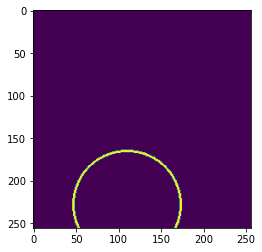

In [22]:
mask = data['input_targets']['0']
plt.imshow(mask[:,:,8])

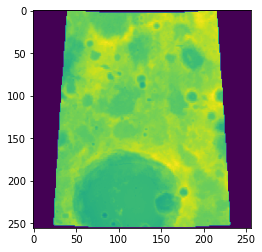

In [16]:
img = data['input_imgs']['0']
plt.imshow(img)